# Projet Machine Learning : Prédiction de l'émission de CO2

Duchesne Pierre, Hountongbe Claudia, Marais Mathilde, Soufflet Julia 

In [1]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(ggpubr)
library(crosstable)
library(GGally)
library(glmnet)
library(e1071)
library(rpart) 
library(randomForest)
library(DescTools)
library(forecast)
library(plotly)
library(gbm)
library(pROC)
library(ROCR)
library(MASS)
library(nnet)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-8

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin



Attachement du package : ‘DescTools’


L'objet suivant est masqué depuis ‘package:crosstable’:

    N


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attachement du package : ‘forecast’


L'objet suivant est masqué depuis ‘package:DescTools’:

    BoxCox


L'objet suivant est masqué depuis ‘package:ggpubr’:

    gghistogram



Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_pl

# Analyse exploratoire des données : 

## Question 1: Visualisation des données 

In [2]:
energy = read.csv("global-data-on-sustainable-energy (1).csv")

In [3]:
head(energy)


Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

### Variables renommées pour plus de clarté dans les graphiques 

In [4]:
# Accès et modification des noms des colonnes
column_names=names(energy)
#print(column_names)
new_column_names=c("Entity", "Year","Access_elec","Access_fuels","Renewable_elec","Financial_flows","Renewable_energy","Elec_fossil","Elec_nuclear","Elec_renew","Low_carbon","Primary_energy","Energy_intensity","Value_co2","Renewables_equivalent","gdp_growth","gdp_capita","Density","Land_area","Latitude","Longitude")  # Remplacez ... par les nouveaux noms des colonnes

# Réassigner les noms des colonnes
names(energy)=new_column_names
print(names(energy))

 [1] "Entity"                "Year"                  "Access_elec"          
 [4] "Access_fuels"          "Renewable_elec"        "Financial_flows"      
 [7] "Renewable_energy"      "Elec_fossil"           "Elec_nuclear"         
[10] "Elec_renew"            "Low_carbon"            "Primary_energy"       
[13] "Energy_intensity"      "Value_co2"             "Renewables_equivalent"
[16] "gdp_growth"            "gdp_capita"            "Density"              
[19] "Land_area"             "Latitude"              "Longitude"            


In [5]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 10

In [6]:
#Convertir Year et Entity en variables qualitatives
energy$Year = as.factor(energy$Year)
energy$Entity= as.factor(energy$Entity)

In [7]:
#Convertir Density en une variable numérique
energy$Density = as.numeric(gsub(",","",energy$Density))

In [8]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                 : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 

## Question 2: Identification des valeurs manquantes

### Taux de valeurs manquantes

In [9]:
sum(is.na(energy))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [10]:
#tx = colMeans(is.na(energy))*100
missing = sort(colSums(is.na(energy)),decreasing = TRUE )
tx = missing*100/(3649) 
print(missing)
print(tx)

Renewables_equivalent       Financial_flows        Renewable_elec 
                 2137                  2089                   931 
            Value_co2            gdp_growth            gdp_capita 
                  428                   317                   282 
     Energy_intensity      Renewable_energy          Access_fuels 
                  207                   194                   169 
         Elec_nuclear            Low_carbon           Elec_fossil 
                  126                    42                    21 
           Elec_renew           Access_elec               Density 
                   21                    10                     1 
            Land_area              Latitude             Longitude 
                    1                     1                     1 
               Entity                  Year        Primary_energy 
                    0                     0                     0 
Renewables_equivalent       Financial_flows        Renewable_e

### Suppression des variables corrompues

In [11]:
energy$Renewable_elec = NULL
energy$Financial_flows= NULL
energy$Renewables_equivalent = NULL

In [12]:
energy_pt2 = energy

## Question 3: Suppression des individus avec données manquantes


In [13]:
complete_energy = na.omit(energy)

In [14]:
str(complete_energy)

'data.frame':	2868 obs. of  18 variables:
 $ Entity          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_elec     : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_fuels    : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_fossil     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew      : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon      : num  67 62.9 63.4 76.2 78.9 ...
 $ Primary_energy  : num  230 204 252 304 354 ...
 $ Energy_intensity: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_co2       : num  1220 1030 1550 1760 1770 ...
 $ gdp_growth      : num  8.83 1.41 11.23 5.36 13.83 ...
 $ gdp_capita      : num  191 211 242 264 360 ...
 $ Density         : num  60 60 60 60 60 60 60 60 60 60 ...
 $ Land_area  

Il y a bien 2868 observations.

In [15]:
sum(is.na(complete_energy))*100/(21*3649)

[1] 0

## Question 4 : Analyse descriptive unidimensionnelle

### Variables qualitatives : Year et Entity 


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 137  138  140  141  141  141  141  144  144  144  145  145  144  145  147  147 
2016 2017 2018 2019 2020 
 146  146  146  146    0 


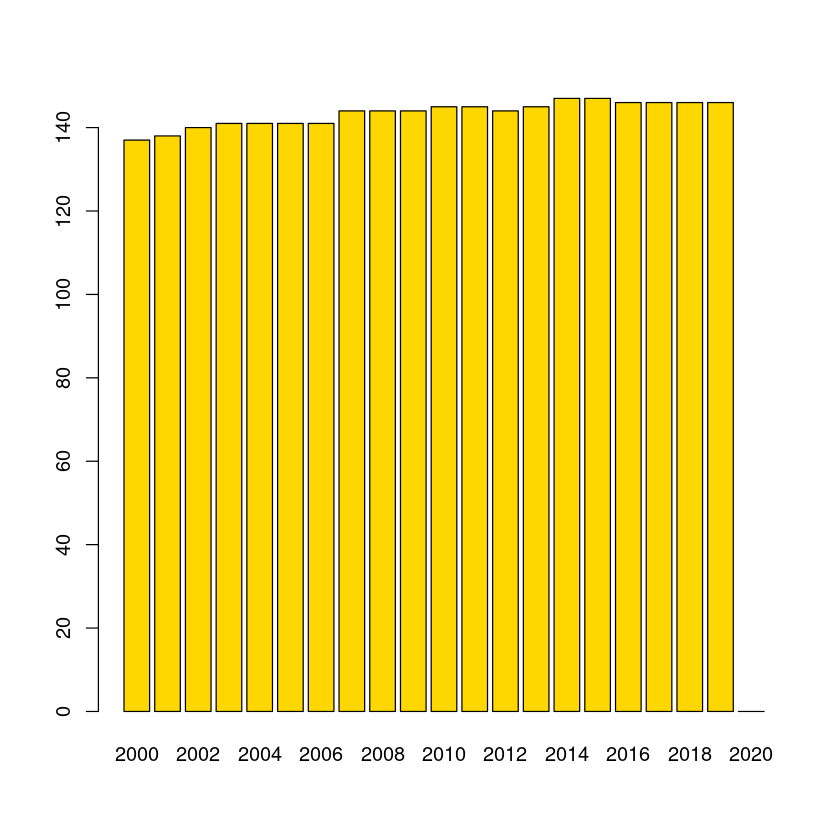

In [16]:
occ_y = table(complete_energy$Year)
print(occ_y)
barplot(occ_y, col="gold")

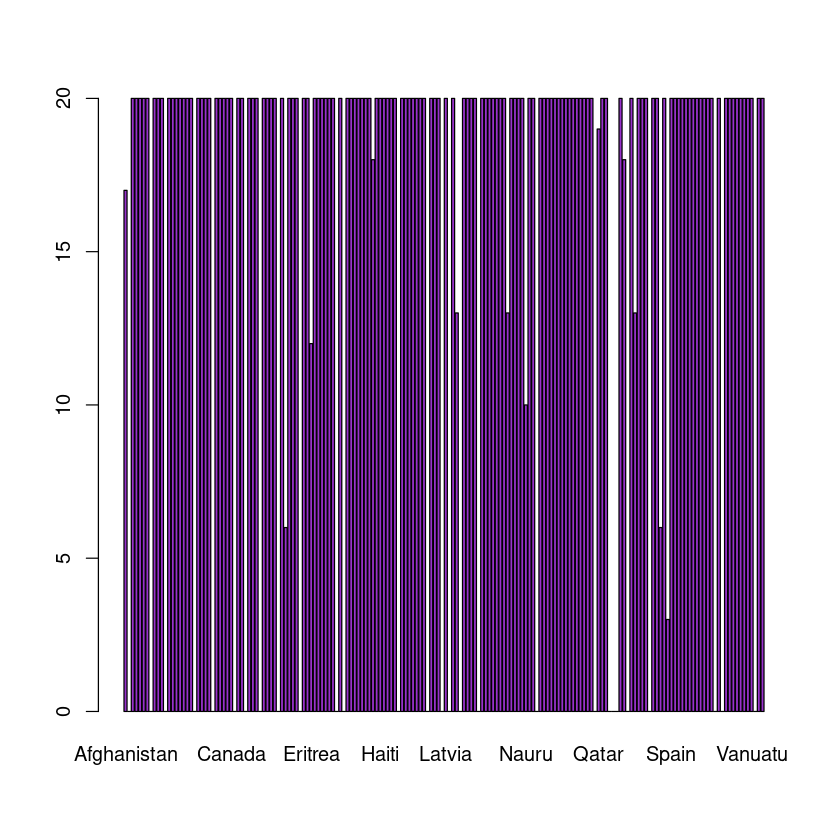

In [17]:
occ_e = table(complete_energy$Entity)
#print(occ_e)
barplot(occ_e,col = "darkorchid")


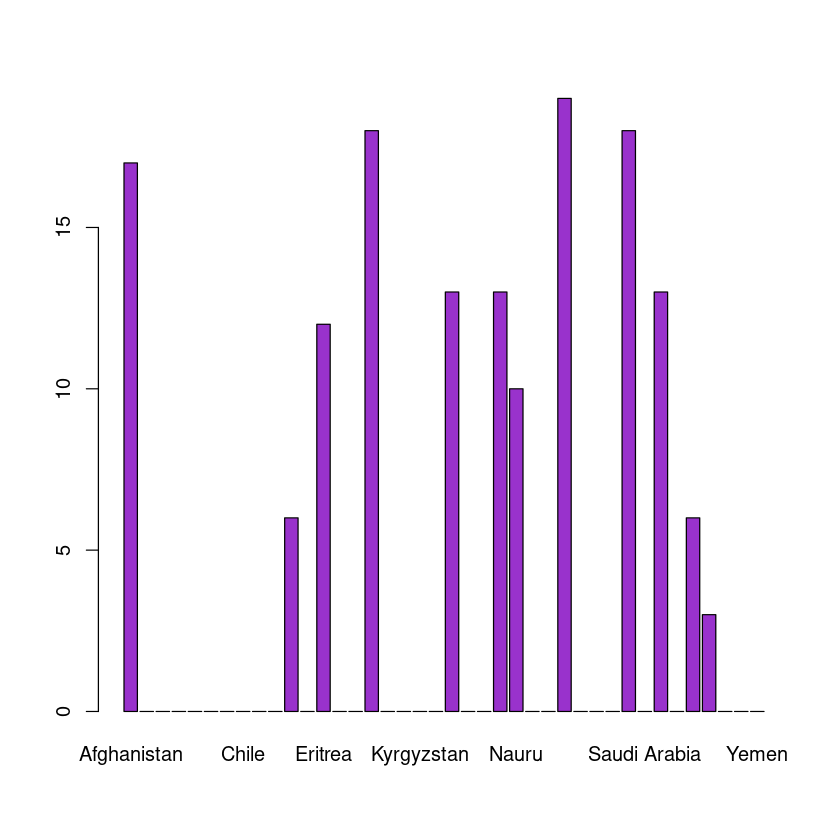

In [18]:
occ_e20 = occ_e[occ_e<20]
barplot(occ_e20,col = "darkorchid")

### Pour les variables quantitatives

In [19]:
summary(complete_energy)

                 Entity          Year       Access_elec       Access_fuels   
 Algeria            :  20   2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Angola             :  20   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Antigua and Barbuda:  20   2016   : 146   Median : 97.000   Median : 81.55  
 Argentina          :  20   2017   : 146   Mean   : 76.585   Mean   : 62.17  
 Armenia            :  20   2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
 Australia          :  20   2019   : 146   Max.   :100.000   Max.   :100.00  
 (Other)            :2748   (Other):1990                                     
 Renewable_energy  Elec_fossil        Elec_nuclear      Elec_renew     
 Min.   : 0.000   Min.   :   0.000   Min.   :  0.00   Min.   :   0.00  
 1st Qu.: 9.188   1st Qu.:   0.290   1st Qu.:  0.00   1st Qu.:   0.09  
 Median :28.790   Median :   2.995   Median :  0.00   Median :   1.68  
 Mean   :35.802   Mean   :  76.694   Mean   : 15.34   Mean   :  26.60  
 3rd Qu.:60.667 

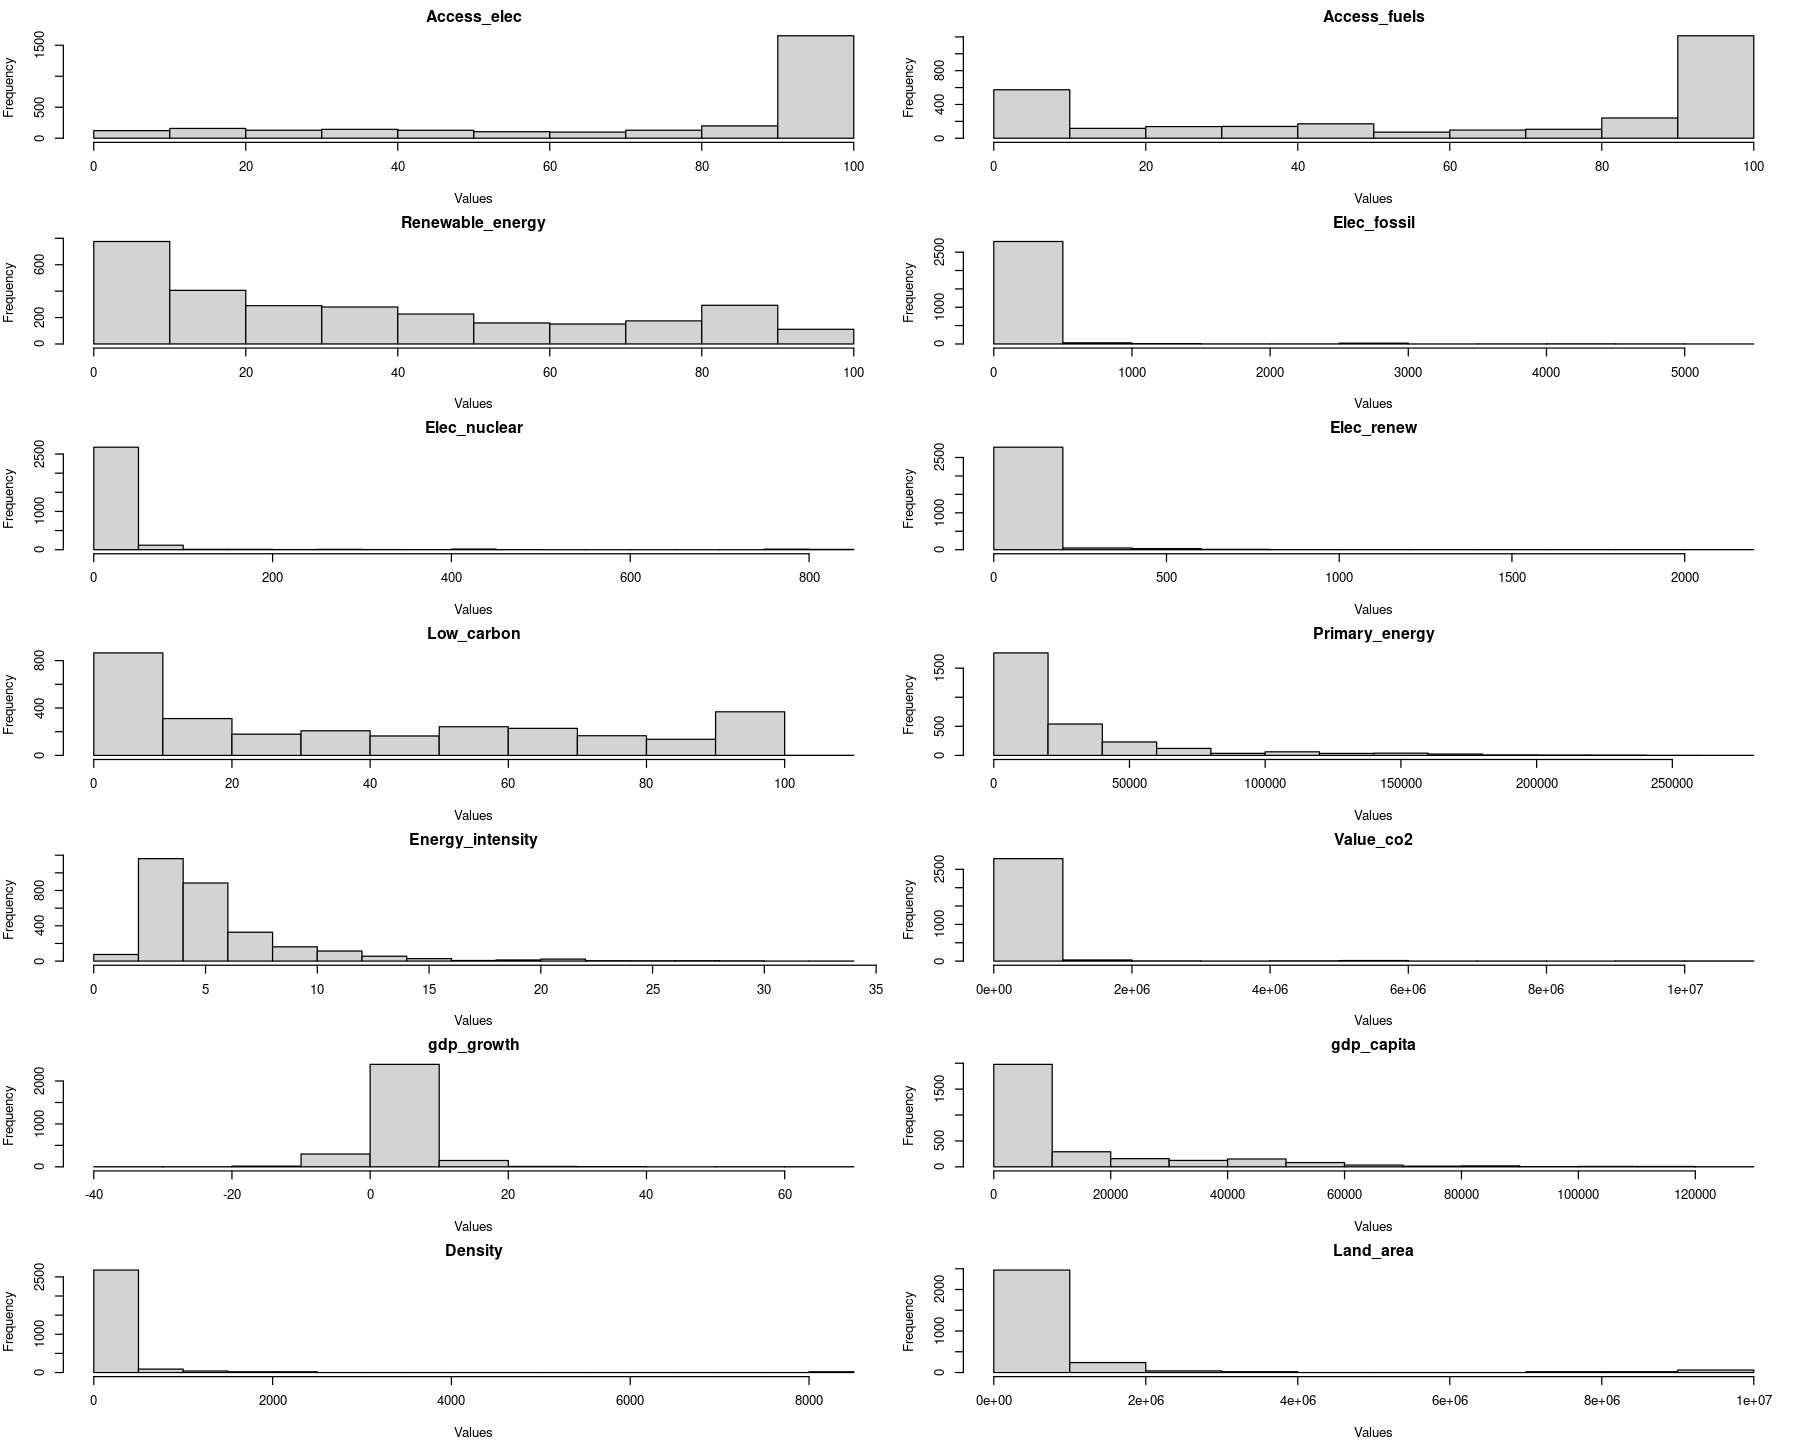

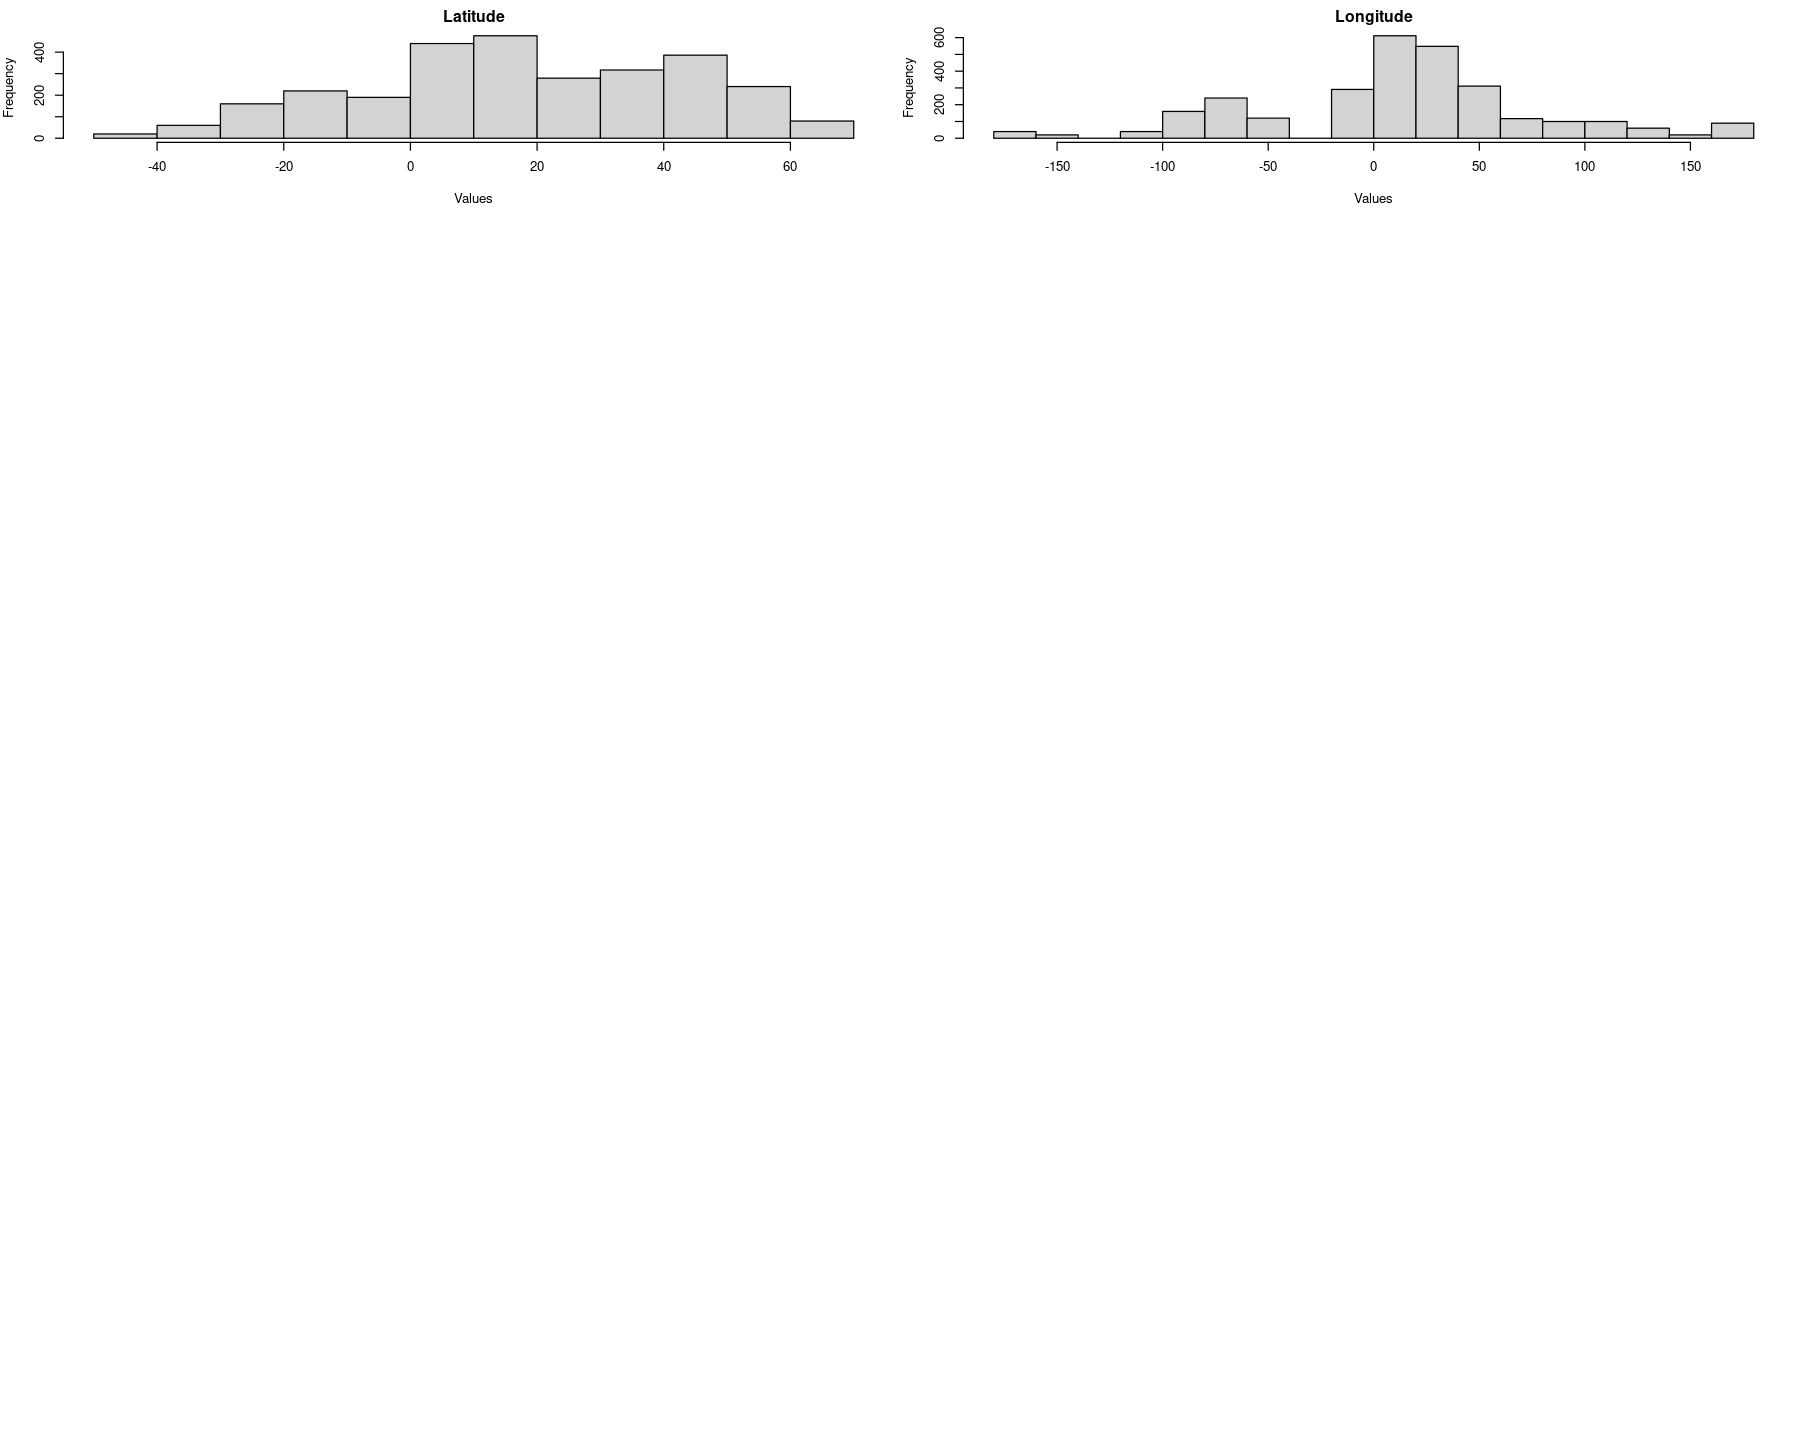

In [20]:
options(repr.plot.width = 15, repr.plot.height = 12)
par(mfrow = c(7,2) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(i)]
    hist(dfi, main=names(complete_energy)[i],xlab='Values')
}

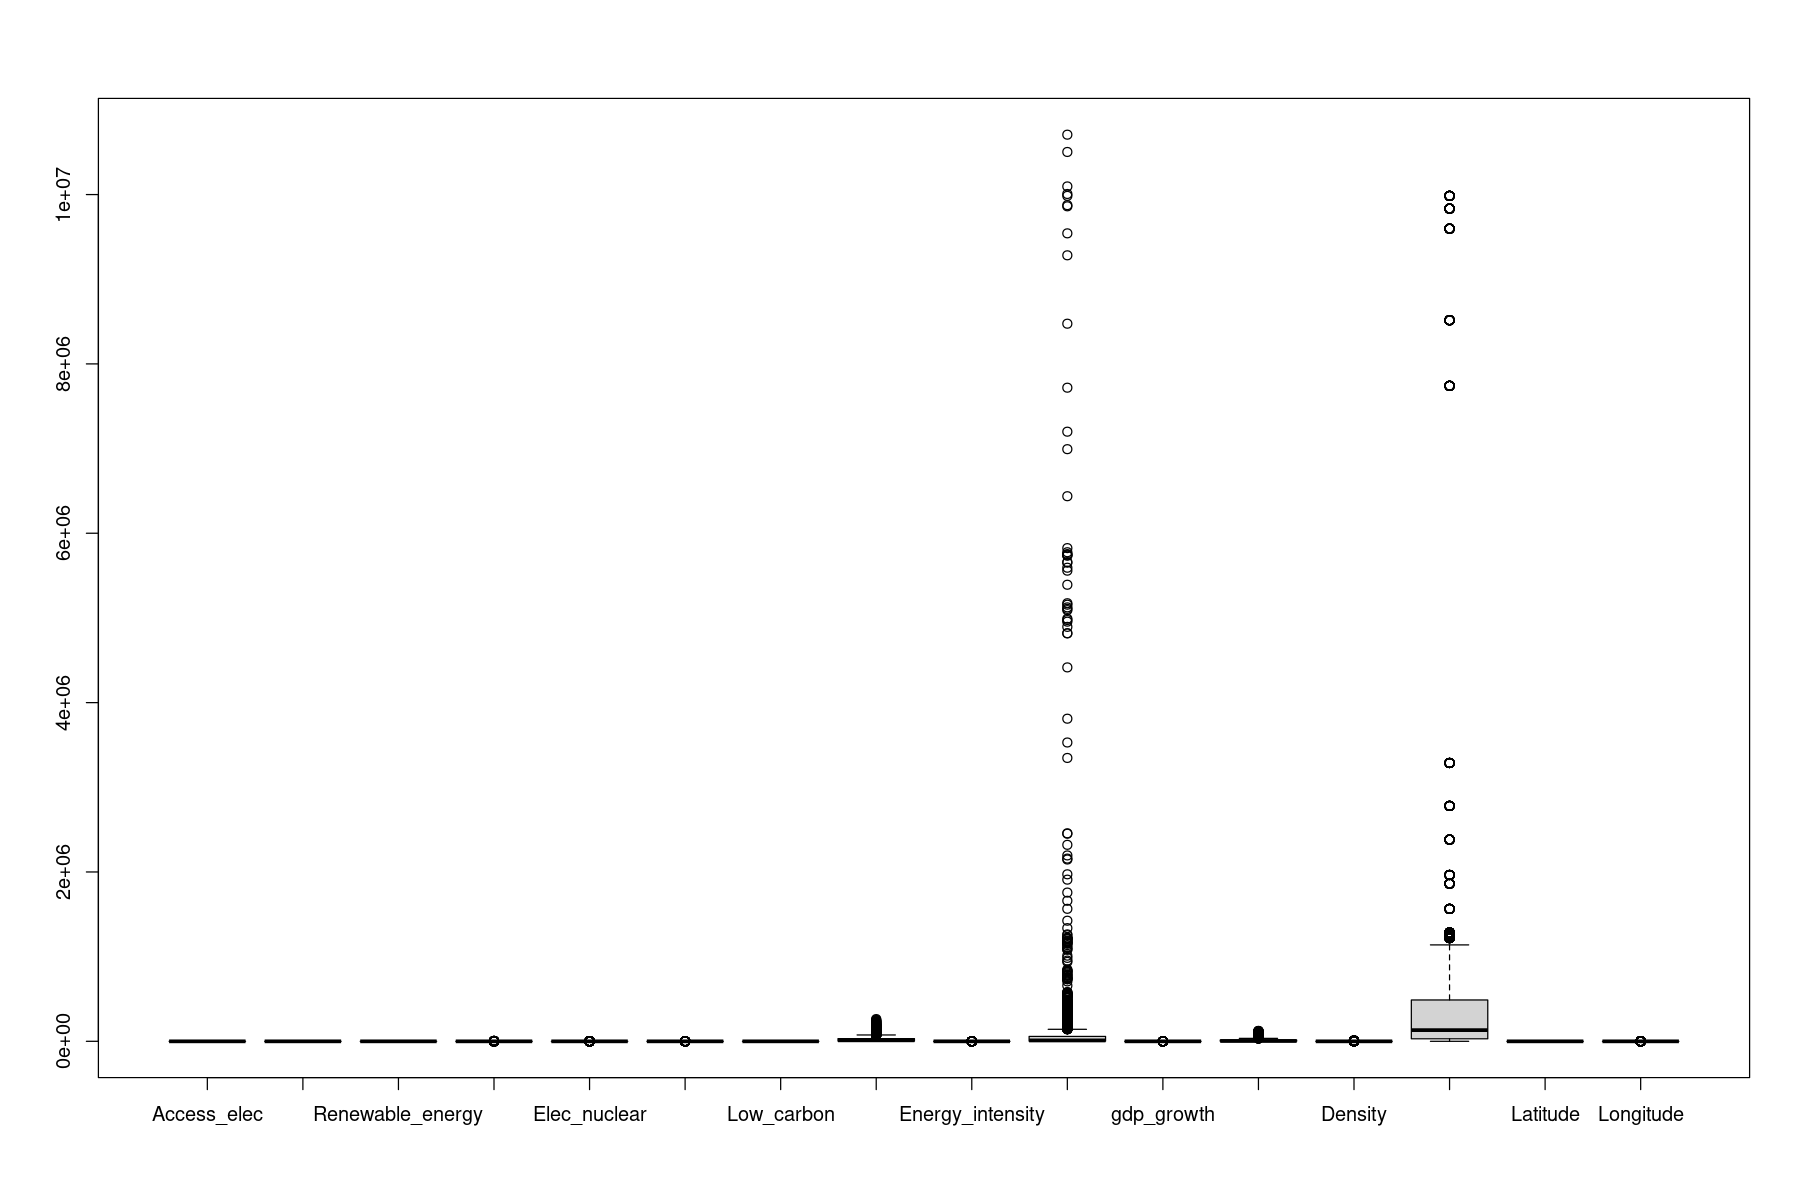

In [21]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_energy[,-c(1,2)]
boxplot(df)

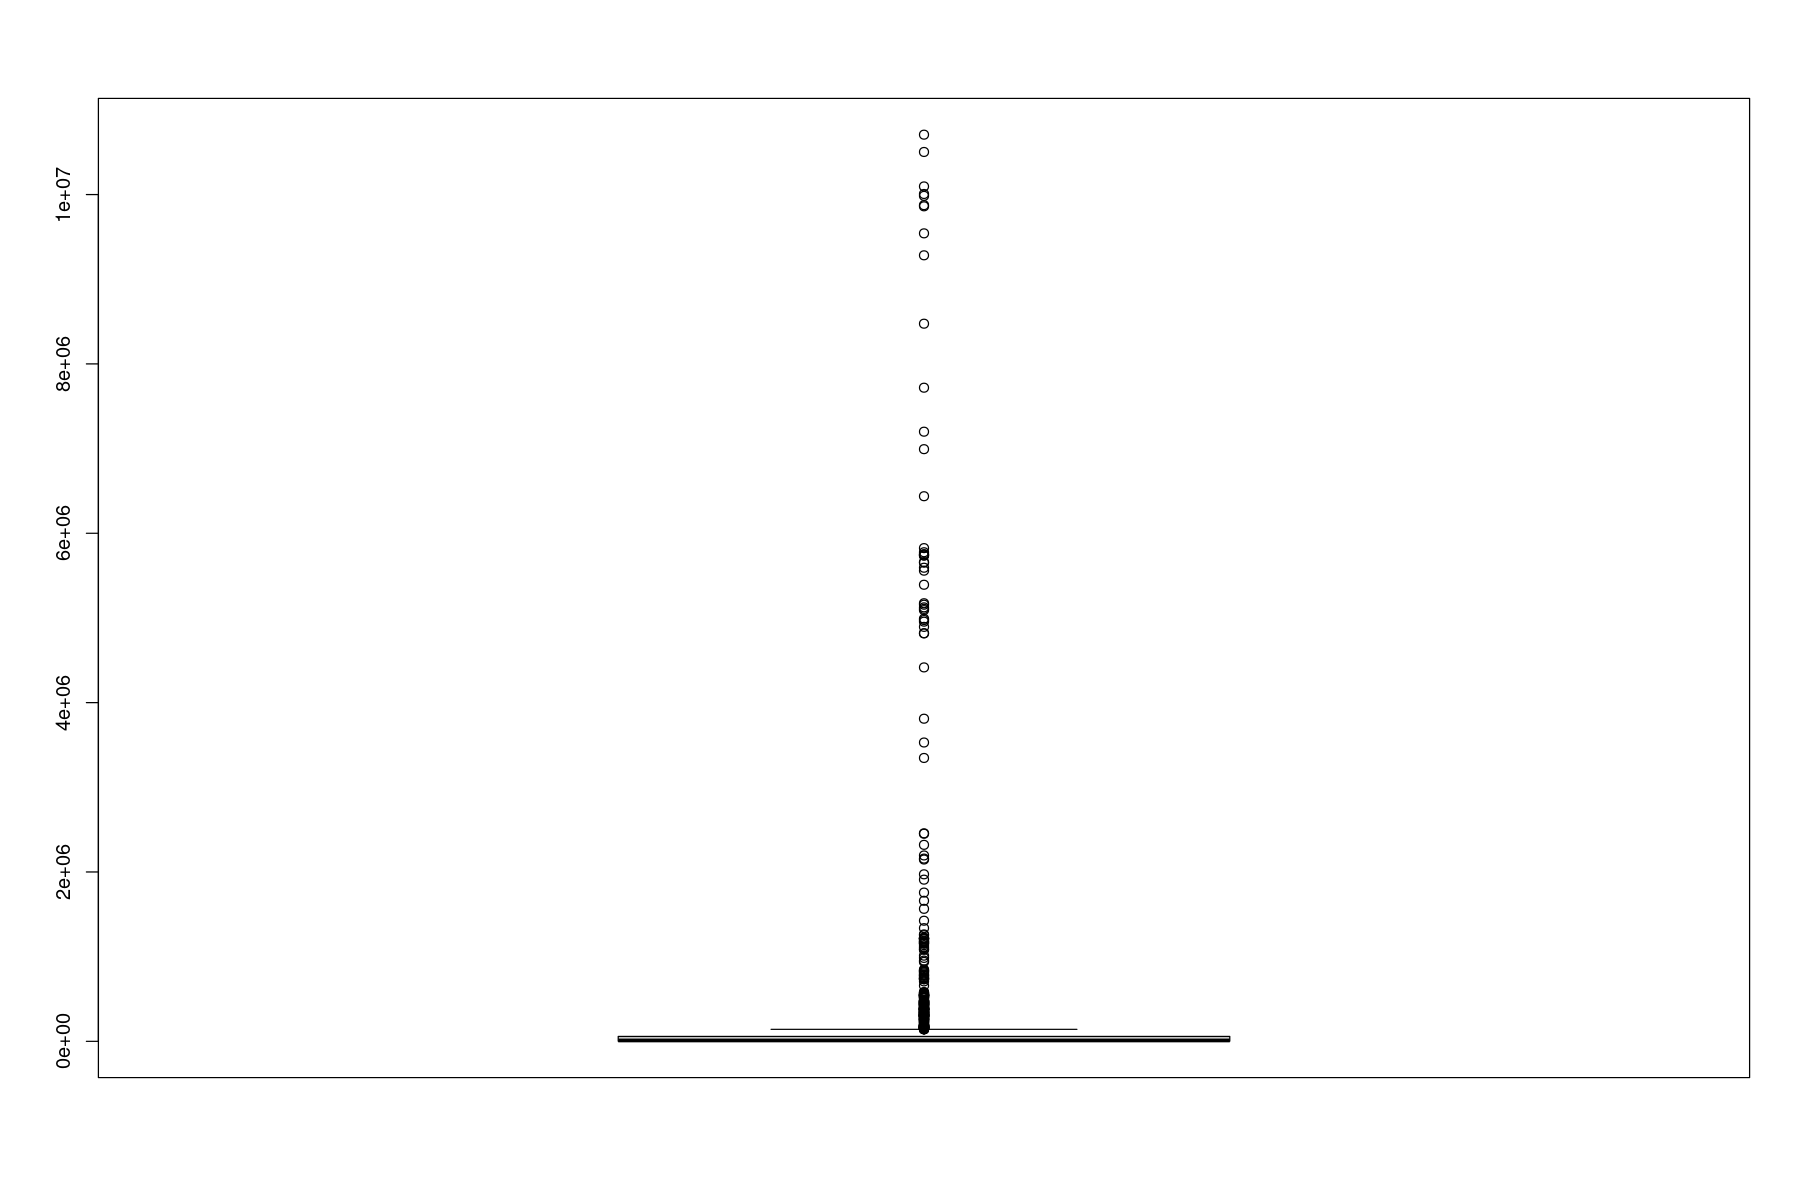

In [22]:
boxplot(df$Value_co2)

### Transformation des variables

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


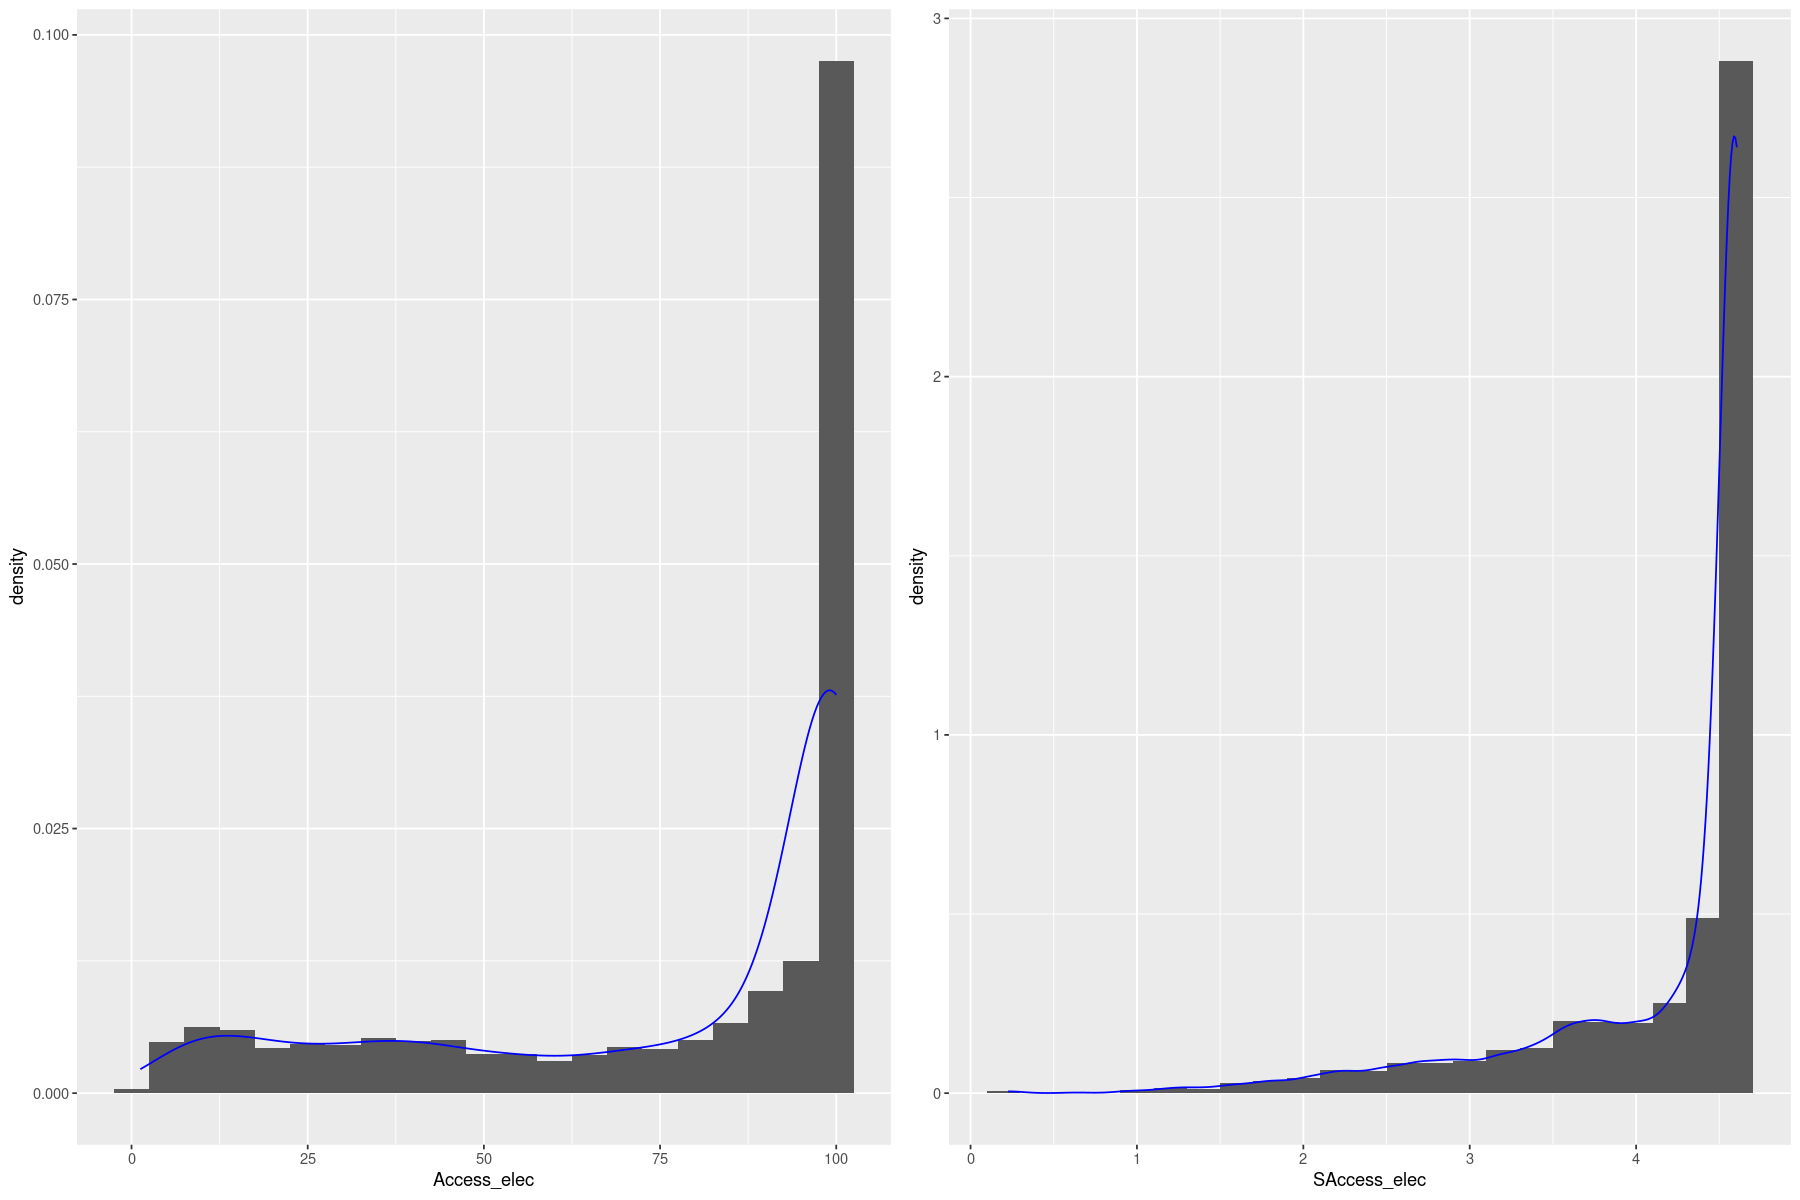

In [23]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

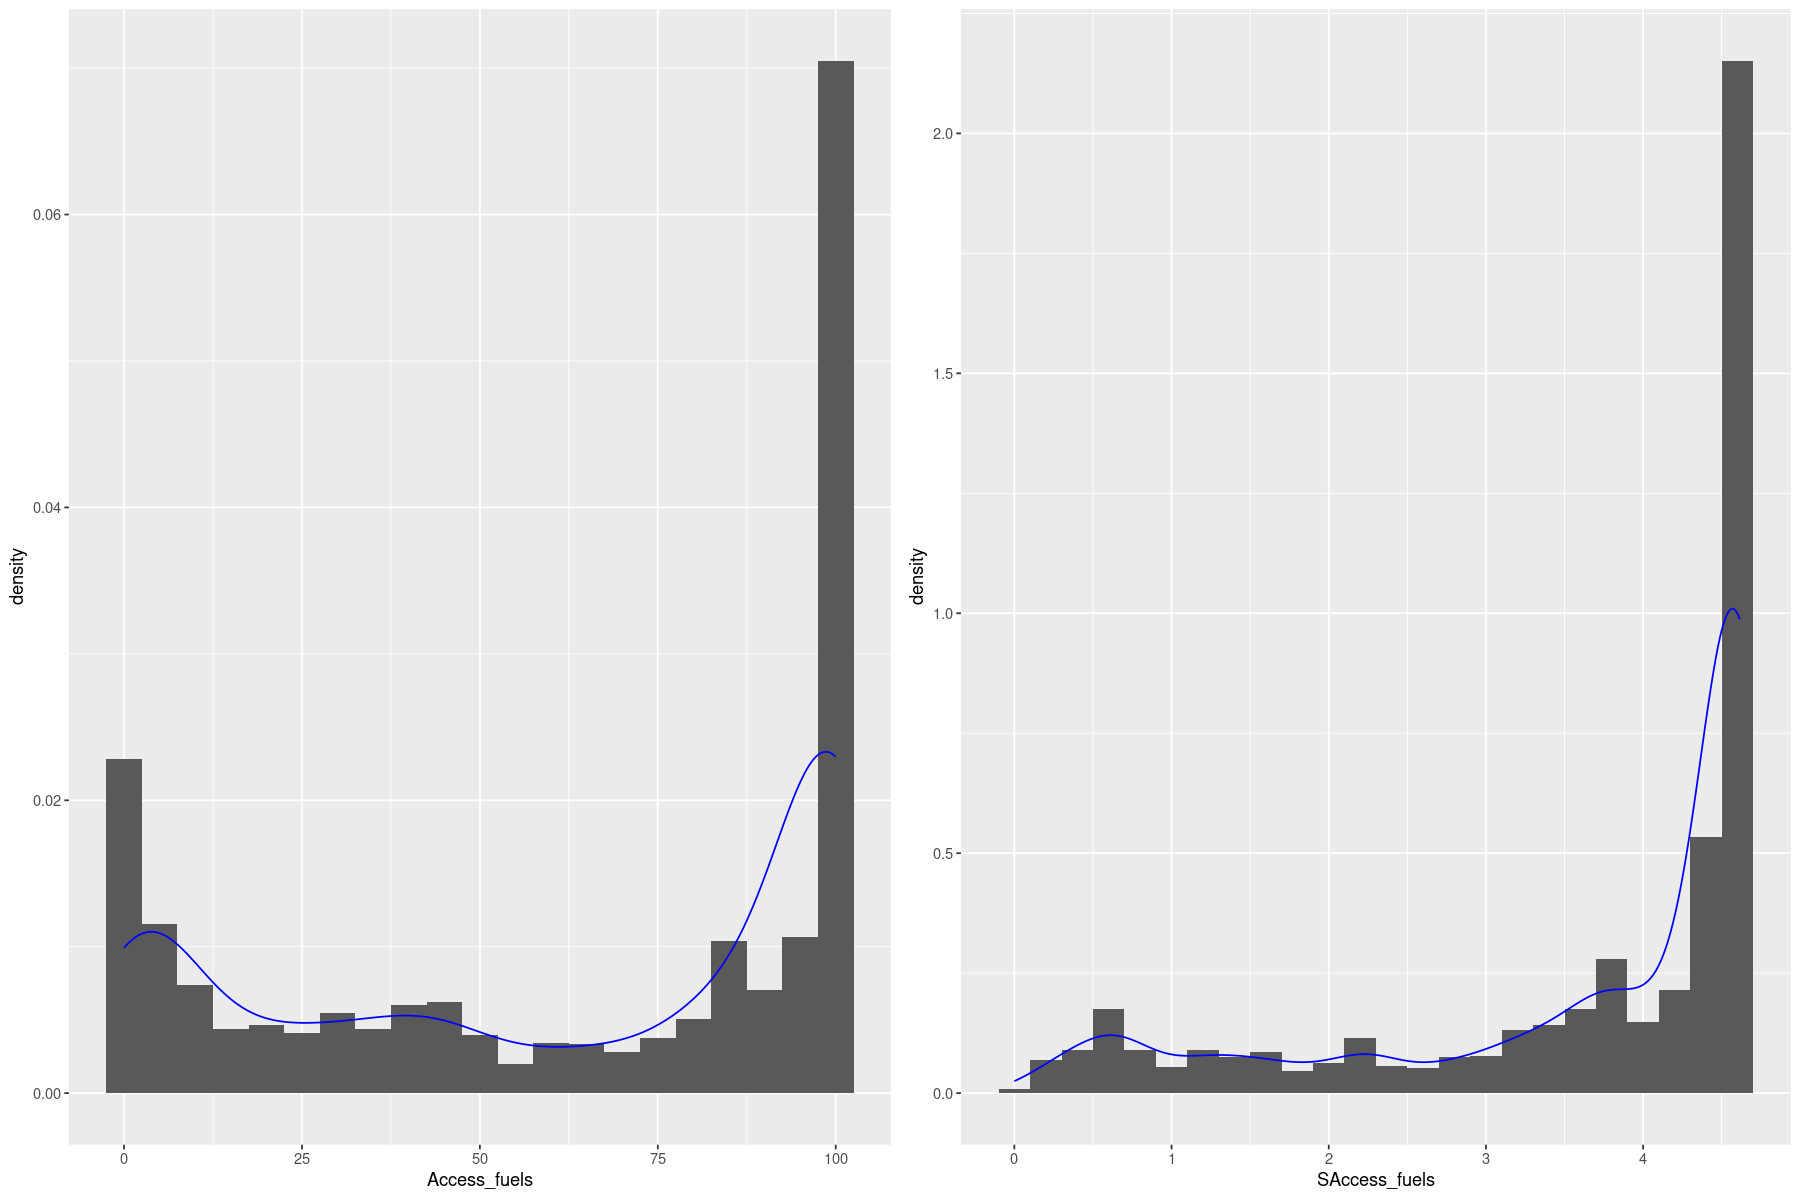

In [24]:
complete_energy[, "SAccess_fuels"] = log(1+complete_energy[, "Access_fuels"])

g1 = ggplot(complete_energy,aes(x=Access_fuels))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_fuels))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

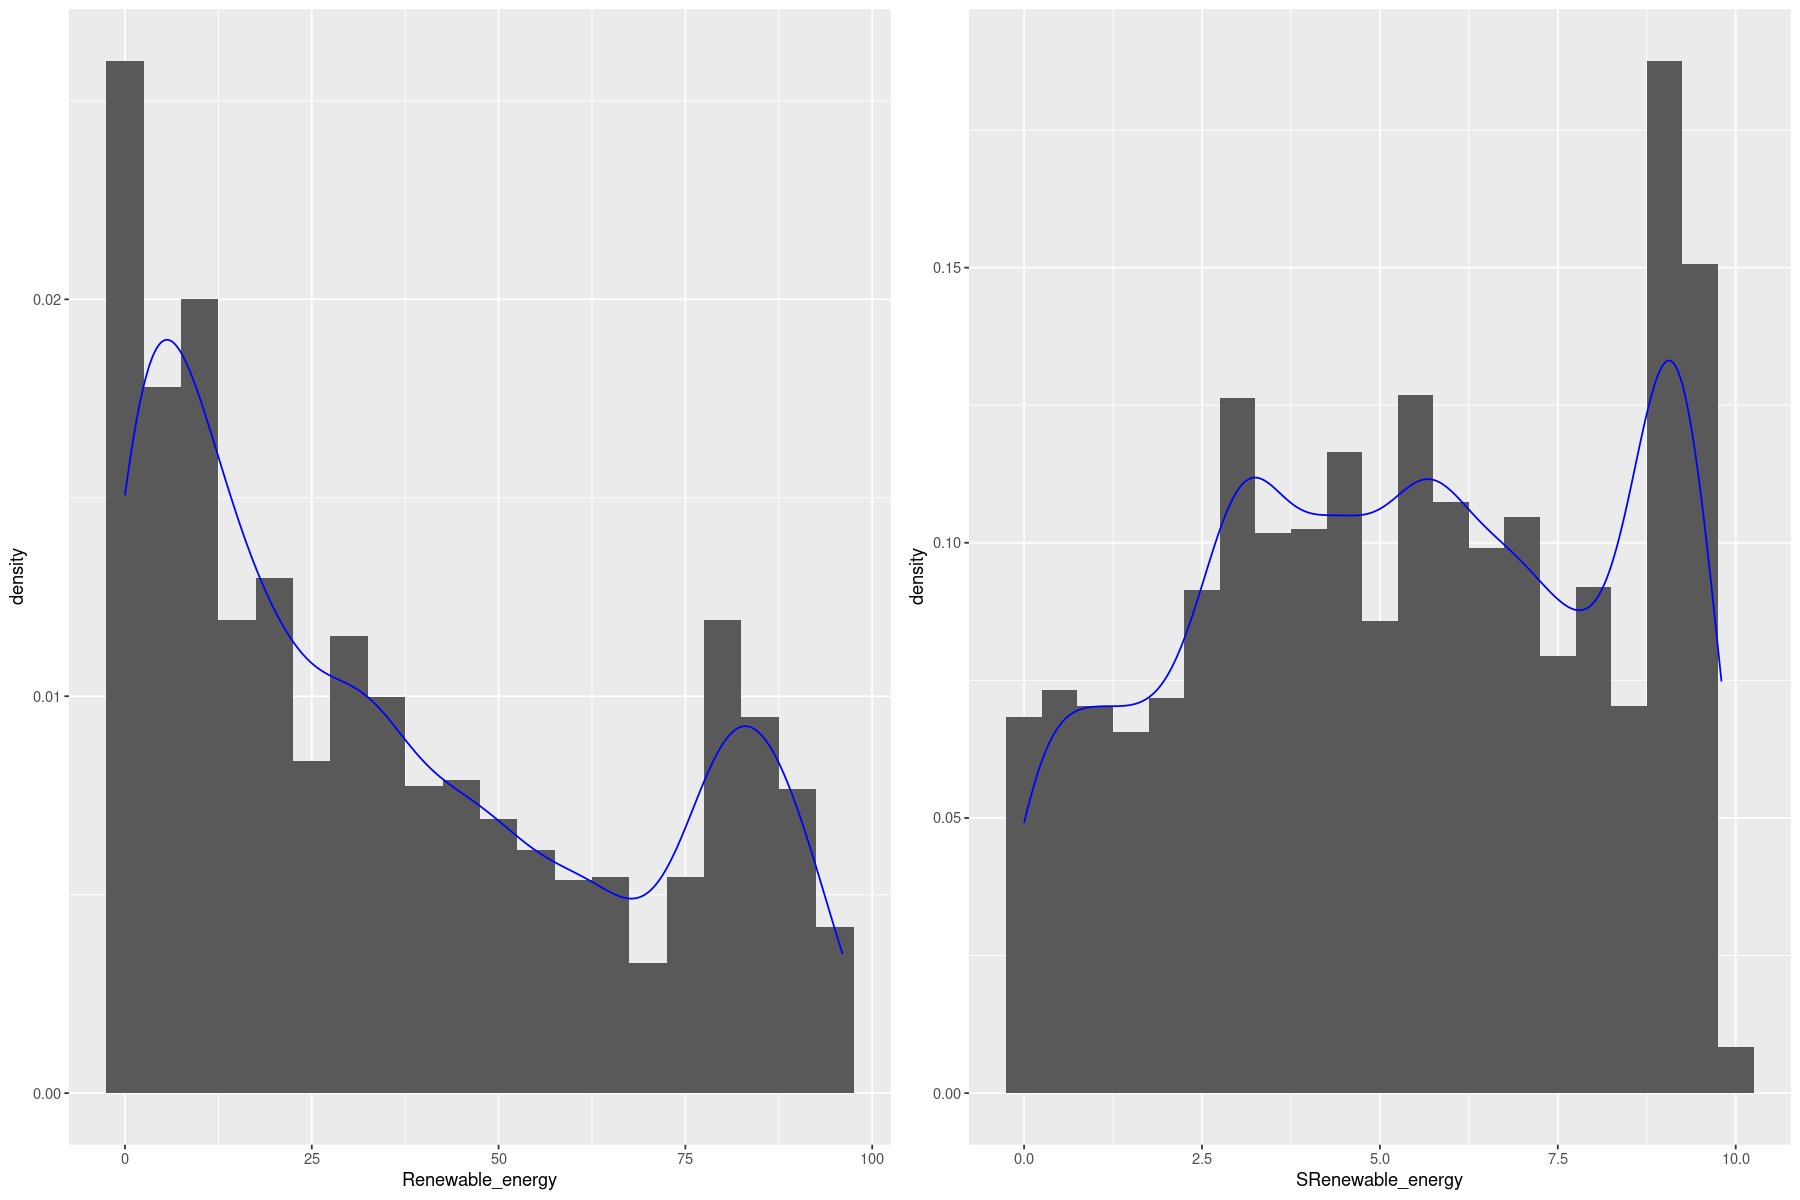

In [25]:
complete_energy[, "SRenewable_energy"] = sqrt(complete_energy[, "Renewable_energy"])

g1 = ggplot(complete_energy,aes(x=Renewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SRenewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 
grid.arrange(g1,g2,ncol=2)

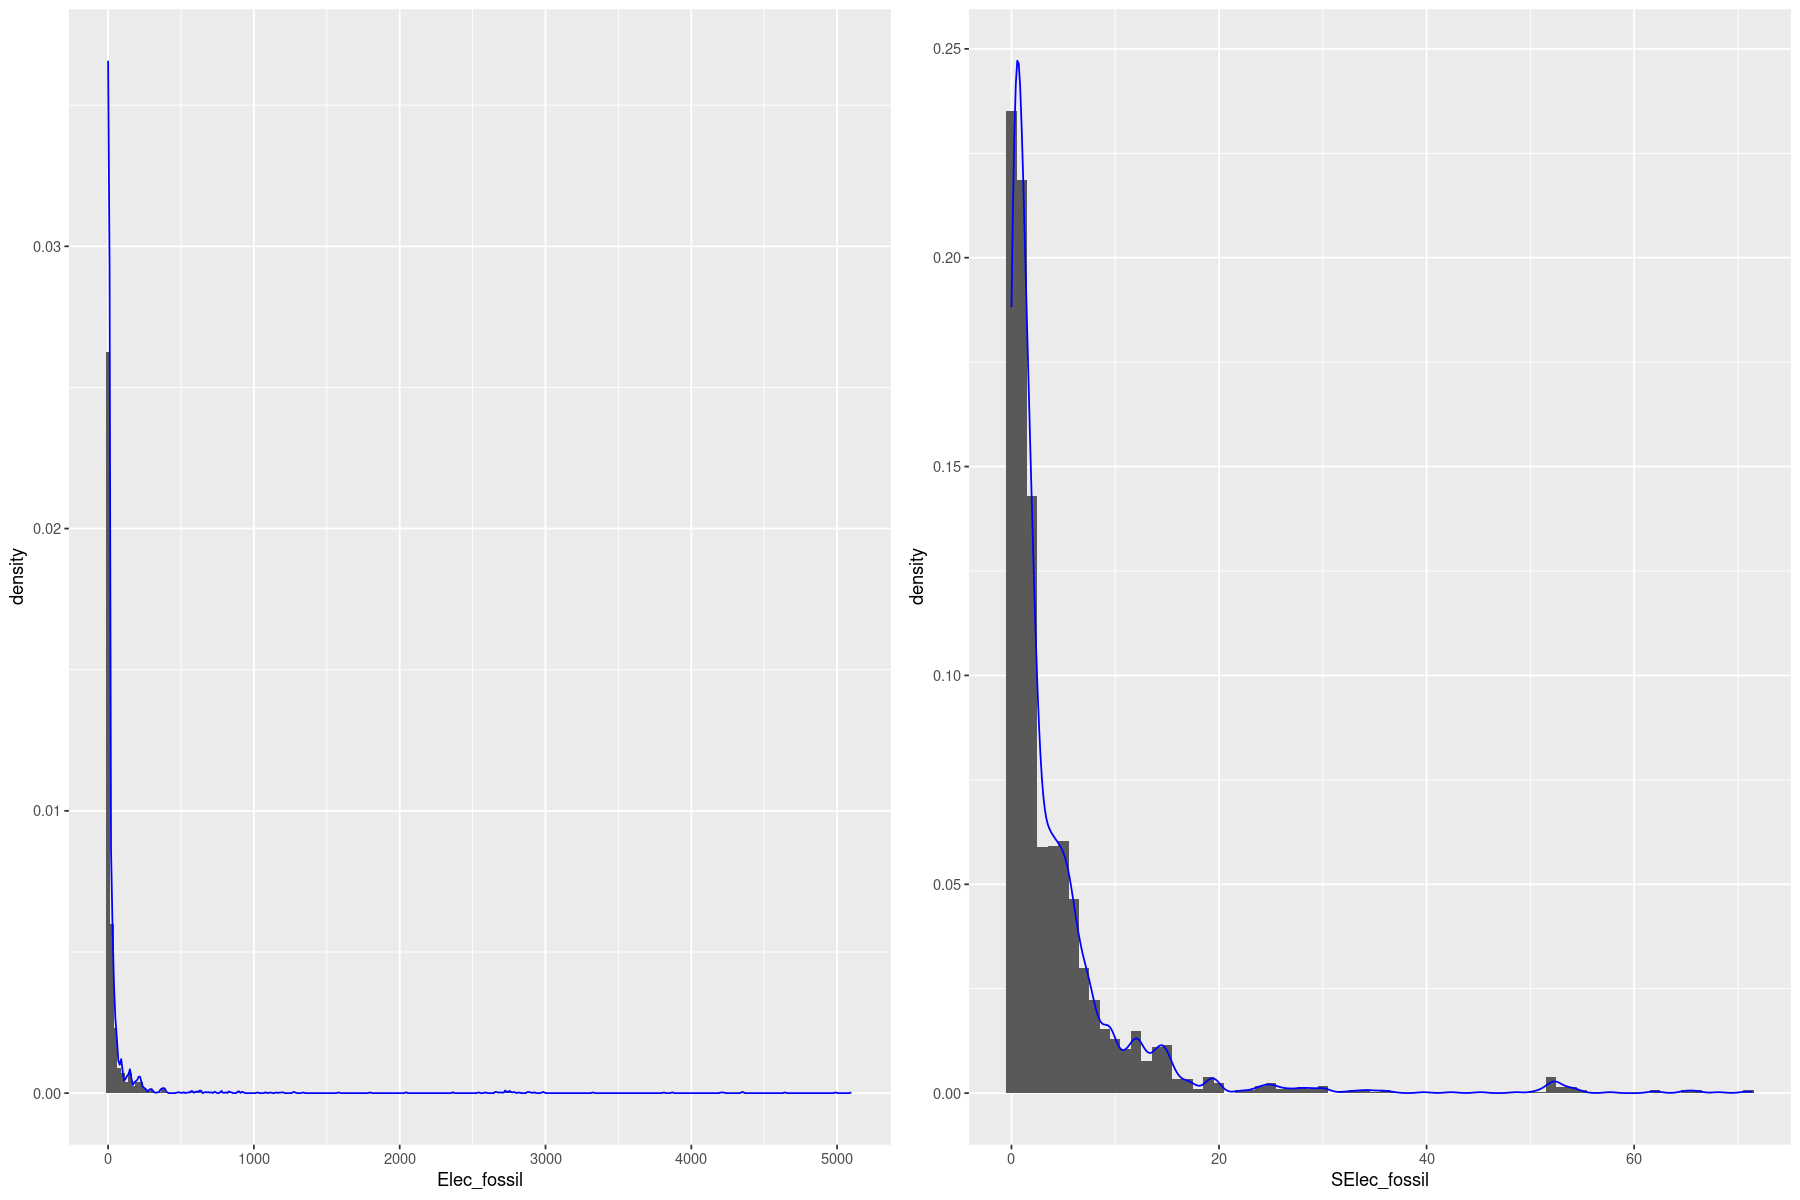

In [26]:
complete_energy[, "SElec_fossil"] = sqrt(complete_energy[, "Elec_fossil"])

g1 = ggplot(complete_energy,aes(x=Elec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

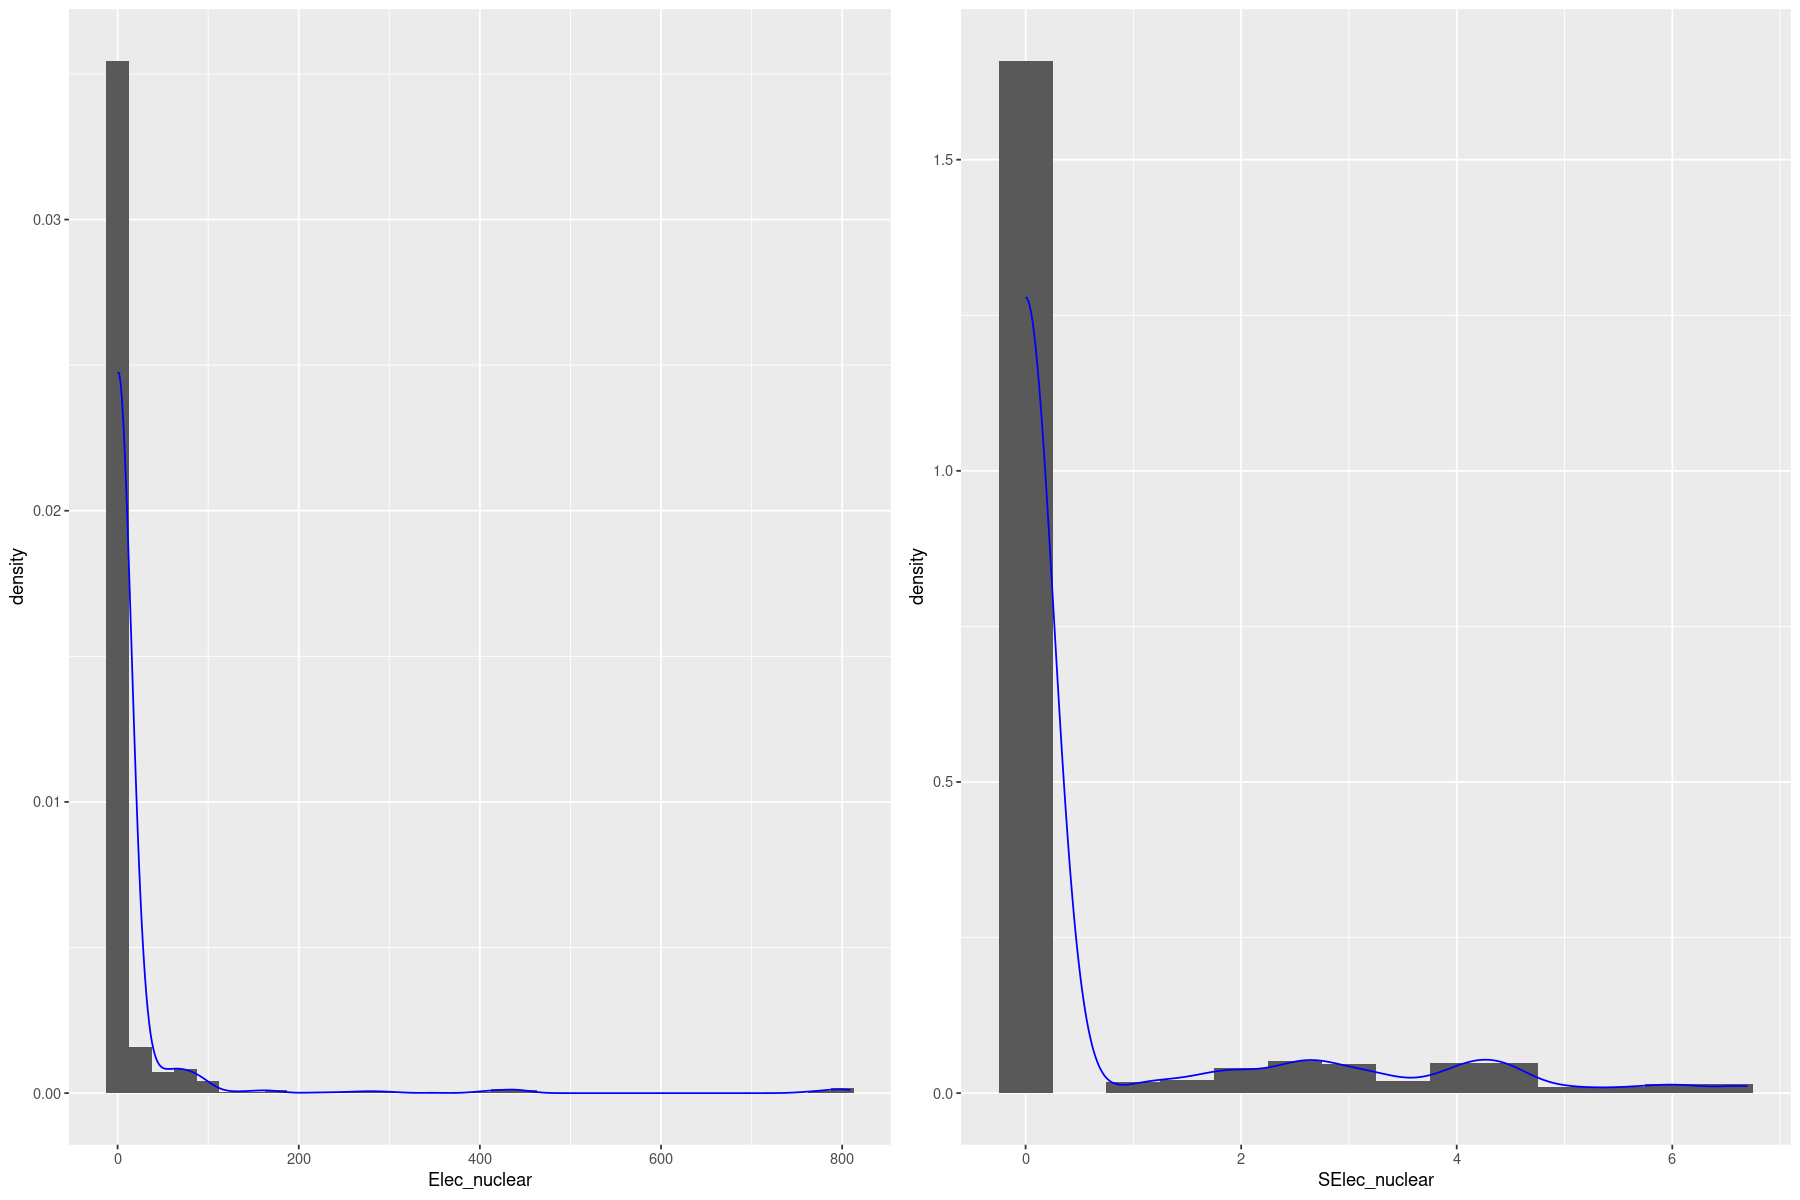

In [27]:
complete_energy[, "SElec_nuclear"] = log(1+complete_energy[, "Elec_nuclear"])

g1 = ggplot(complete_energy,aes(x=Elec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

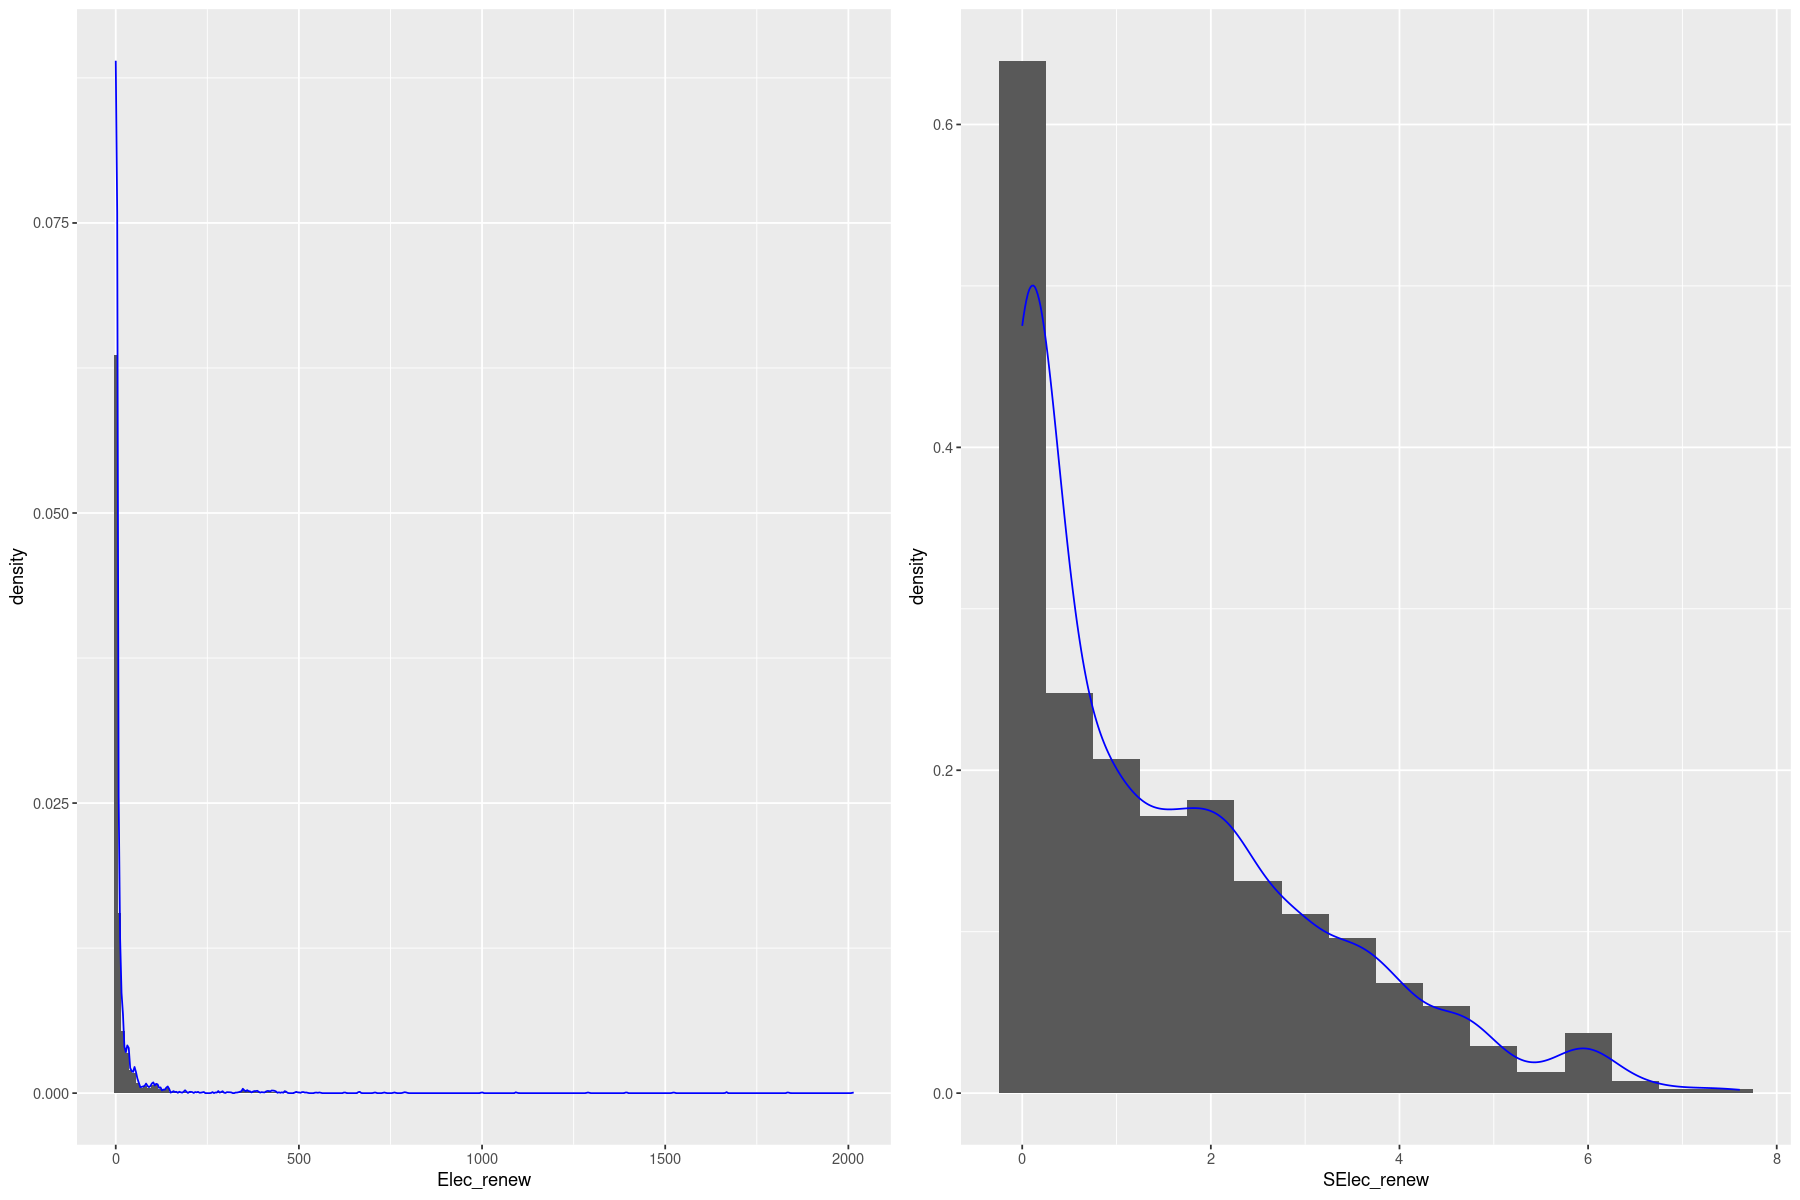

In [28]:
complete_energy[, "SElec_renew"] = log(1+complete_energy[, "Elec_renew"])

g1 = ggplot(complete_energy,aes(x=Elec_renew))+ geom_histogram(aes(y=..density..),binwidth = 10)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_renew))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

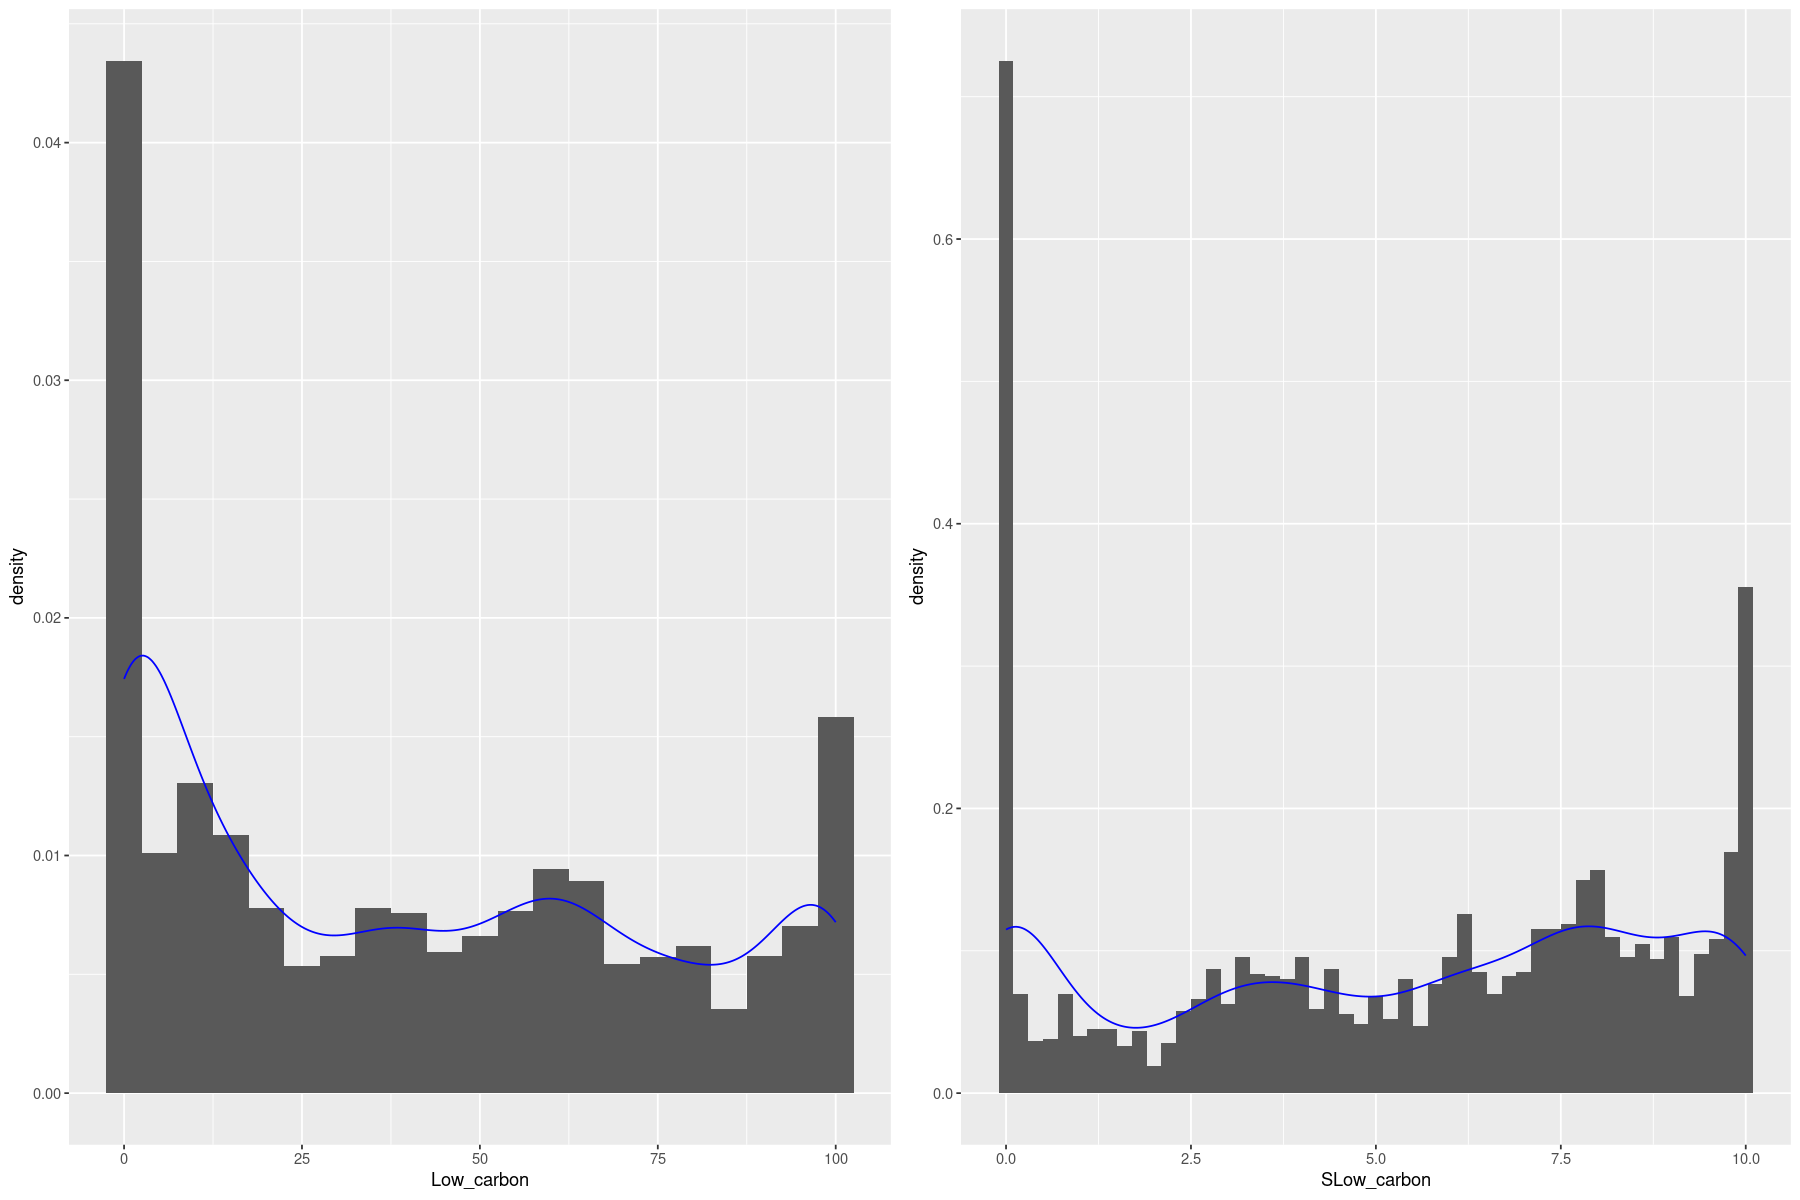

In [29]:
complete_energy[, "SLow_carbon"] = sqrt(complete_energy[, "Low_carbon"])

g1 = ggplot(complete_energy,aes(x=Low_carbon))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLow_carbon))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

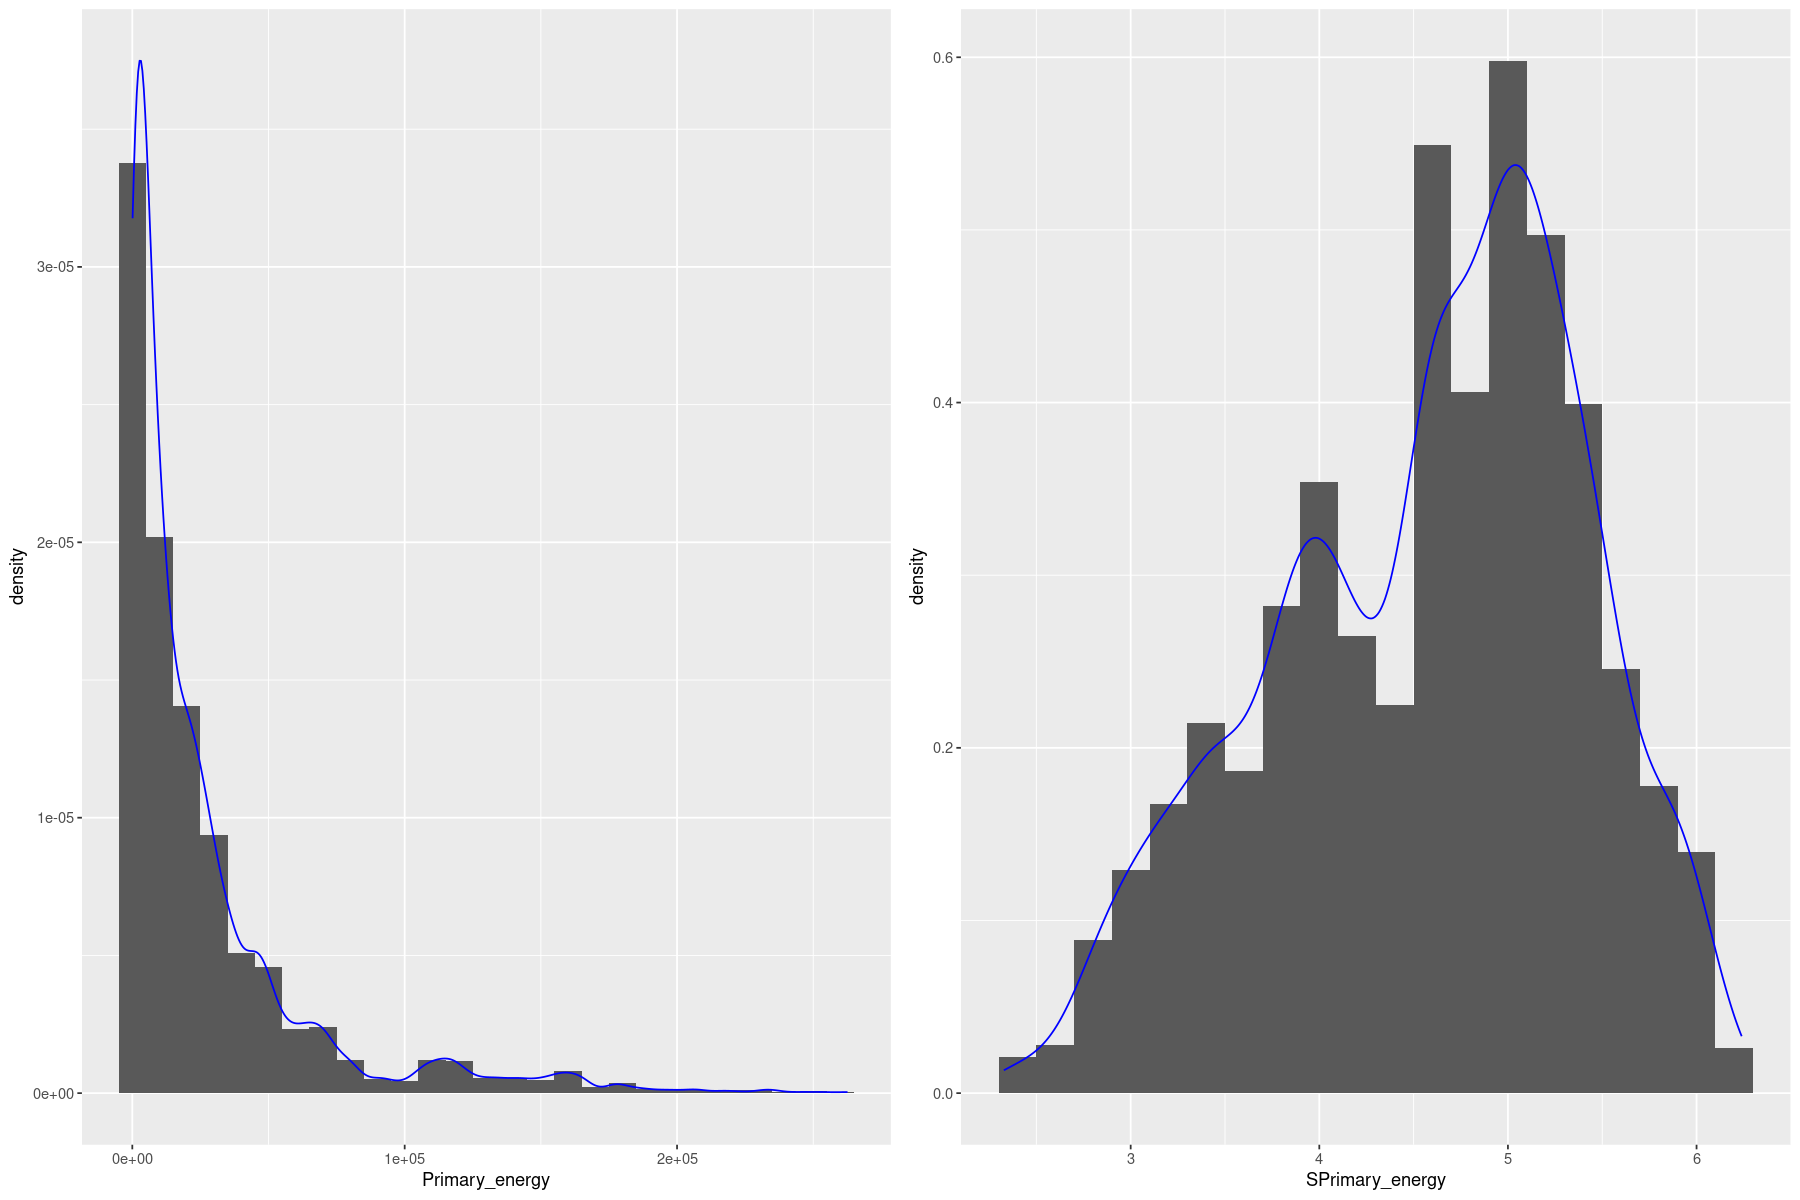

In [30]:
complete_energy[, "SPrimary_energy"] = log(sqrt(complete_energy[, "Primary_energy"]))

g1 = ggplot(complete_energy,aes(x=Primary_energy))+ geom_histogram(aes(y=..density..),binwidth = 10000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SPrimary_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)
#modif 

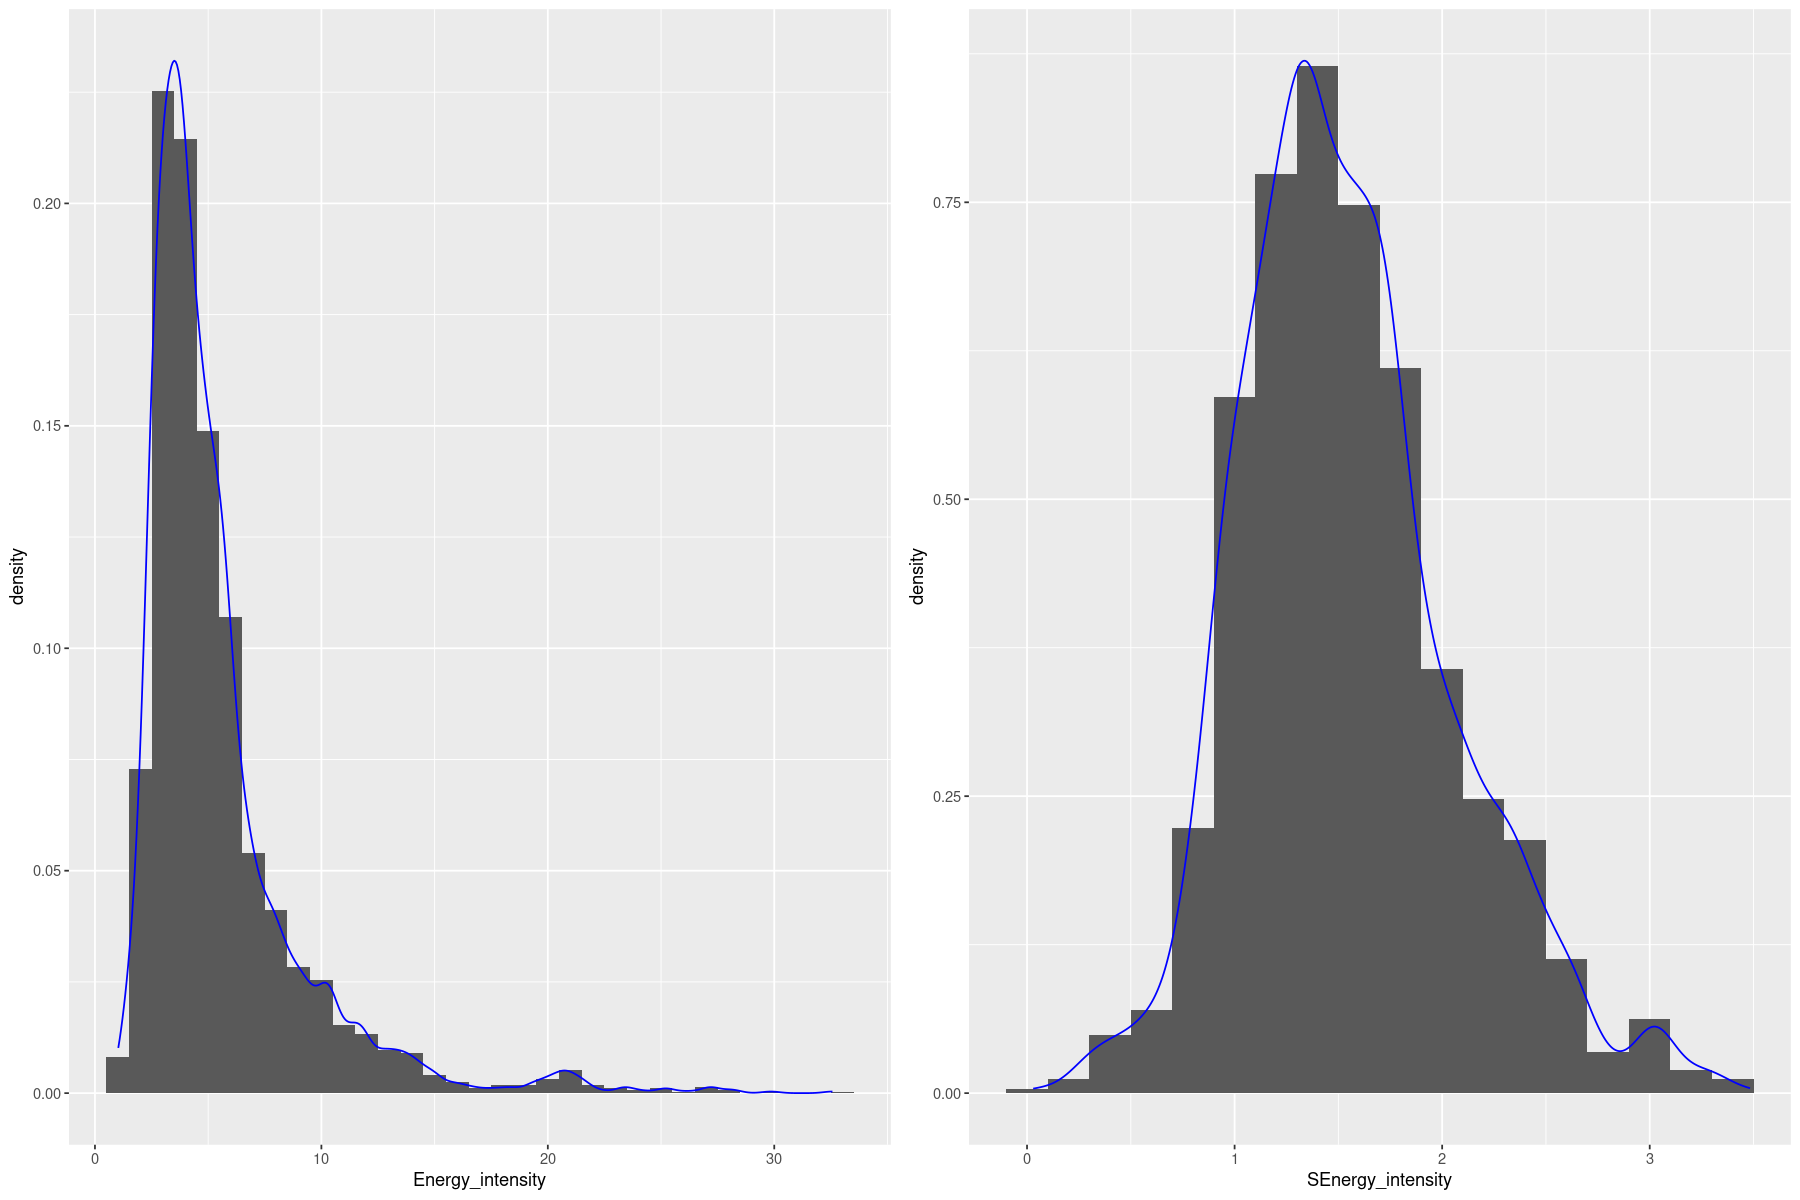

In [31]:
complete_energy[, "SEnergy_intensity"] = log(complete_energy[, "Energy_intensity"])

g1 = ggplot(complete_energy,aes(x=Energy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SEnergy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

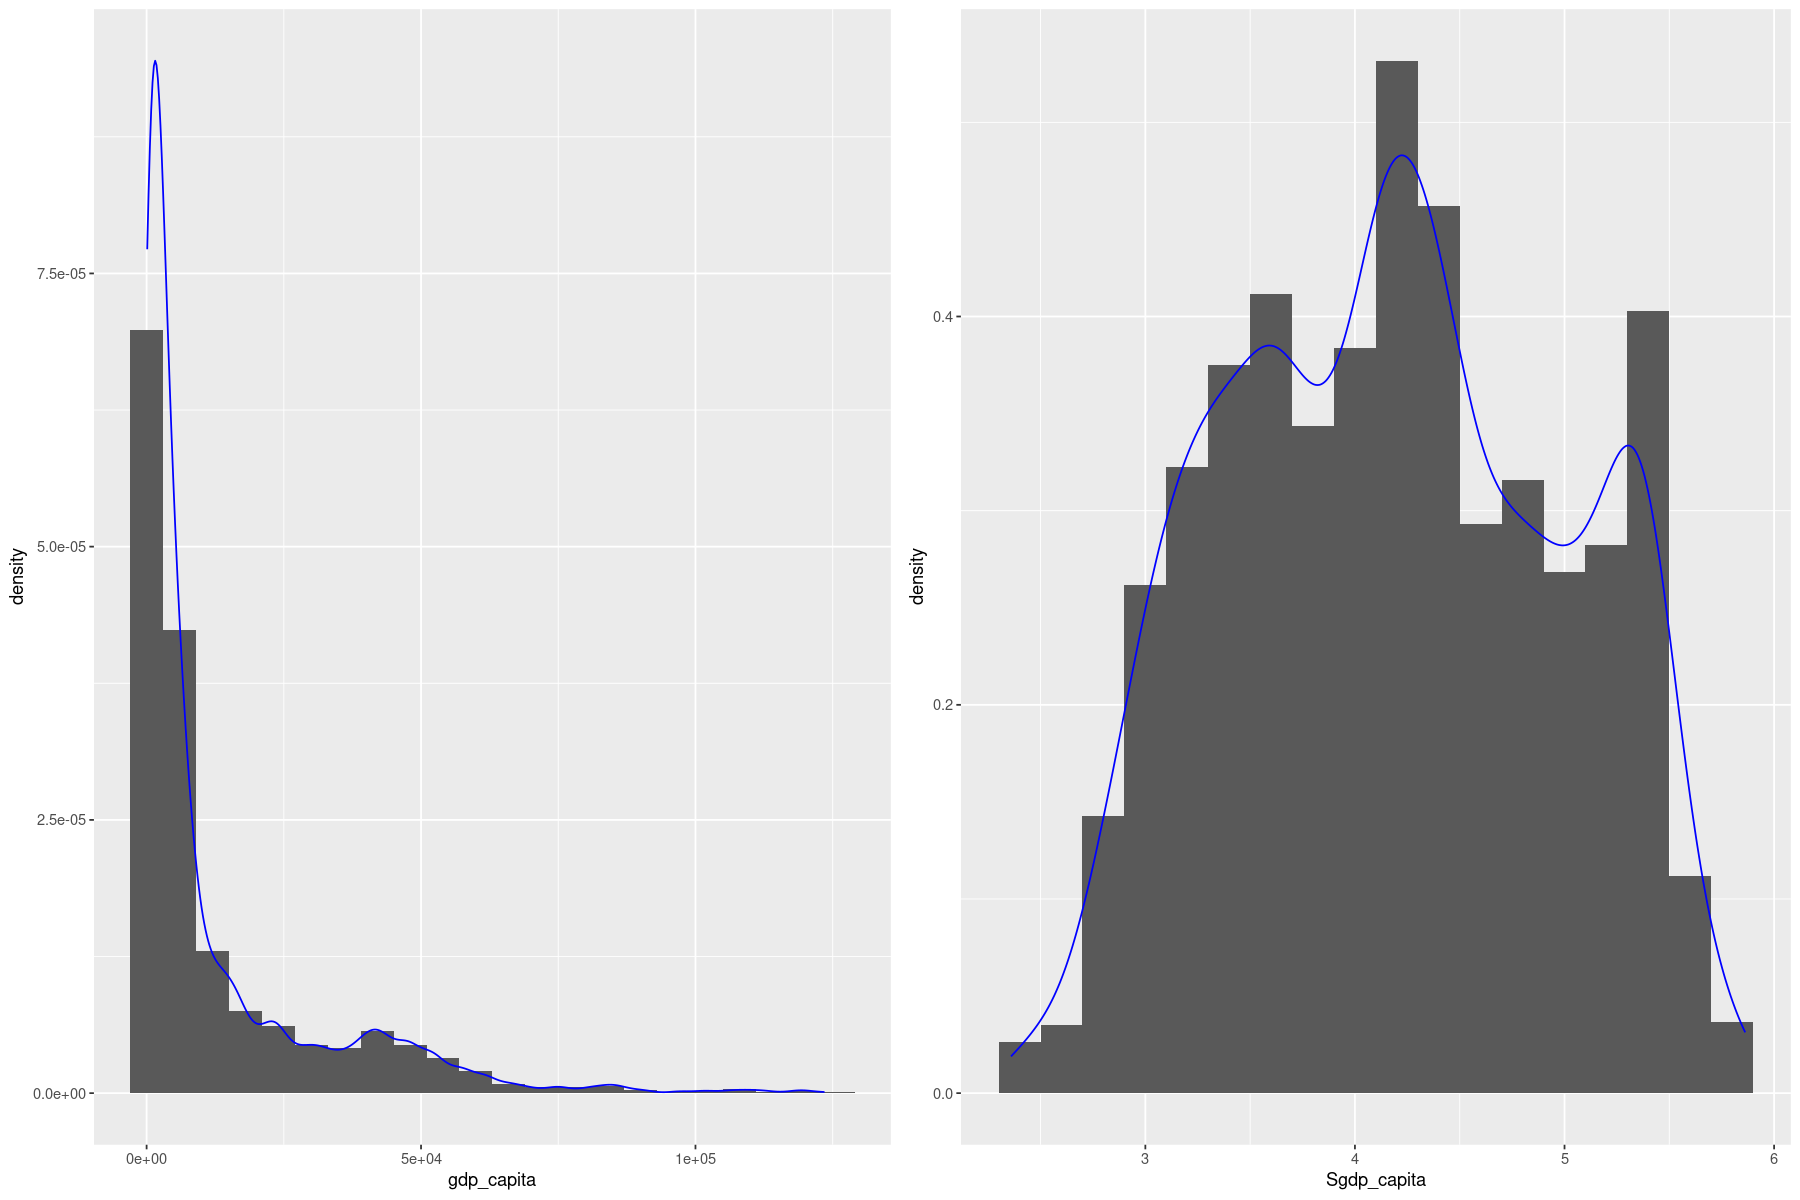

In [32]:
complete_energy[, "Sgdp_capita"] = log(sqrt(complete_energy[, "gdp_capita"]))

g1 = ggplot(complete_energy,aes(x=gdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 6000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=Sgdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

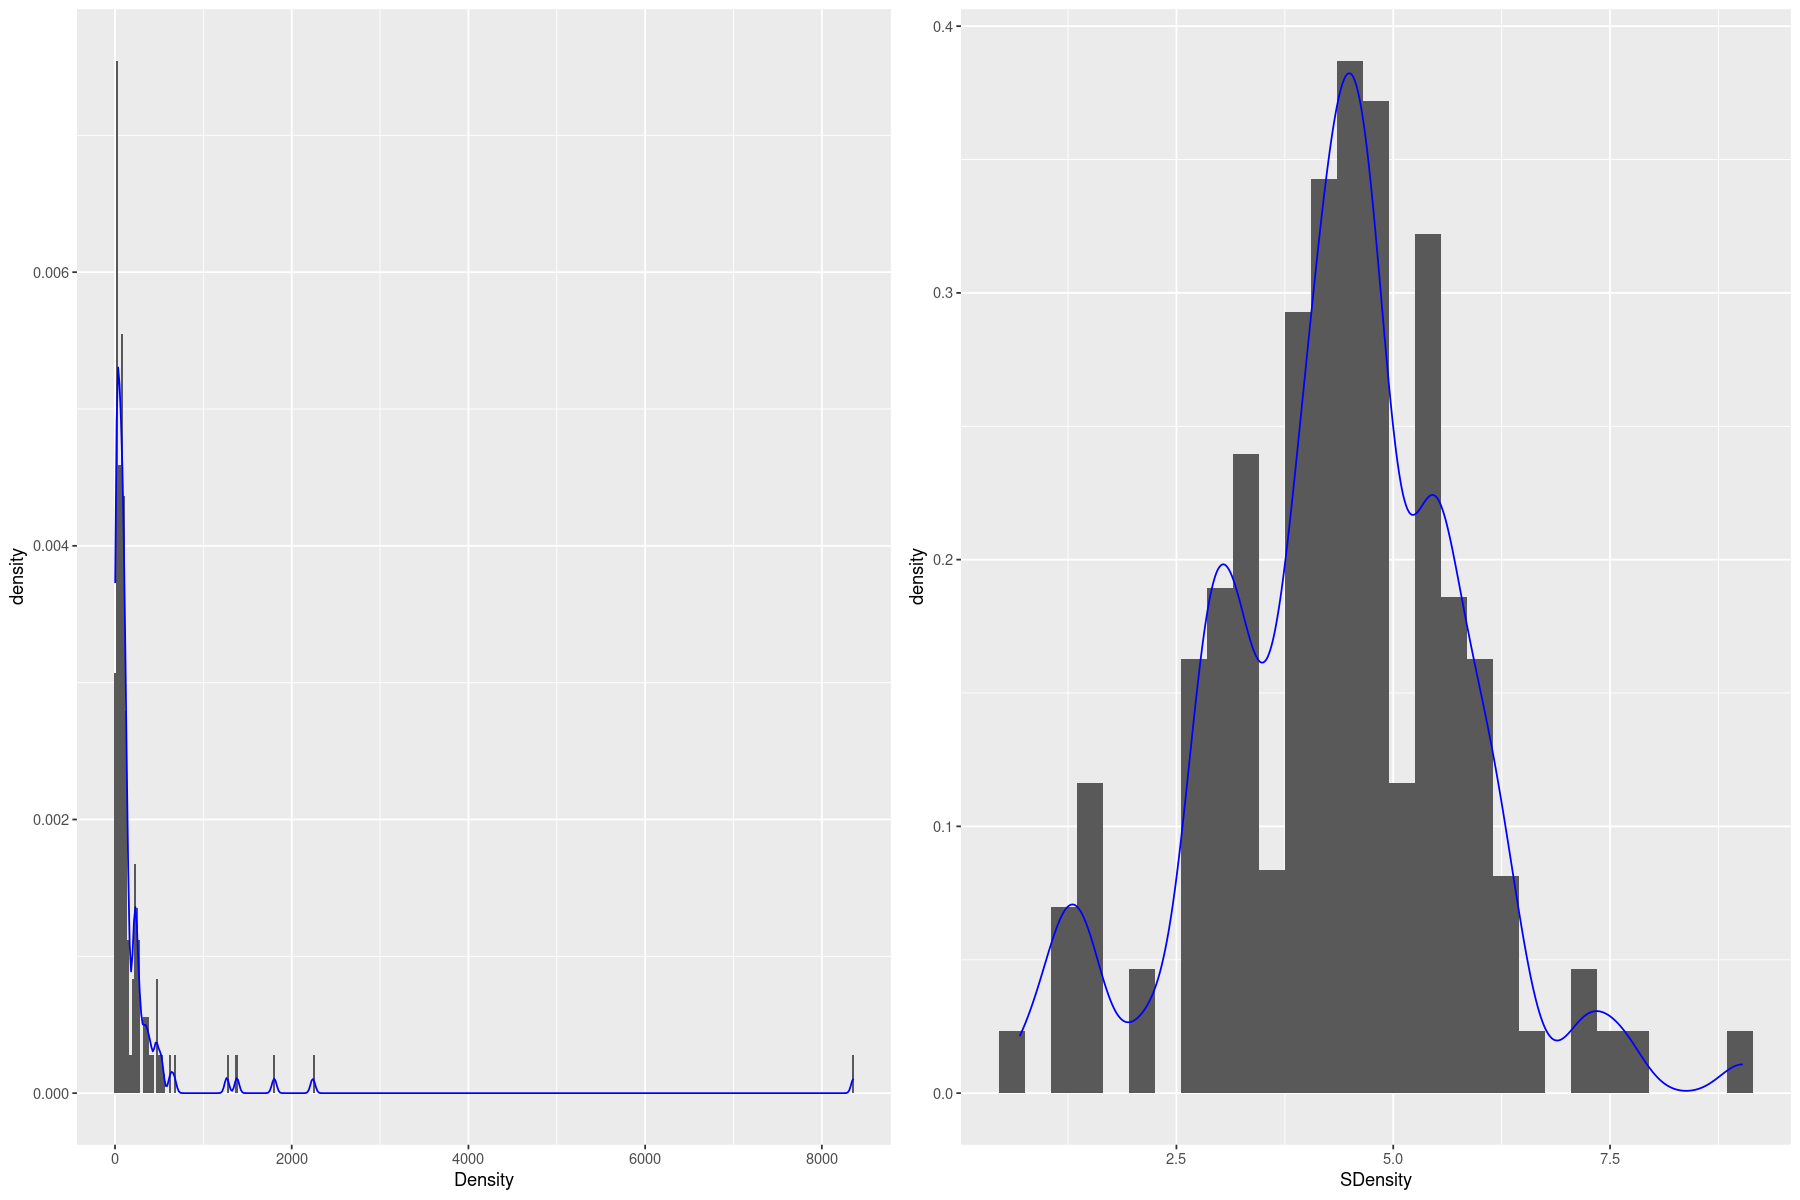

In [33]:
complete_energy[, "SDensity"] = log(complete_energy[, "Density"])

g1 = ggplot(complete_energy,aes(x=Density))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SDensity))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

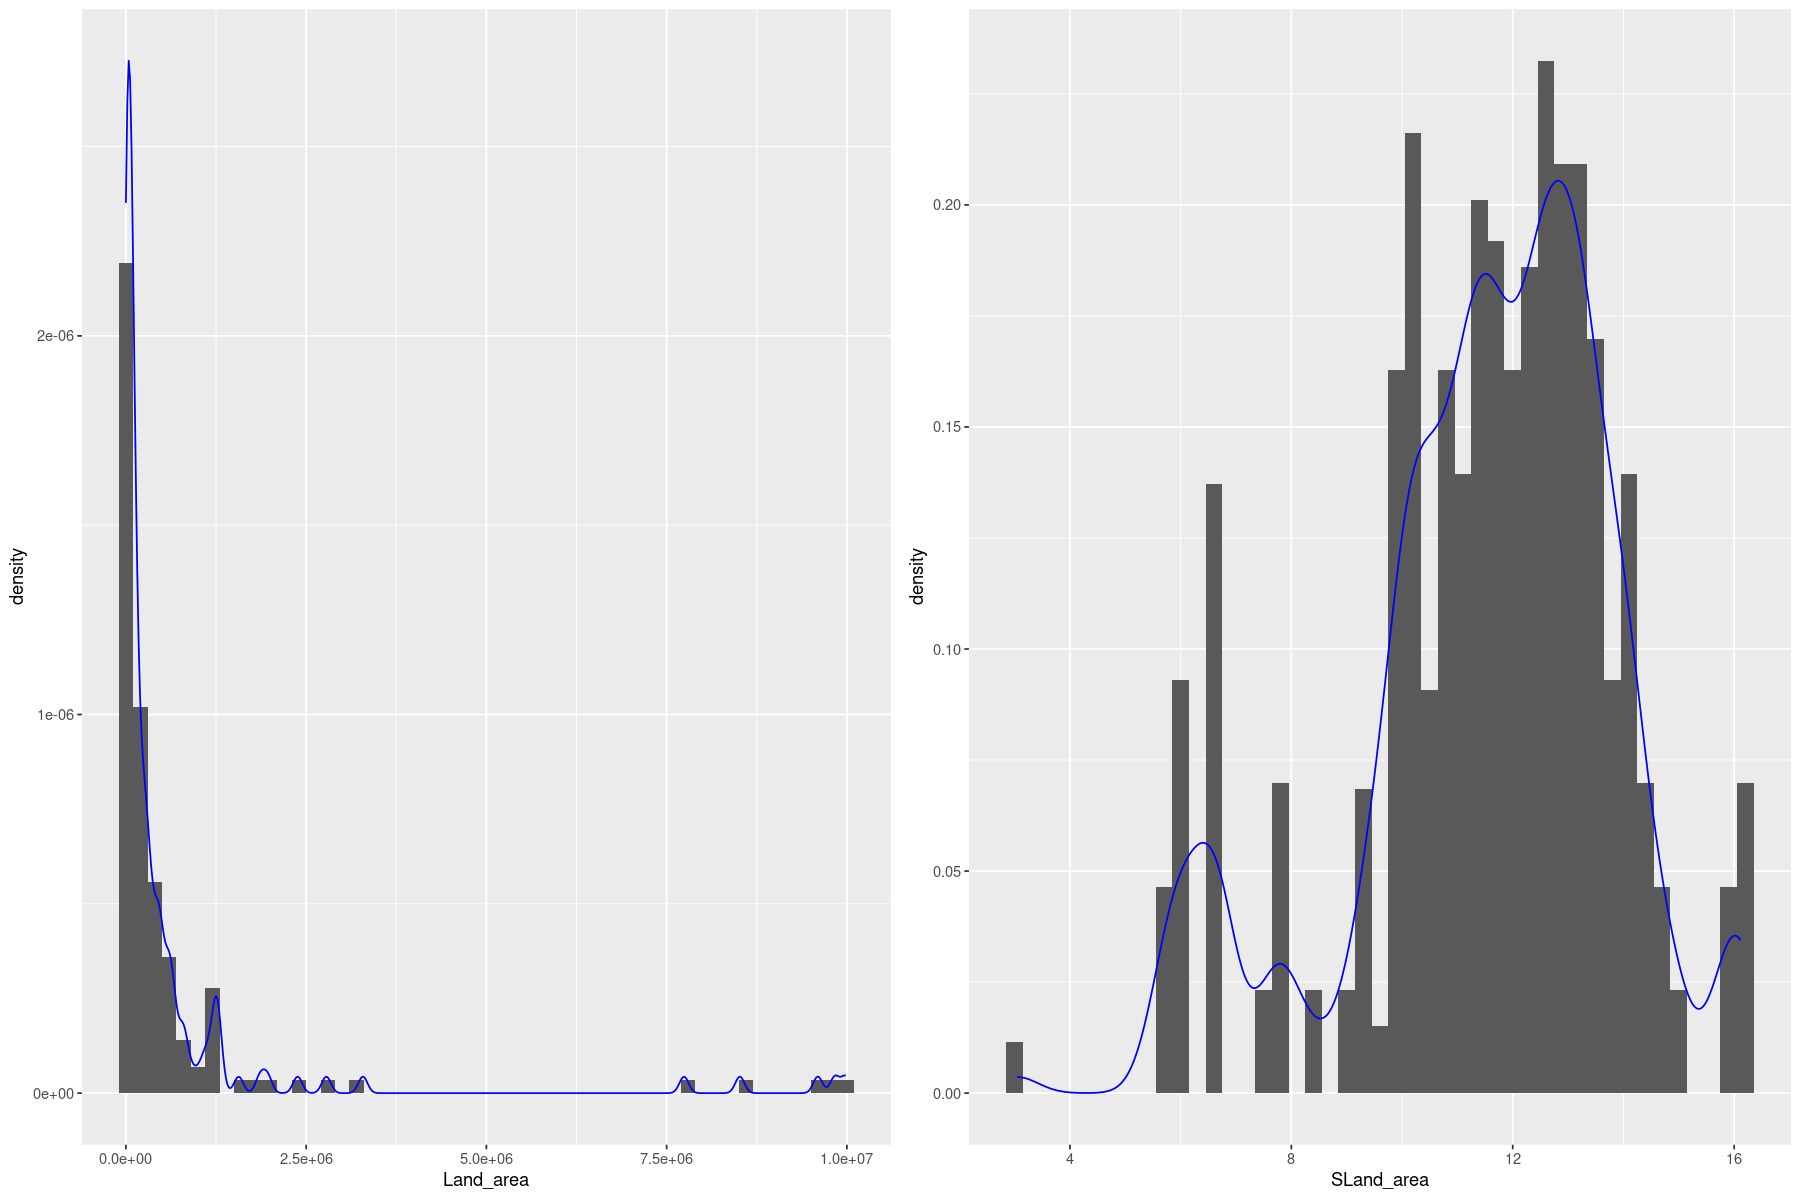

In [34]:
complete_energy[, "SLand_area"] = log(complete_energy[, "Land_area"])

g1 = ggplot(complete_energy,aes(x=Land_area))+ geom_histogram(aes(y=..density..),binwidth = 200000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLand_area))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

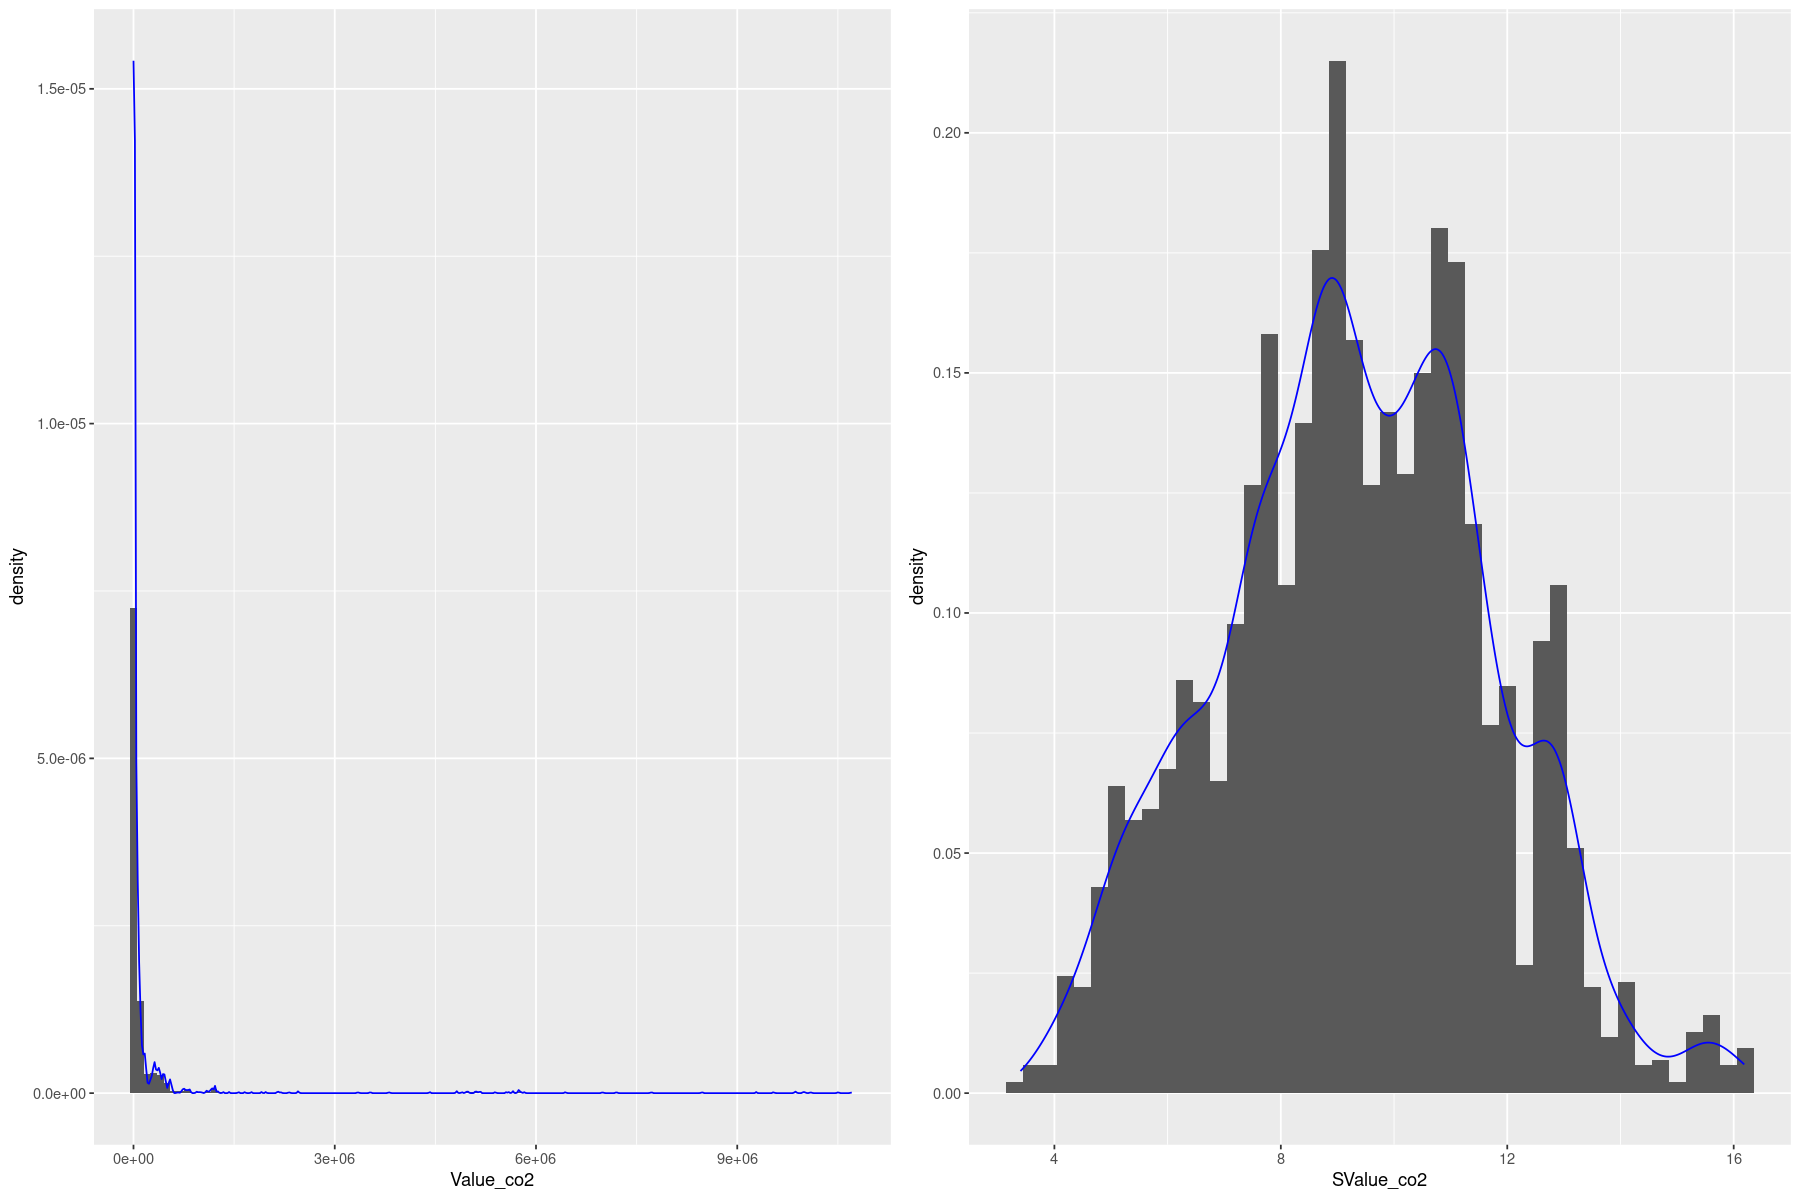

In [35]:
complete_energy[, "SValue_co2"] = log(complete_energy[, "Value_co2"])

g1 = ggplot(complete_energy,aes(x=Value_co2))+ geom_histogram(aes(y=..density..),binwidth = 100000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SValue_co2))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

In [36]:
complete_energy = complete_energy[-c(3,4,5,6,7,8,9,10,11,14,15,16)]

In [37]:
summary(complete_energy)

                 Entity          Year        Value_co2          gdp_growth     
 Algeria            :  20   2014   : 147   Min.   :      30   Min.   :-36.658  
 Angola             :  20   2015   : 147   1st Qu.:    2188   1st Qu.:  1.771  
 Antigua and Barbuda:  20   2016   : 146   Median :   10425   Median :  3.788  
 Argentina          :  20   2017   : 146   Mean   :  168818   Mean   :  3.895  
 Armenia            :  20   2018   : 146   3rd Qu.:   58145   3rd Qu.:  5.957  
 Australia          :  20   2019   : 146   Max.   :10707220   Max.   : 63.380  
 (Other)            :2748   (Other):1990                                       
    Latitude         Longitude        SAccess_elec   SAccess_fuels  
 Min.   :-40.901   Min.   :-175.20   Min.   :0.225   Min.   :0.000  
 1st Qu.:  1.651   1st Qu.: -10.94   1st Qu.:3.975   1st Qu.:3.139  
 Median : 17.061   Median :  18.64   Median :4.575   Median :4.413  
 Mean   : 18.140   Mean   :  12.97   Mean   :4.160   Mean   :3.633  
 3rd Qu.: 39.40

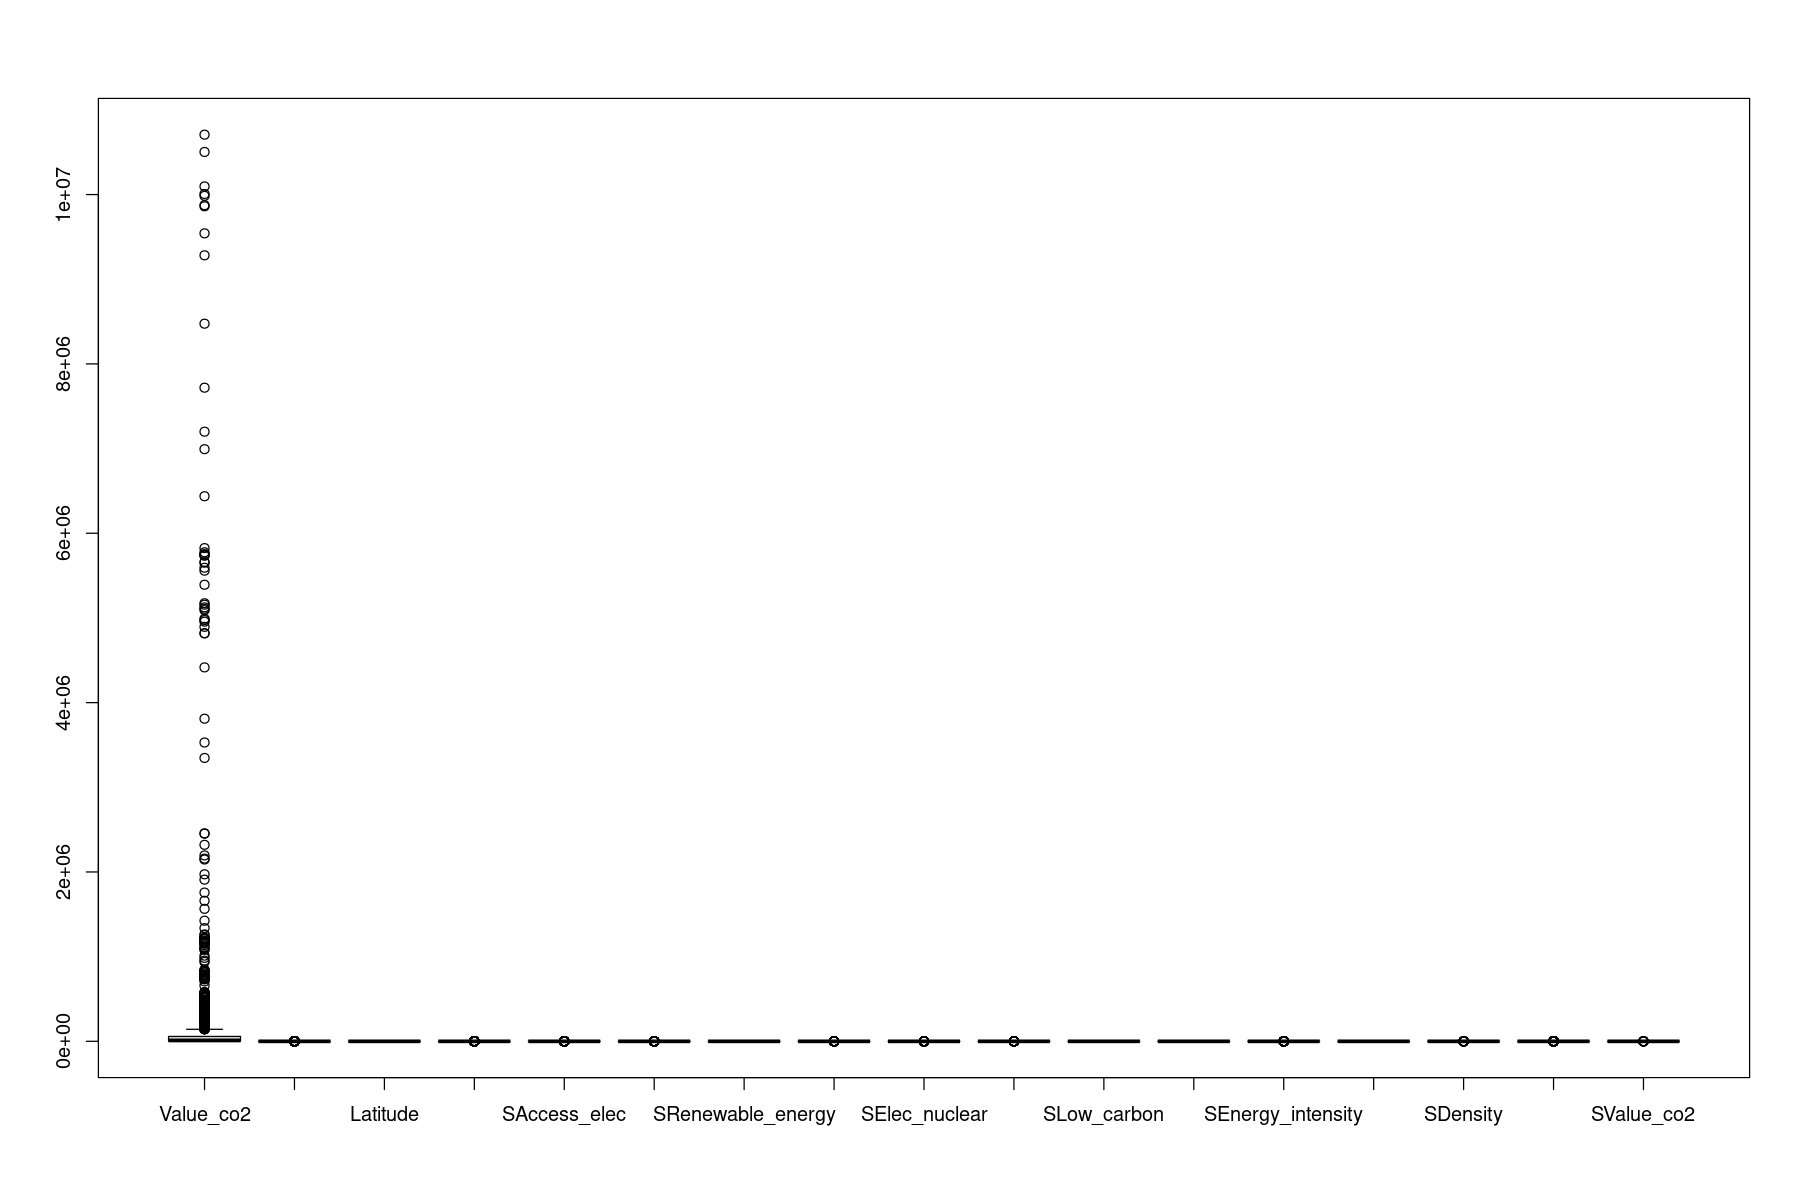

In [38]:
boxplot(complete_energy[,-c(1,2)])

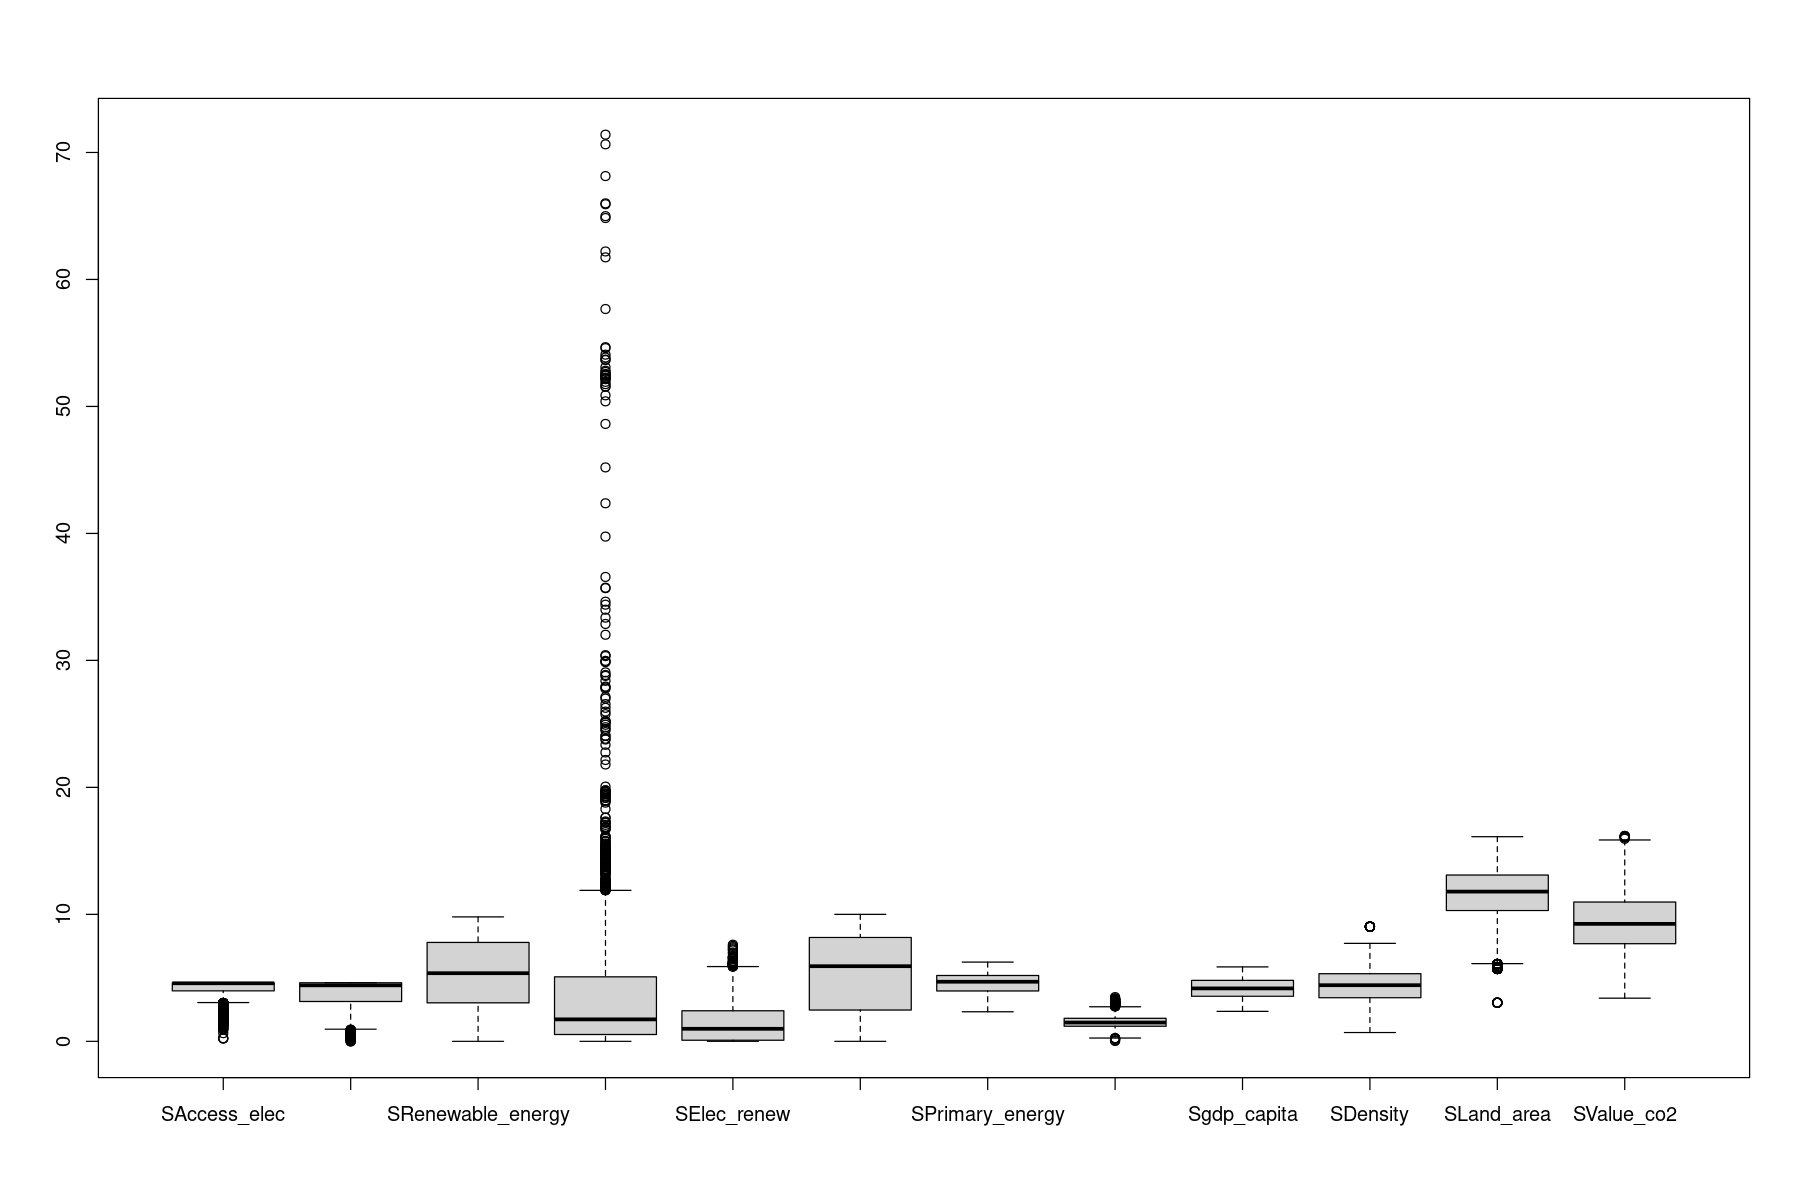

In [39]:
boxplot(complete_energy[,-c(1:6,11)])

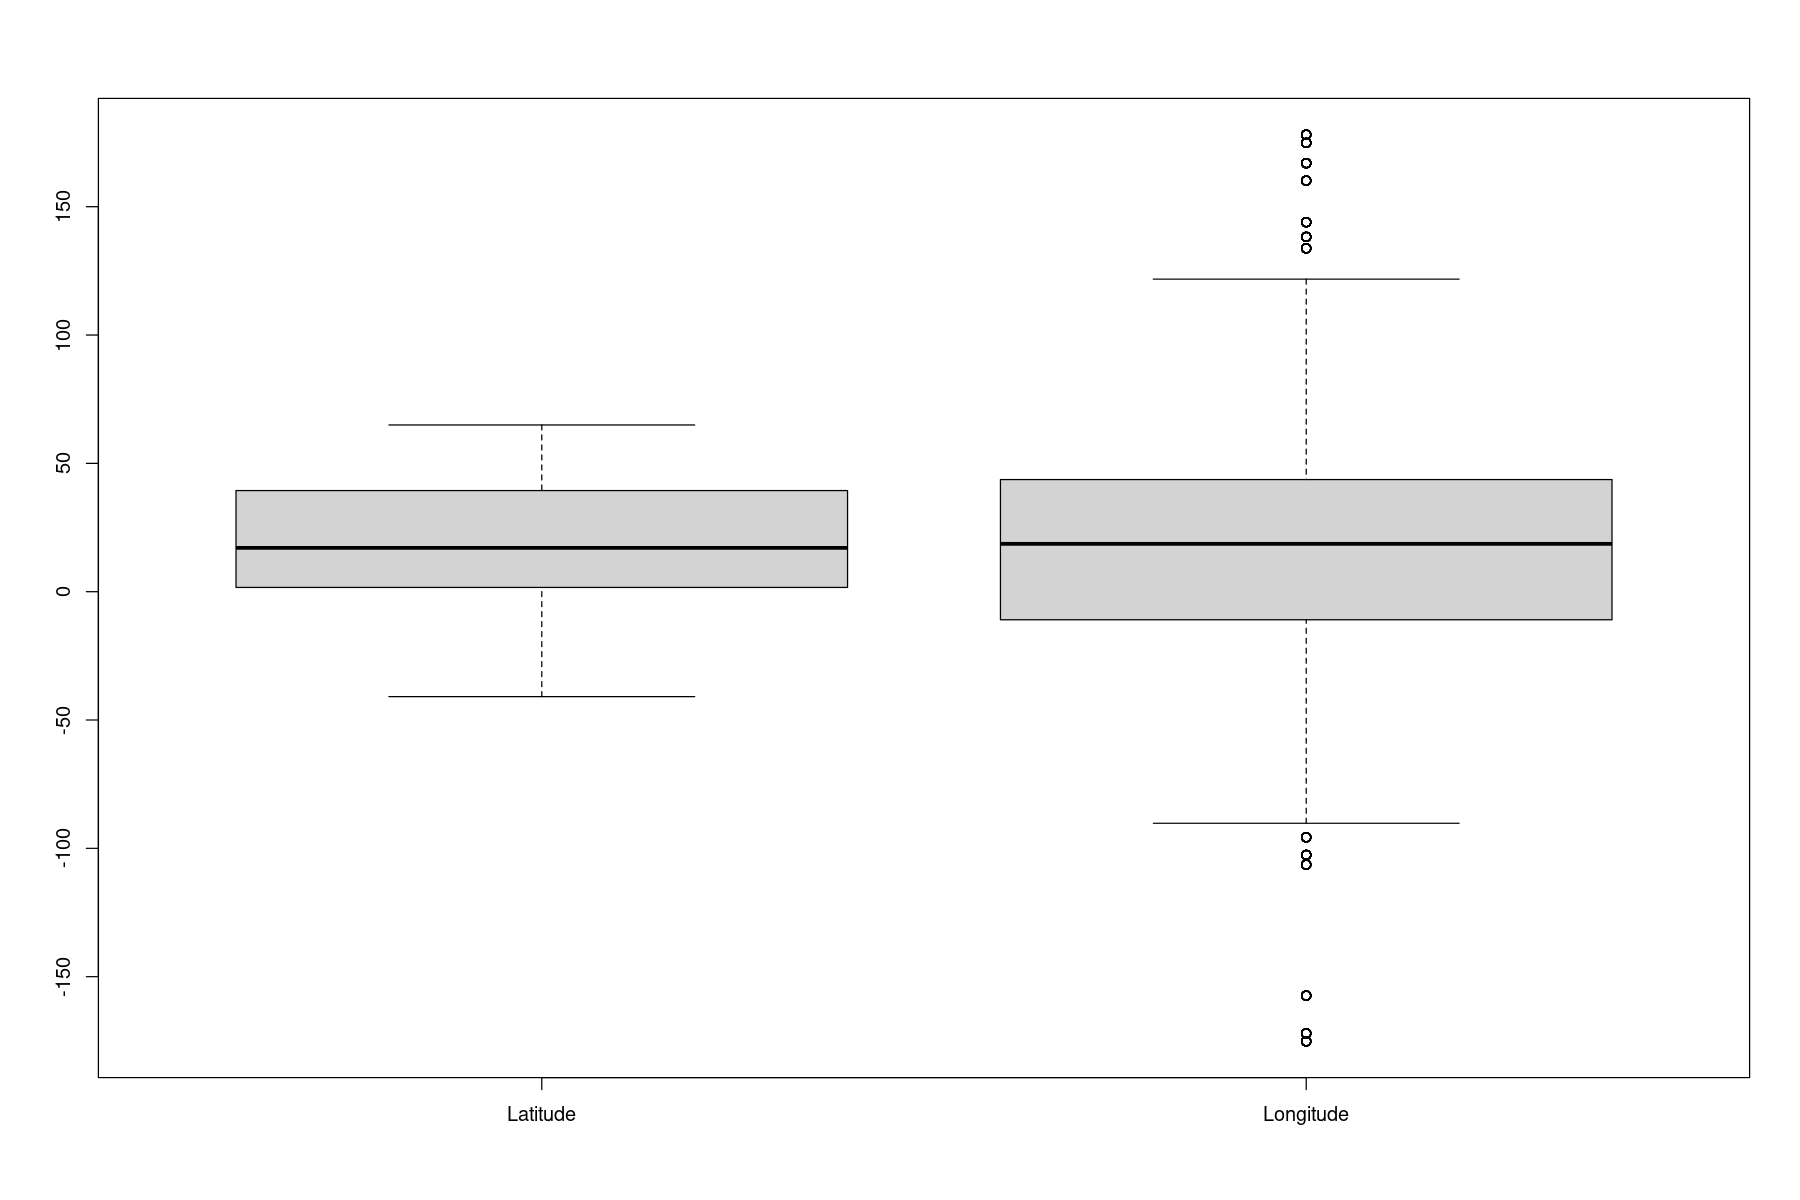

In [40]:
boxplot(complete_energy[,c(5:6)])

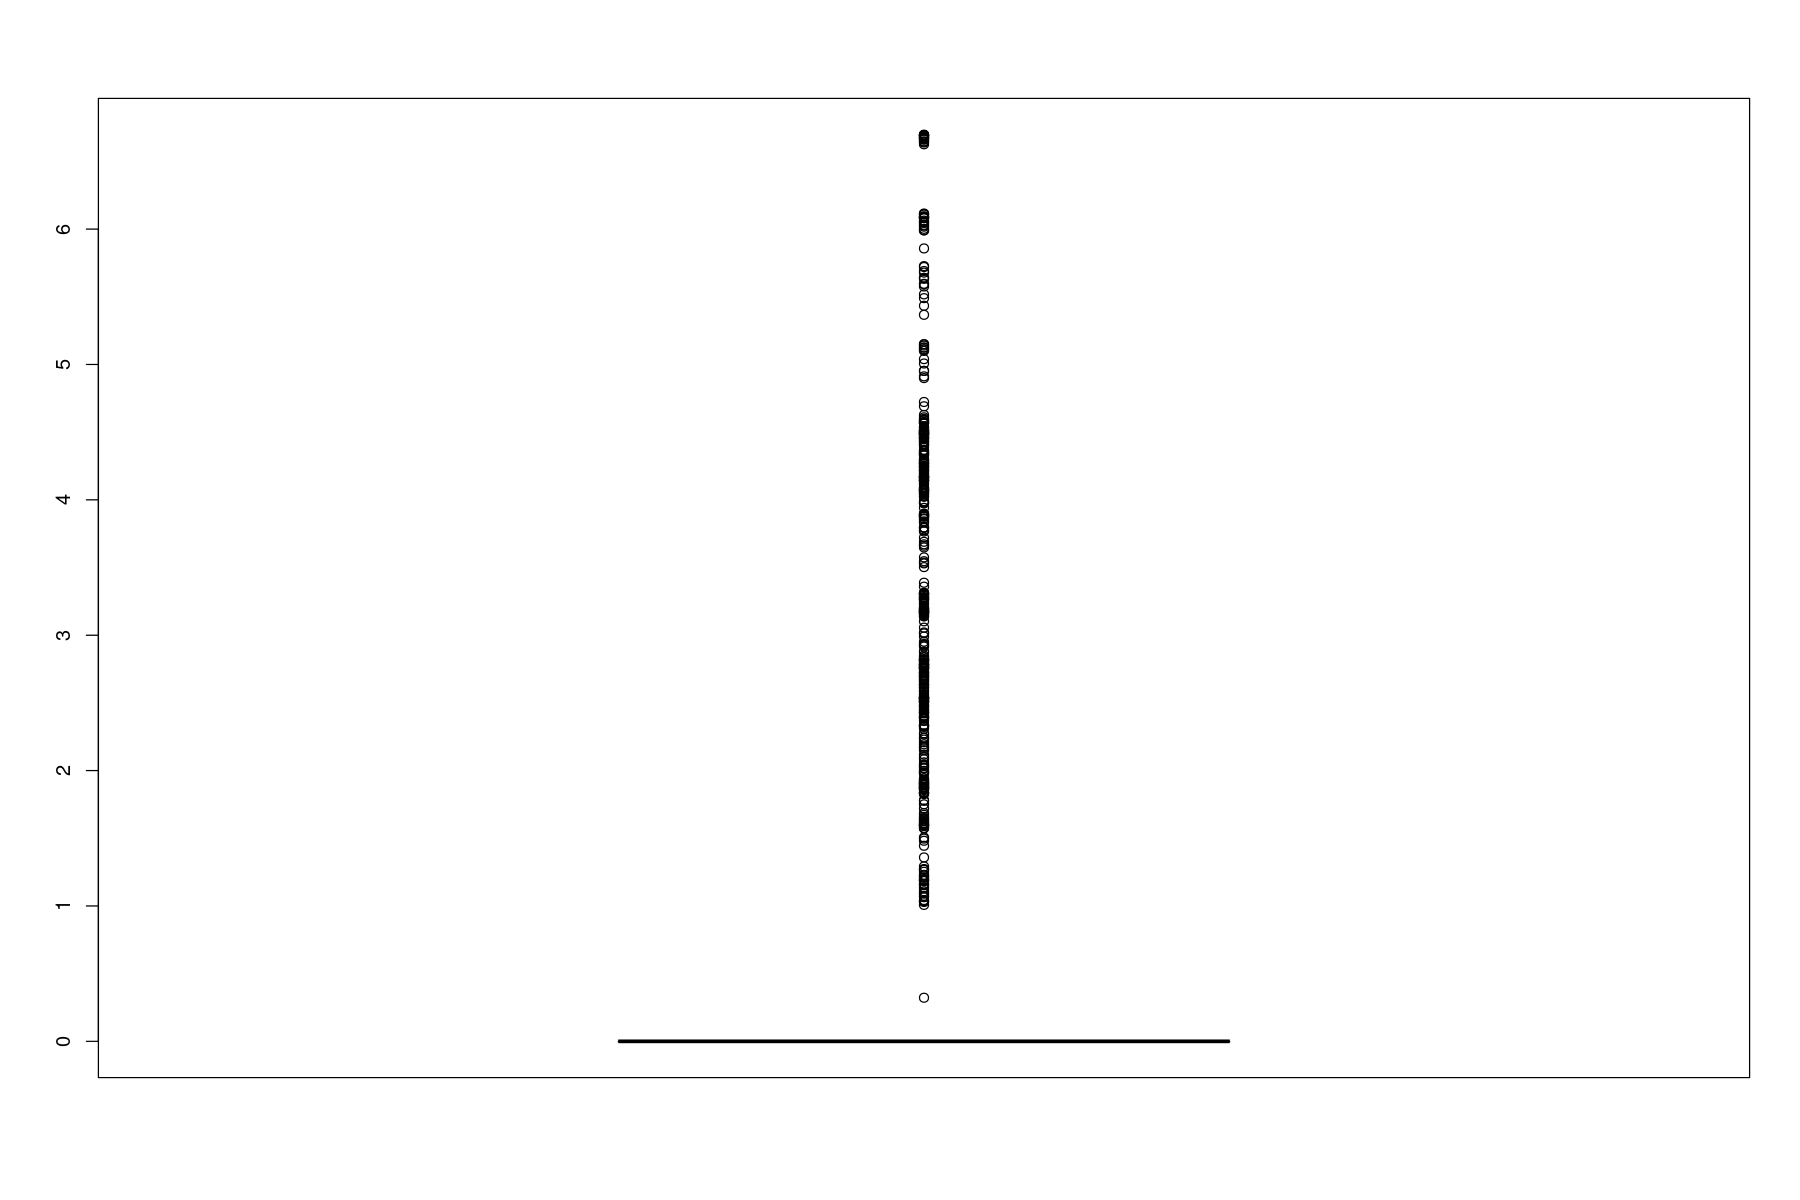

In [41]:
boxplot(complete_energy[,c(11)]) #nuclear

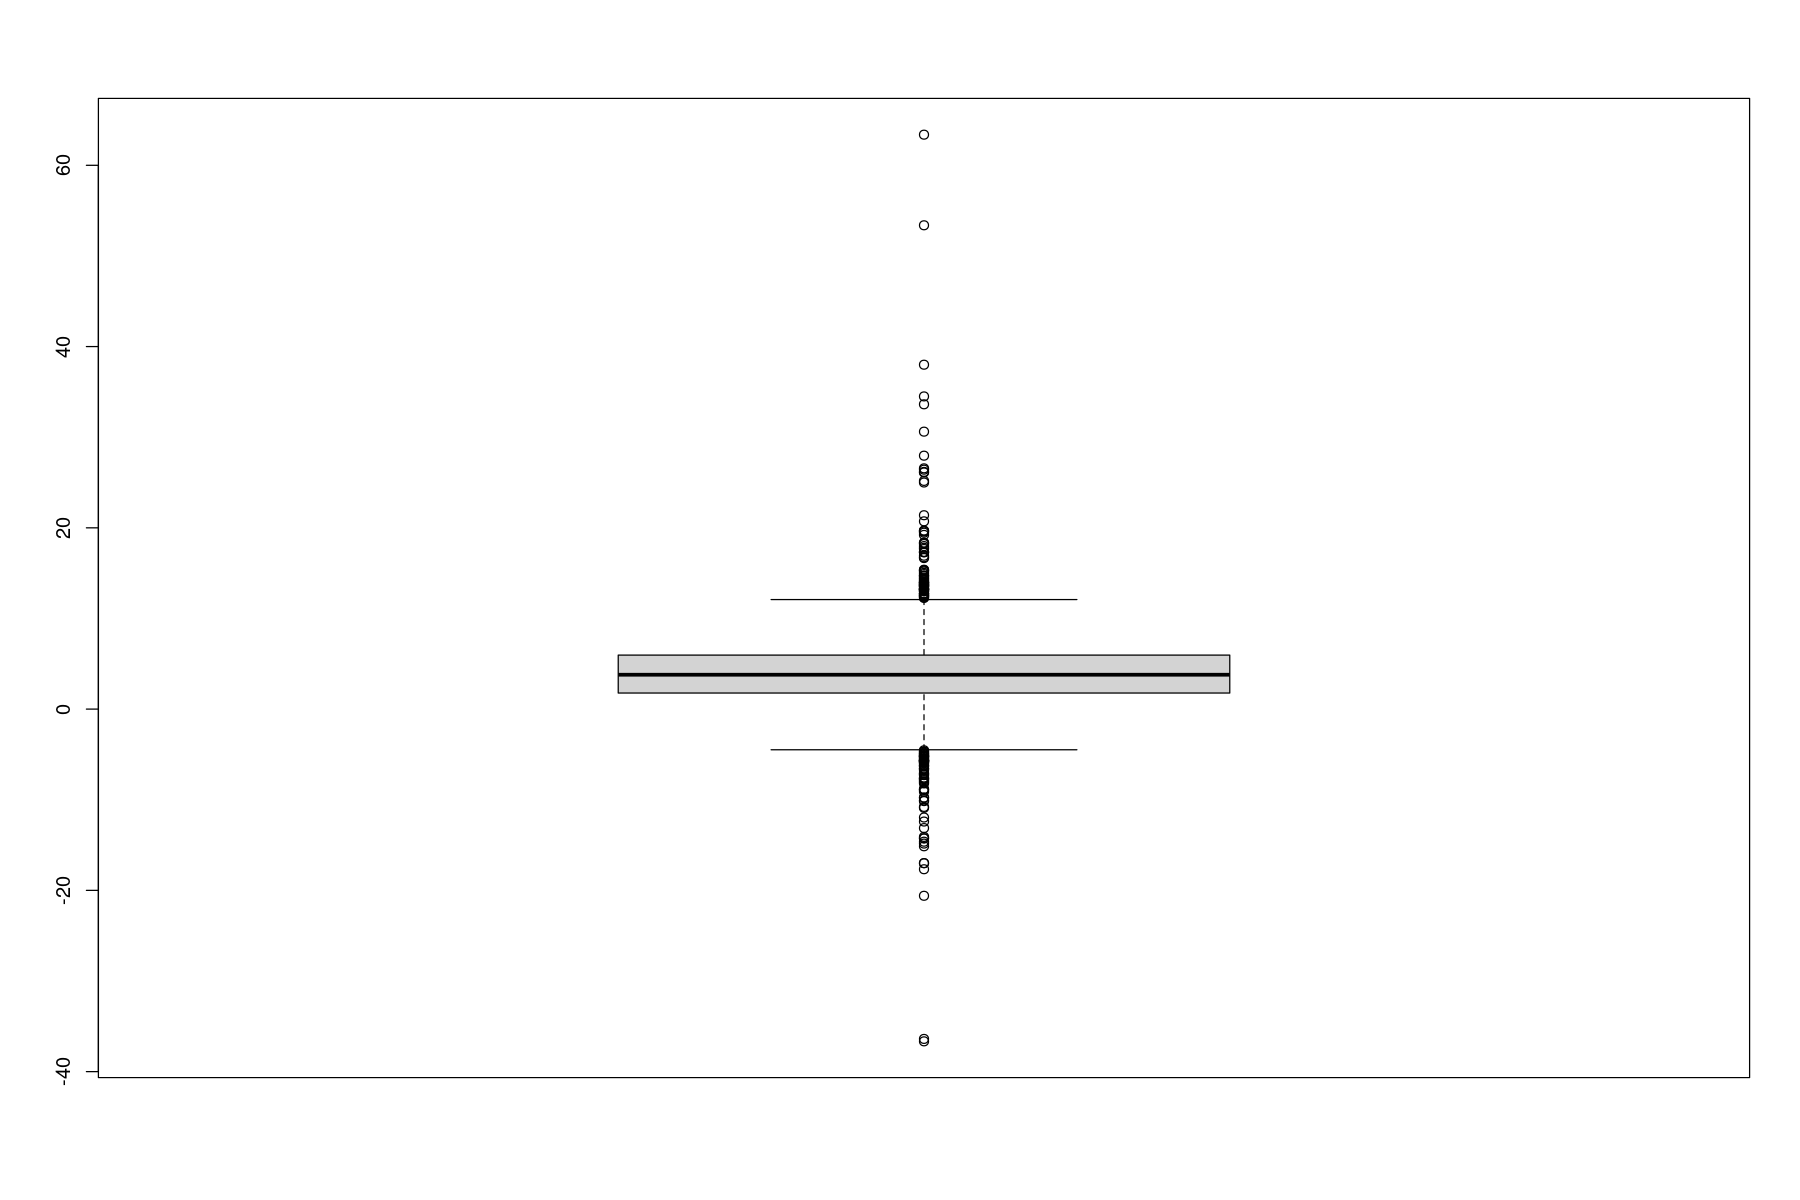

In [42]:
boxplot(complete_energy[,c(4)]) #gdp growth

## Question 5 : Les 5 pays les plus émetteurs de CO2  

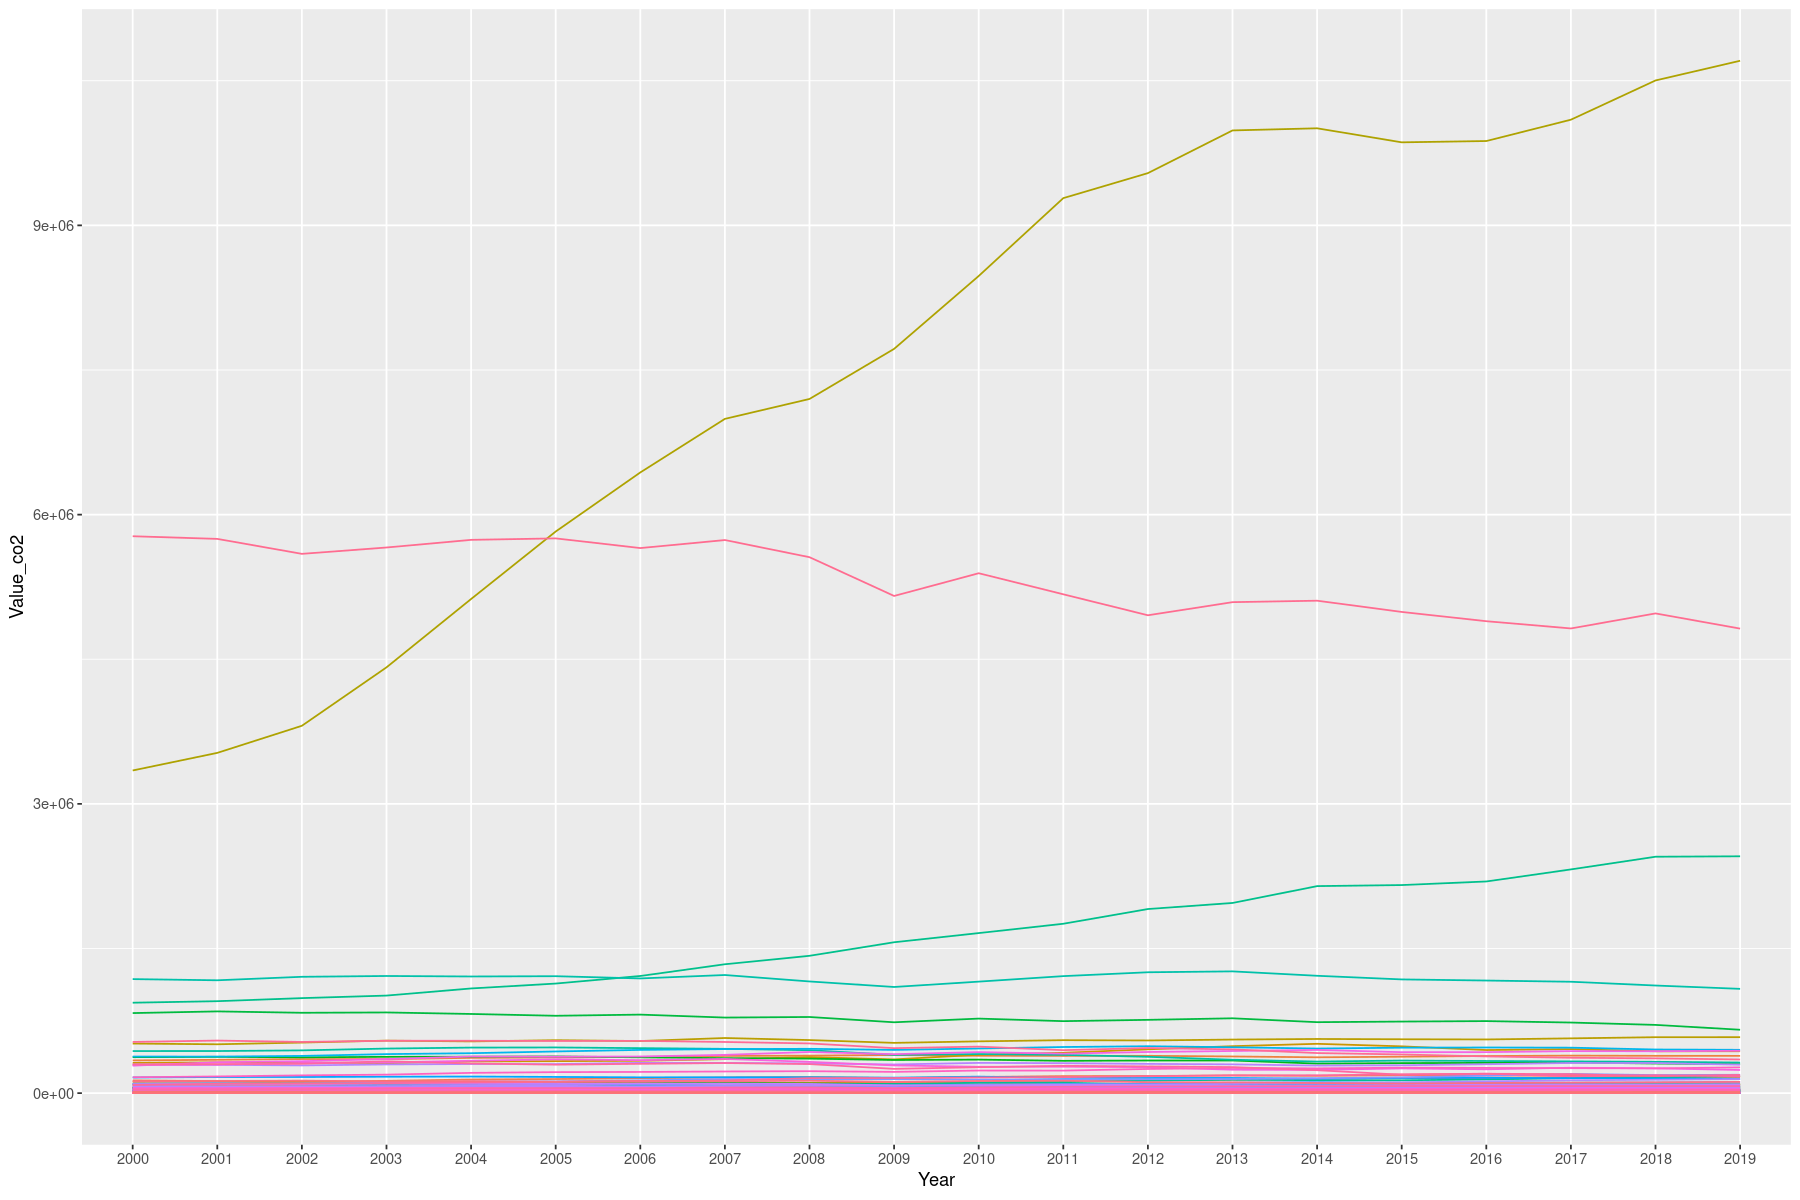

In [43]:
#Hétérogénéité d'émission de CO2 de pays

ggplot(complete_energy) + 
  aes(x = Year, y = Value_co2, color = Entity, group = Entity) + 
  geom_line(show.legend = FALSE) 
#complete energy avec les valeurs transformées mais on garde value_Co2
#parfoisun groupe contient une seule observation et je pense que cela ne s'affiche donc pa

In [44]:
paste('ecart type')
sd(complete_energy$Value_co2)
paste('moyenne :')
mean(complete_energy$Value_co2)
paste('min')
min(complete_energy$Value_co2)
paste('max')
max(complete_energy$Value_co2)

[1] "ecart type"

[1] 818020.2

[1] "moyenne :"

[1] 168818.2

[1] "min"

[1] 30

[1] "max"

[1] 10707220

Entity         Value_co2
28  China          7636642.5
143 United States  5329538.5
63  India          1633979.0
69  Japan          1183734.5
51  Germany         773644.5
25  Canada          547644.5
142 United Kingdom  470604.0
86  Mexico          444619.5
67  Italy           399400.5
124 South Africa    398041.5

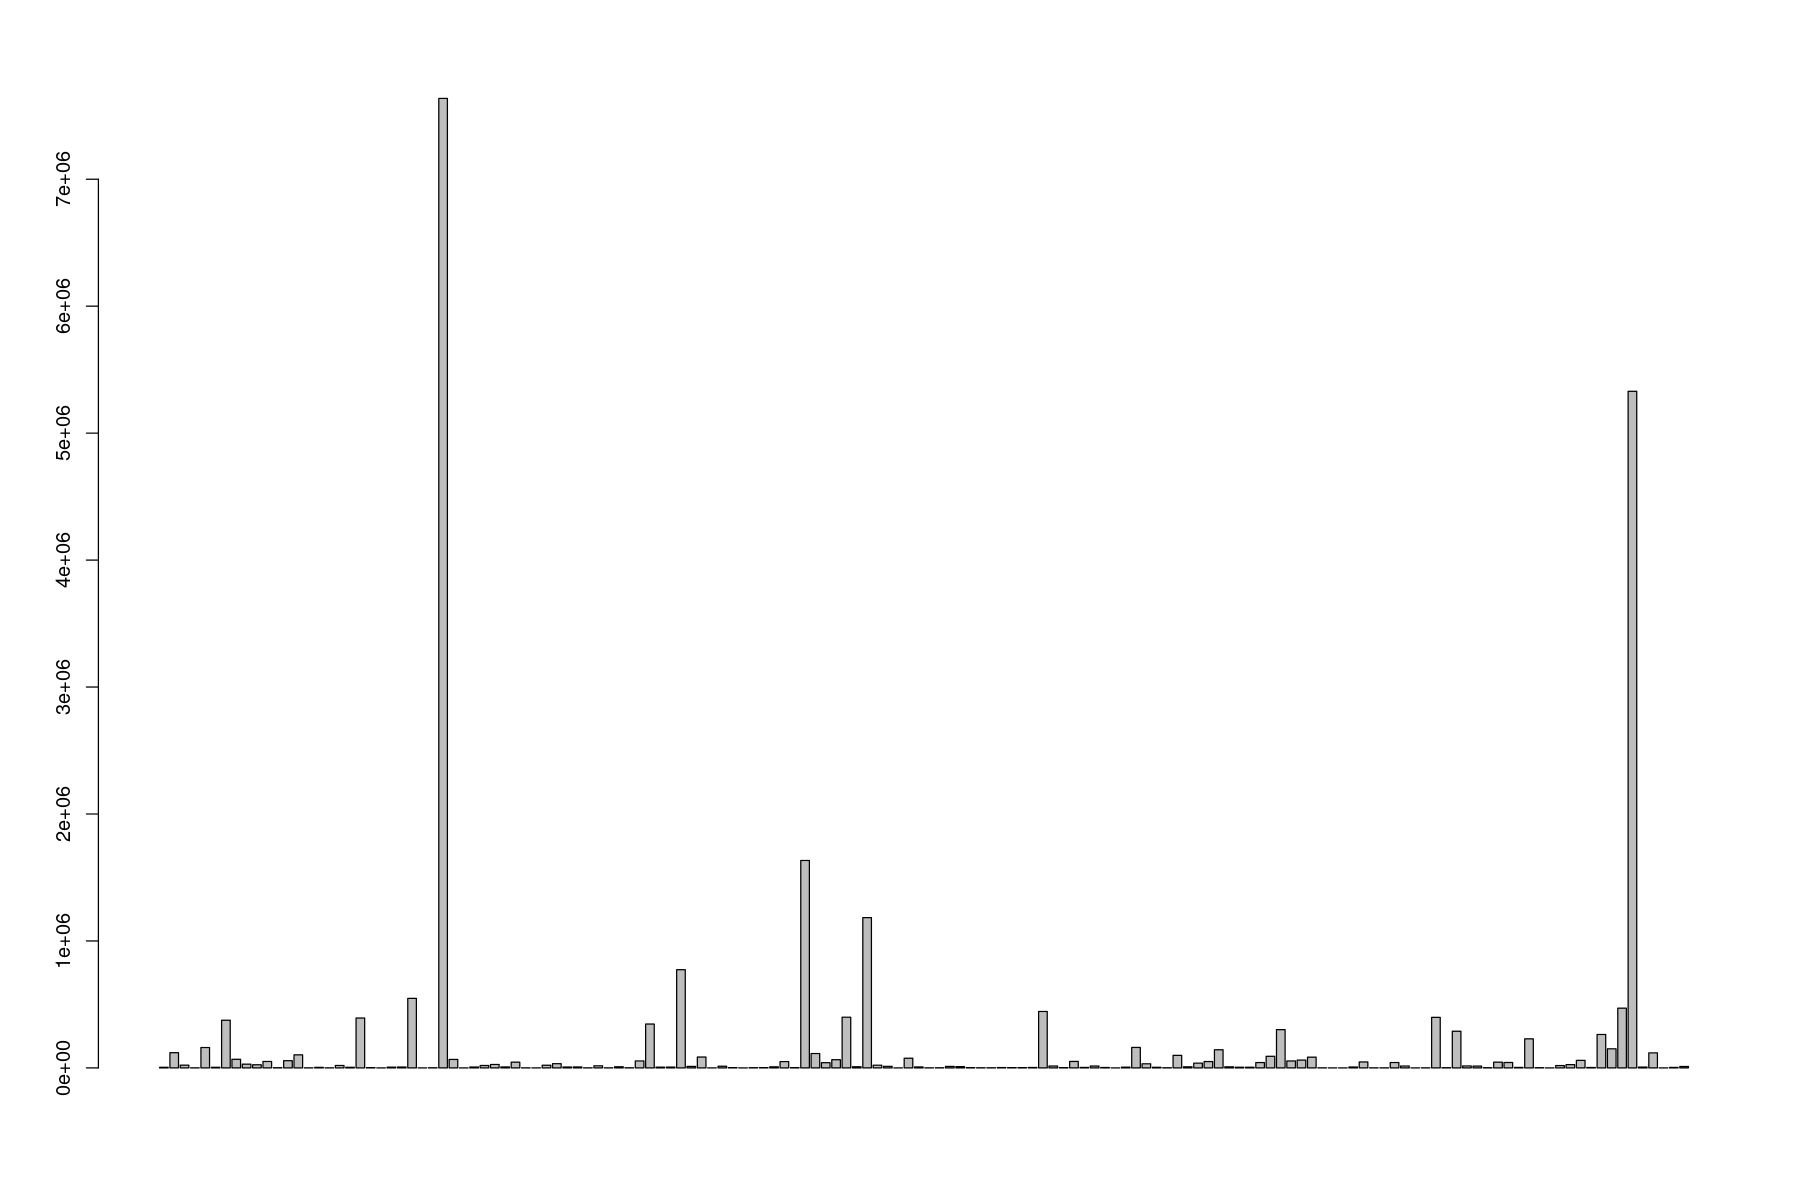

In [45]:
#Les pays les plus émetteurs de CO2
Moy = aggregate(data=complete_energy,Value_co2~Entity,FUN=mean)
index = order(Moy$Value_co2, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe,10)
barplot(Moy[,2])

## Question 6: Analyse descriptive multidimensionnelle

### Variables quantitatives

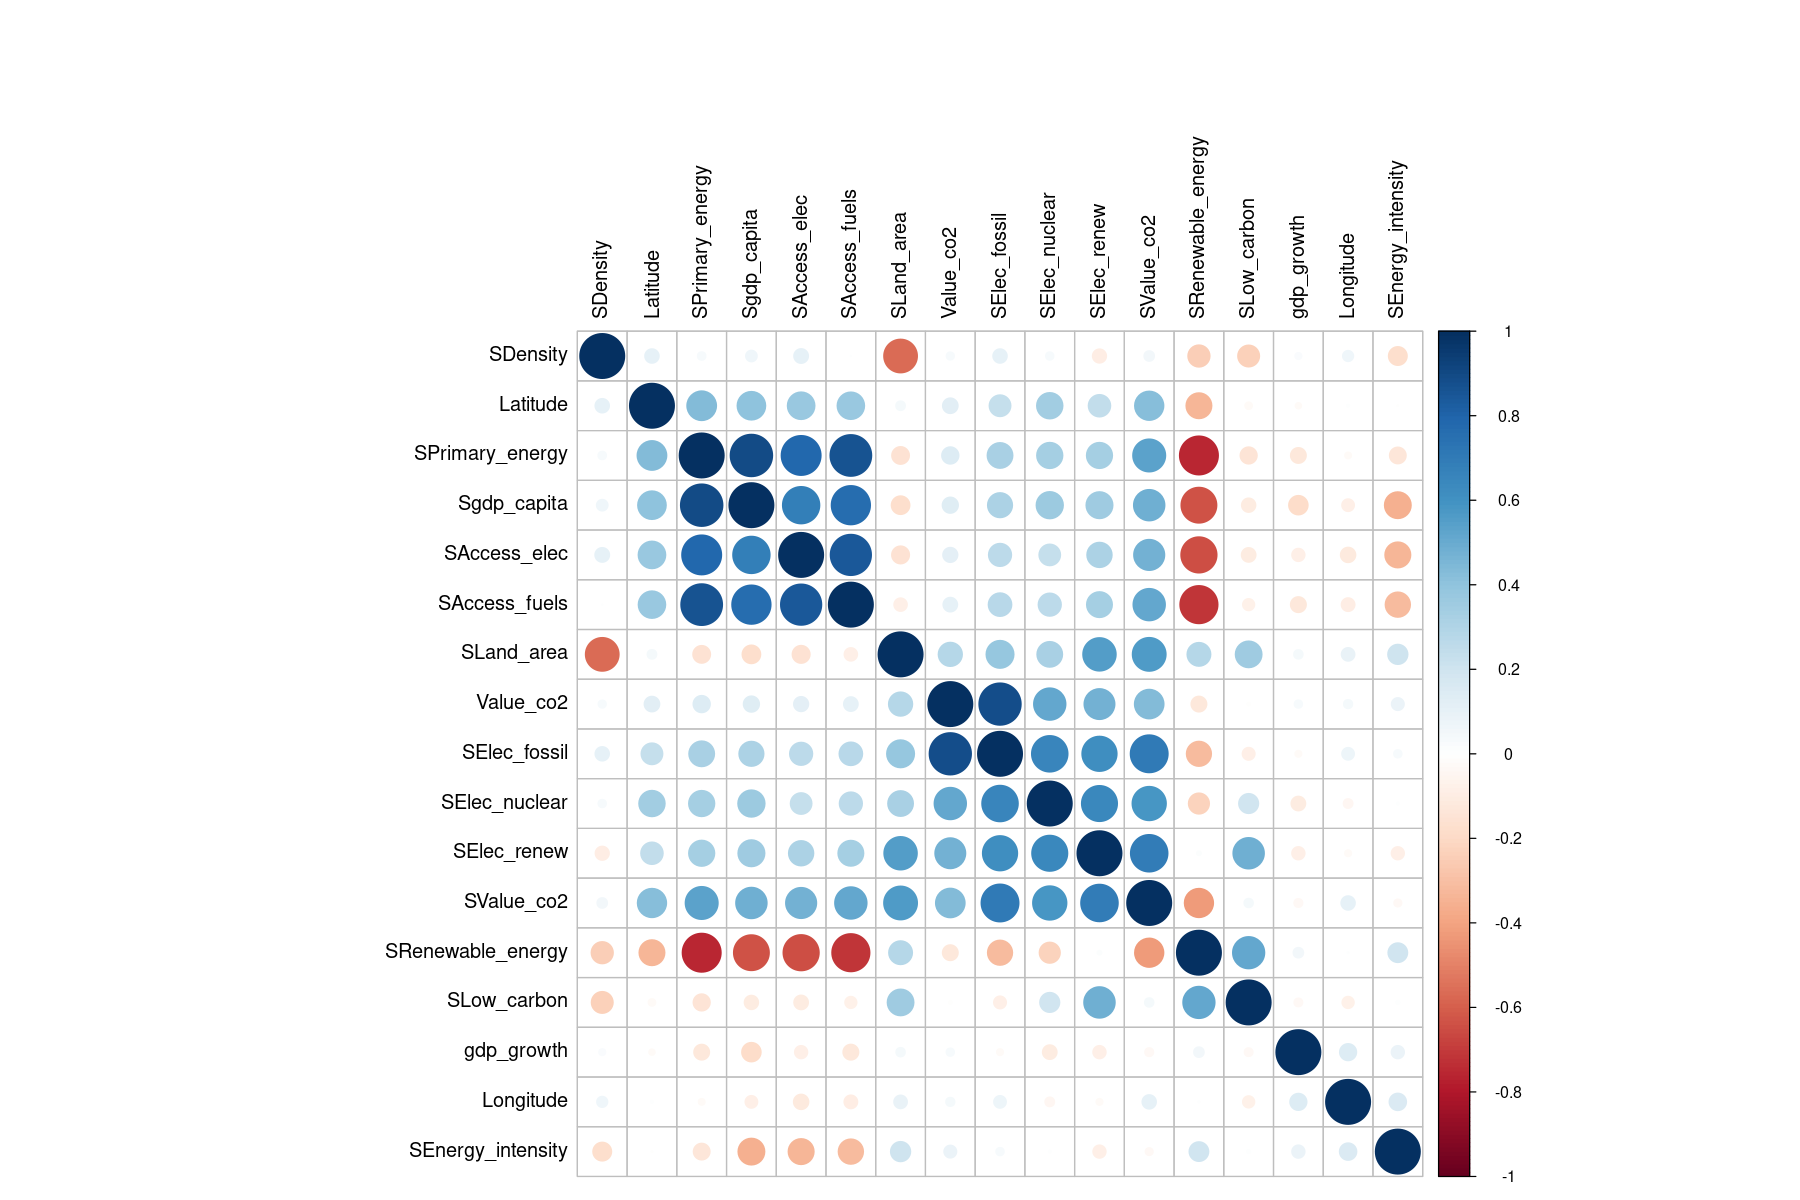

In [46]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
par(mfrow=c(1,1), mar=c(5,5,2,2))
corrplot(mcor, order="hclust", tl.col="black")

### Variable qualitative

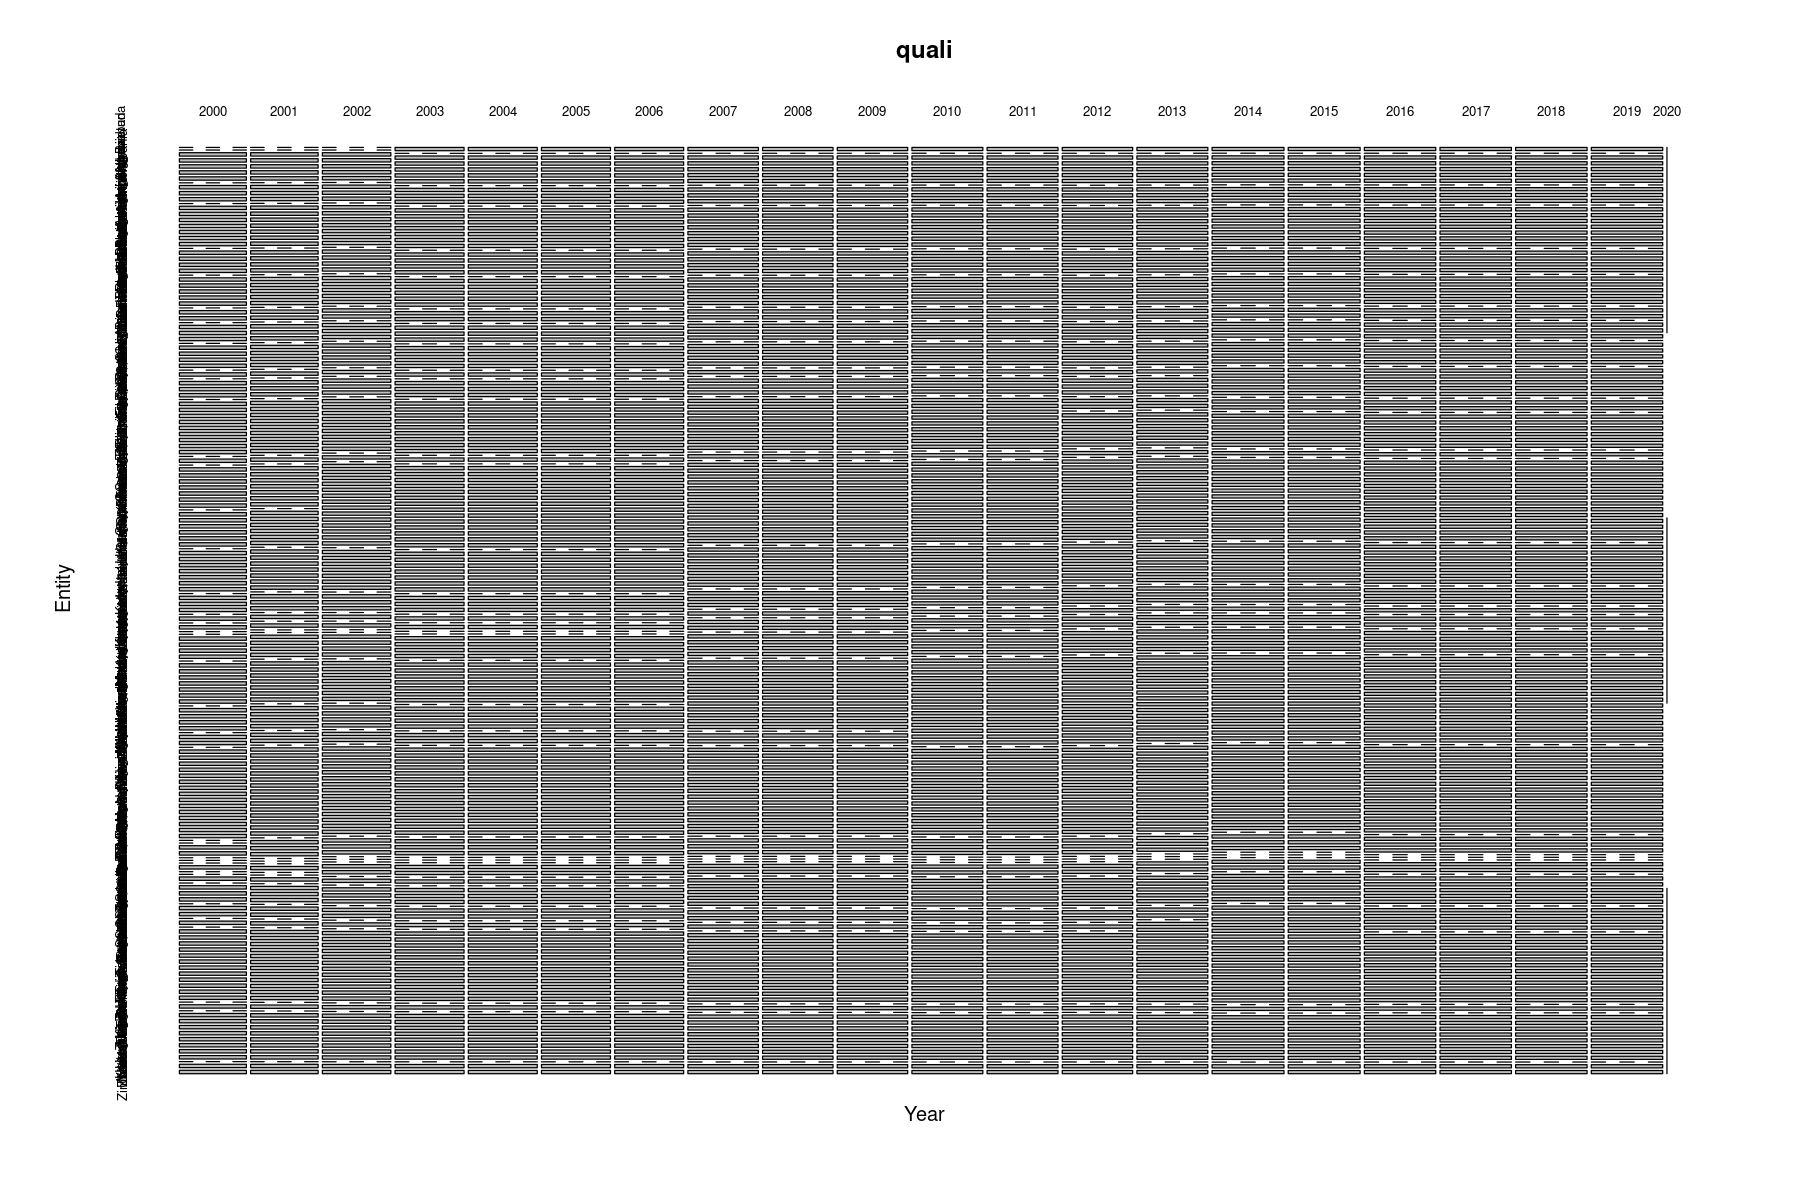

In [47]:
quali= xtabs(~Year + Entity, data = complete_energy)
mosaicplot(quali)

### Question 8 :  Dépendance entre Year et la variable à prédire

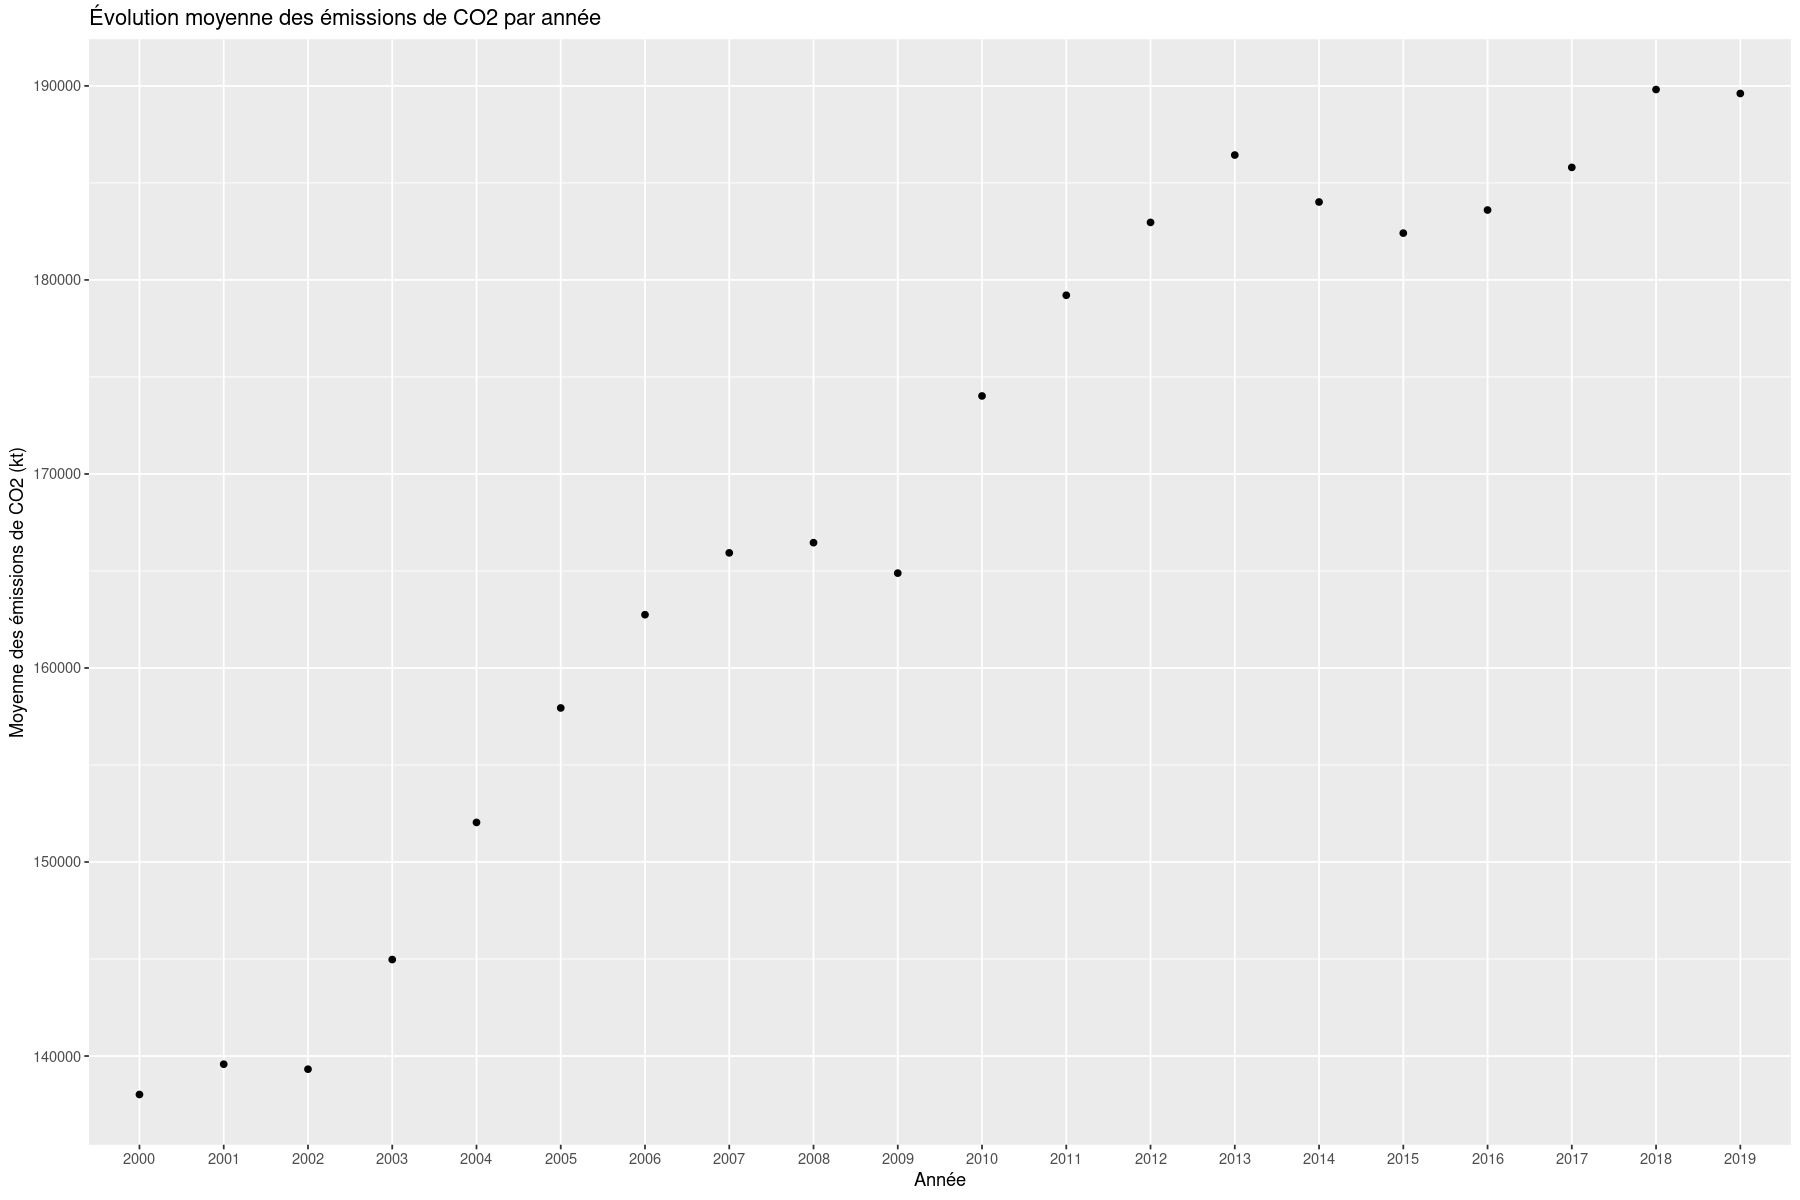

In [48]:
Moy = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = mean)

ggplot(Moy) + 
  aes(x = Year, y = Value_co2) + 
  geom_point() +
  labs(x = "Année", y = "Moyenne des émissions de CO2 (kt)", title = "Évolution moyenne des émissions de CO2 par année")

In [49]:
Std = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = sd )

Median = aggregate( Value_co2 ~ Year, data = complete_energy, FUN = median )

Stat = Moy
Stat$std = Std$Value_co2
Stat$median = Median$Value_co2

names(Stat)[which(names(Stat) == "Value_co2")] = "mean"

Stat

Year mean     std      median
1  2000 138016.4 586021.7  9000 
2  2001 139578.2 589751.5  9045 
3  2002 139321.1 588124.4  8985 
4  2003 144971.8 619668.0  9310 
5  2004 152039.4 661777.7  9560 
6  2005 157939.6 702156.5 10510 
7  2006 162745.4 733594.1  9970 
8  2007 165933.1 766181.3 10075 
9  2008 166458.1 770546.4  9700 
10 2009 164888.0 786177.6  9860 
11 2010 174019.5 846840.8  9950 
12 2011 179210.0 895407.9 10900 
13 2012 182964.4 911125.1 11945 
14 2013 186437.5 945723.5 11330 
15 2014 184016.3 943343.7 10860 
16 2015 182412.4 928555.0 11070 
17 2016 183602.7 929534.0 11135 
18 2017 185800.3 944709.9 12585 
19 2018 189814.1 981043.4 14325 
20 2019 189609.5 990345.4 13395

## Question 7 : Analyse en Composantes Principales

In [50]:
str(complete_energy)

'data.frame':	2868 obs. of  19 variables:
 $ Entity           : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year             : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Value_co2        : num  1220 1030 1550 1760 1770 ...
 $ gdp_growth       : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Latitude         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess_elec     : num  2.69 3 3.23 3.42 3.58 ...
 $ SAccess_fuels    : num  2.35 2.48 2.58 2.7 2.79 ...
 $ SRenewable_energy: num  6.05 6.65 5.82 5.65 5.36 ...
 $ SElec_fossil     : num  0.557 0.574 0.583 0.447 0.447 ...
 $ SElec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElec_renew      : num  0.489 0.445 0.464 0.495 0.56 ...
 $ SLow_carbon      : num  8.19 7.93 7.96 8.73 8.89 ...
 $ SPrimary_energy  : num  2.72 2.66 2.76 2.86 2.94 ...
 $ SEnergy_intensity: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Sgdp_capita      : num  2.63 2.68 2.74 2.79 2.9

In [51]:
energy_pca = scale(complete_energy[,-c(1,2,3)], center = TRUE, scale = TRUE)
head(energy_pca)

gdp_growth   Latitude  Longitude SAccess_elec SAccess_fuels SRenewable_energy
4  1.062712614 0.6338505 0.8359896 -1.9758403   -0.9495474     0.27838517      
5 -0.534097141 0.6338505 0.8359896 -1.5610729   -0.8568021     0.48769117      
6  1.578777364 0.6338505 0.8359896 -1.2445776   -0.7799768     0.19625172      
7  0.314722045 0.6338505 0.8359896 -0.9884929   -0.6927000     0.13536853      
8  2.137714332 0.6338505 0.8359896 -0.7733013   -0.6236650     0.03627968      
9  0.006383943 0.6338505 0.8359896 -0.5552194   -0.5626073    -0.23163510      
  SElec_fossil SElec_nuclear SElec_renew SLow_carbon SPrimary_energy
4 -0.4890647   -0.4113497    -0.6367967  0.8483680   -2.258782      
5 -0.4867492   -0.4113497    -0.6642972  0.7739608   -2.330927      
6 -0.4856178   -0.4113497    -0.6523632  0.7835205   -2.203004      
7 -0.5034139   -0.4113497    -0.6329647  1.0069395   -2.088298      
8 -0.5034139   -0.4113497    -0.5922914  1.0527261   -1.996101      
9 -0.5048969   -0.4113497    -0.6723815  0.9695002   -1.667974      
  SEnergy_intensity Sgdp_capita SDensity   SLand_area SValue_co2
4 -2.326985         -1.963254   -0.1815456 0.7884167  -0.9320640
5 -2.624948         -1.898120   -0.1815456 0.7884167  -1.0030475
6 -2.313227         -1.812539   -0.1815456 0.7884167  -0.8316828
7 -2.193626         -1.758263   -0.1815456 0.7884167  -0.7784075
8 -2.155349         -1.562128   -0.1815456 0.7884167  -0.7760319
9 -1.696431         -1.553454   -0.1815456 0.7884167  -0.4830358

In [52]:
resultat_pca = PCA(energy_pca,ncp=16)
get_eig(resultat_pca)

eigenvalue  variance.percent cumulative.variance.percent
Dim.1  5.484759138 34.27974461       34.27974                  
Dim.2  2.991178926 18.69486828       52.97461                  
Dim.3  1.522017152  9.51260720       62.48722                  
Dim.4  1.173257491  7.33285932       69.82008                  
Dim.5  0.984740573  6.15462858       75.97471                  
Dim.6  0.865739312  5.41087070       81.38558                  
Dim.7  0.844580761  5.27862976       86.66421                  
Dim.8  0.633640931  3.96025582       90.62446                  
Dim.9  0.480224132  3.00140083       93.62587                  
Dim.10 0.296853269  1.85533293       95.48120                  
Dim.11 0.269506708  1.68441692       97.16561                  
Dim.12 0.184078742  1.15049213       98.31611                  
Dim.13 0.122602638  0.76626649       99.08237                  
Dim.14 0.101238596  0.63274122       99.71511                  
Dim.15 0.038753005  0.24220628       99.95732                  
Dim.16 0.006828628  0.04267892      100.00000

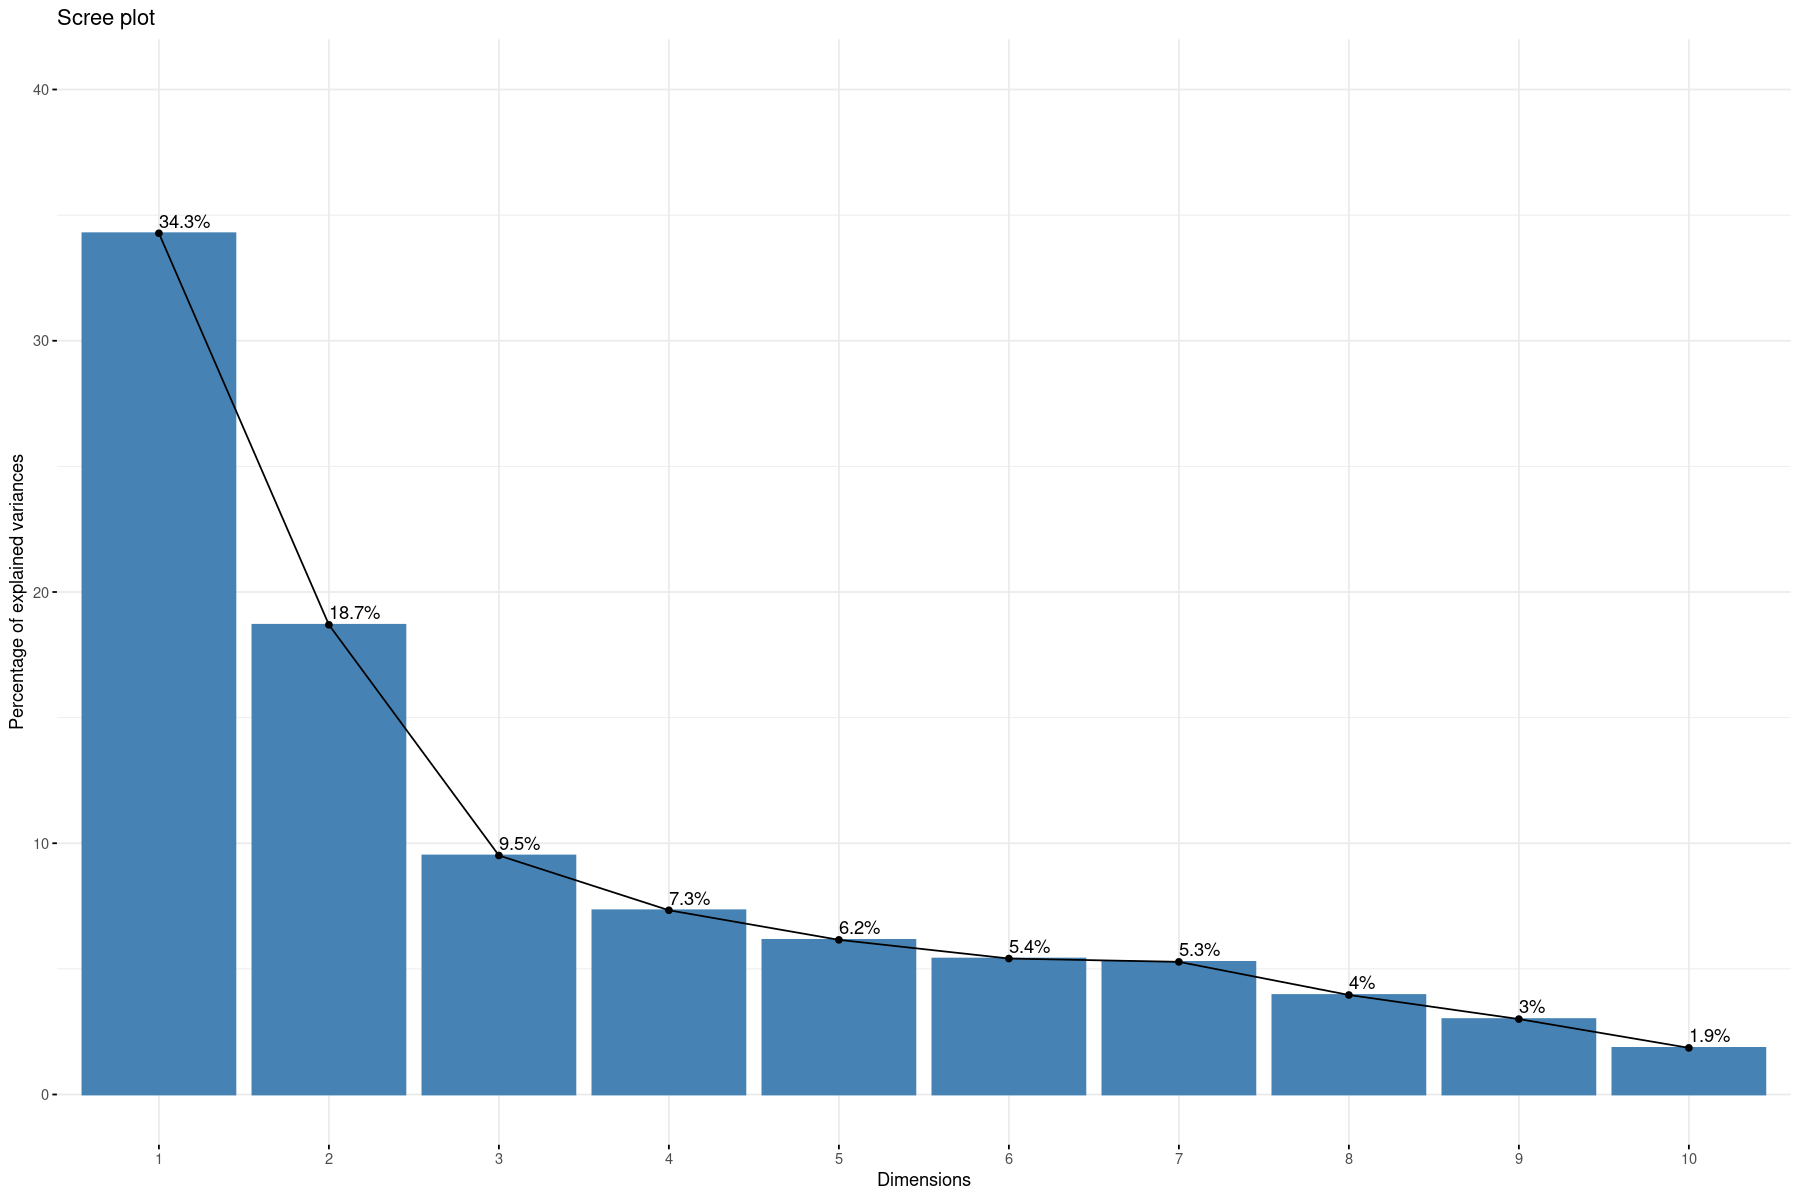

In [53]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,40))

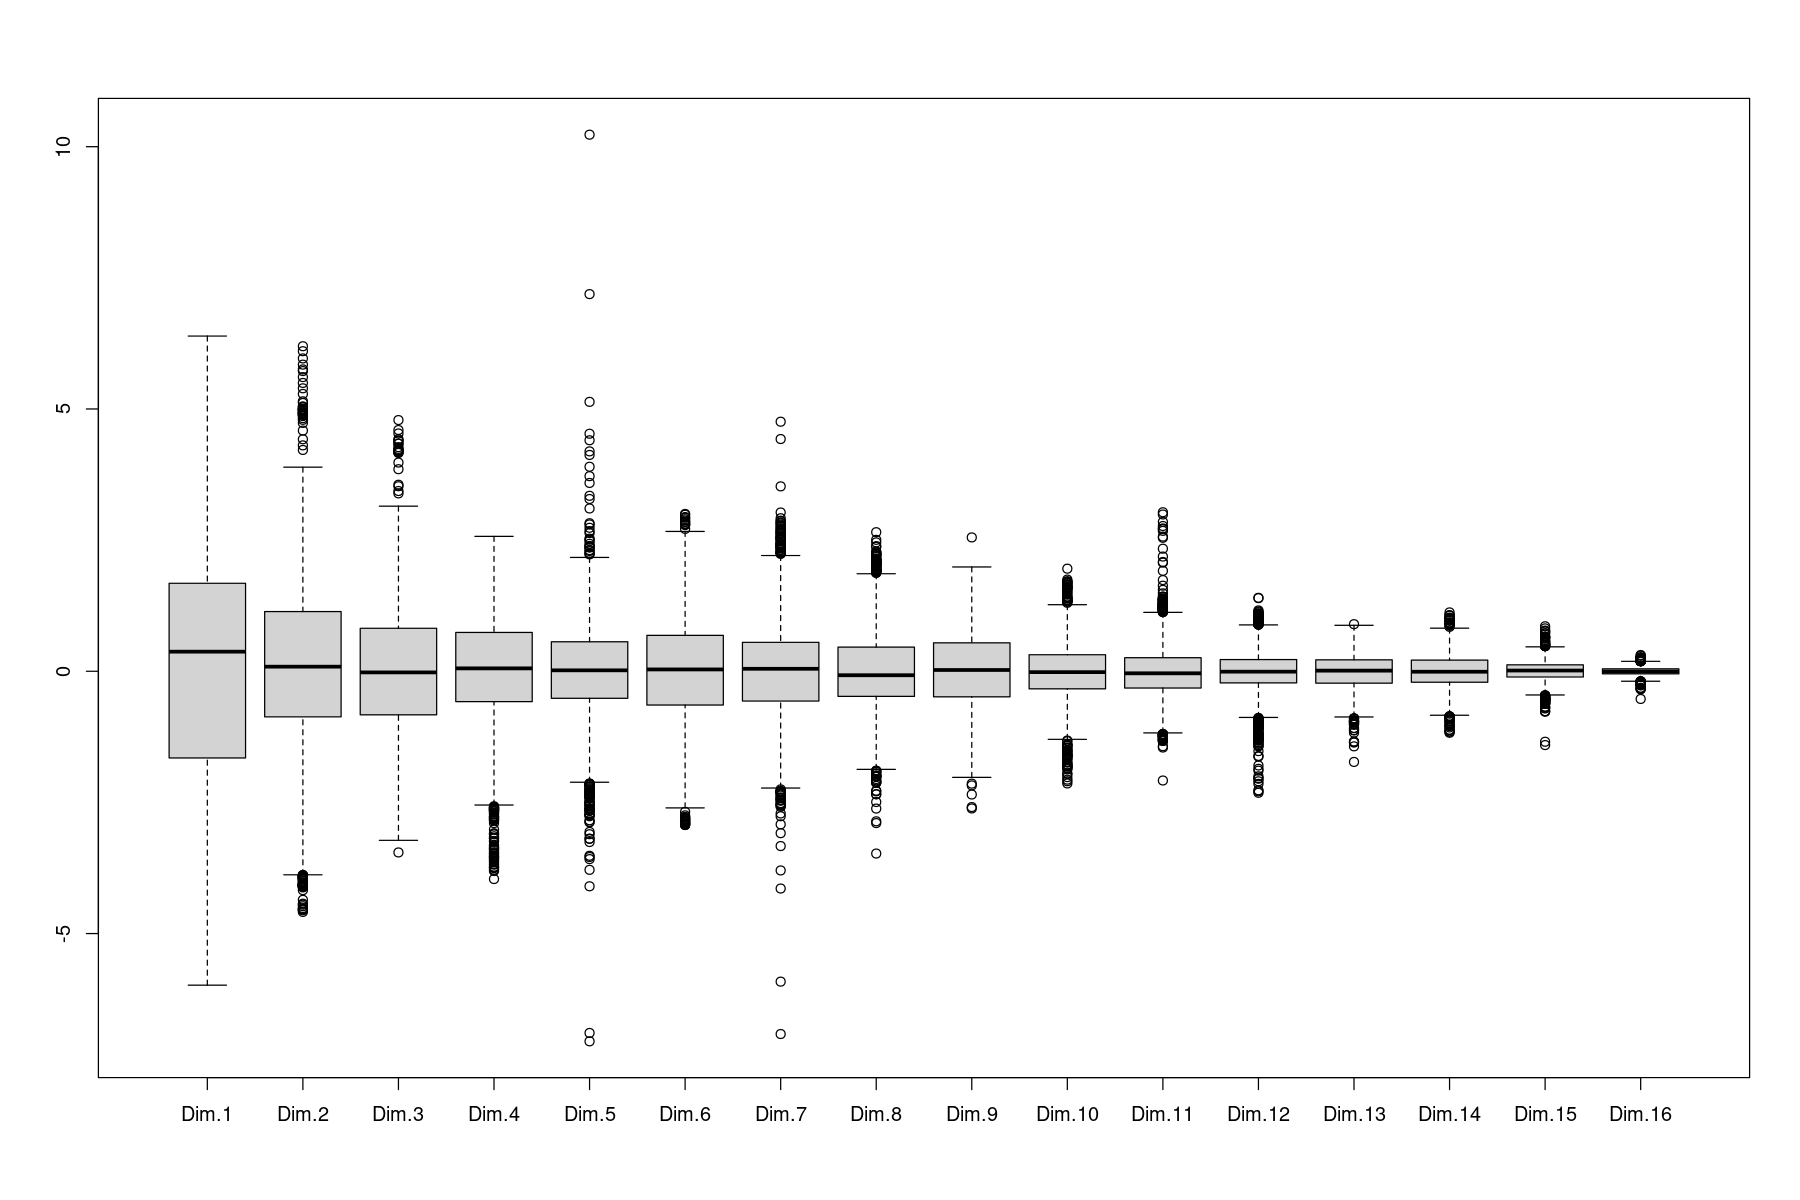

In [54]:
boxplot(resultat_pca$ind$coord)

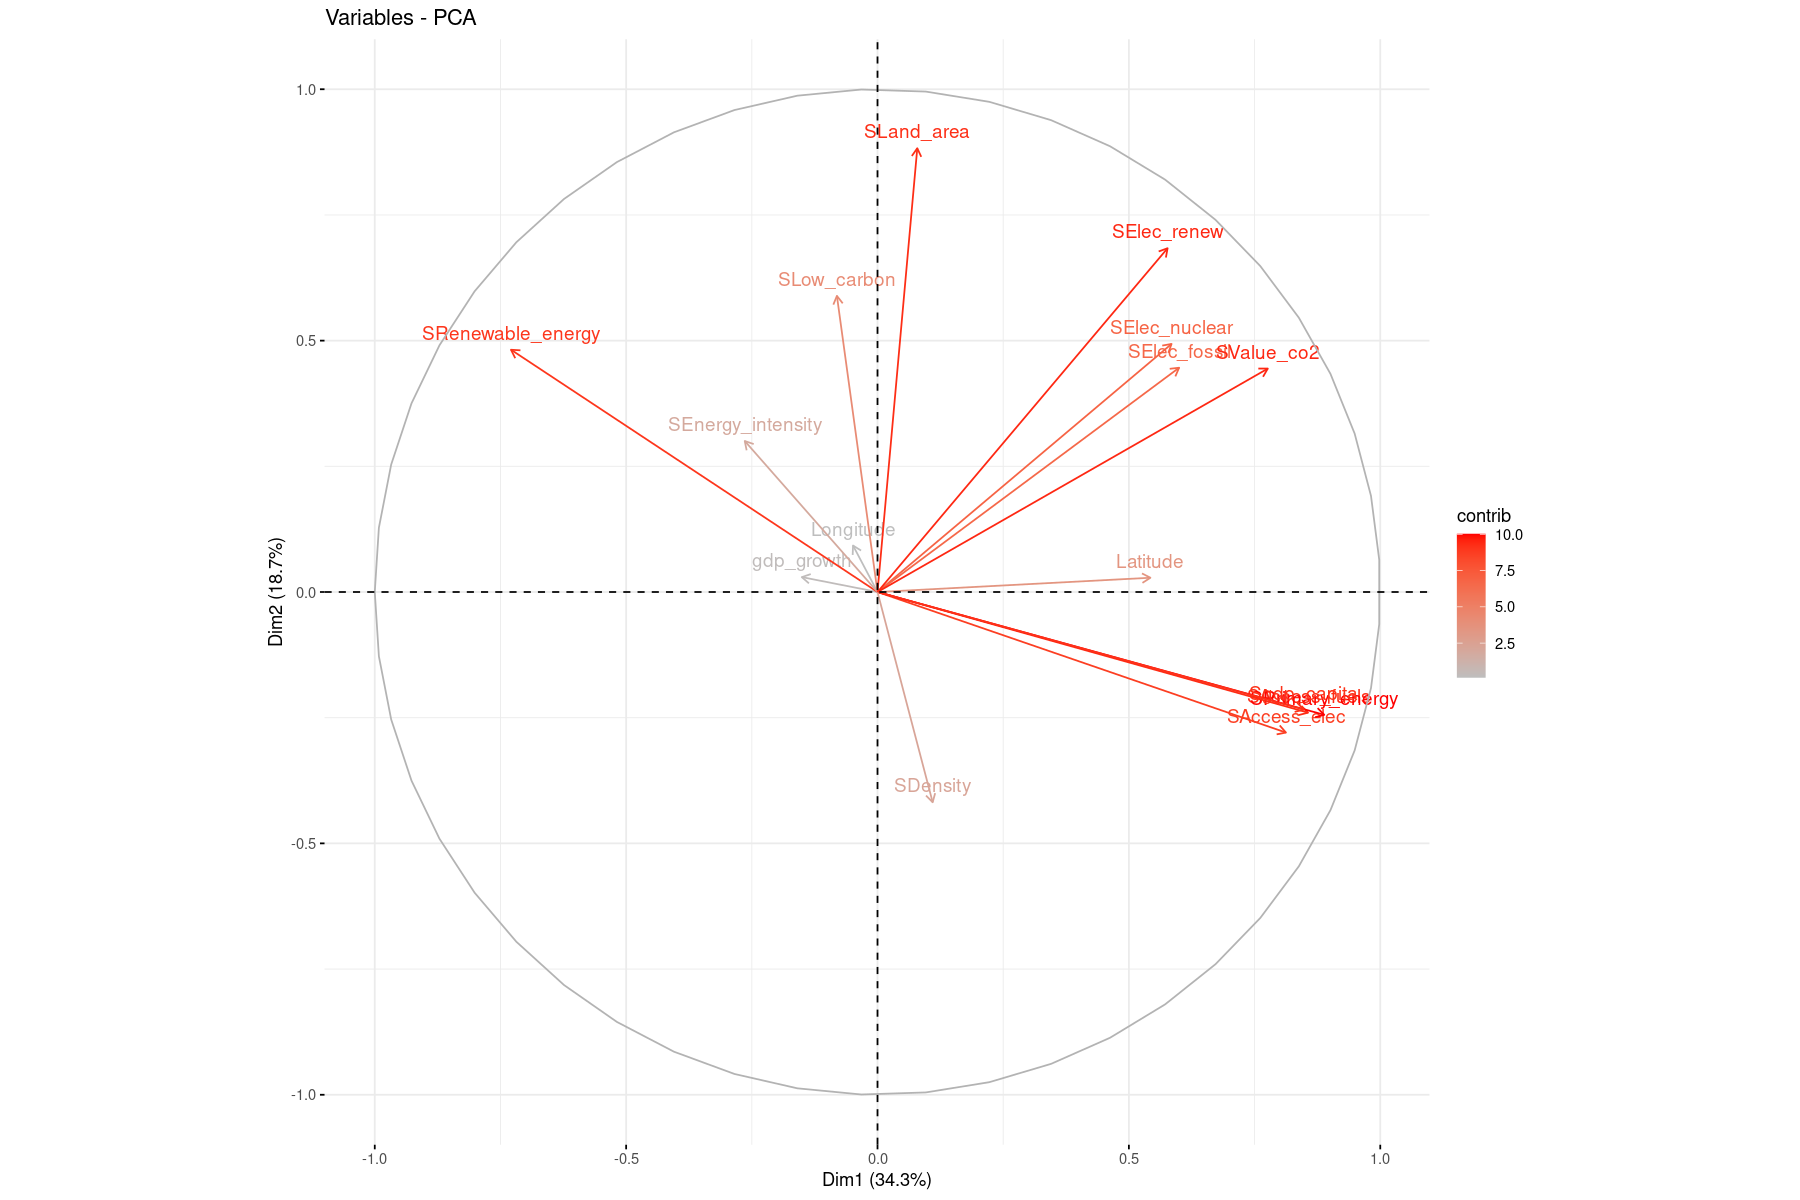

In [55]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

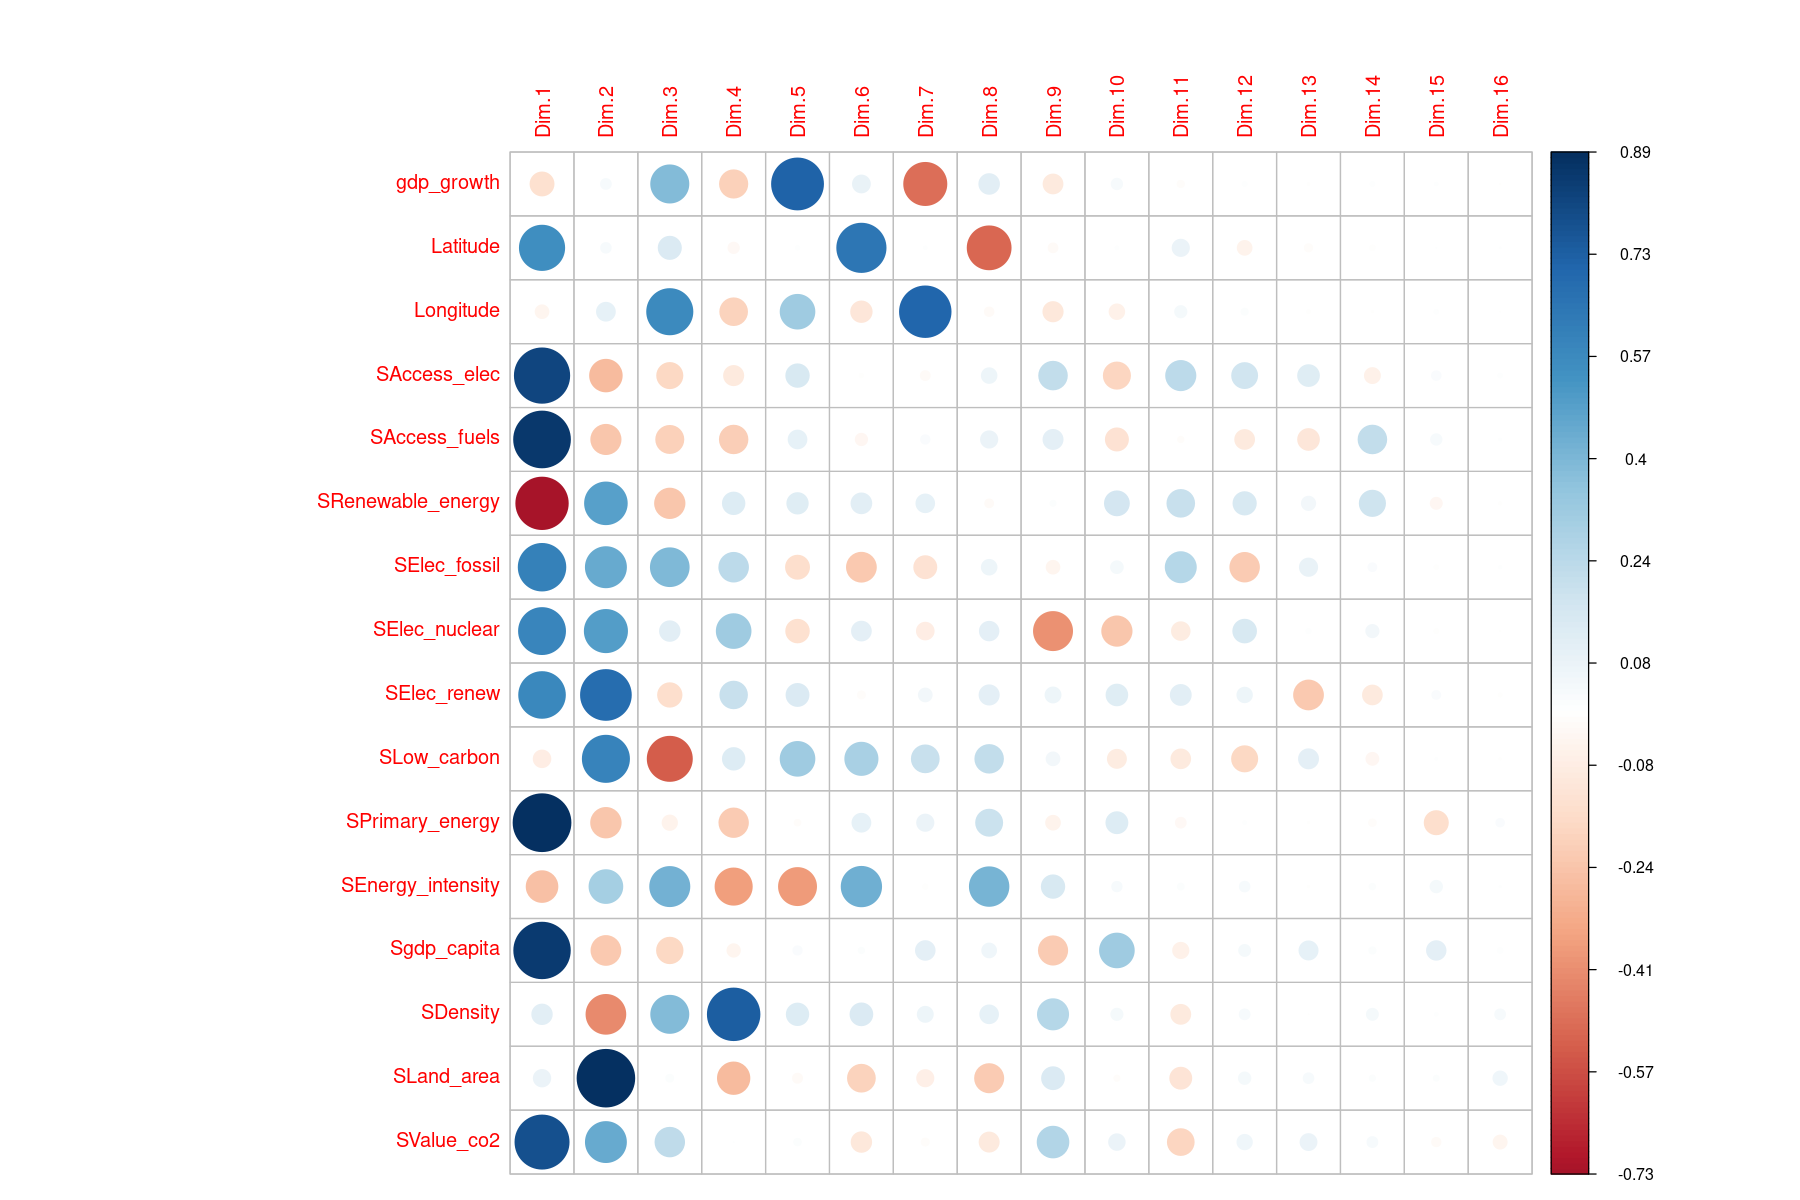

In [56]:
corrplot(resultat_pca$var$cor, is.corr=FALSE)

# Modélisation

In [57]:
complete_energy$SElec_fossil = NULL
complete_energy$Value_co2 = NULL
complete_energy$Entity = NULL

La variable Entity ajoute beaucoup de variables ce qui perturbe notre étude

## Question 1 : extraction des échantillons d'apprentissage et test

In [58]:
set.seed(183) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(complete_energy) # nombre de lignes dans les données
nvar <- ncol(complete_energy) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr <-complete_energy[appri,] 
# construction de l'échantillon test
datestr <- complete_energy[testi, ] 

# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	2294 obs. of  16 variables:
 $ Year             : Factor w/ 21 levels "2000","2001",..: 4 5 7 9 10 11 12 14 15 16 ...
 $ gdp_growth       : num  8.83 1.41 5.36 3.92 21.39 ...
 $ Latitude         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess_elec     : num  2.69 3 3.42 3.75 3.84 ...
 $ SAccess_fuels    : num  2.35 2.48 2.7 2.87 2.97 ...
 $ SRenewable_energy: num  6.05 6.65 5.65 4.6 4.07 ...
 $ SElec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElec_renew      : num  0.489 0.445 0.495 0.432 0.577 ...
 $ SLow_carbon      : num  8.19 7.93 8.73 8.6 9.11 ...
 $ SPrimary_energy  : num  2.72 2.66 2.86 3.2 3.44 ...
 $ SEnergy_intensity: num  0.336 0.182 0.405 0.663 0.811 ...
 $ Sgdp_capita      : num  2.63 2.68 2.79 2.95 3.04 ...
 $ SDensity         : num  4.09 4.09 4.09 4.09 4.09 ...
 $ SLand_area       : num  13.4 13.4 13.4 13.4 13.4 ...
 $ SValue_co2       : num  7.11 6.94 7.47 8.18 8.49 ...
'data.frame':	574 obs. of  16

In [59]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(2, 17)+ylim(-0.8, 2)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Question 2 : comparaison de différentes méthodes de prévision sur l'échantillon d'apprentissage

### Modèles de prévision par Regression

#### Sans sélection de variable

[1] "R2 = 0.980789176921687"

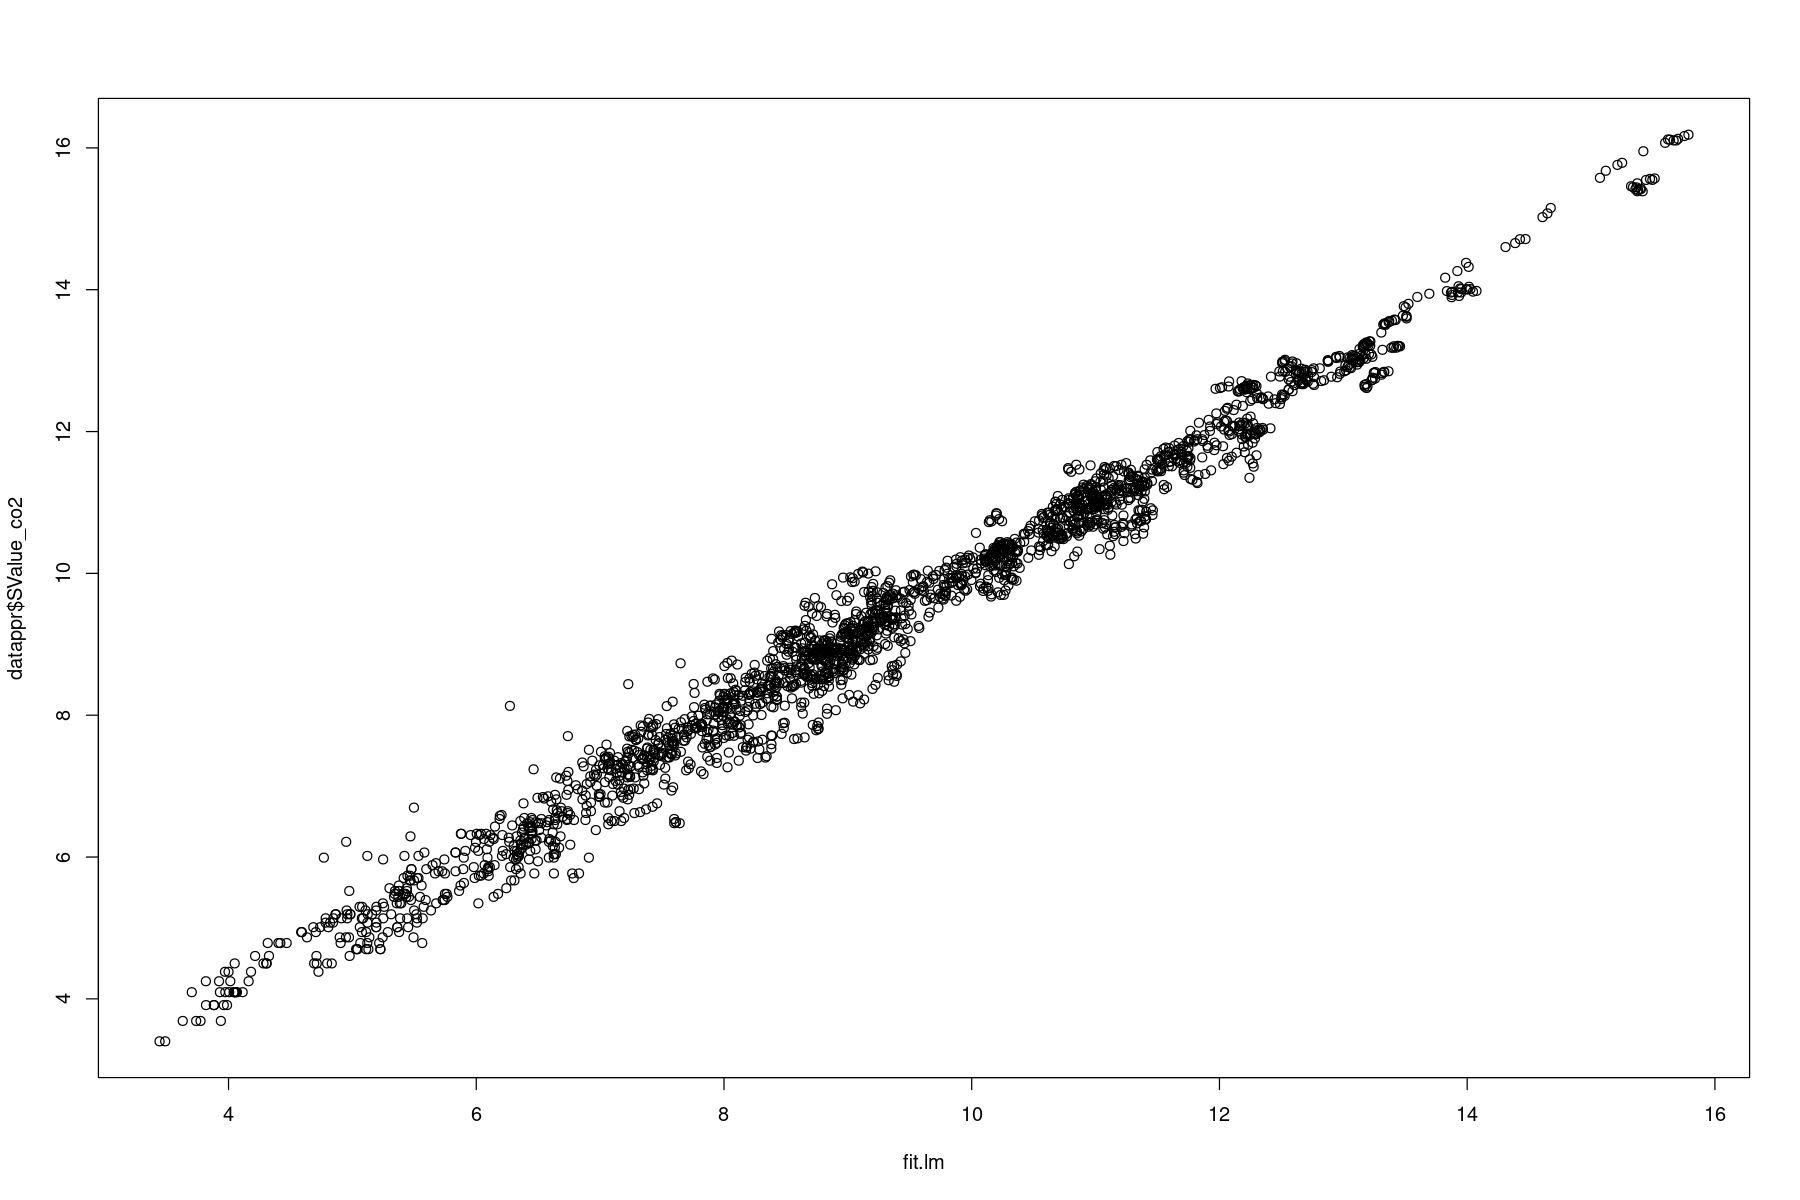

In [60]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2 ~ ., data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rl <- 1 - (SS_Residual / SS_Total)
R2a_rl = 1 - ((1-R2_rl)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(reg.lm$coefficients)-20)# on compte bien chaque modalité de year comme un paramètre 
paste("R2 ajusté =", R2a_rl)

plot(fit.lm,datappr$SValue_co2)

Warning message:
“Removed 38 rows containing missing values (`geom_point()`).”


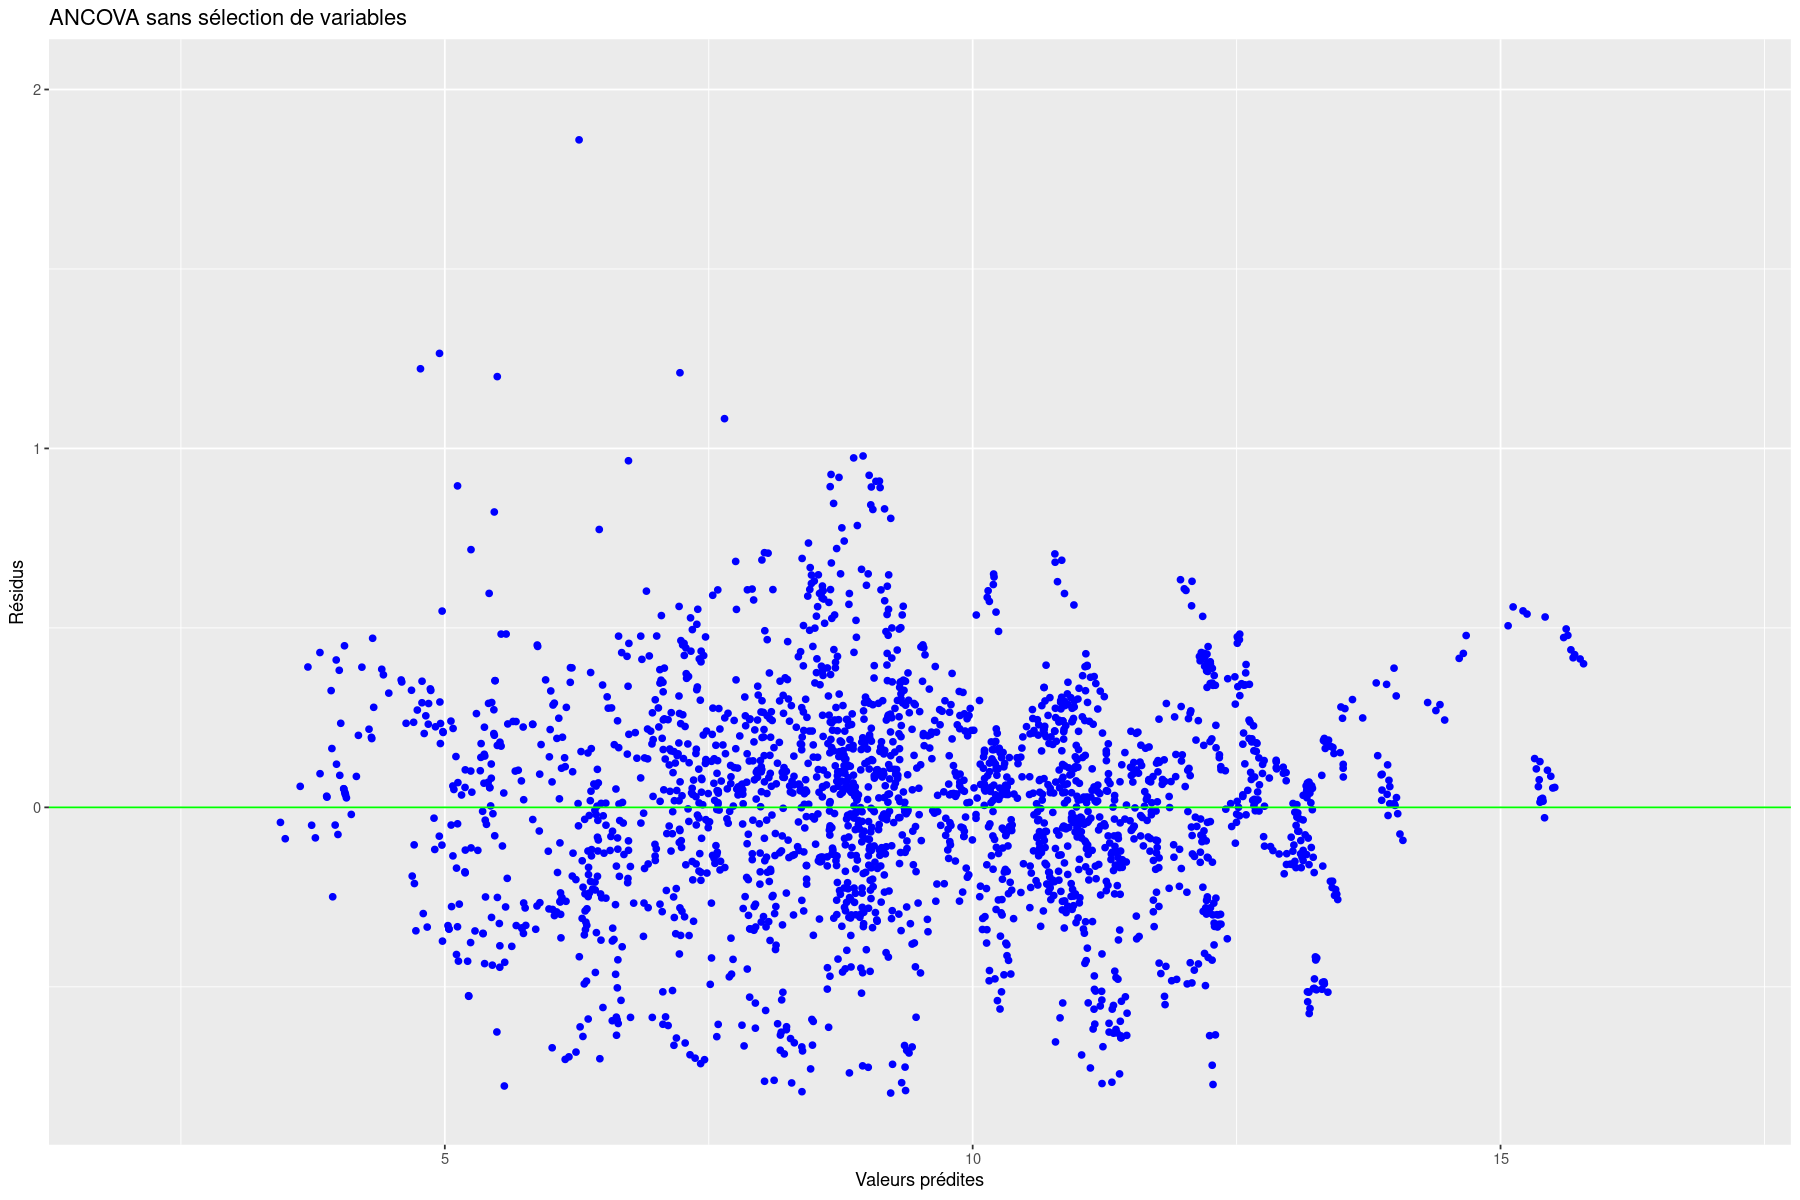

In [61]:

gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")


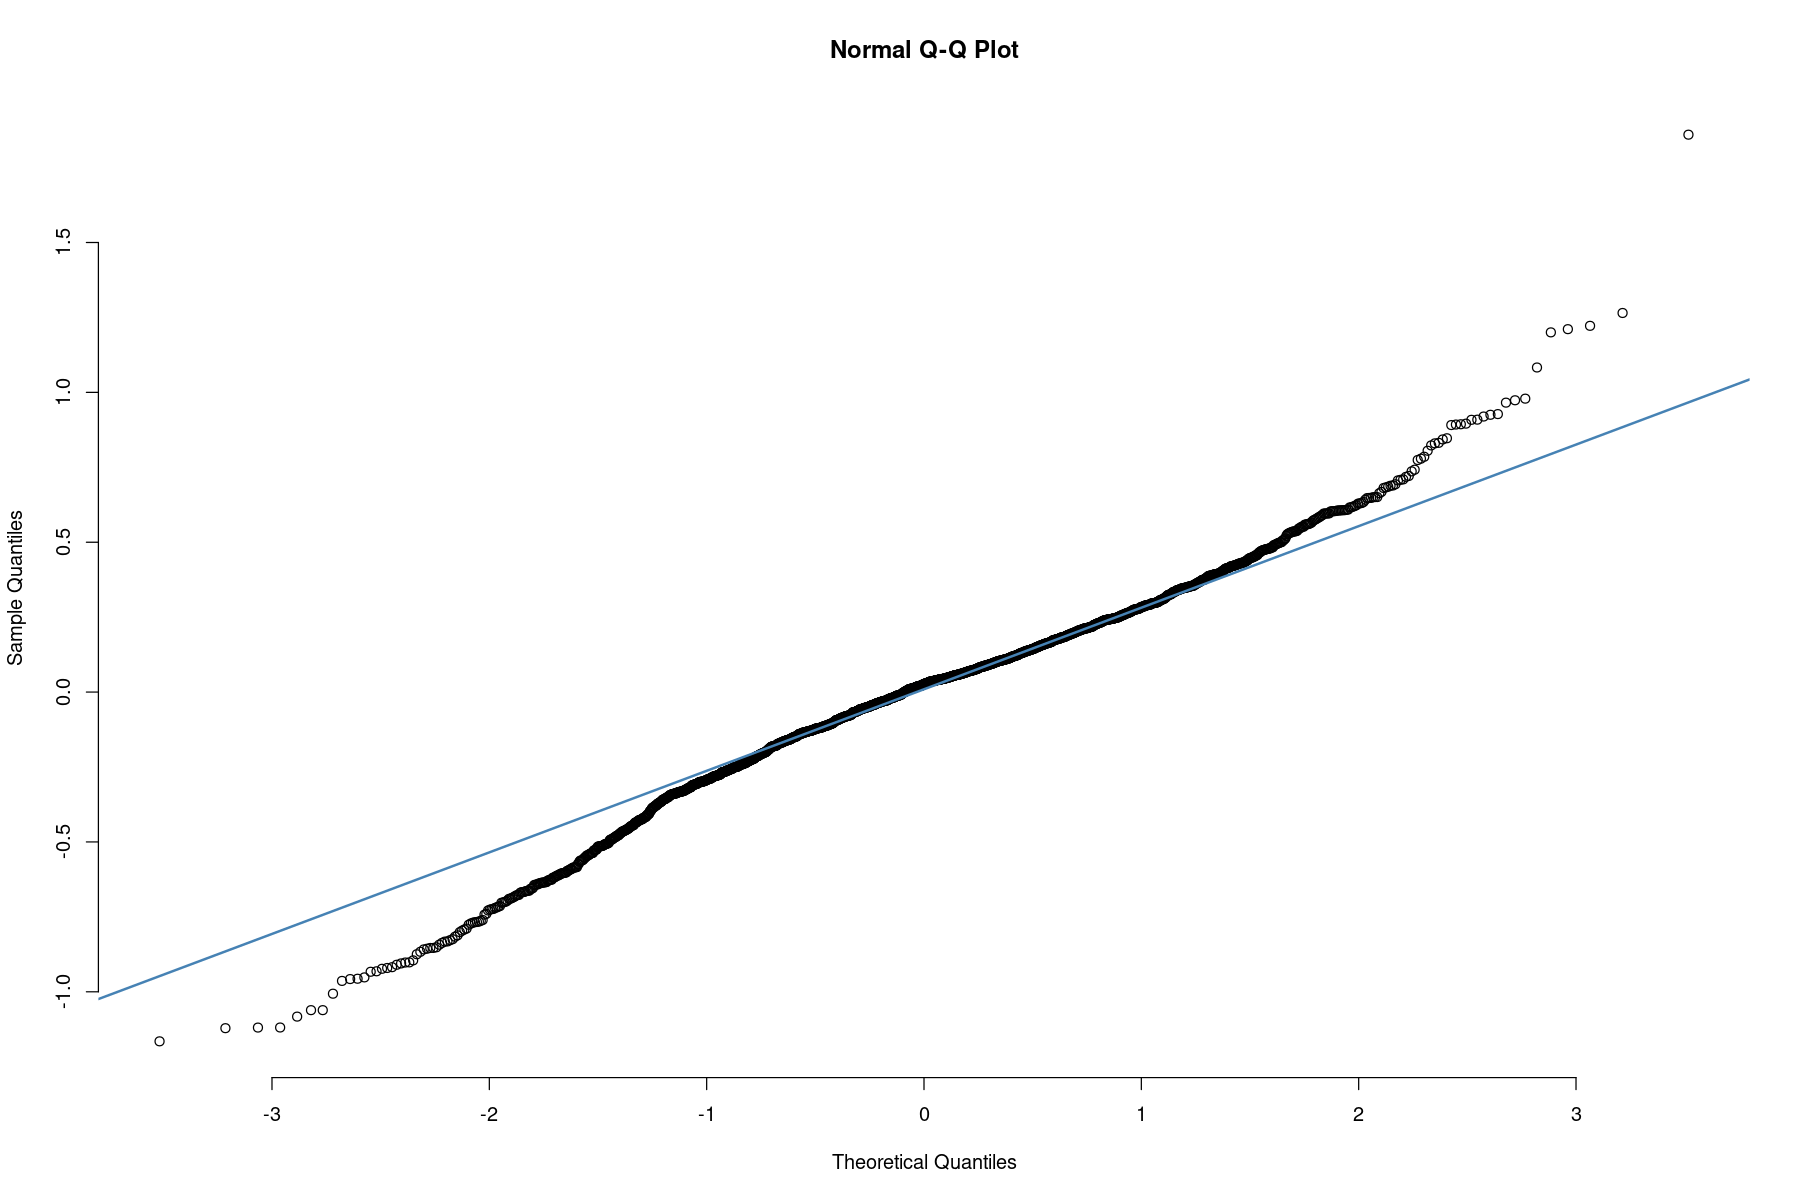

In [62]:
qqnorm(res.lm , pch = 1, frame = FALSE)
qqline(res.lm , col = "steelblue", lwd = 2)

In [63]:
summary(reg.lm)

                    Df Sum Sq Mean Sq   F value Pr(>F)    
Year                19     61       3    29.846 <2e-16 ***
gdp_growth           1     21      21   197.199 <2e-16 ***
Latitude             1   2217    2217 20670.729 <2e-16 ***
Longitude            1    120     120  1114.903 <2e-16 ***
SAccess_elec         1   1555    1555 14502.939 <2e-16 ***
SAccess_fuels        1    482     482  4493.154 <2e-16 ***
SRenewable_energy    1     20      20   189.737 <2e-16 ***
SElec_nuclear        1   2188    2188 20399.895 <2e-16 ***
SElec_renew          1   2235    2235 20836.882 <2e-16 ***
SLow_carbon          1    137     137  1275.367 <2e-16 ***
SPrimary_energy      1     35      35   323.589 <2e-16 ***
SEnergy_intensity    1     98      98   917.805 <2e-16 ***
Sgdp_capita          1     28      28   265.536 <2e-16 ***
SDensity             1      0       0     1.197  0.274    
SLand_area           1   3476    3476 32409.505 <2e-16 ***
Residuals         2260    242       0                   

**Le test de nullité des paramètres montre que seule la variable Density n'a pas un effet significatif sur la quantité de CO2 émise par un pays au niveau 5%. Cette variable peut donc être enlevées du modèle séparément**

#### Avec interactions entre les variables 

[1] "R2 ajusté= 0.99448595474924"

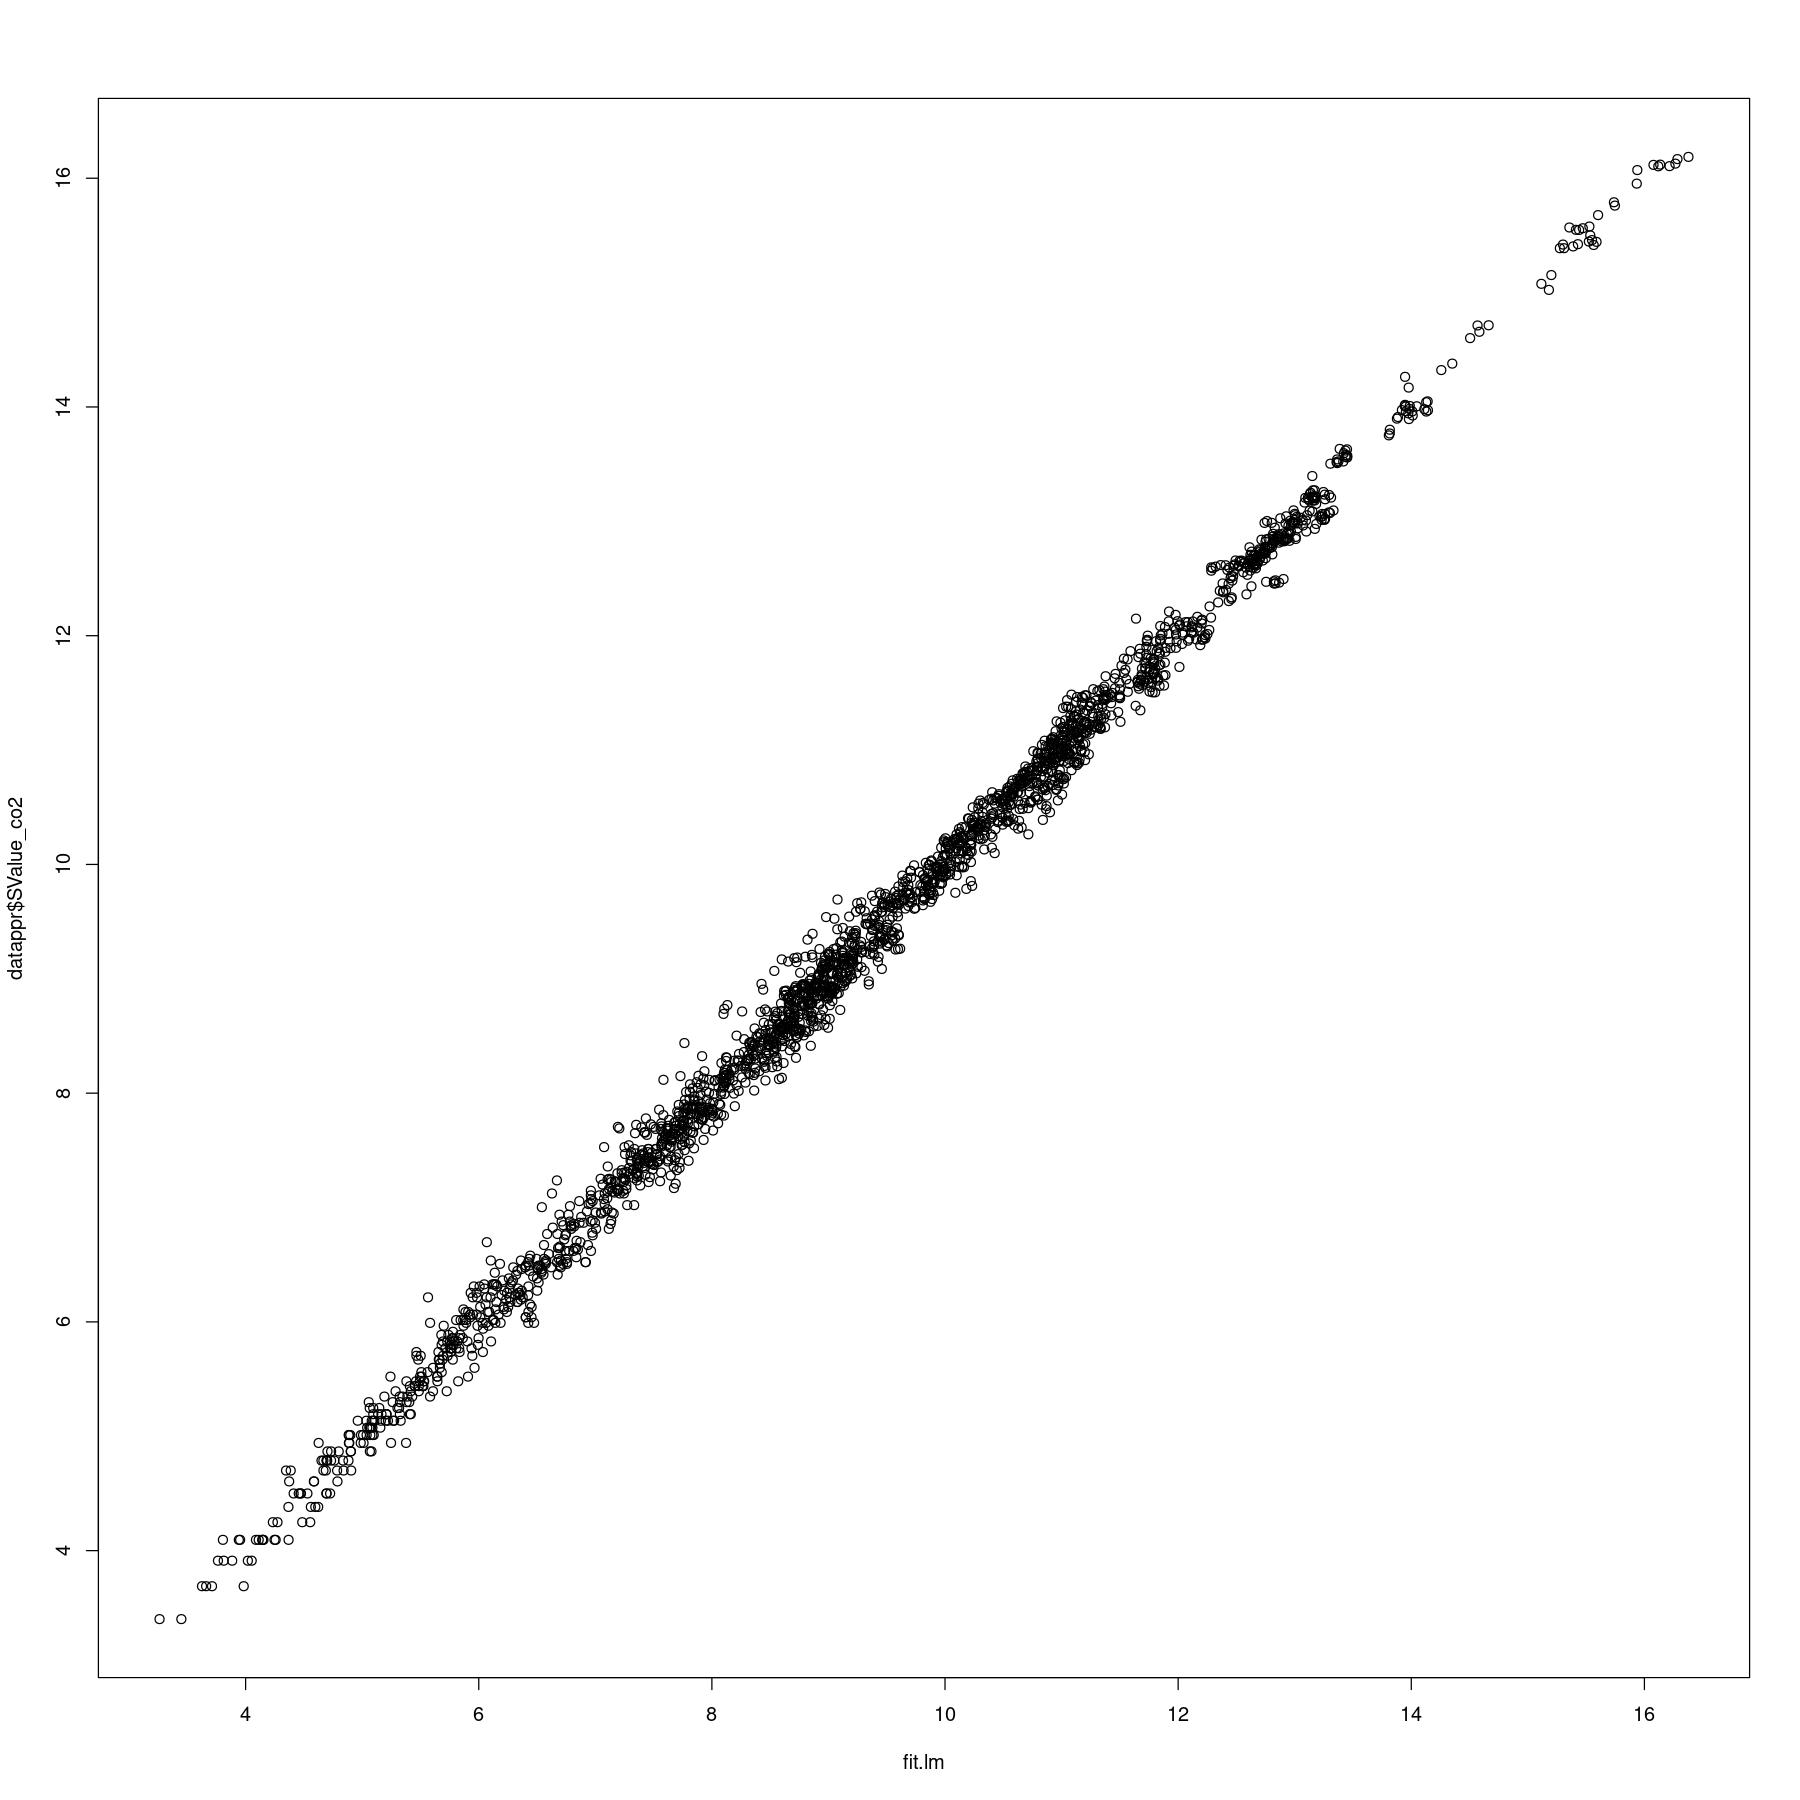

In [160]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2 ~ .^2, data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# MSE_rl = mean((datappr$SValue_co2 - fit.lm)^2)
# paste("MSE =", MSE_rl)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rl <- 1 - (SS_Residual / SS_Total)
R2a_rl = 1 - ((1-R2_rl)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(reg.lm$coefficients)-1)
paste("R2 ajusté=", R2a_rl)

plot(fit.lm,datappr$SValue_co2)

In [65]:
summary(reg.lm)

                                      Df Sum Sq Mean Sq   F value   Pr(>F)    
Year                                  19     61       3 1.031e+02  < 2e-16 ***
gdp_growth                             1     21      21 6.813e+02  < 2e-16 ***
Latitude                               1   2217    2217 7.142e+04  < 2e-16 ***
Longitude                              1    120     120 3.852e+03  < 2e-16 ***
SAccess_elec                           1   1555    1555 5.011e+04  < 2e-16 ***
SAccess_fuels                          1    482     482 1.552e+04  < 2e-16 ***
SRenewable_energy                      1     20      20 6.555e+02  < 2e-16 ***
SElec_nuclear                          1   2188    2188 7.048e+04  < 2e-16 ***
SElec_renew                            1   2235    2235 7.199e+04  < 2e-16 ***
SLow_carbon                            1    137     137 4.406e+03  < 2e-16 ***
SPrimary_energy                        1     35      35 1.118e+03  < 2e-16 ***
SEnergy_intensity                      1     98     

**Le modèle avec interactions entre les variables surajuste les données c'est à dire qu'il s'adapte trop bien à nos données d'entrainement. En prenant en compte toutes les interactions, nous obtenons un modèle difficile à interpreter et avec un grand nombre de variables. Nous allons donc faire une sélection de variables avec le critère BIC pénalisant les modèles complexes.
Nous avons fait le choix de ce critère car c'est celui qui pénalise le plus la dimension du modèle. Ainsi, il favorise les modèles qui expliquent efficacement les données tout en restant aussi simples que possible.** 

#### Avec sélection de variables (BIC)

In [66]:
reg.glm <- glm(SValue_co2 ~ ., data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- stepAIC(reg.glm, direction = "backward",k = log(nrow(datestr)), trace = 0)

Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”


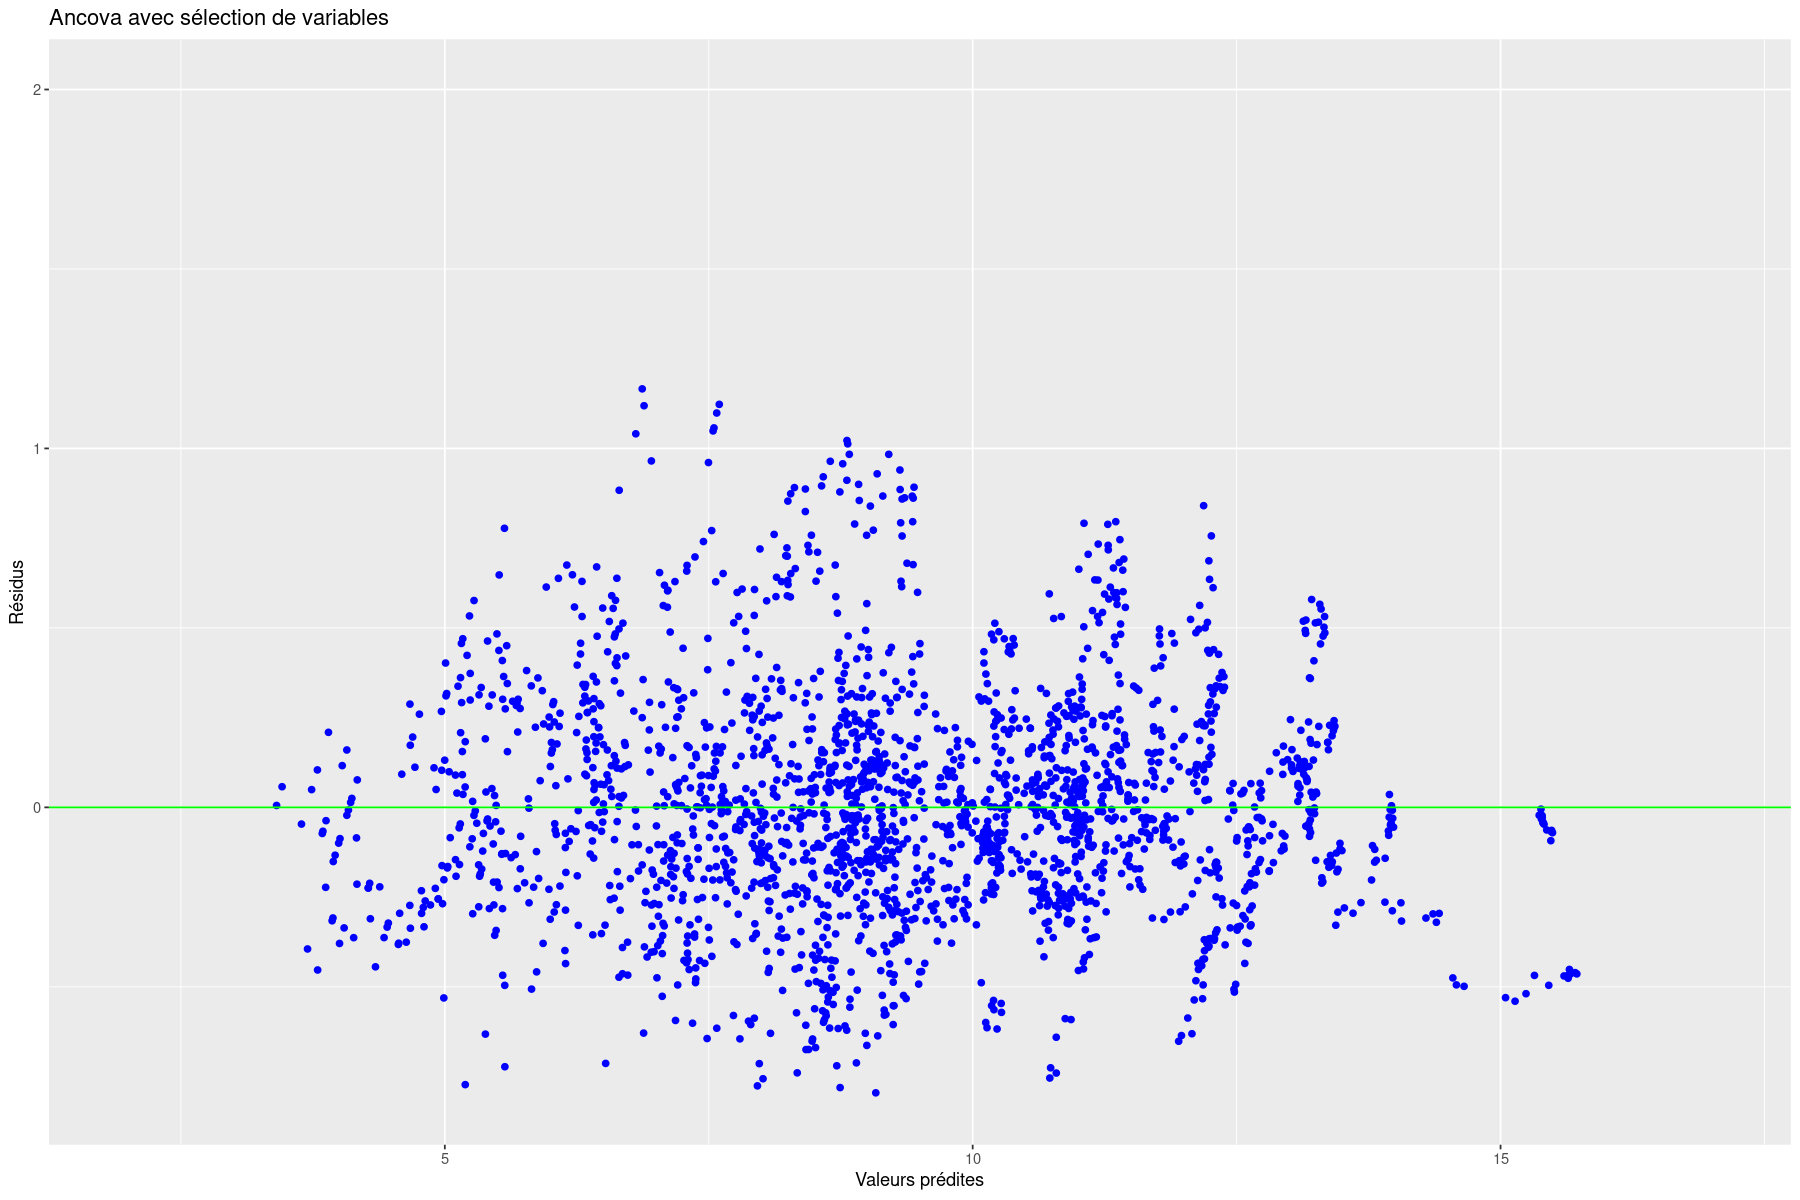

In [67]:
fit.bic=reg.glm.step$fitted
res.bic=fit.bic-datappr[,"SValue_co2"]
gplot.res(fit.bic,res.bic,titre="Ancova avec sélection de variables")

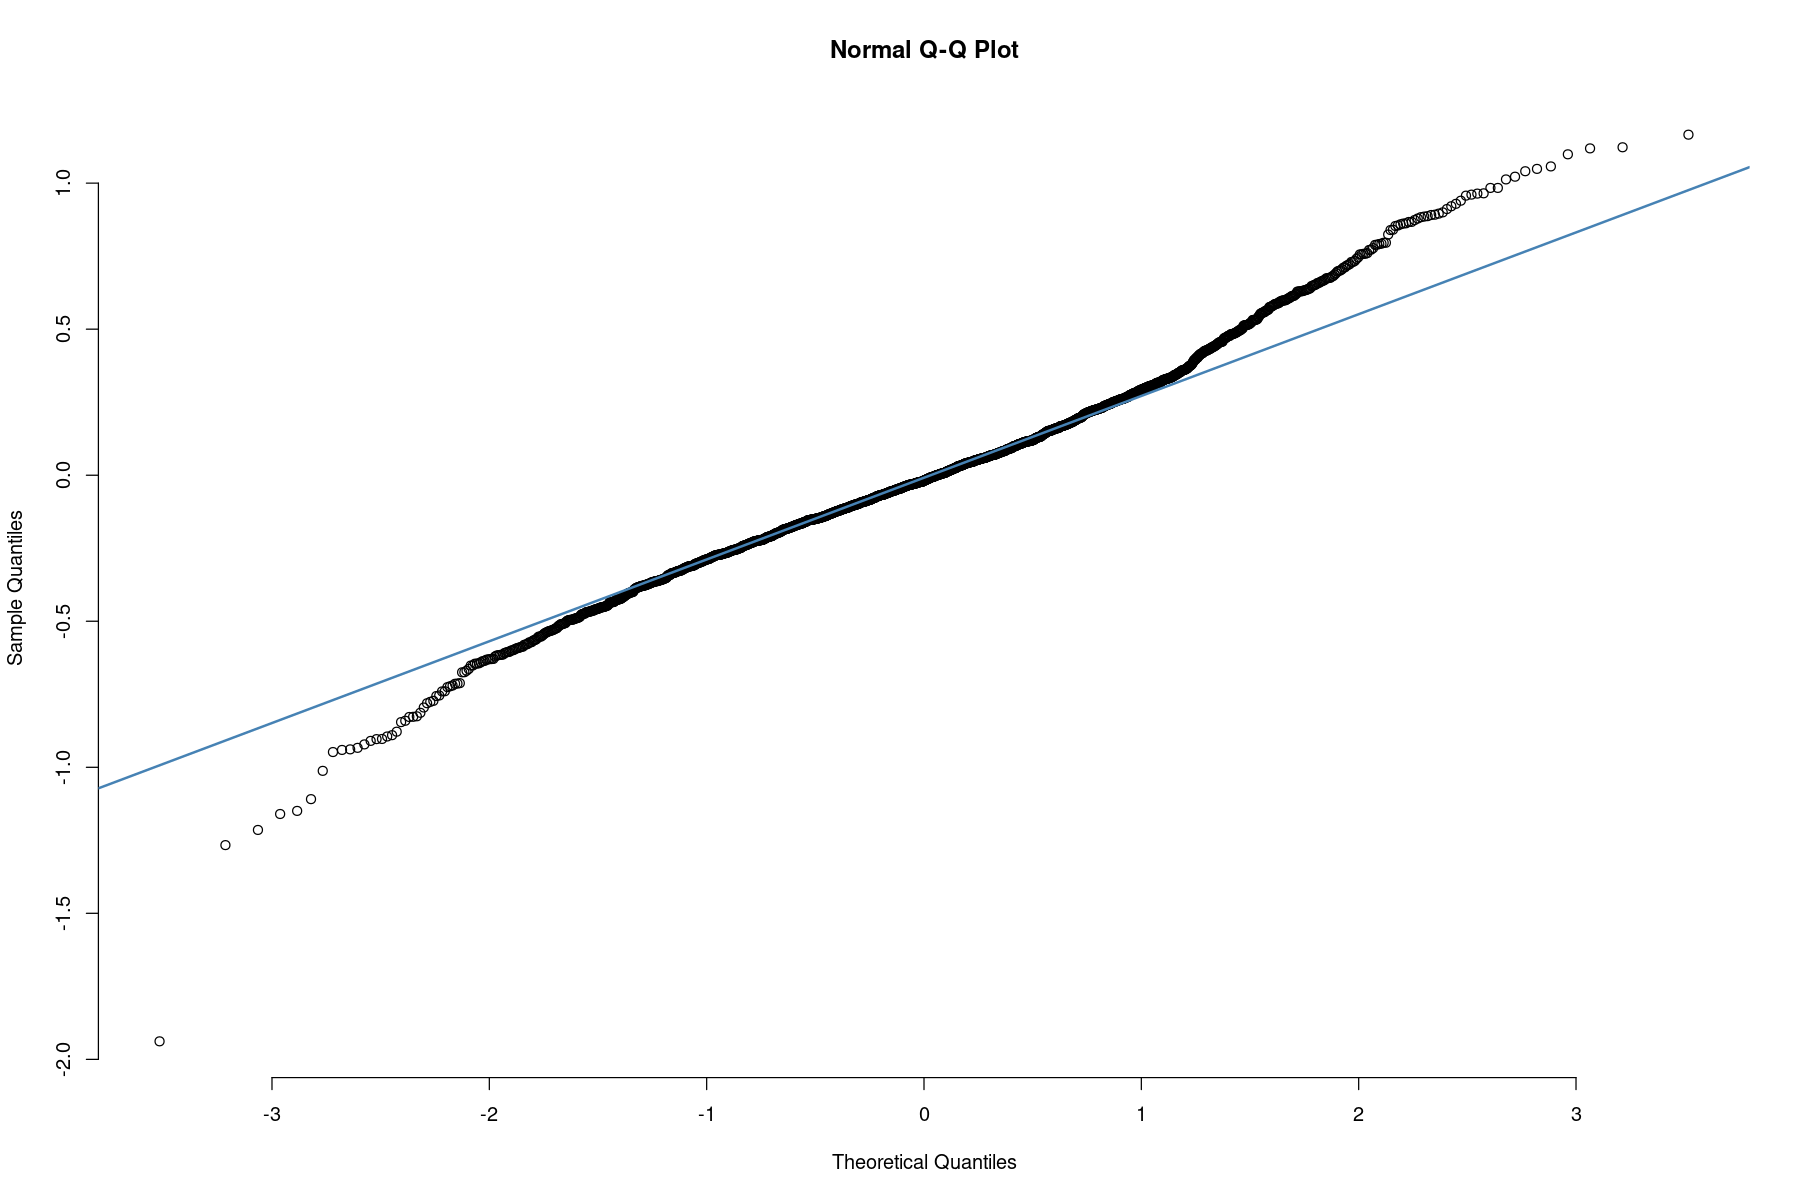

In [68]:
qqnorm(res.bic , pch = 1, frame = FALSE)
qqline(res.bic , col = "steelblue", lwd = 2)

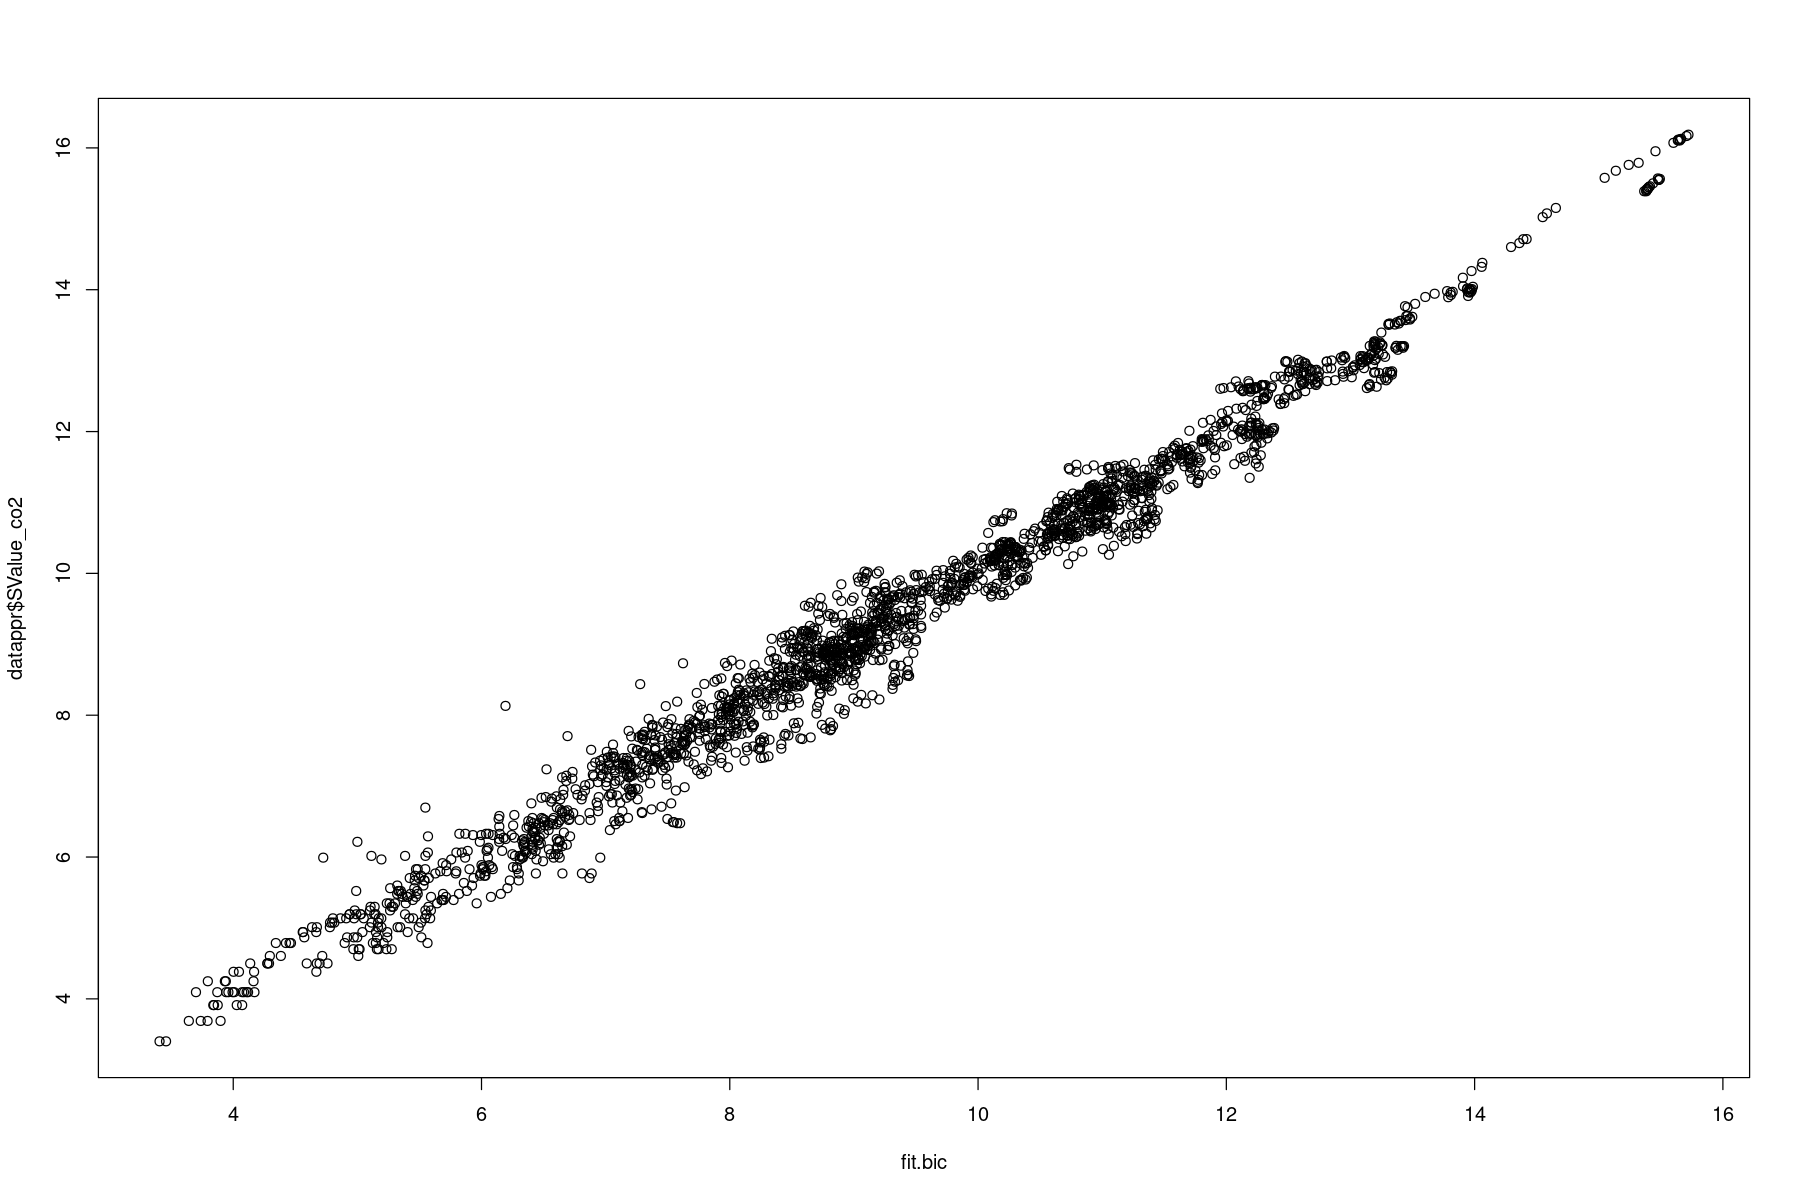

In [69]:
plot(fit.bic,datappr$SValue_co2)

In [70]:
summary(reg.glm.step)


Call:
glm(formula = SValue_co2 ~ gdp_growth + Latitude + SAccess_elec + 
    SAccess_fuels + SRenewable_energy + SElec_nuclear + SElec_renew + 
    SLow_carbon + SPrimary_energy + SEnergy_intensity + Sgdp_capita + 
    SDensity + SLand_area, data = datappr)

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.478e+01  1.714e-01 -86.204  < 2e-16 ***
gdp_growth        -4.580e-03  1.558e-03  -2.939 0.003325 ** 
Latitude           1.481e-03  3.224e-04   4.595 4.57e-06 ***
SAccess_elec       3.750e-01  1.910e-02  19.630  < 2e-16 ***
SAccess_fuels      8.563e-02  1.321e-02   6.484 1.09e-10 ***
SRenewable_energy -7.338e-02  5.675e-03 -12.930  < 2e-16 ***
SElec_nuclear      1.835e-02  7.204e-03   2.547 0.010943 *  
SElec_renew       -3.577e-02  9.532e-03  -3.753 0.000179 ***
SLow_carbon       -3.638e-02  3.053e-03 -11.916  < 2e-16 ***
SPrimary_energy    8.908e-01  3.431e-02  25.962  < 2e-16 ***
SEnergy_intensity  1.781e-01  1.943e-02   9.168  < 2e-1

In [71]:
MSE_bic = mean((datappr$SValue_co2 - fit.bic)^2)
paste("MSE =", MSE_bic)
# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.bic)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_bic <- 1 - (SS_Residual / SS_Total)
R2a_bic = 1 - ((1-R2_bic)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(reg.glm.step$coefficients)-1)
paste("R2 ajusté=", R2a_bic)

[1] "MSE = 0.107416999052532"

[1] "R2 ajusté= 0.980803009573477"

#### Avec pénalisation

Year2000 Year2001 Year2002 Year2003 Year2004 Year2005 Year2006 Year2007
4  0        0        0        1        0        0        0        0       
5  0        0        0        0        1        0        0        0       
7  0        0        0        0        0        0        1        0       
9  0        0        0        0        0        0        0        0       
10 0        0        0        0        0        0        0        0       
11 0        0        0        0        0        0        0        0       
   Year2008 Year2009 ⋯ SAccess_fuels SRenewable_energy SElec_nuclear
4  0        0        ⋯ 2.351375      6.054750          0            
5  0        0        ⋯ 2.476538      6.651316          0            
7  0        0        ⋯ 2.698000      5.647123          0            
9  1        0        ⋯ 2.873565      4.601087          0            
10 0        1        ⋯ 2.965273      4.065710          0            
11 0        0        ⋯ 3.044522      3.892300          0            
   SElec_renew SLow_carbon SPrimary_energy SEnergy_intensity Sgdp_capita
4  0.4885800   8.186653    2.718971        0.3364722         2.625308   
5  0.4446858   7.932298    2.659626        0.1823216         2.676834   
7  0.4946962   8.728716    2.859206        0.4054651         2.787470   
9  0.4317824   8.600733    3.204950        0.6626880         2.949488   
10 0.5766134   9.109266    3.441243        0.8109302         3.040274   
11 0.5596158   8.932370    3.537859        0.9001613         3.148837   
   SDensity SLand_area
4  4.094345 13.38815  
5  4.094345 13.38815  
7  4.094345 13.38815  
9  4.094345 13.38815  
10 4.094345 13.38815  
11 4.094345 13.38815

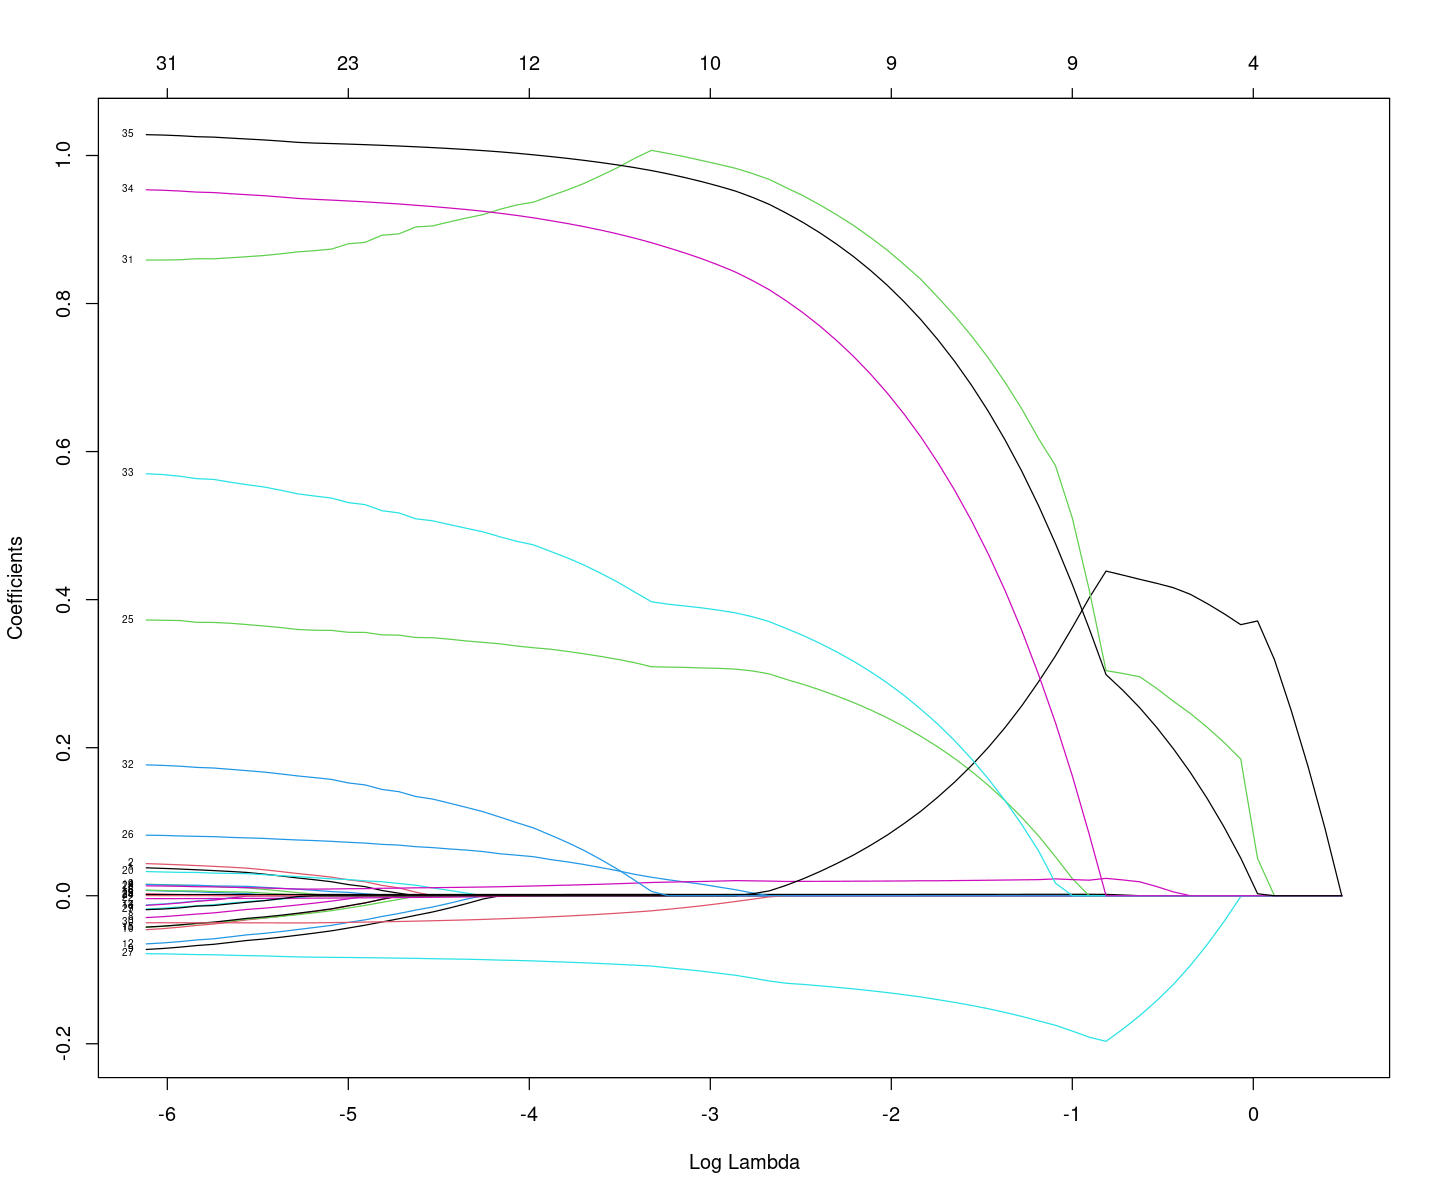

In [72]:
# Dans glmnet, le 17 correspond à l'indice de notre SvalueCo2 qu'il faut mettre en y ( variable à prédire) et pas dans x.
# Il faudra aussi enlever les factors ( entity et year )
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(SValue_co2 ~ .-1, data = datappr)
reg.lasso <- glmnet(y = datappr$SValue_co2, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
#legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))



head(x.mat)

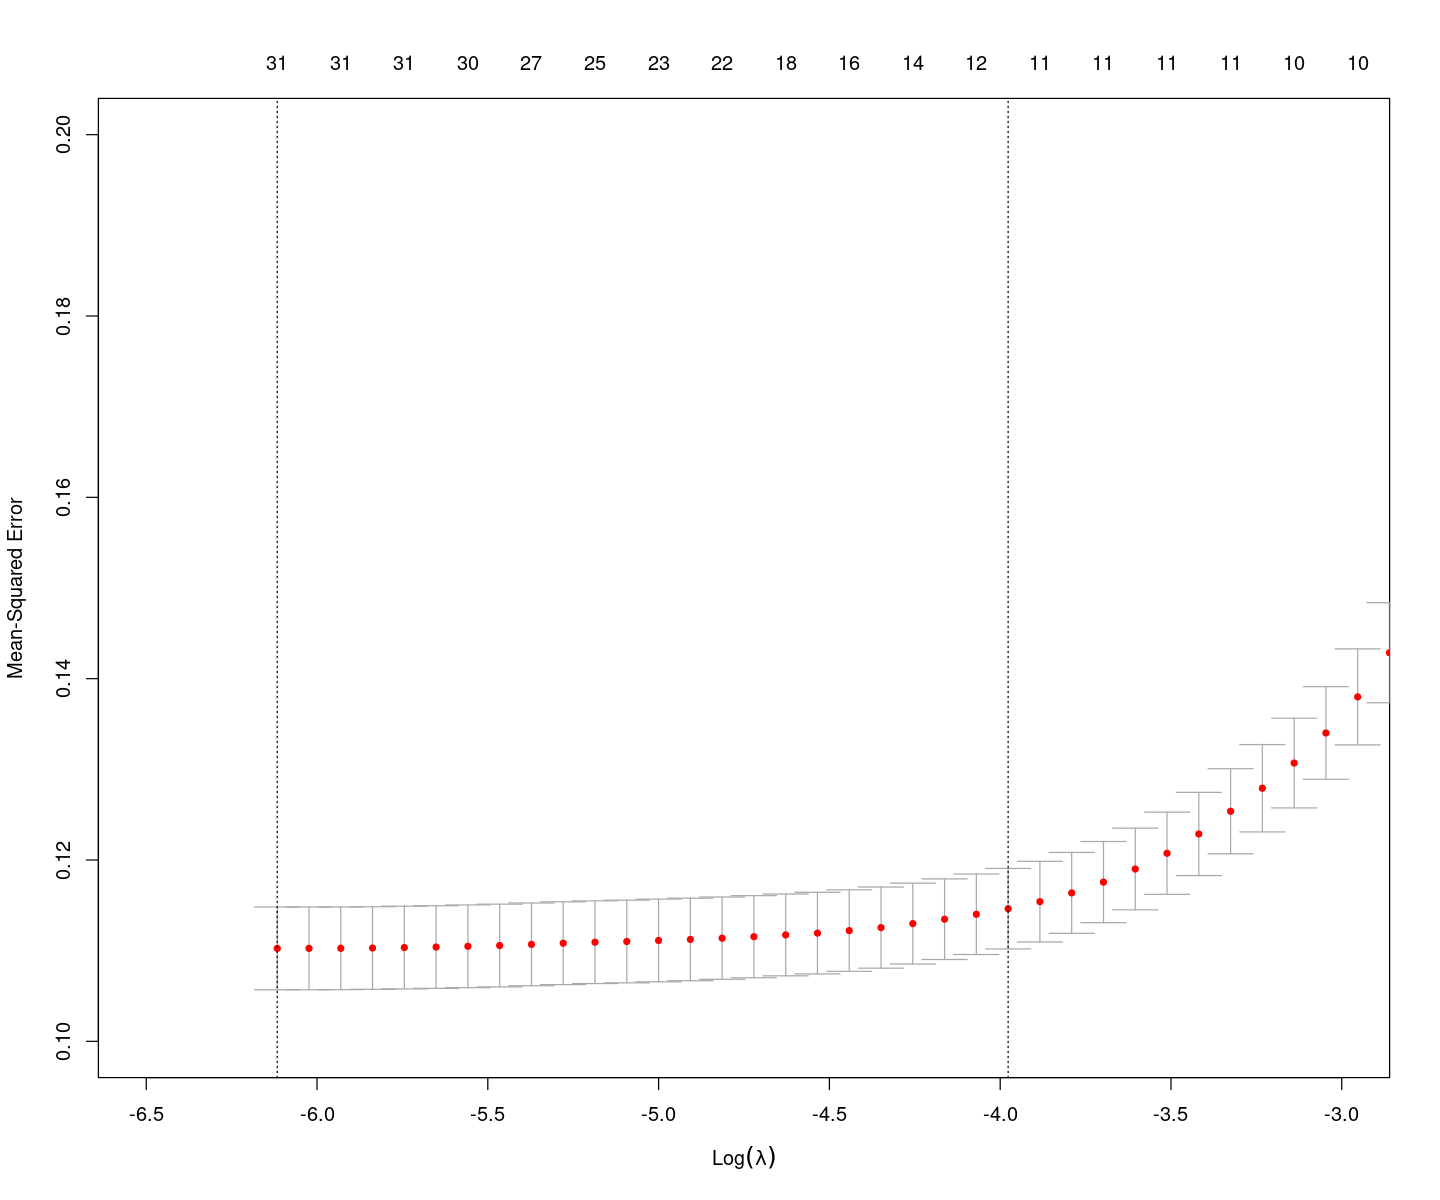

In [73]:
#Choix optimal de l'hyperparamètre
reg.lasso.cv <- cv.glmnet(y = datappr[, 16], x = x.mat, nfolds = 10)
plot(reg.lasso.cv,xlim=c(-6.5,-3),ylim=c(0.1,0.2))

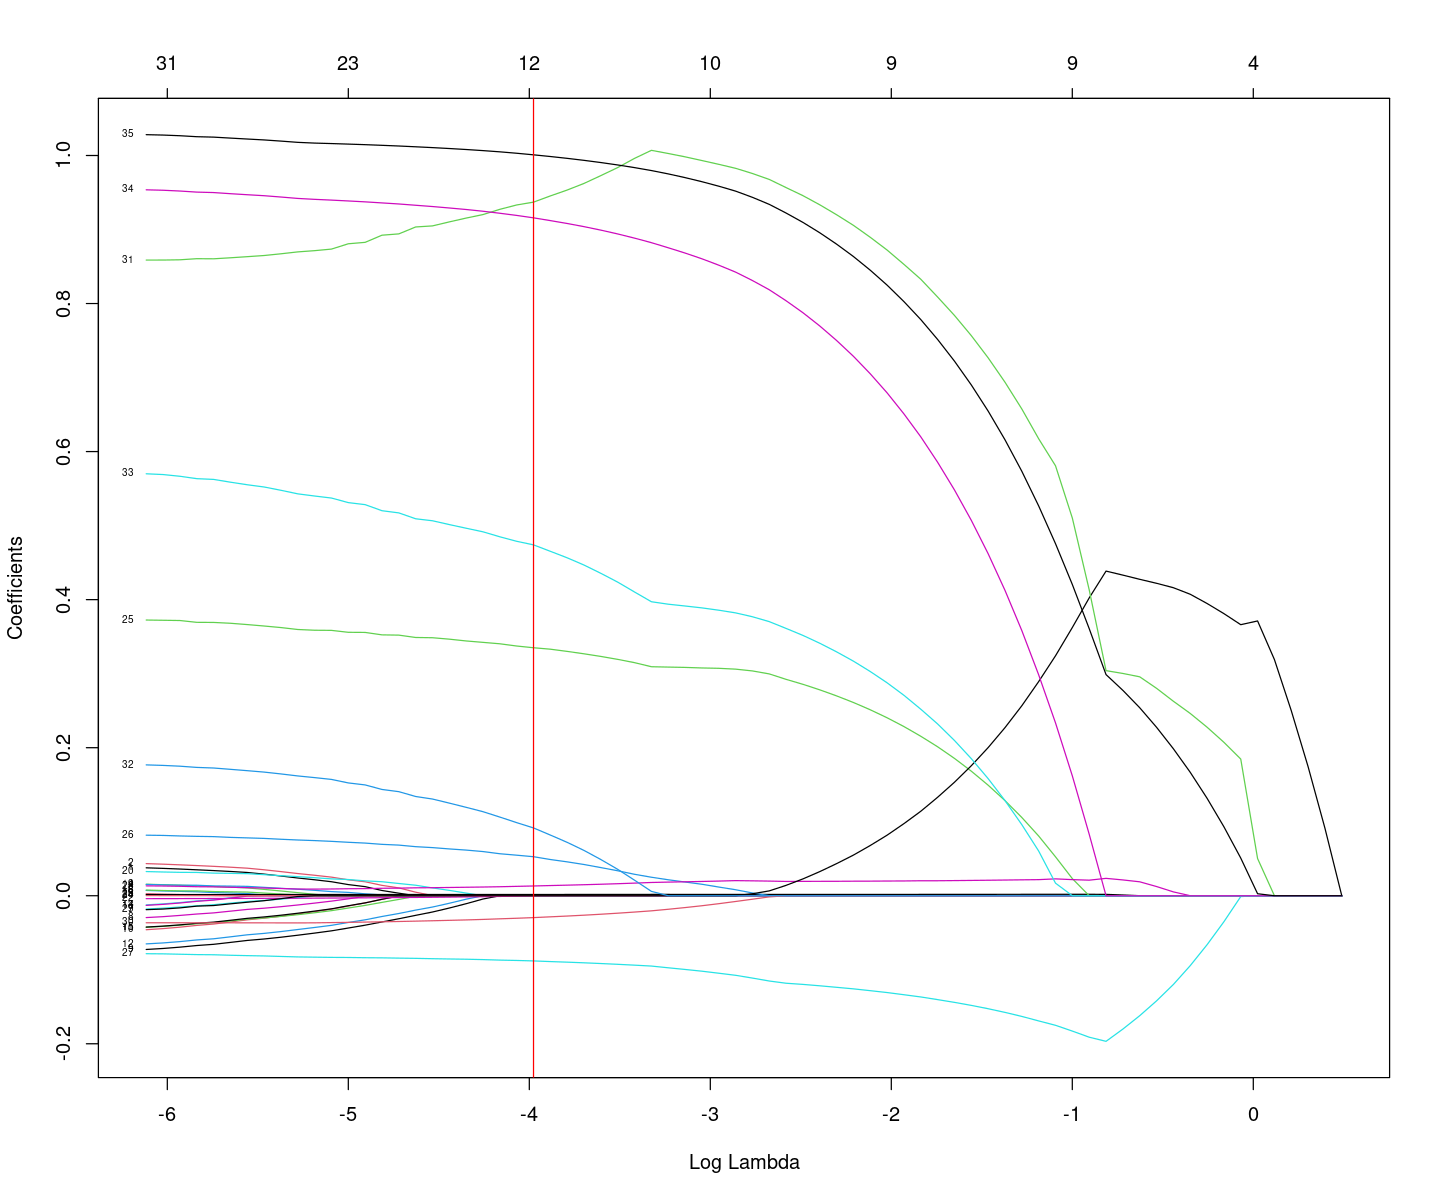

In [74]:
plot(reg.lasso, xvar = "lambda", label = TRUE)
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

In [165]:
paste("Lambda =", reg.lasso.cv$lambda.1se)

[1] "Lambda = 0.0187463932947065"

In [75]:
fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$SValue_co2 - fit.lasso.1se 

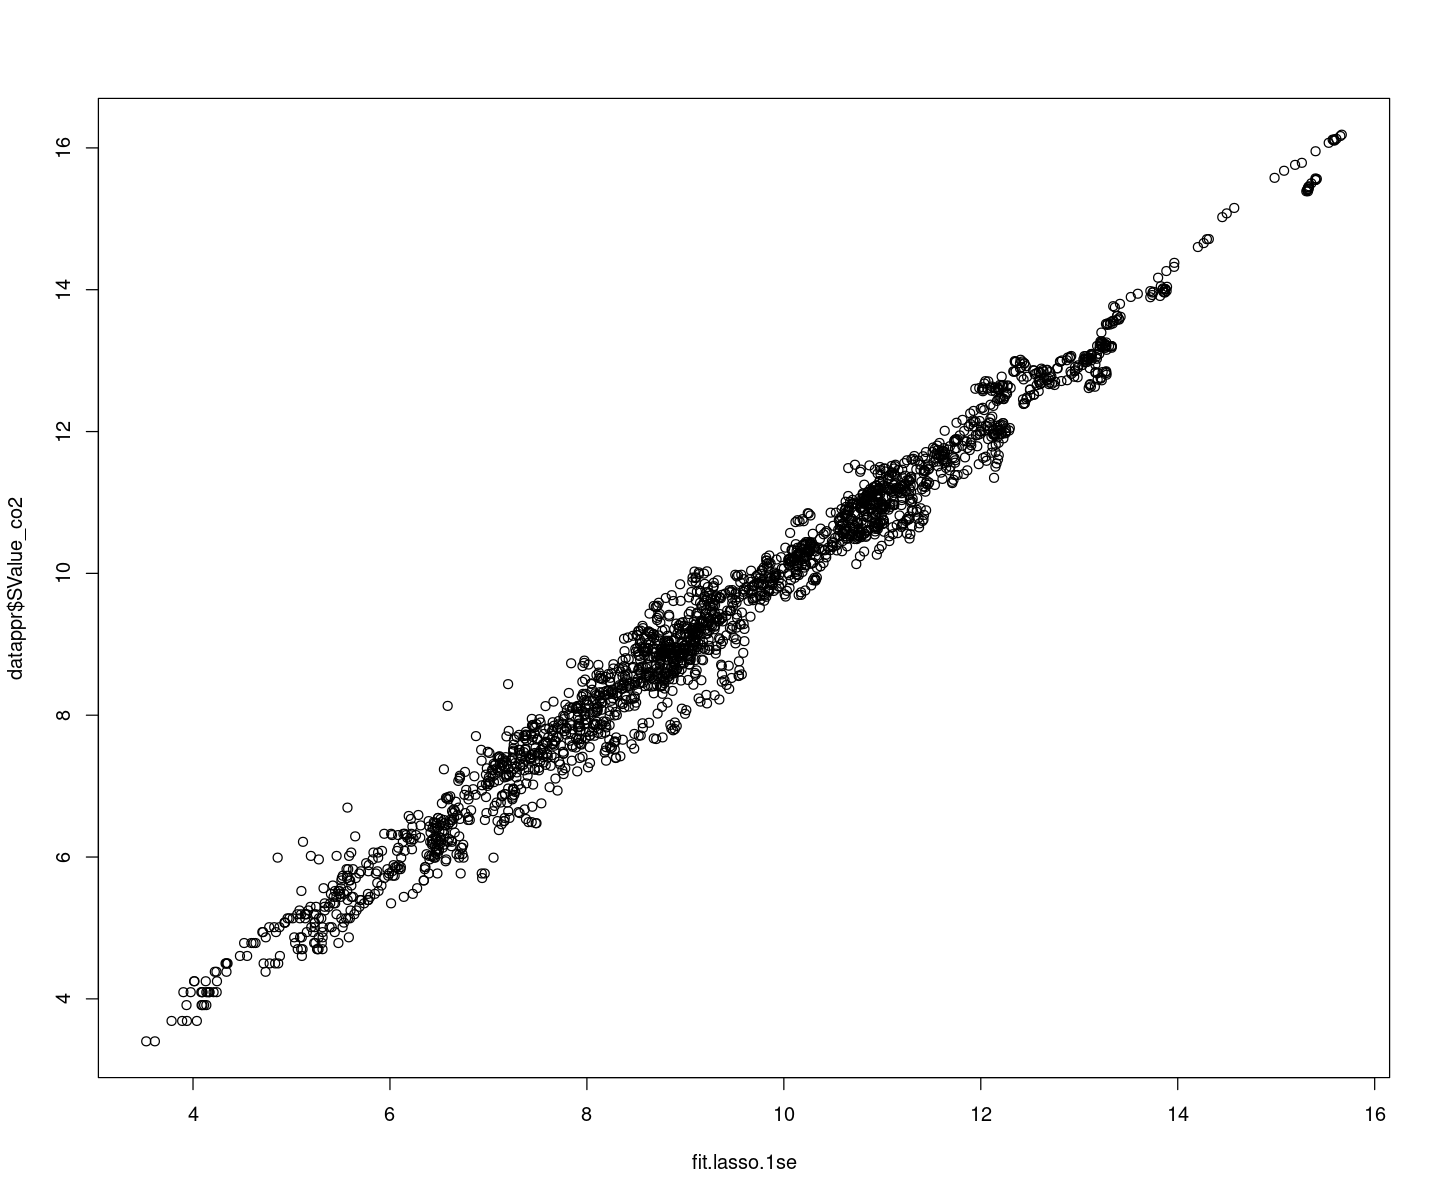

In [76]:
plot(fit.lasso.1se,datappr$SValue_co2)

Warning message:
“Removed 45 rows containing missing values (`geom_point()`).”


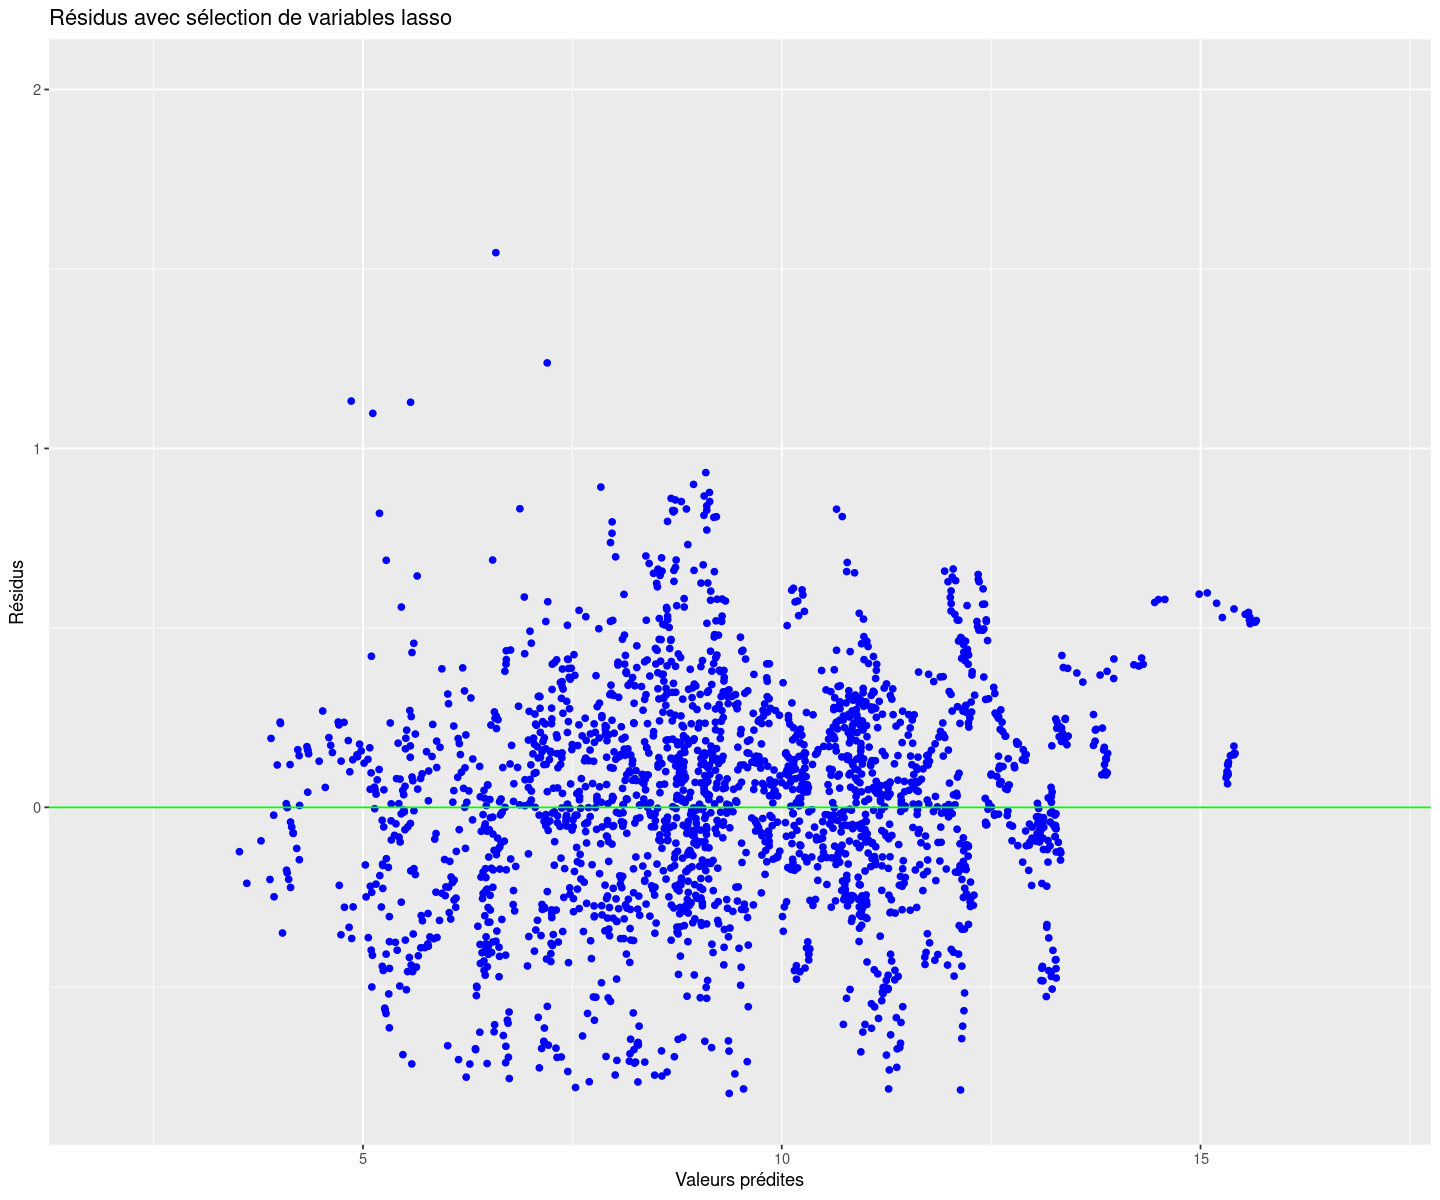

In [77]:
#Graphe des résidus
gplot.res(fit.lasso.1se,res.lasso.1se,"Résidus avec sélection de variables lasso")

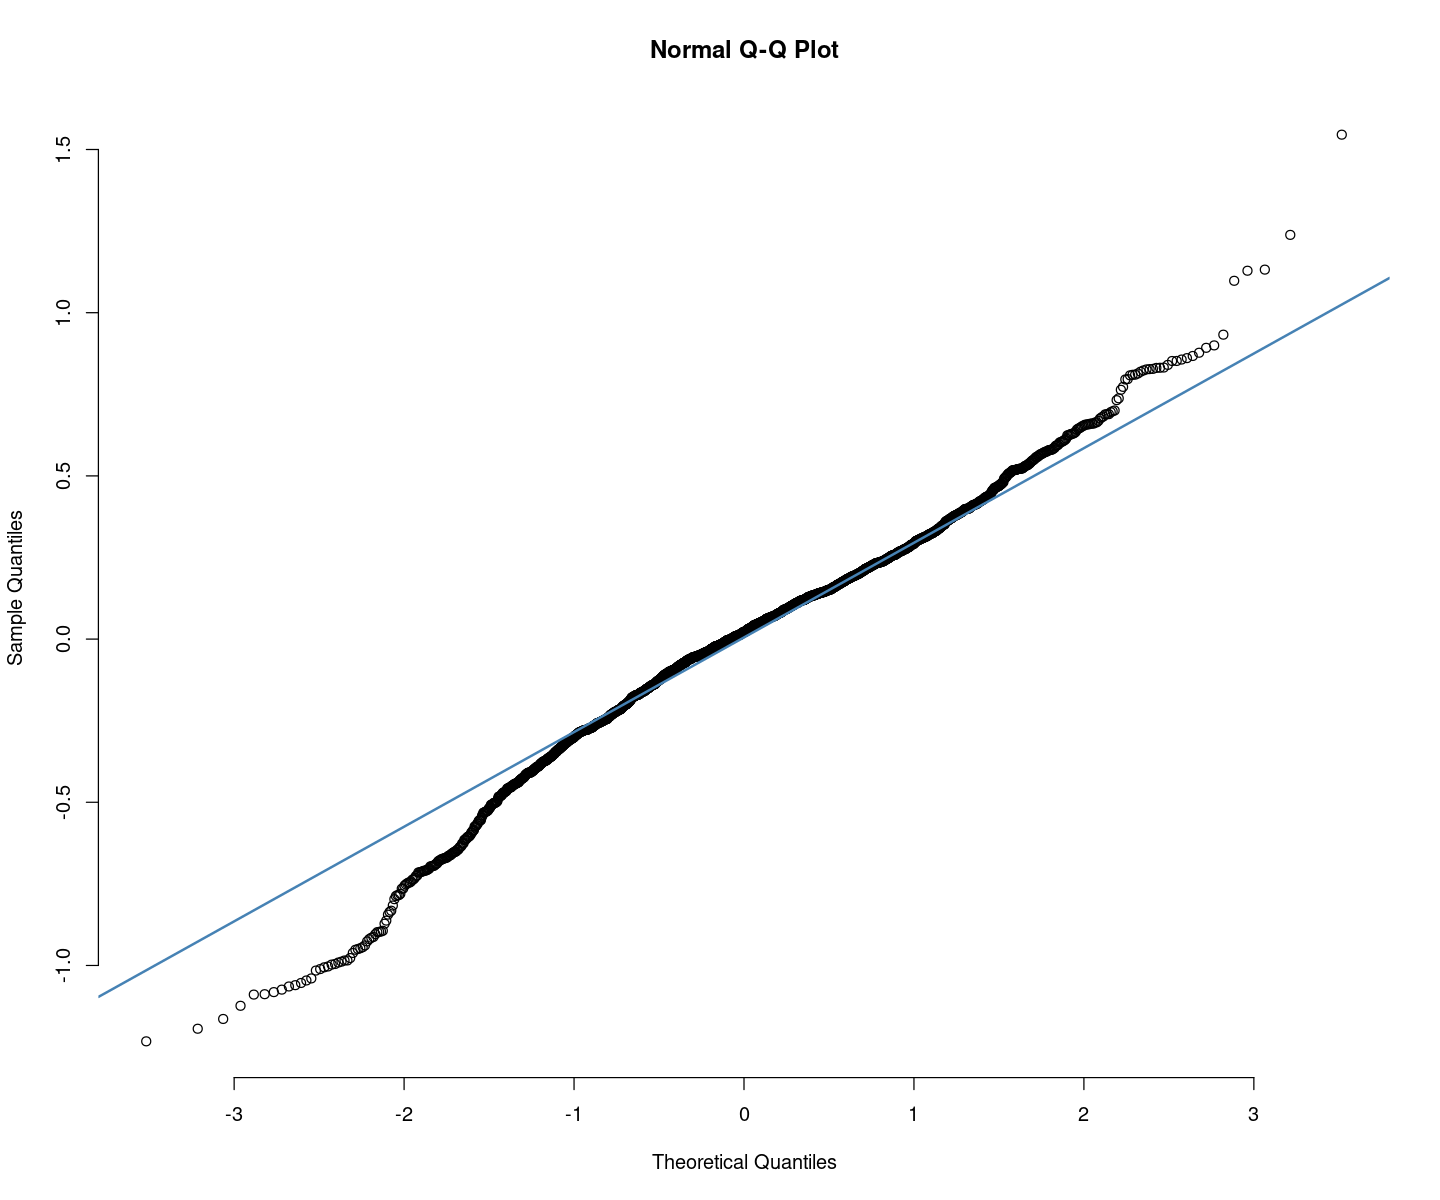

In [78]:
qqnorm(res.lasso.1se , pch = 1, frame = FALSE)
qqline(res.lasso.1se , col = "steelblue", lwd = 2)

In [79]:
#MSE et R²
MSE_lse = mean((datappr$SValue_co2 - fit.lasso.1se)^2)
paste("MSE =", MSE_lse)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lasso.1se)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_lse <- 1 - (SS_Residual / SS_Total)
R2a_lse = 1 - ((1-R2_lse)*(dim(datappr)[1]-1))/(dim(datappr)[1]-length(reg.lasso.cv$coefficients)-1)
paste("R2 ajusté =", R2a_lse)

[1] "MSE = 0.112627460273712"

[1] "R2 ajusté = 0.979994717222961"

#### Interpretation de l'effet des variables

In [80]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.019"

36 x 1 sparse Matrix of class "dgCMatrix"
                             s1
(Intercept)       -1.359818e+01
Year2000           .           
Year2001           .           
Year2002           .           
Year2003           .           
Year2004           .           
Year2005           .           
Year2006           .           
Year2007           .           
Year2008           .           
Year2009           .           
Year2010           .           
Year2011           .           
Year2012           .           
Year2013           .           
Year2014           .           
Year2015           .           
Year2016           .           
Year2017           .           
Year2018           .           
Year2019           .           
Year2020           .           
gdp_growth        -1.871127e-04
Latitude           1.705864e-03
Longitude          .           
SAccess_elec       3.350167e-01
SAccess_fuels      5.272588e-02
SRenewable_energy -8.805590e-02
SElec_nuclear      1.318647e-0

### La méthode SVR : Support Vector Regression

In [81]:
svm.reg0 = svm(SValue_co2 ~ ., data = datappr)
summary(svm.reg0)


Call:
svm(formula = SValue_co2 ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02857143 
    epsilon:  0.1 


Number of Support Vectors:  577






In [171]:
#Choix du meilleur noyau SVR
param = list(kernel = c("linear", "polynomial", "radial", "sigmoid"),
            cost = c(0.5, 1, 1.5, 2, 3),
            gamma = c(0.02, 0.1, 0.5, 1),
            epsilon = c(0.05,0.1,0.4))

svm.reg.tune = tune(svm,SValue_co2 ~ ., data = datappr, ranges = param)

svm.reg.tune


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 kernel cost gamma epsilon
 radial    3  0.02    0.05

- best performance: 0.03225221 


In [172]:
#Résidus
svm.reg = svm(SValue_co2~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    kernel = svm.reg.tune$best.parameters$kernel)

summary(svm.reg)


Call:
svm(formula = SValue_co2 ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    kernel = svm.reg.tune$best.parameters$kernel)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  3 
      gamma:  0.02857143 
    epsilon:  0.1 


Number of Support Vectors:  479






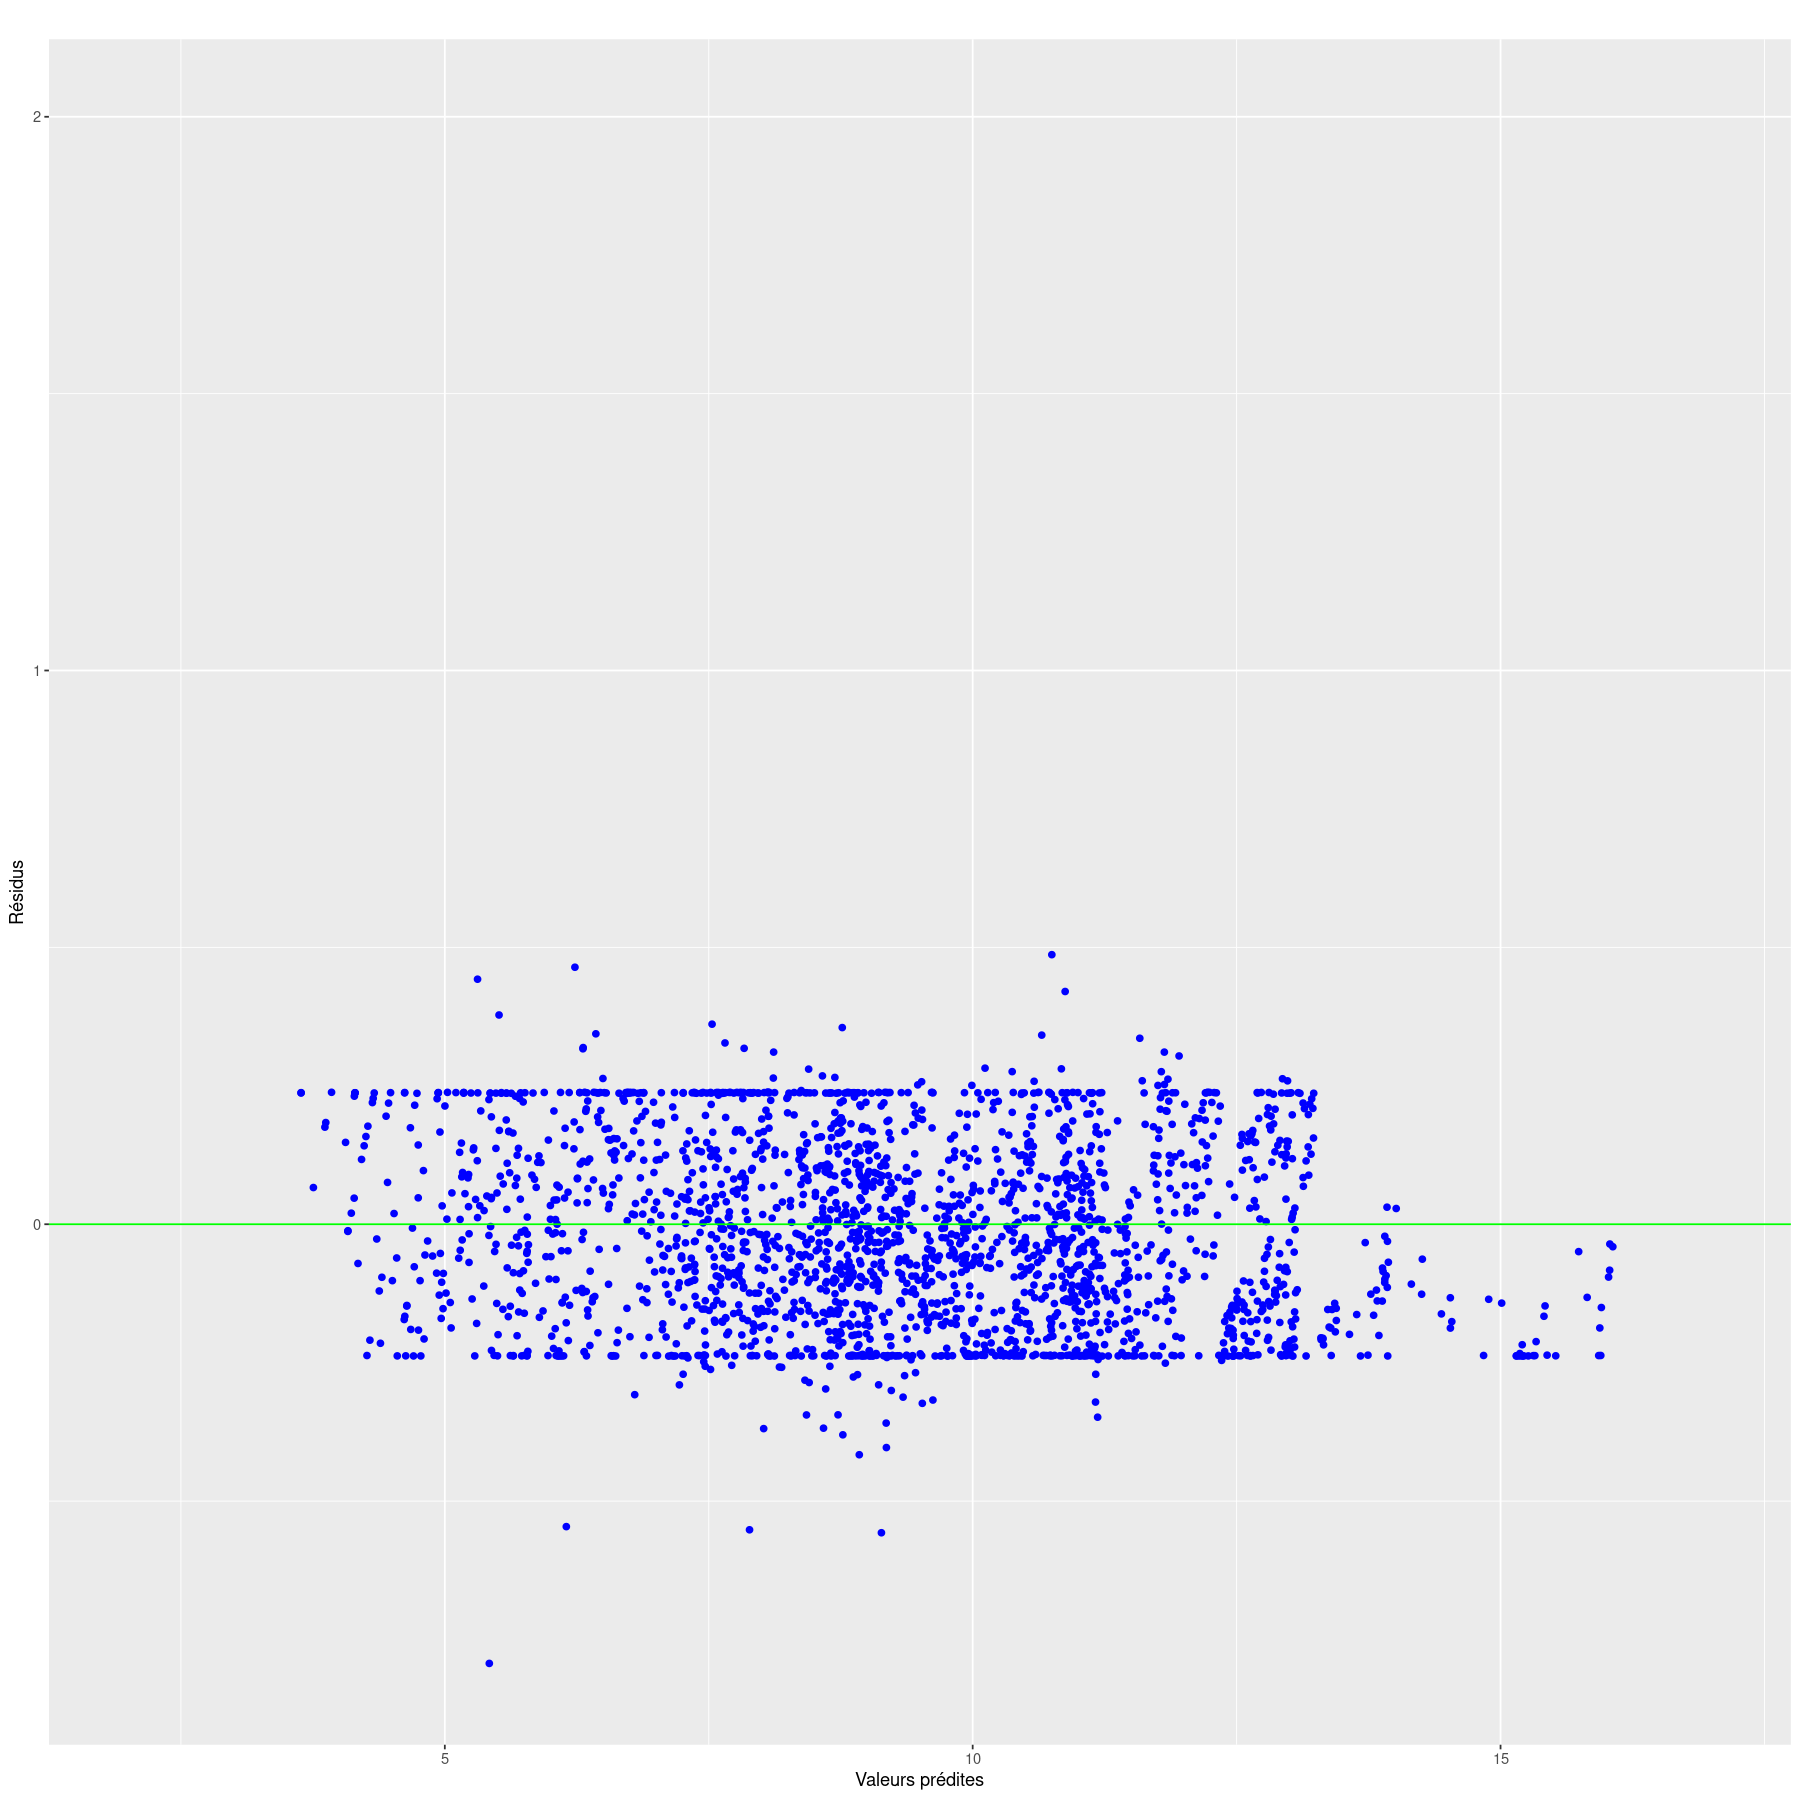

In [173]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"SValue_co2"]
gplot.res(fit.svmr,res.svmr,titre="")

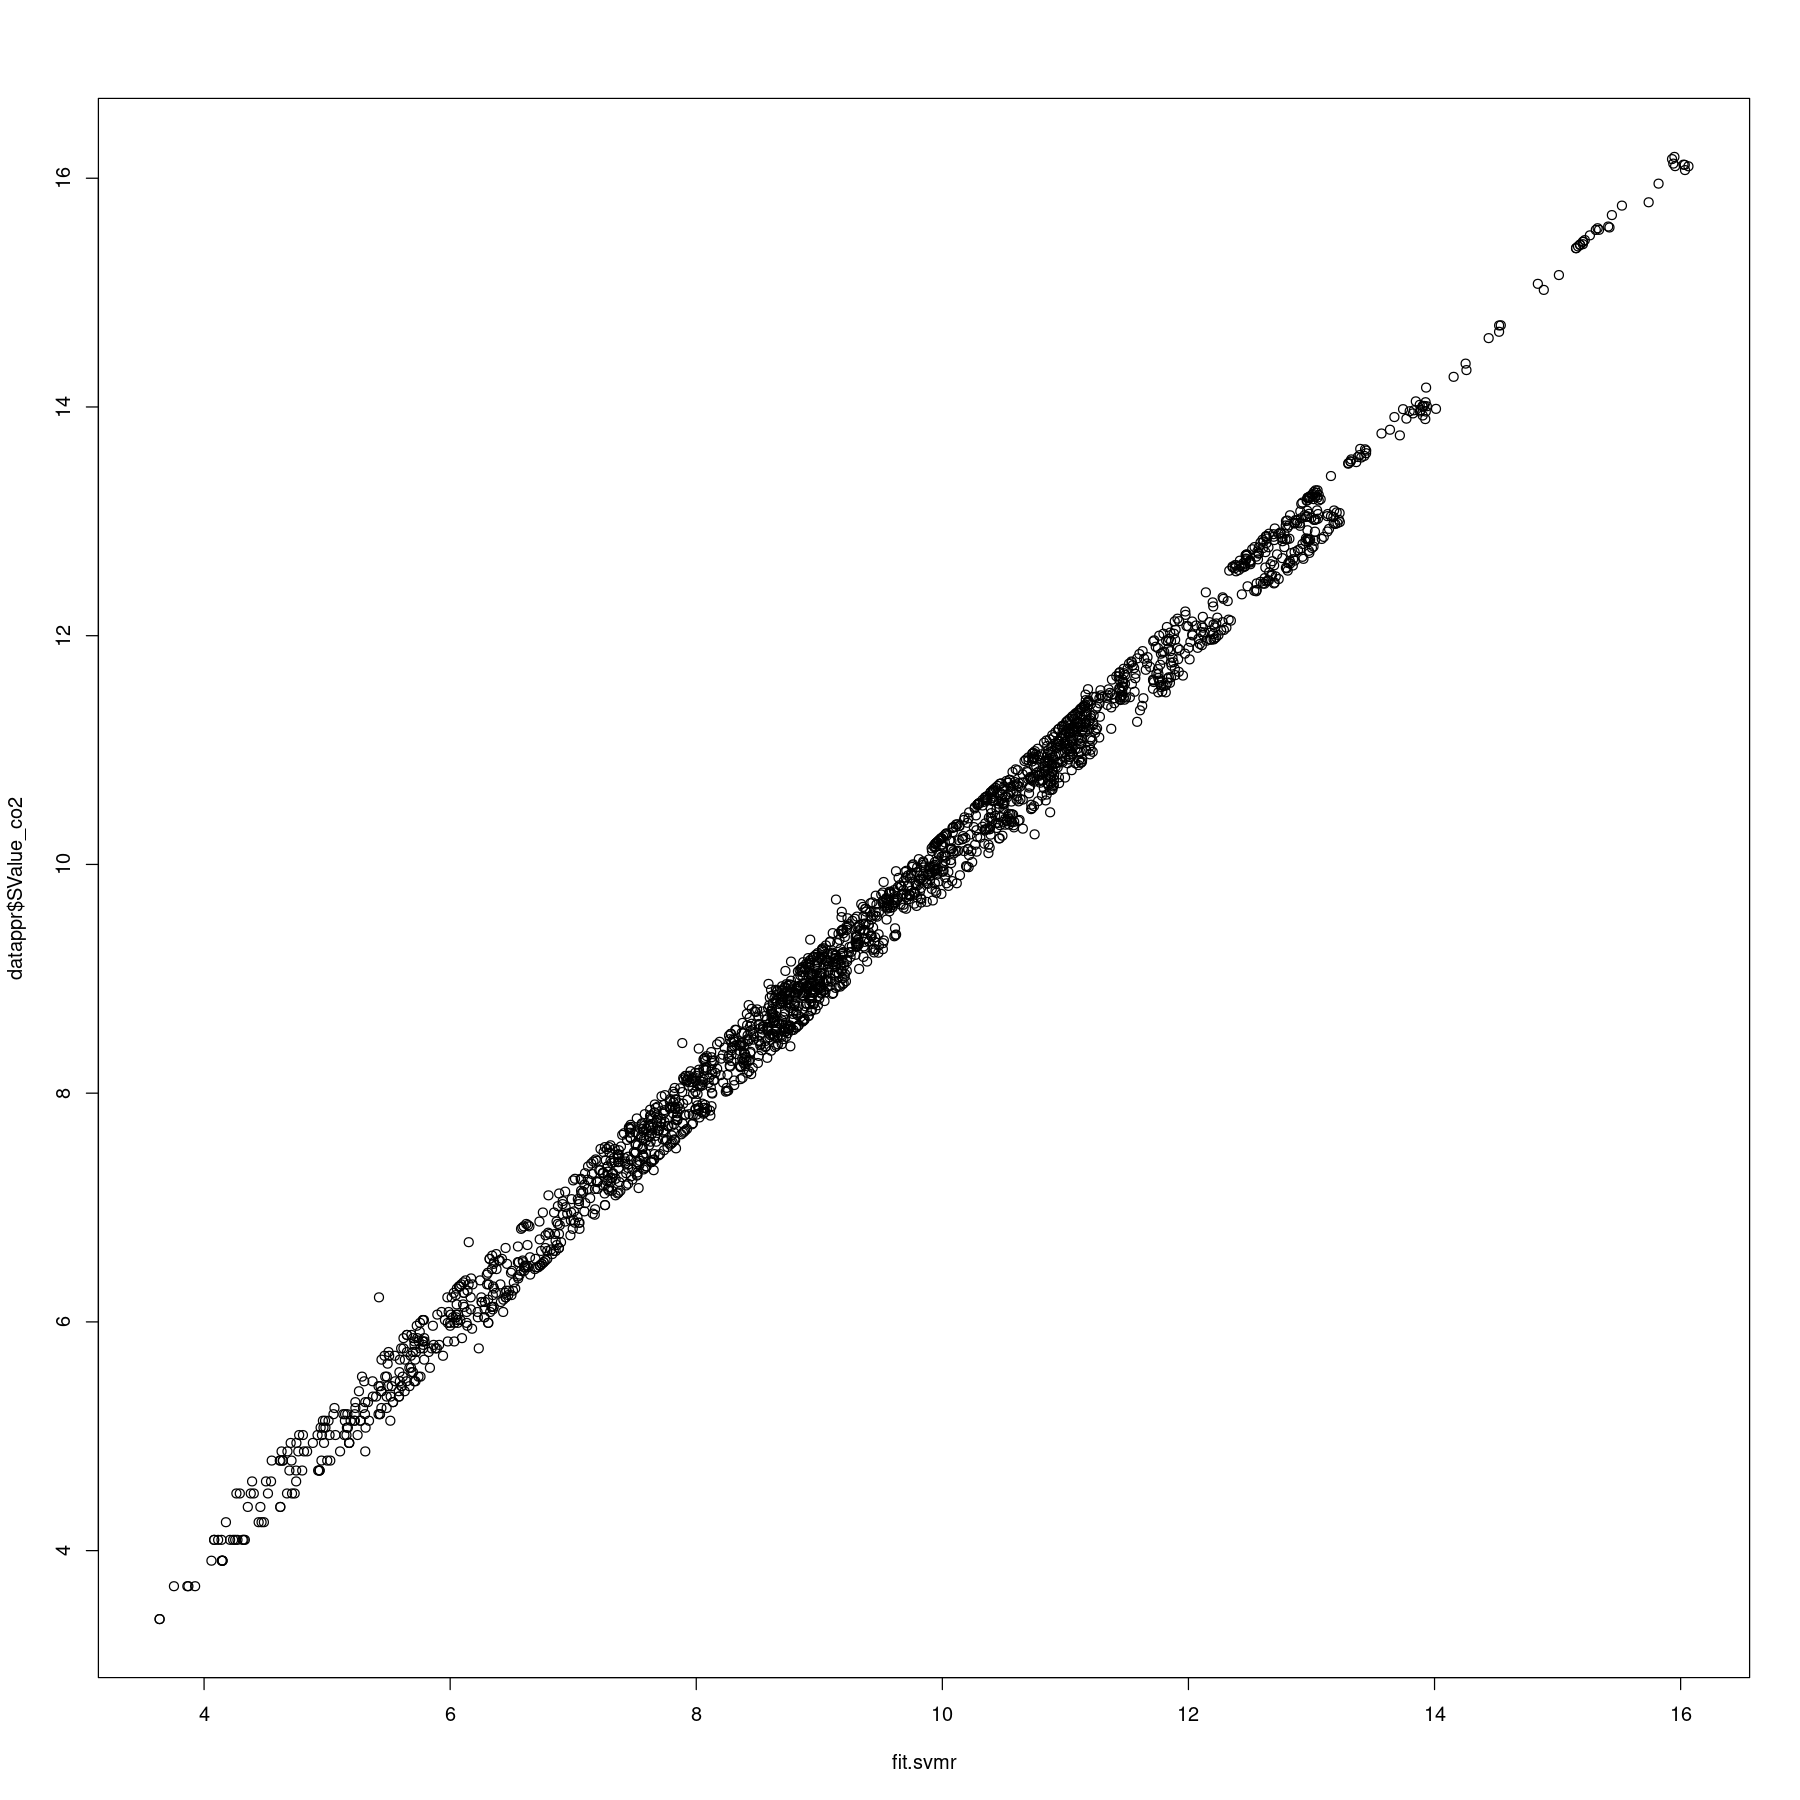

In [174]:
plot(fit.svmr,datappr$SValue_co2)

In [175]:
# Calculer le coefficient de détermination R² (R2 score)
SS_Residual <- sum((datappr$SValue_co2 - fit.svmr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_svm <- 1 - (SS_Residual / SS_Total)

paste("R2 =", R2_svm)

[1] "R2 = 0.995235430052838"

### La méthode CART : Classification And Regression Trees 

In [89]:
tree.reg=rpart(SValue_co2~.,data=datappr, control = rpart.control(cp=0.02))

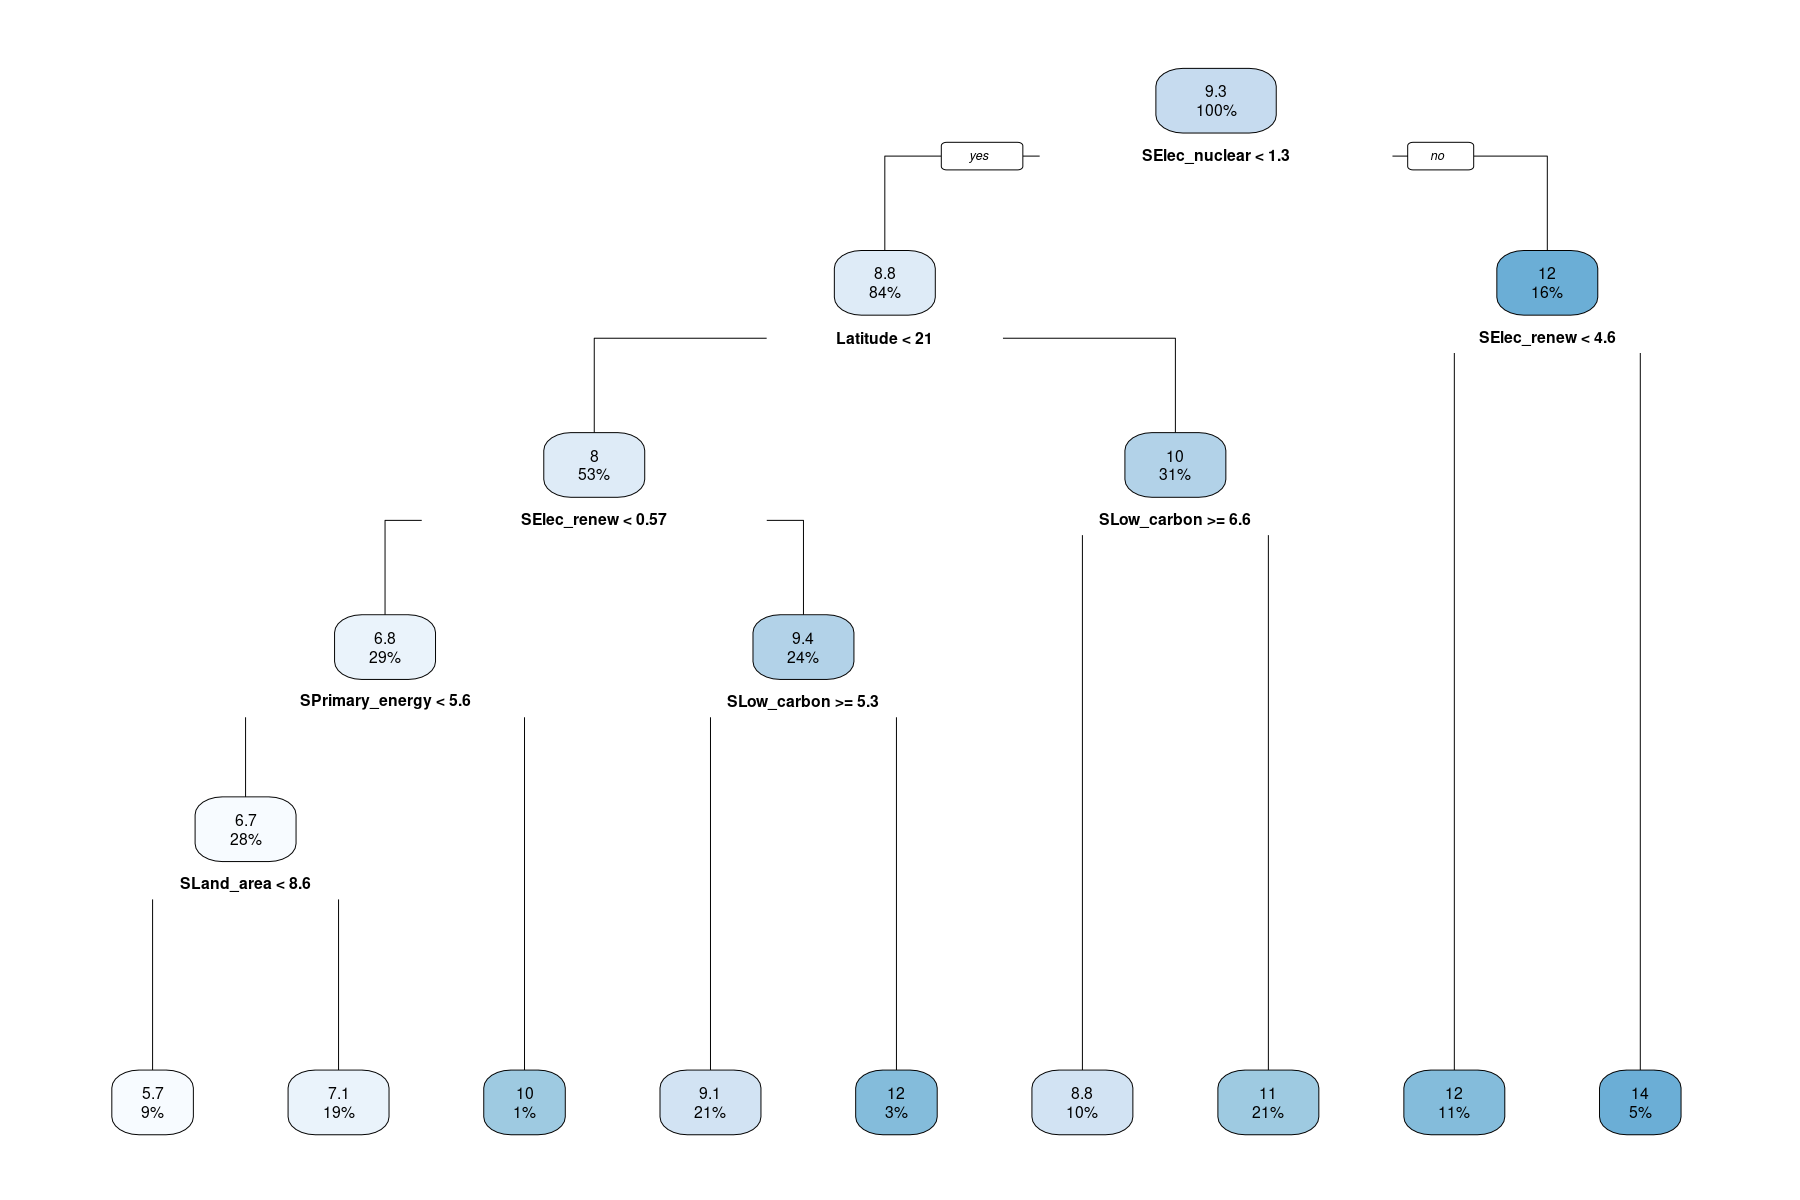

In [92]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

L'arbre brut est complexe, nous allons donc le simplifier en estimant la profondeur de l'arbre par validation croisée.

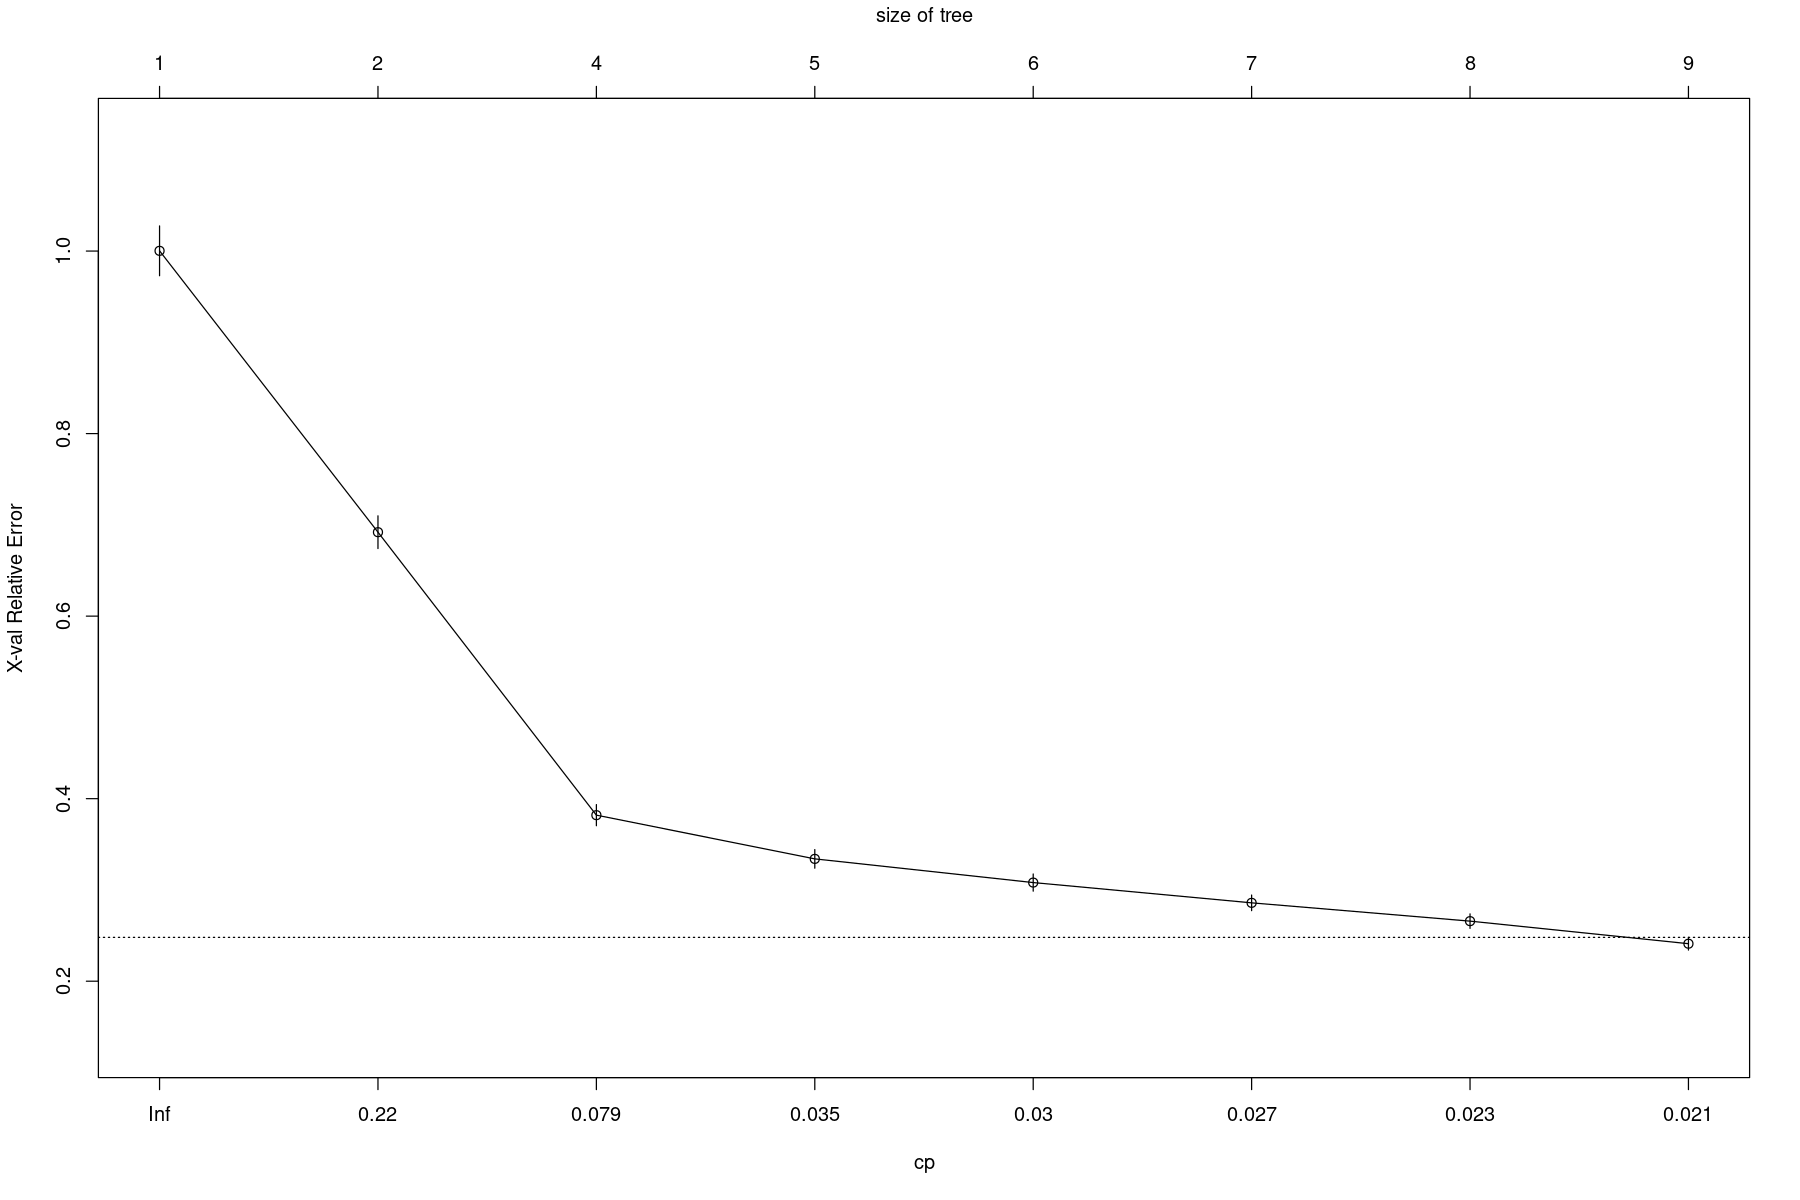

In [93]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"SValue_co2"])^2,2,sum)

plotcp(tree.reg)

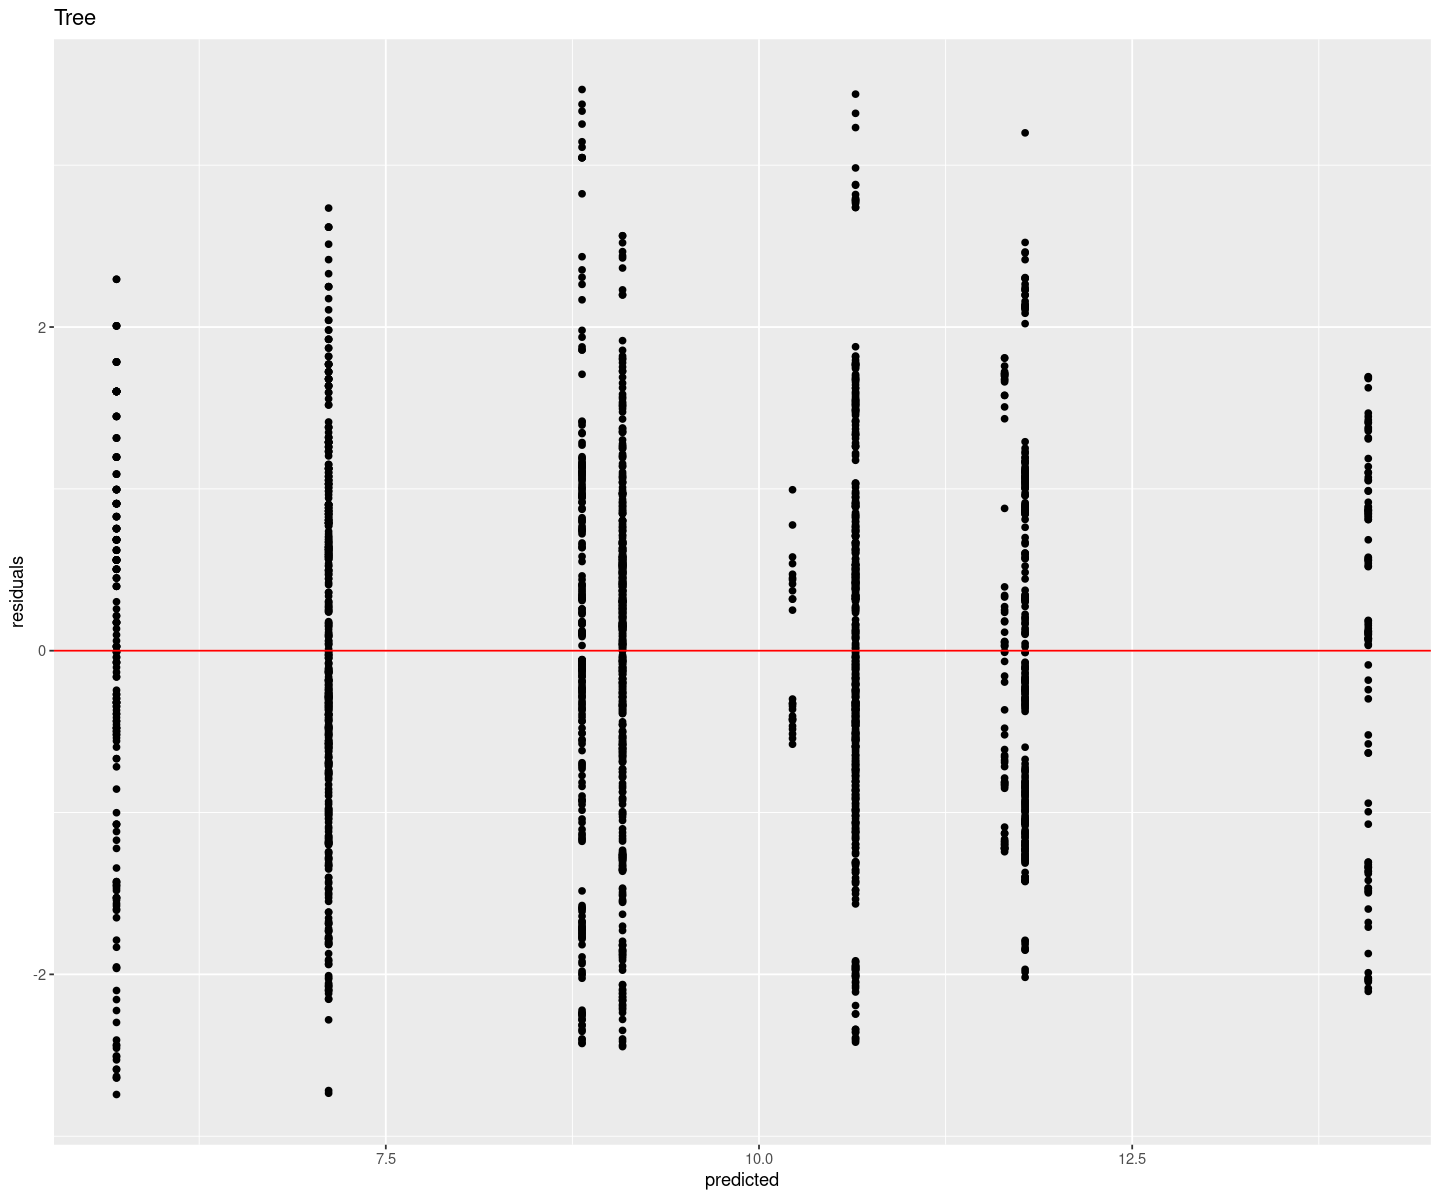

In [94]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"SValue_co2"]

options(repr.plot.width = 12, repr.plot.height = 10)
par(mfrow = c(1, 3))
ggplot(data.frame(residuals = res.tree, predicted = fit.tree), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") +
  ggtitle("Tree")

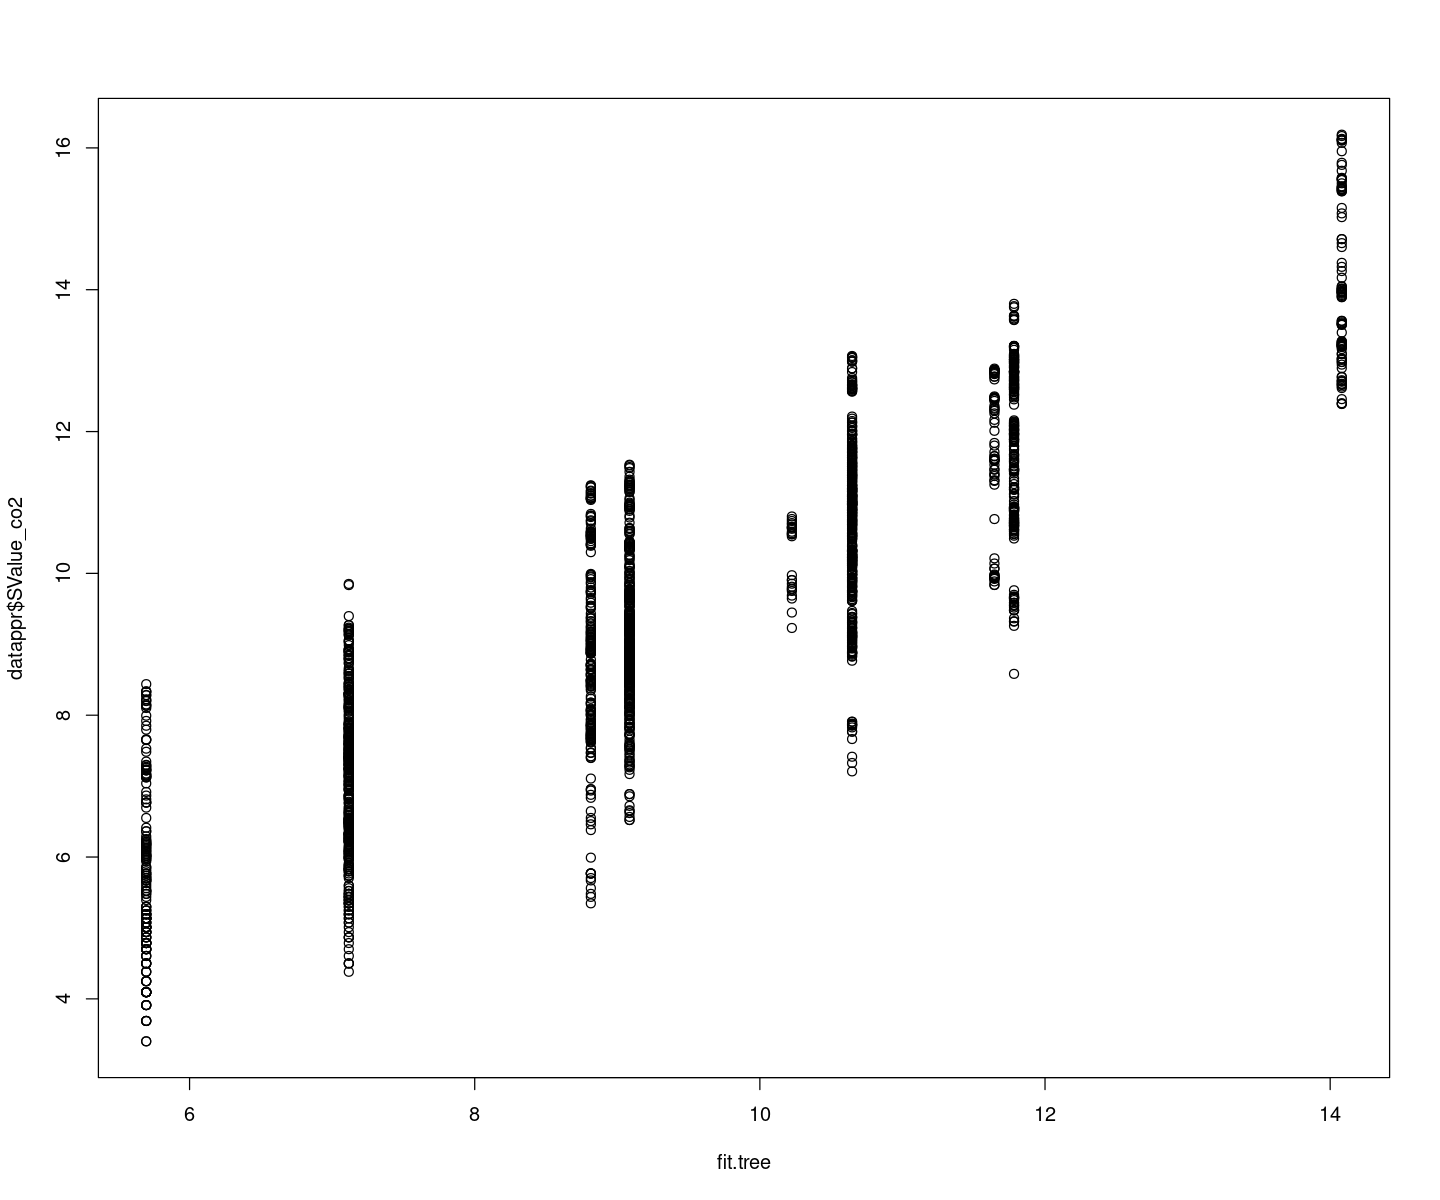

In [95]:
plot(fit.tree,datappr$SValue_co2)

[1] 0.02069784

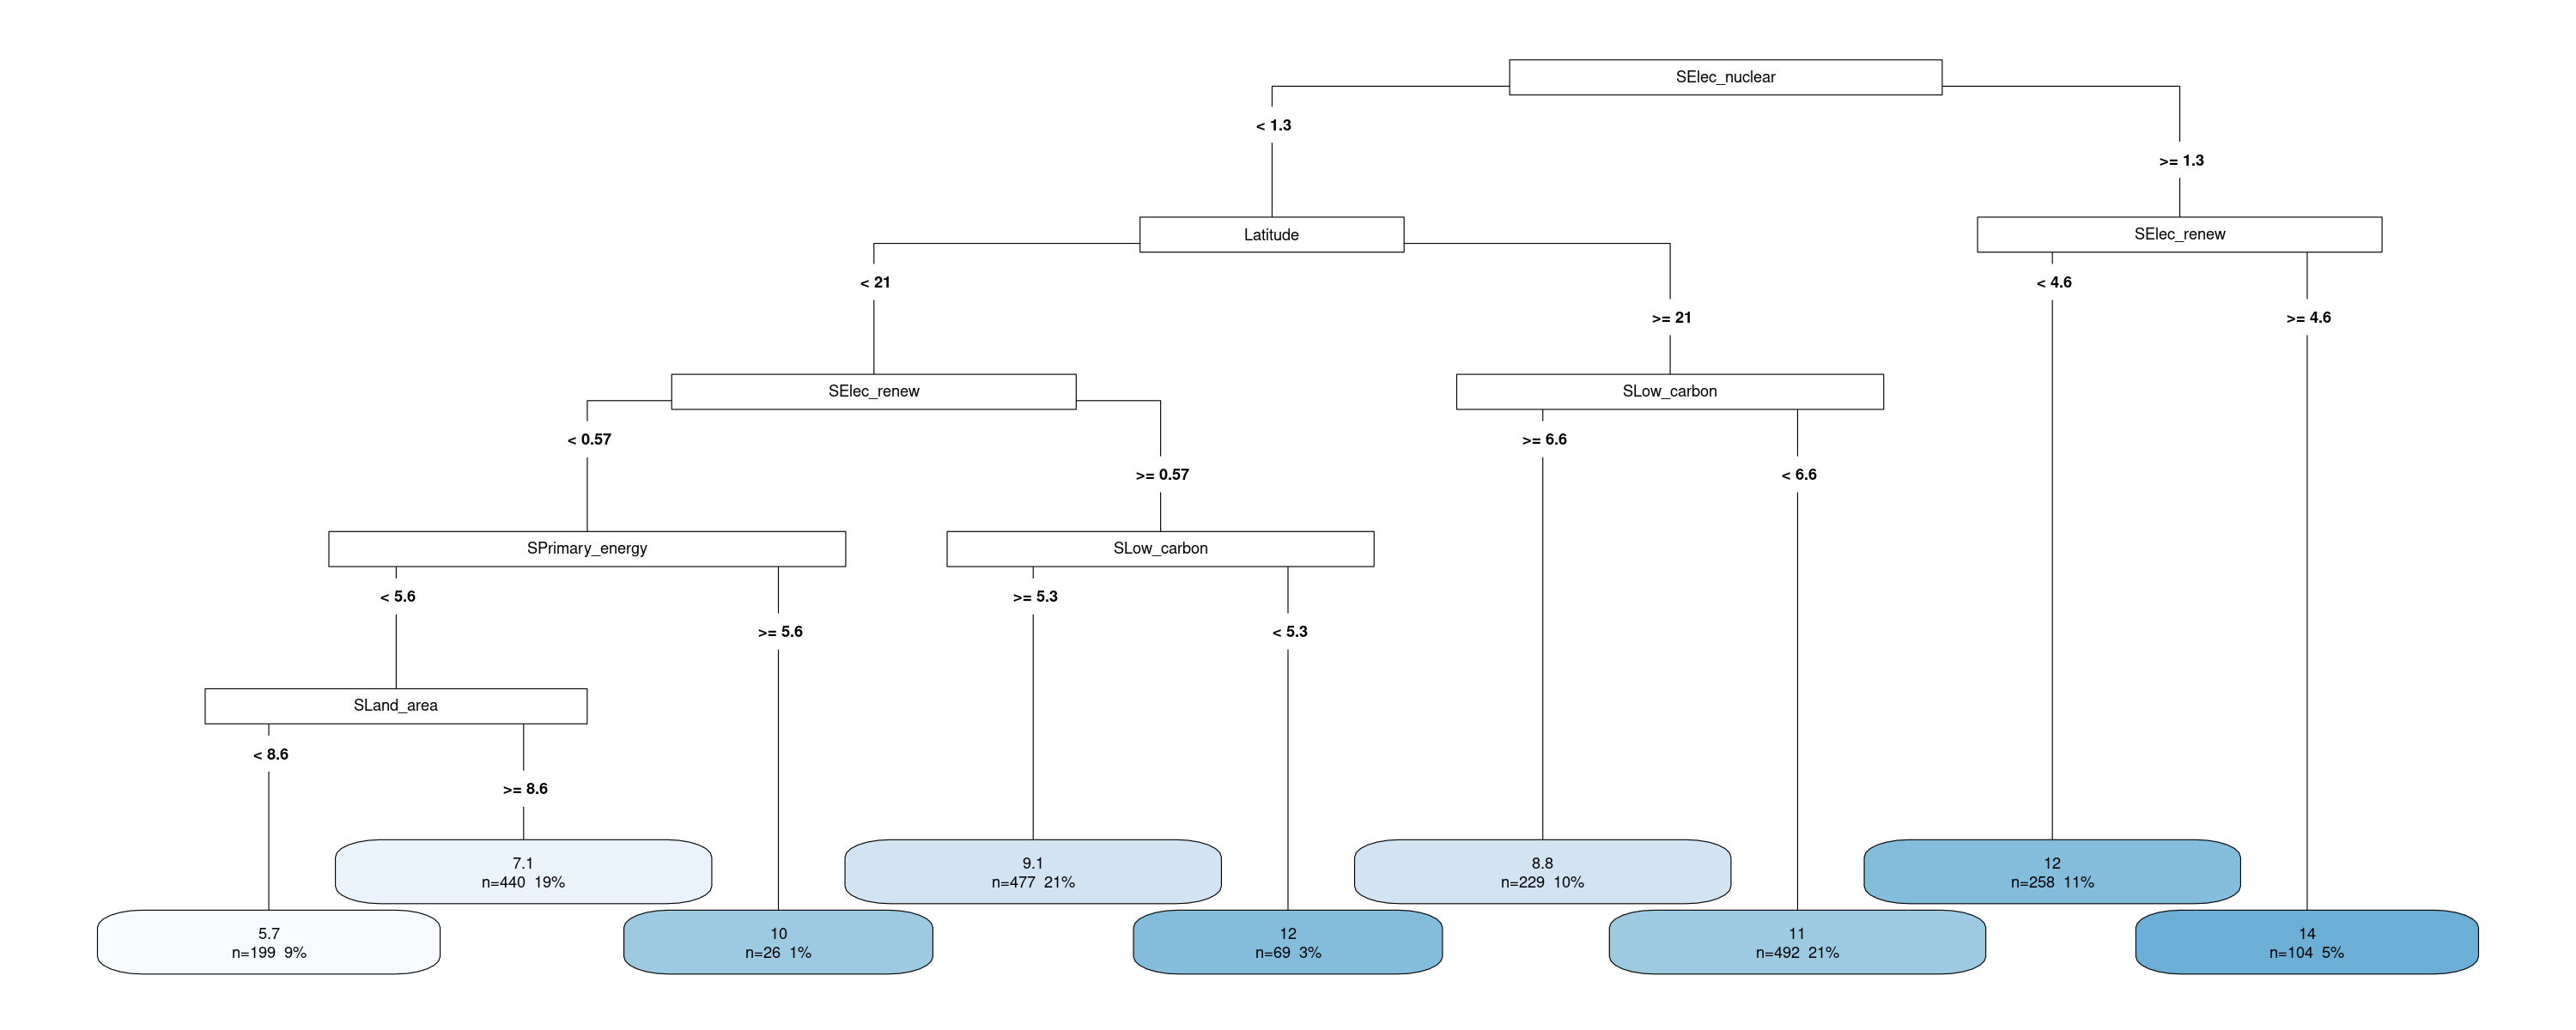

In [96]:
options(repr.plot.width = 25, repr.plot.height = 10)

as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

In [97]:
# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.tree)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_a <- 1 - (SS_Residual / SS_Total)

paste("R2 =", R2_a)

[1] "R2 = 0.775503699739613"

### La méthode Random Forests

mtry = 5  OOB error = 0.0392152 
Searching left ...
mtry = 3 	OOB error = 0.05453398 
-0.3906336 0.05 
Searching right ...
mtry = 10 	OOB error = 0.04115999 
-0.04959254 0.05 


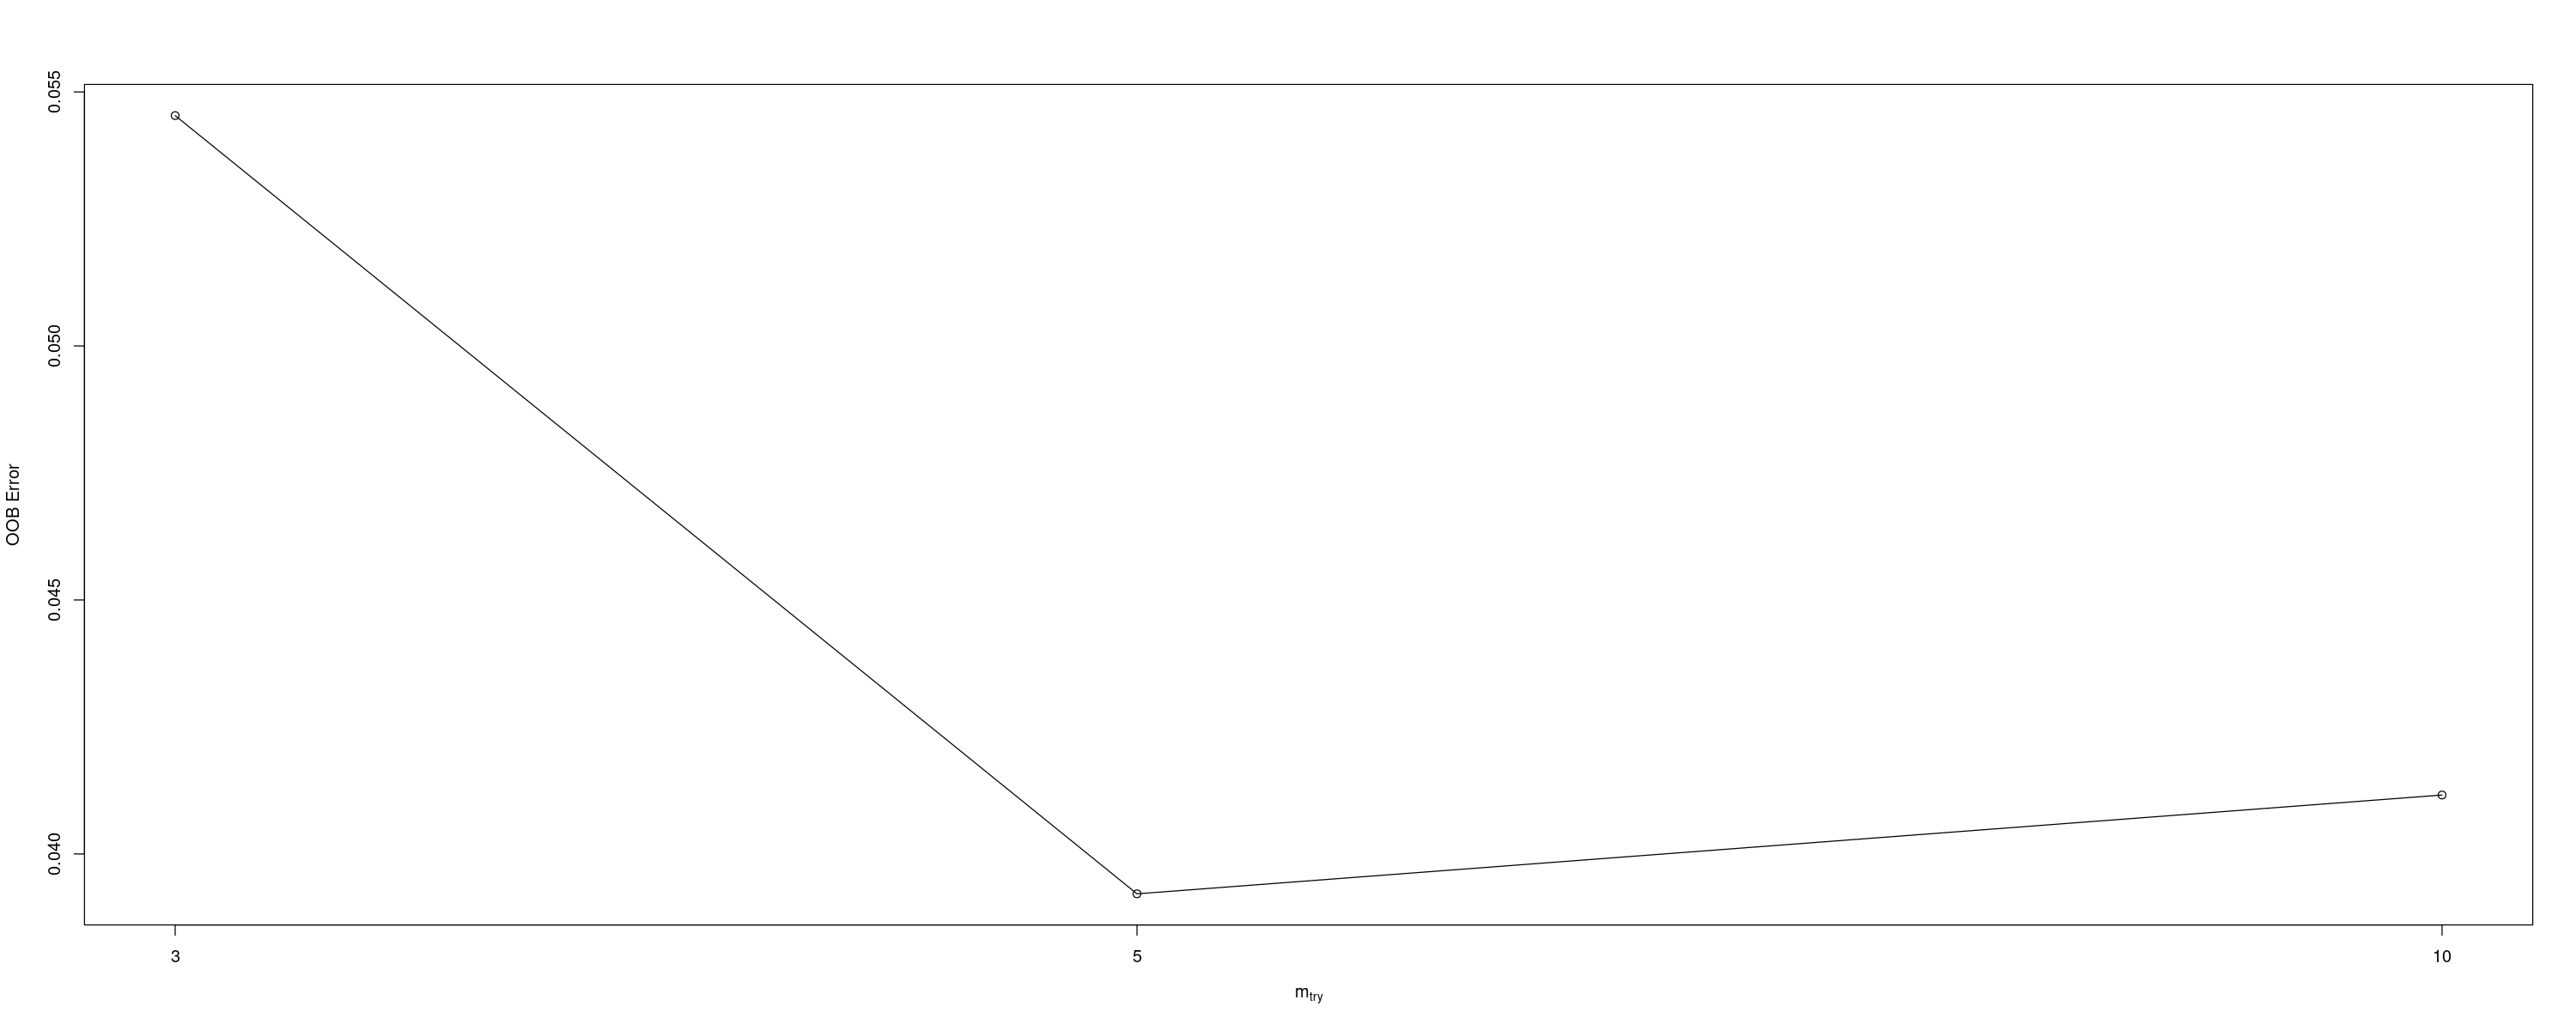

In [98]:
res.rf <- tuneRF(datappr[,-16], datappr[,16])

In [99]:
rf.reg=randomForest(SValue_co2~., data=datappr,ntree=1000,do.trace=50,importance=TRUE,mtry =10)

attributes(rf.reg)

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
  50 |  0.03723     0.66 |
 100 |   0.0339     0.60 |
 150 |  0.03254     0.58 |
 200 |   0.0317     0.56 |
 250 |  0.03094     0.55 |
 300 |  0.03081     0.55 |
 350 |  0.03083     0.55 |
 400 |  0.03075     0.55 |
 450 |   0.0308     0.55 |
 500 |  0.03071     0.55 |
 550 |  0.03069     0.55 |
 600 |  0.03079     0.55 |
 650 |  0.03101     0.55 |
 700 |   0.0308     0.55 |
 750 |  0.03062     0.54 |
 800 |  0.03058     0.54 |
 850 |  0.03062     0.54 |
 900 |   0.0306     0.54 |
 950 |  0.03061     0.54 |
1000 |  0.03051     0.54 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

In [100]:
rf.reg


Call:
 randomForest(formula = SValue_co2 ~ ., data = datappr, ntree = 1000,      do.trace = 50, importance = TRUE, mtry = 10) 
               Type of random forest: regression
                     Number of trees: 1000
No. of variables tried at each split: 10

          Mean of squared residuals: 0.03050766
                    % Var explained: 99.46

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


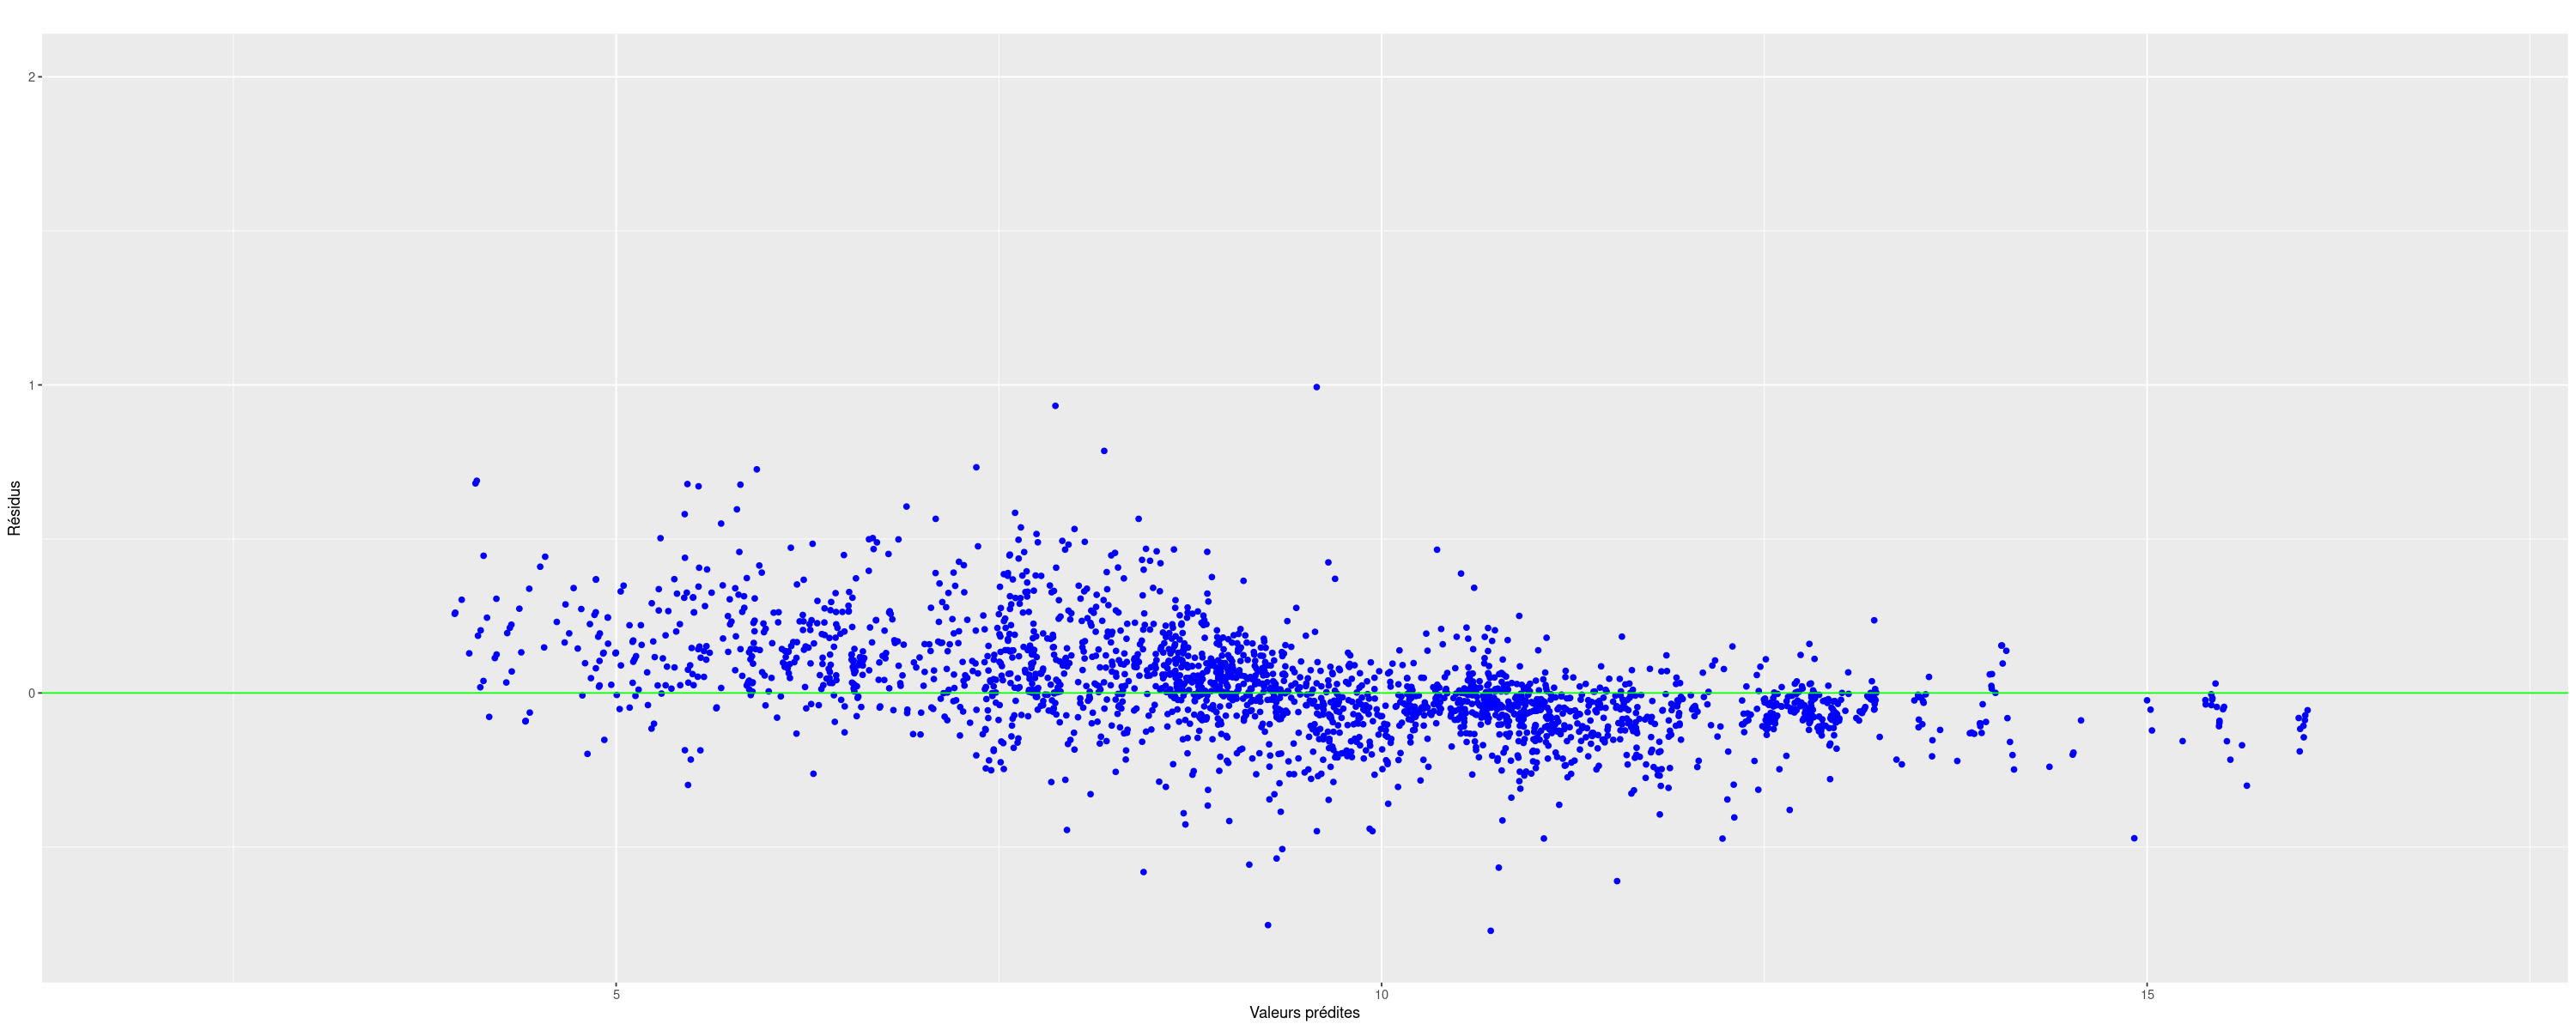

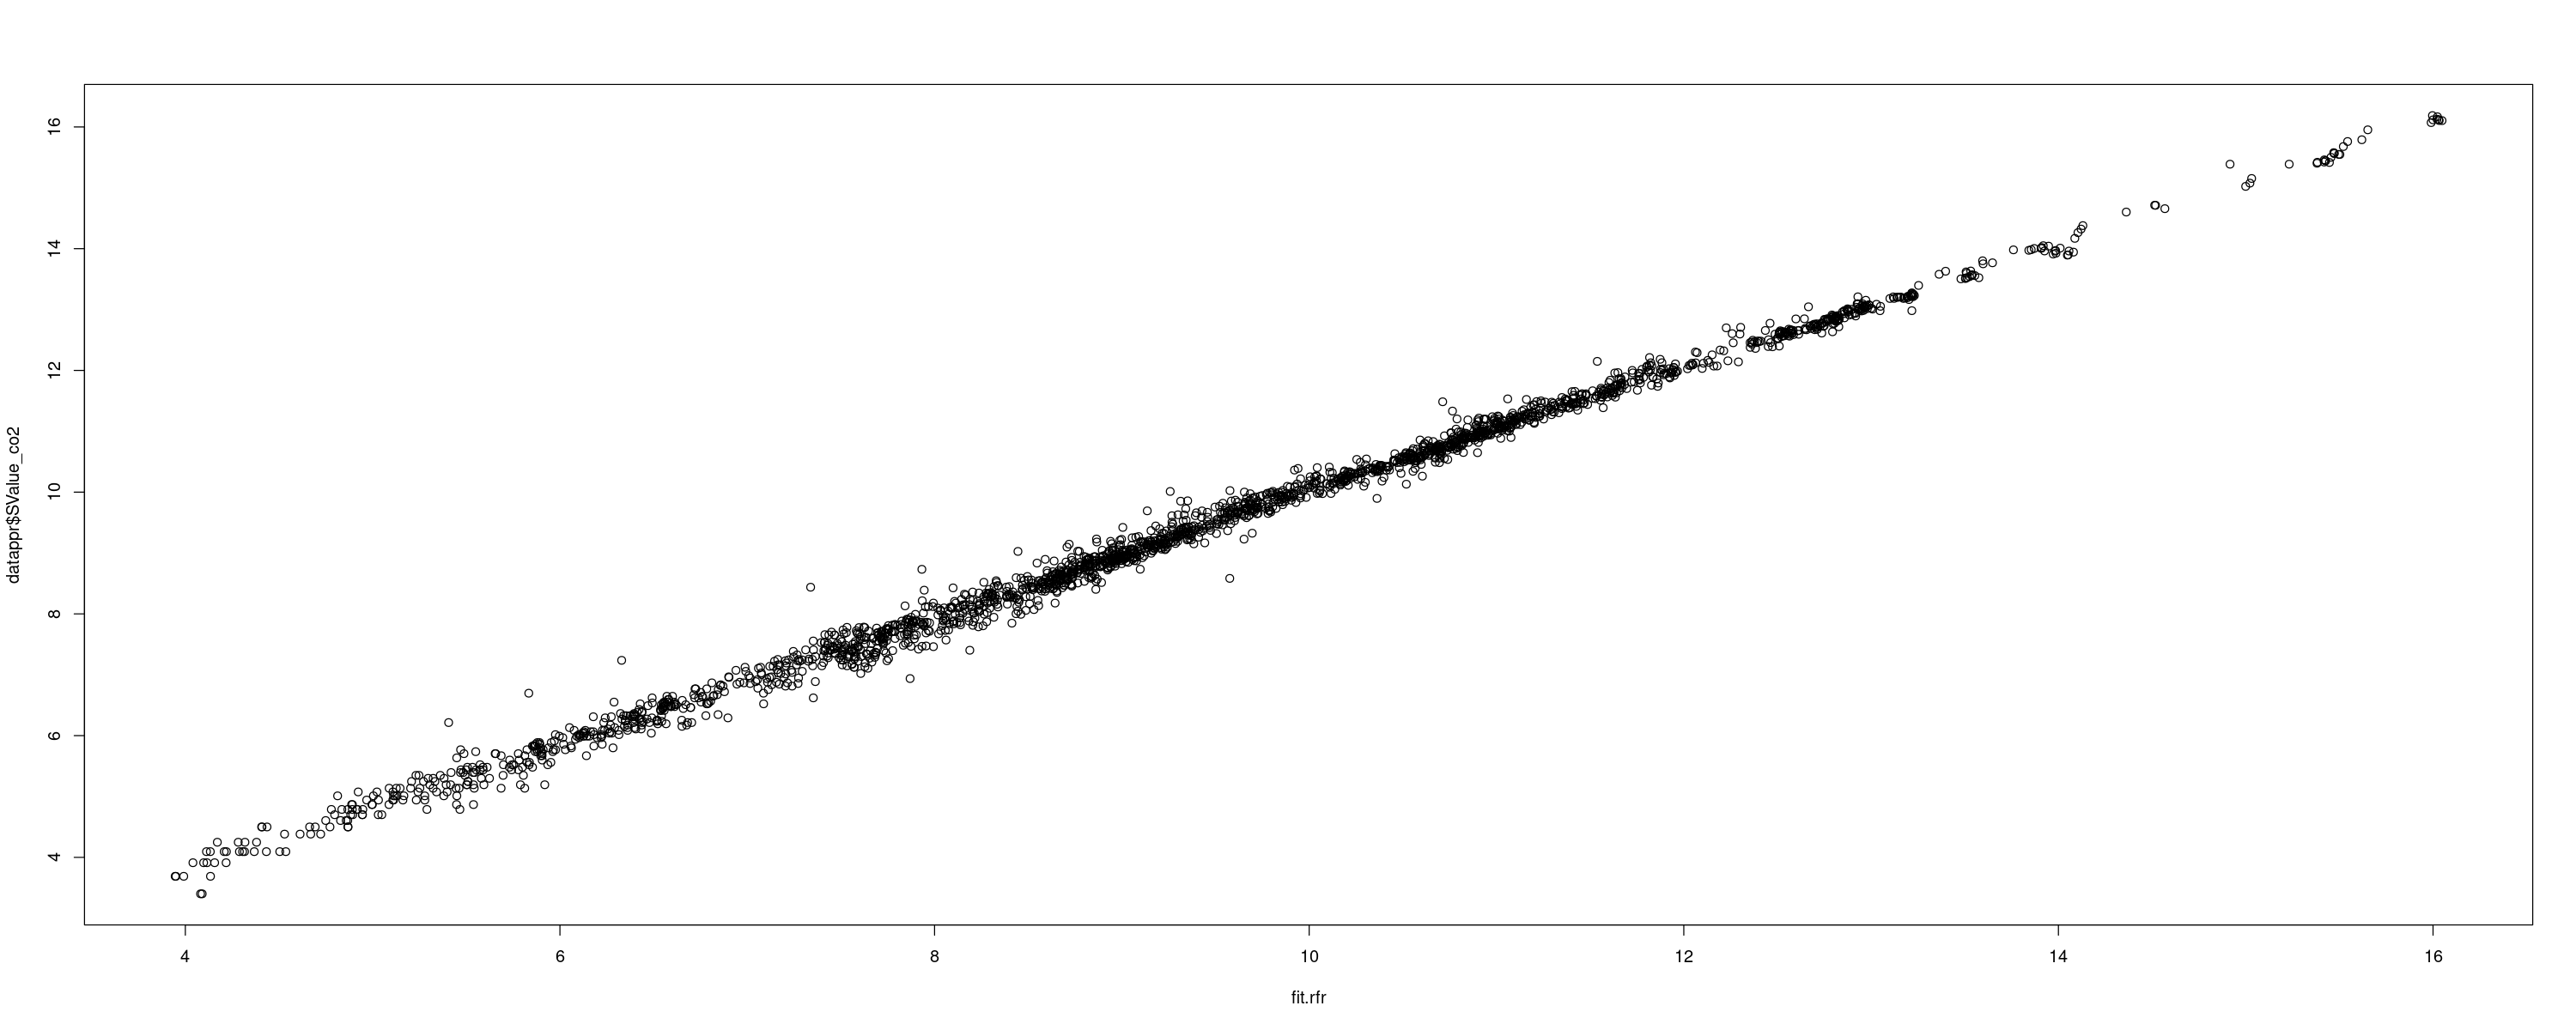

In [101]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"SValue_co2"]
gplot.res(fit.rfr,res.rfr,titre="")
plot(fit.rfr,datappr$SValue_co2)

In [102]:
# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.rfr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_rf <- 1 - (SS_Residual / SS_Total)

paste("R2 =", R2_rf)

[1] "R2 = 0.994581123669653"

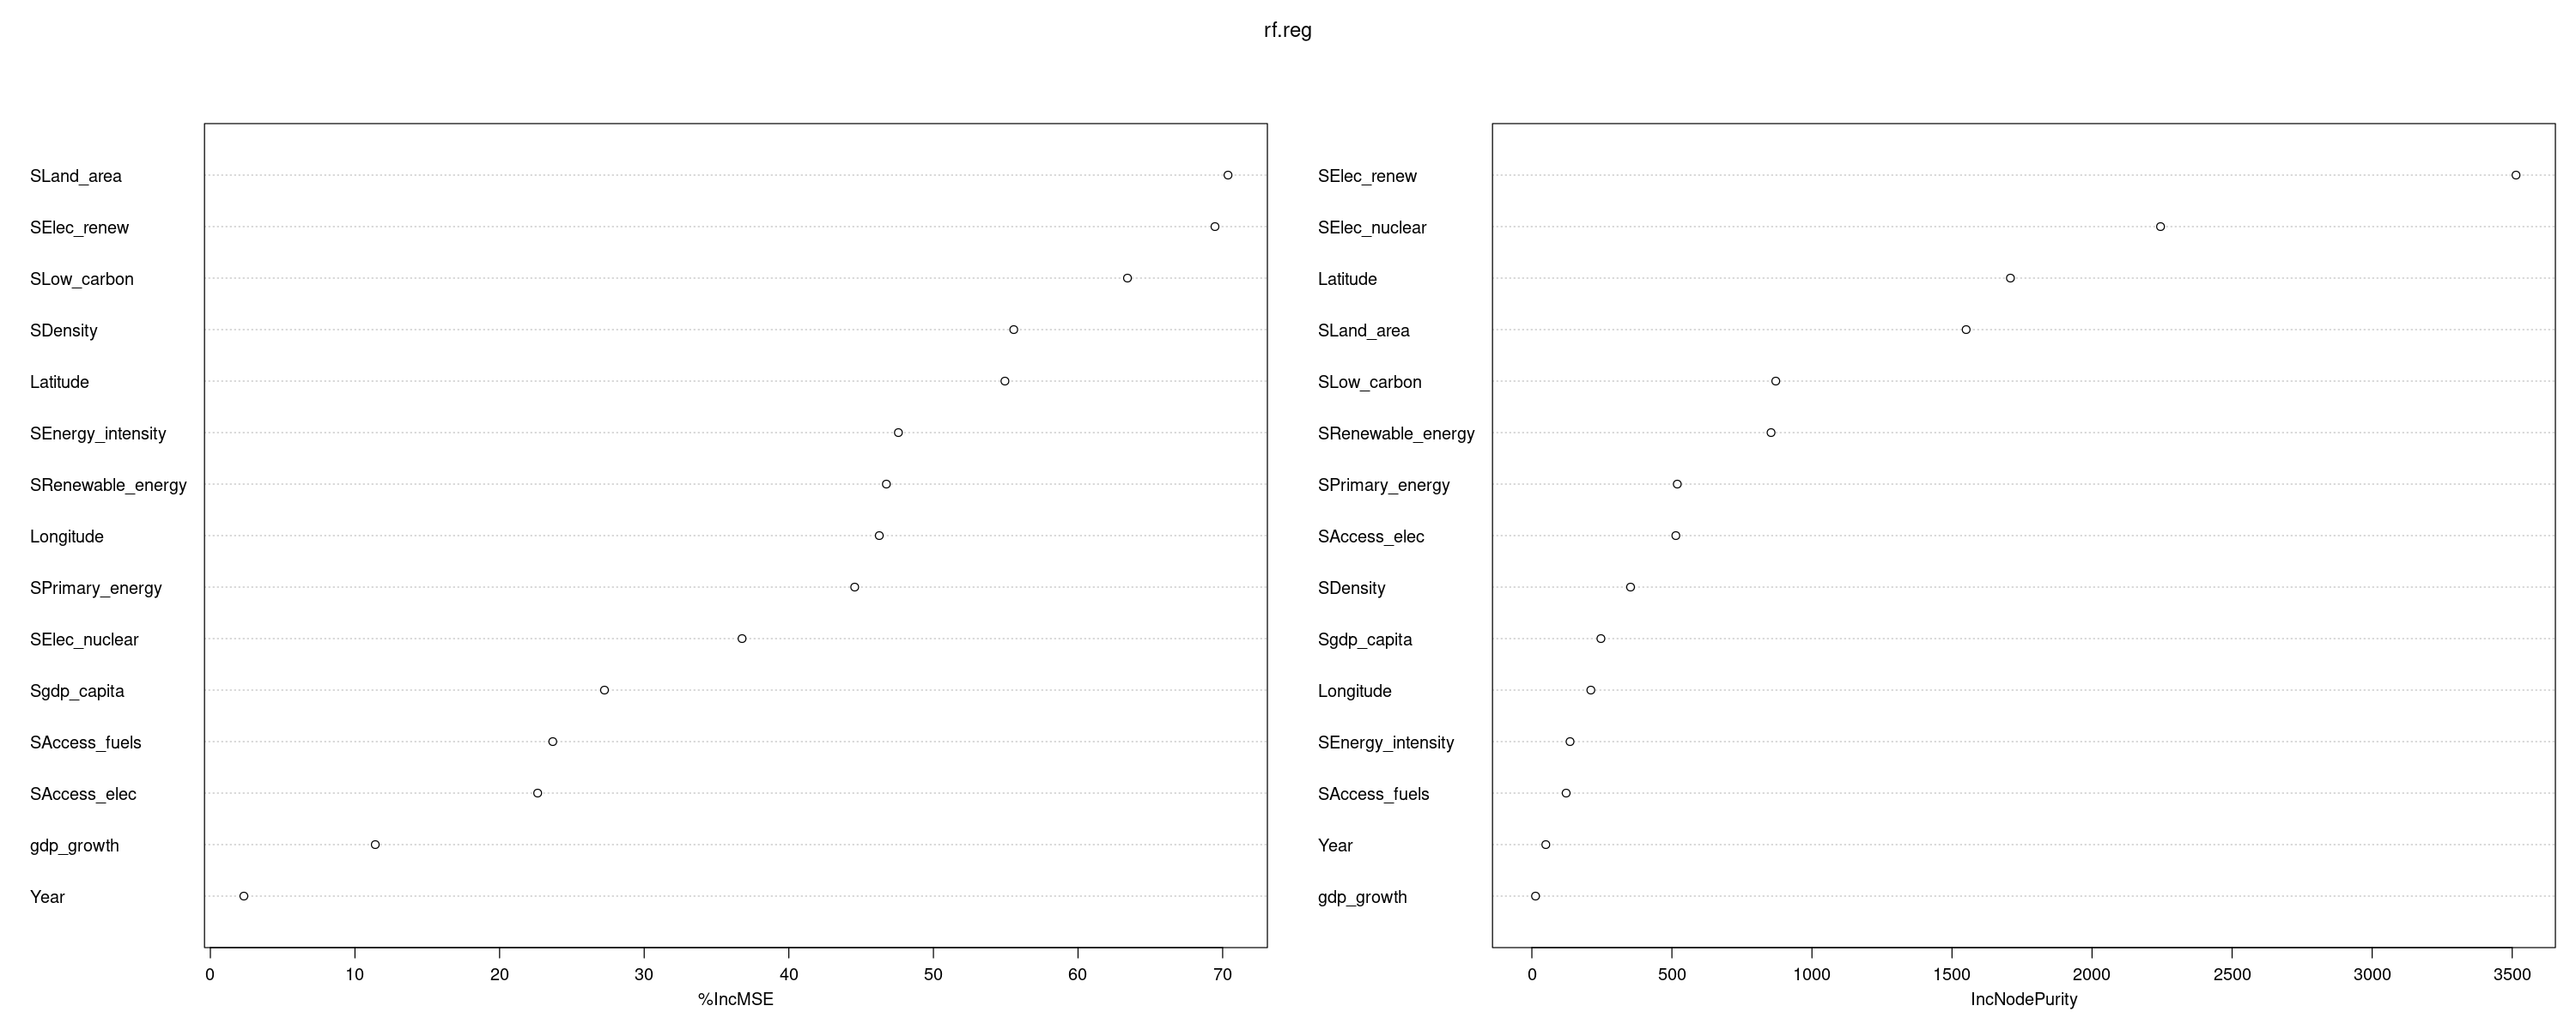

In [103]:
varImpPlot(rf.reg)

### La méthode du Boosting

In [106]:
library(caret)

# Hyperparamètres à tester
param_grid <- expand.grid( shrinkage = c(0.01,0.1), n.minobsinnode = 10 ,n.trees = c(200,500,1000),interaction.depth = 10)

# Contrôle de la validation croisée
train_control <- trainControl(
  method = "cv",      # Utiliser la validation croisée
  number = 10          # Nombre de folds
)

model <- train(
  SValue_co2 ~ .,
  data = datappr,
  method = "gbm",
  trControl = train_control,
  tuneGrid = param_grid,
  verbose = FALSE
)

Le chargement a nécessité le package : lattice


Attachement du package : ‘caret’


Les objets suivants sont masqués depuis ‘package:DescTools’:

    MAE, RMSE


Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 20: Year2020 has no variation.”
Warning message in (fu

In [107]:
print(model$bestTune)

  n.trees interaction.depth shrinkage n.minobsinnode
6    1000                10       0.1             10


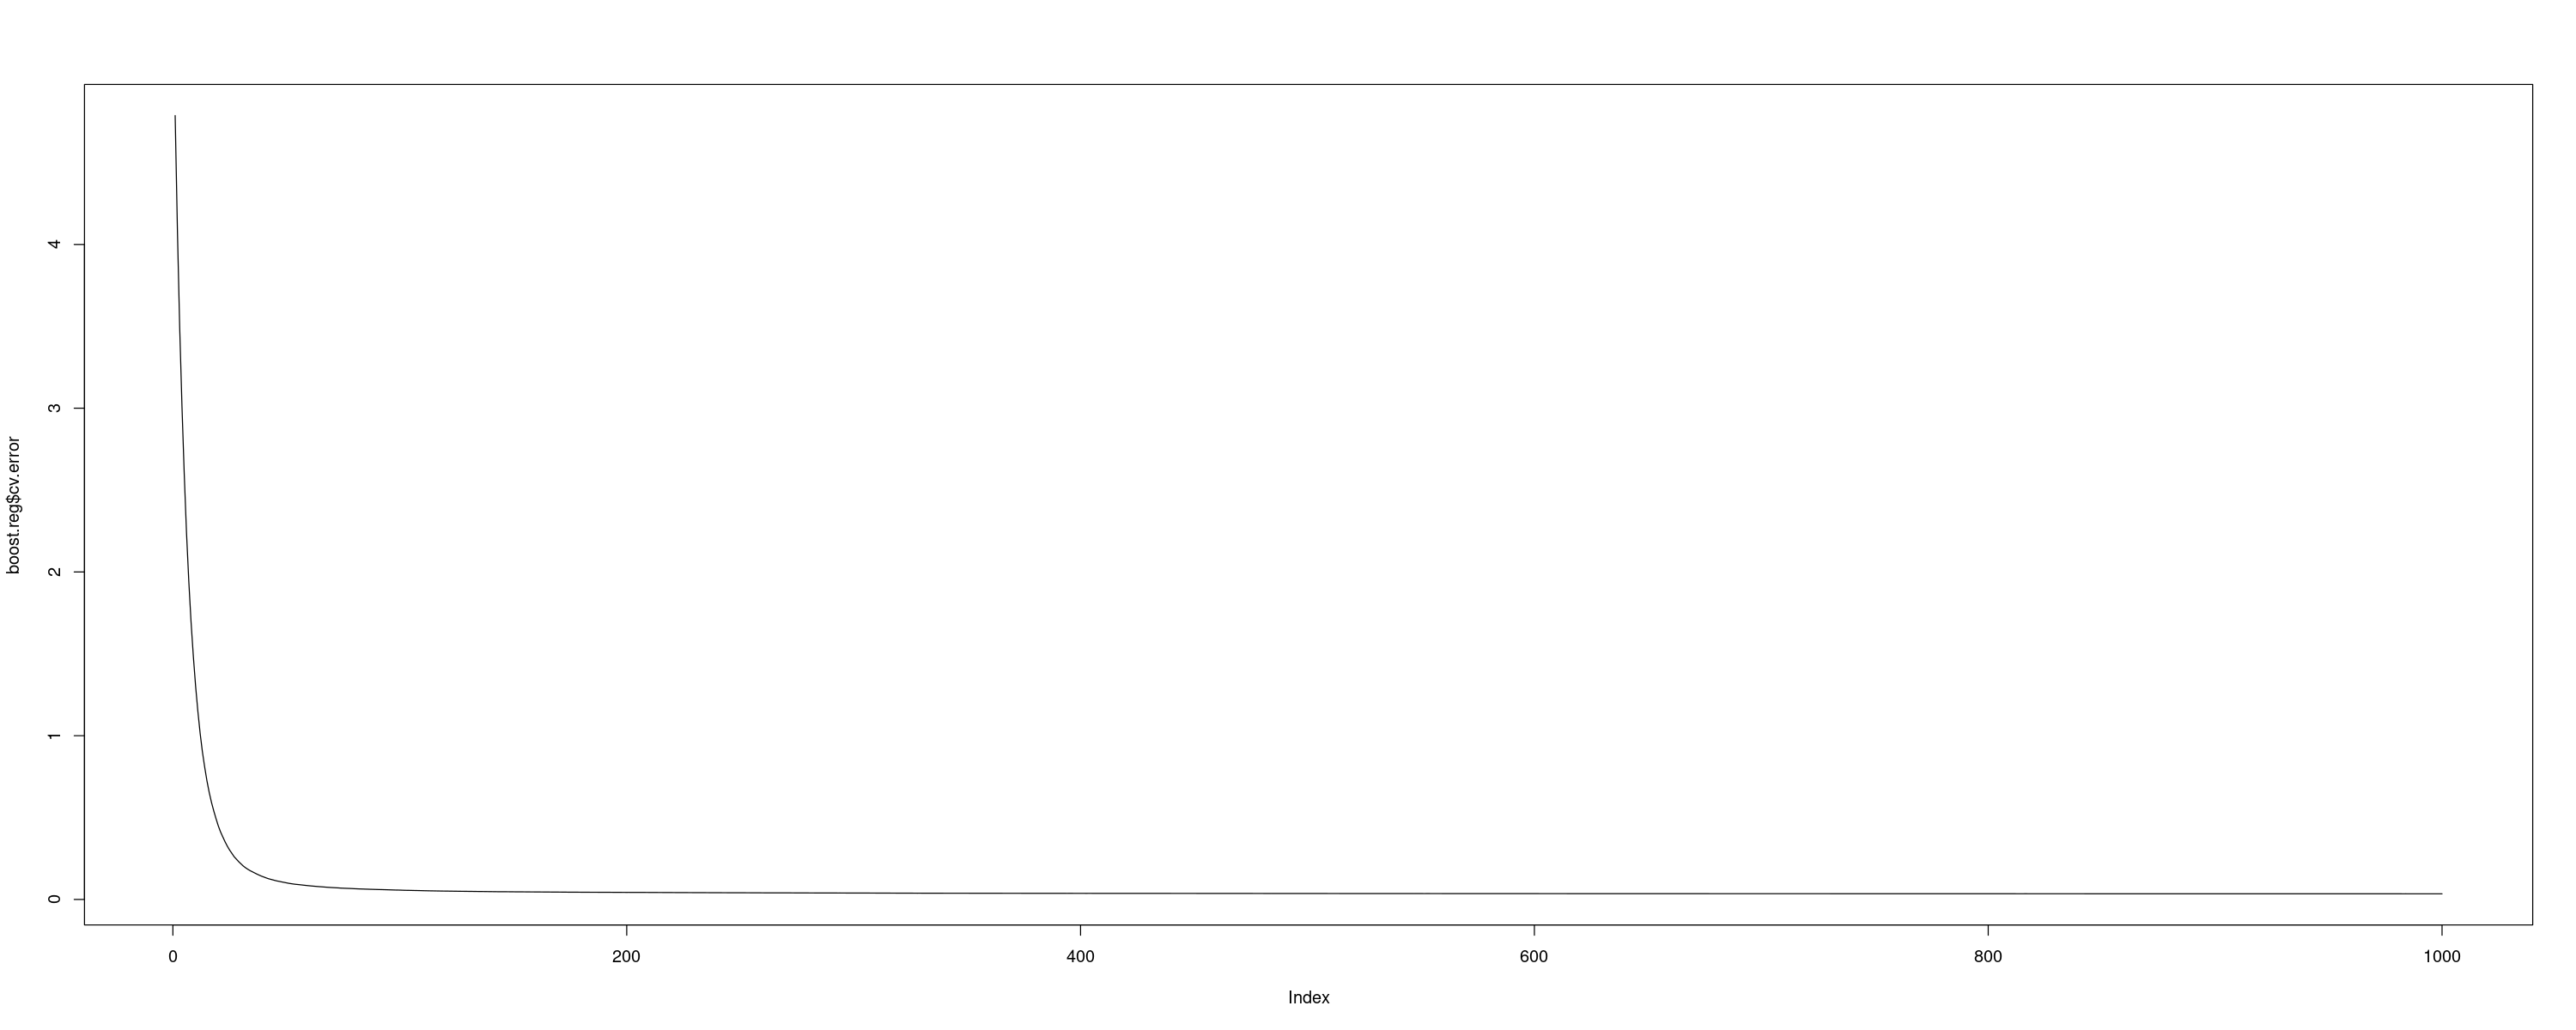

In [108]:
boost.reg = gbm(SValue_co2 ~ ., data = datappr, distribution = "gaussian", n.trees = model$bestTune$n.trees, 
    cv.folds = 10,interaction.depth = model$bestTune$interaction.depth, n.minobsinnode = model$bestTune$n.minobsinnode, shrinkage = model$bestTune$shrinkage, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

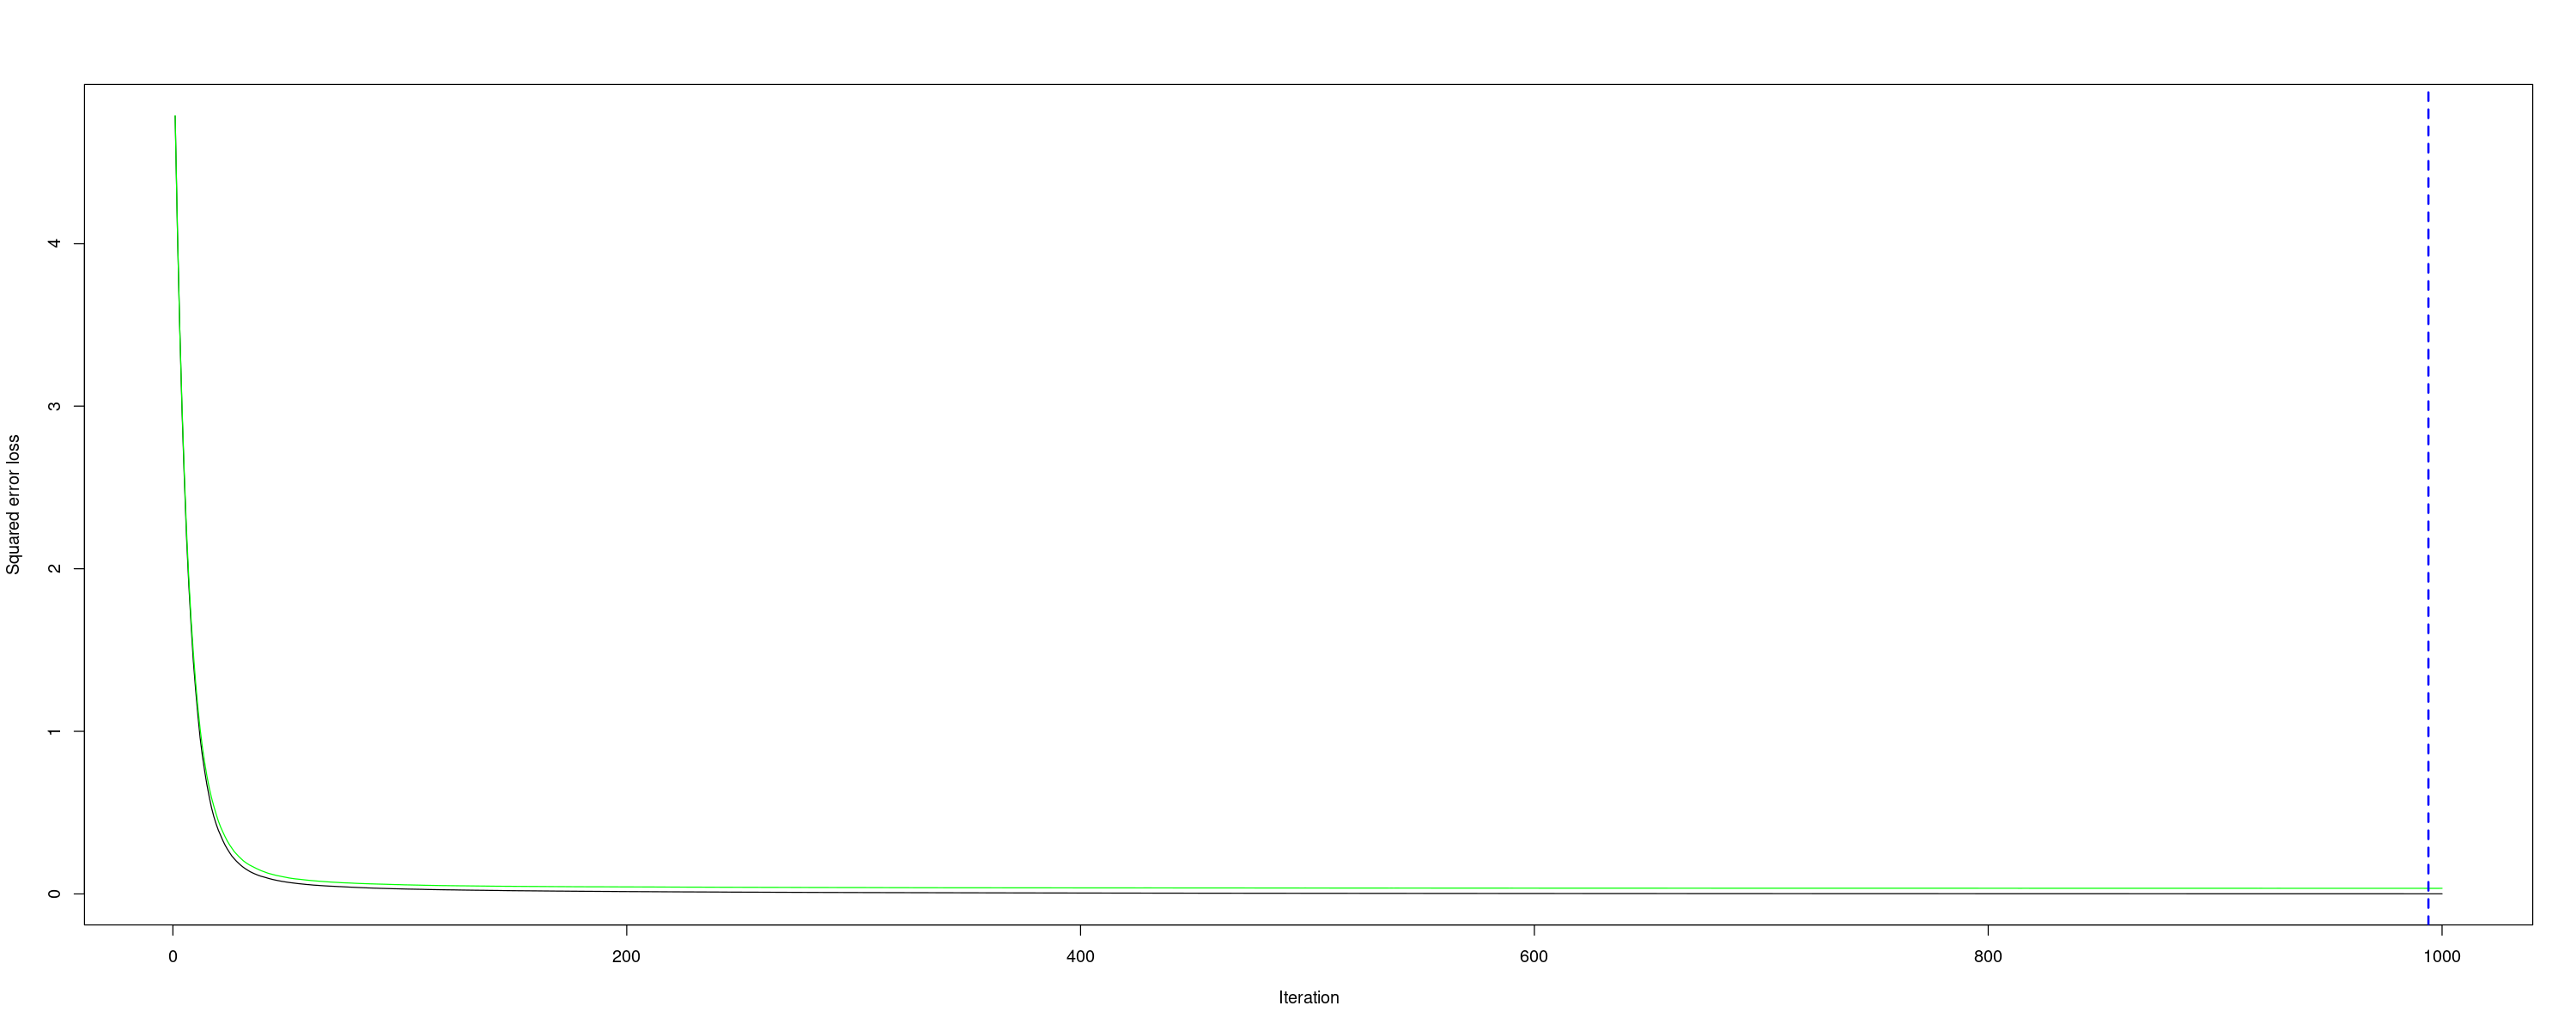

In [109]:
best.iter=gbm.perf(boost.reg,method="cv")

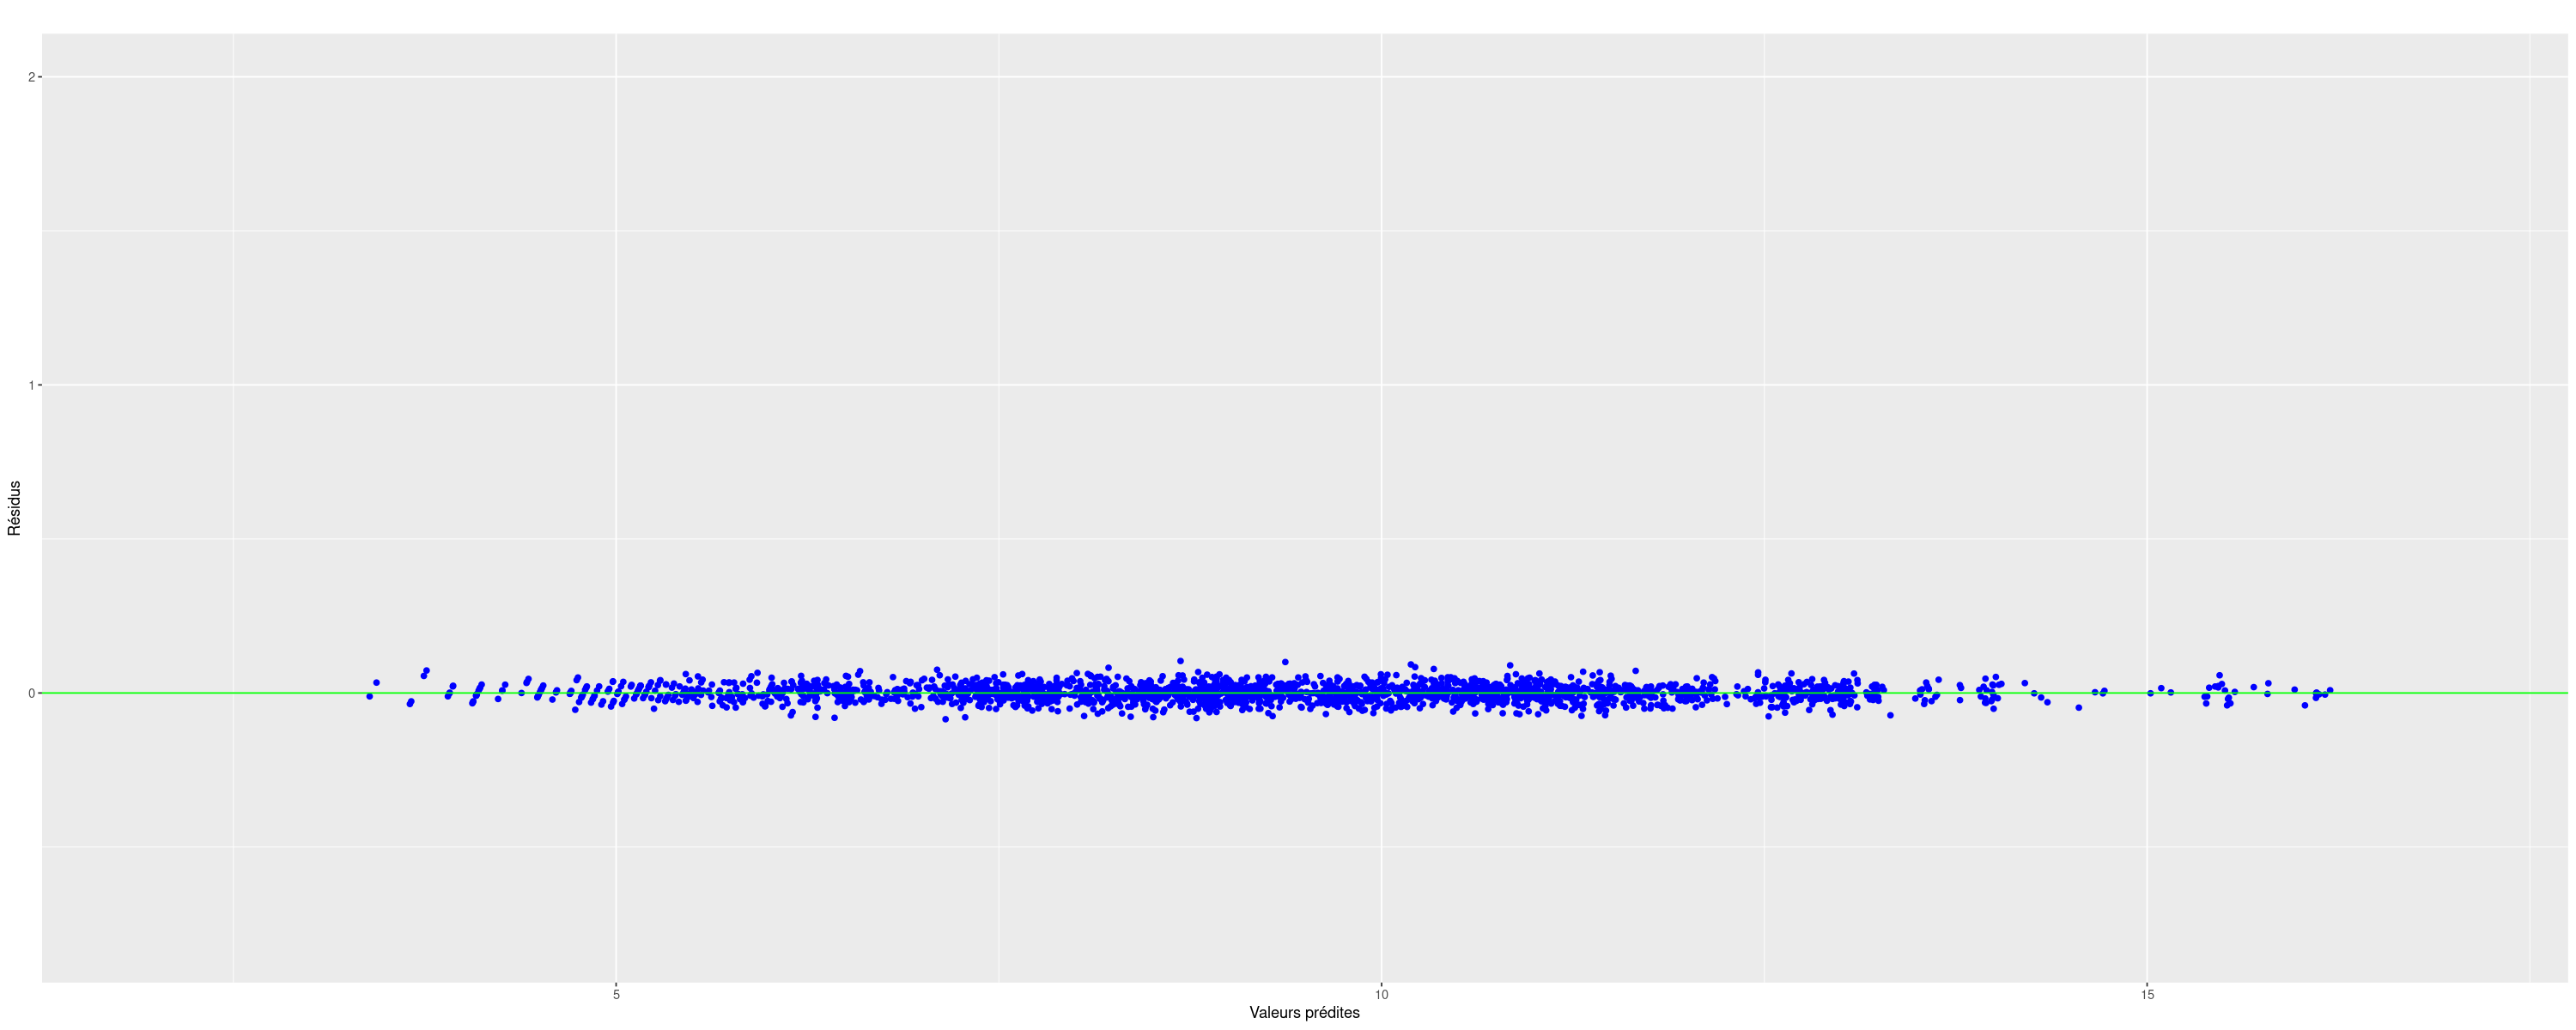

In [110]:
fit.boo=boost.reg$fit
res.boo=fit.boo-datappr[,"SValue_co2"]
gplot.res(fit.boo,res.boo,titre="")

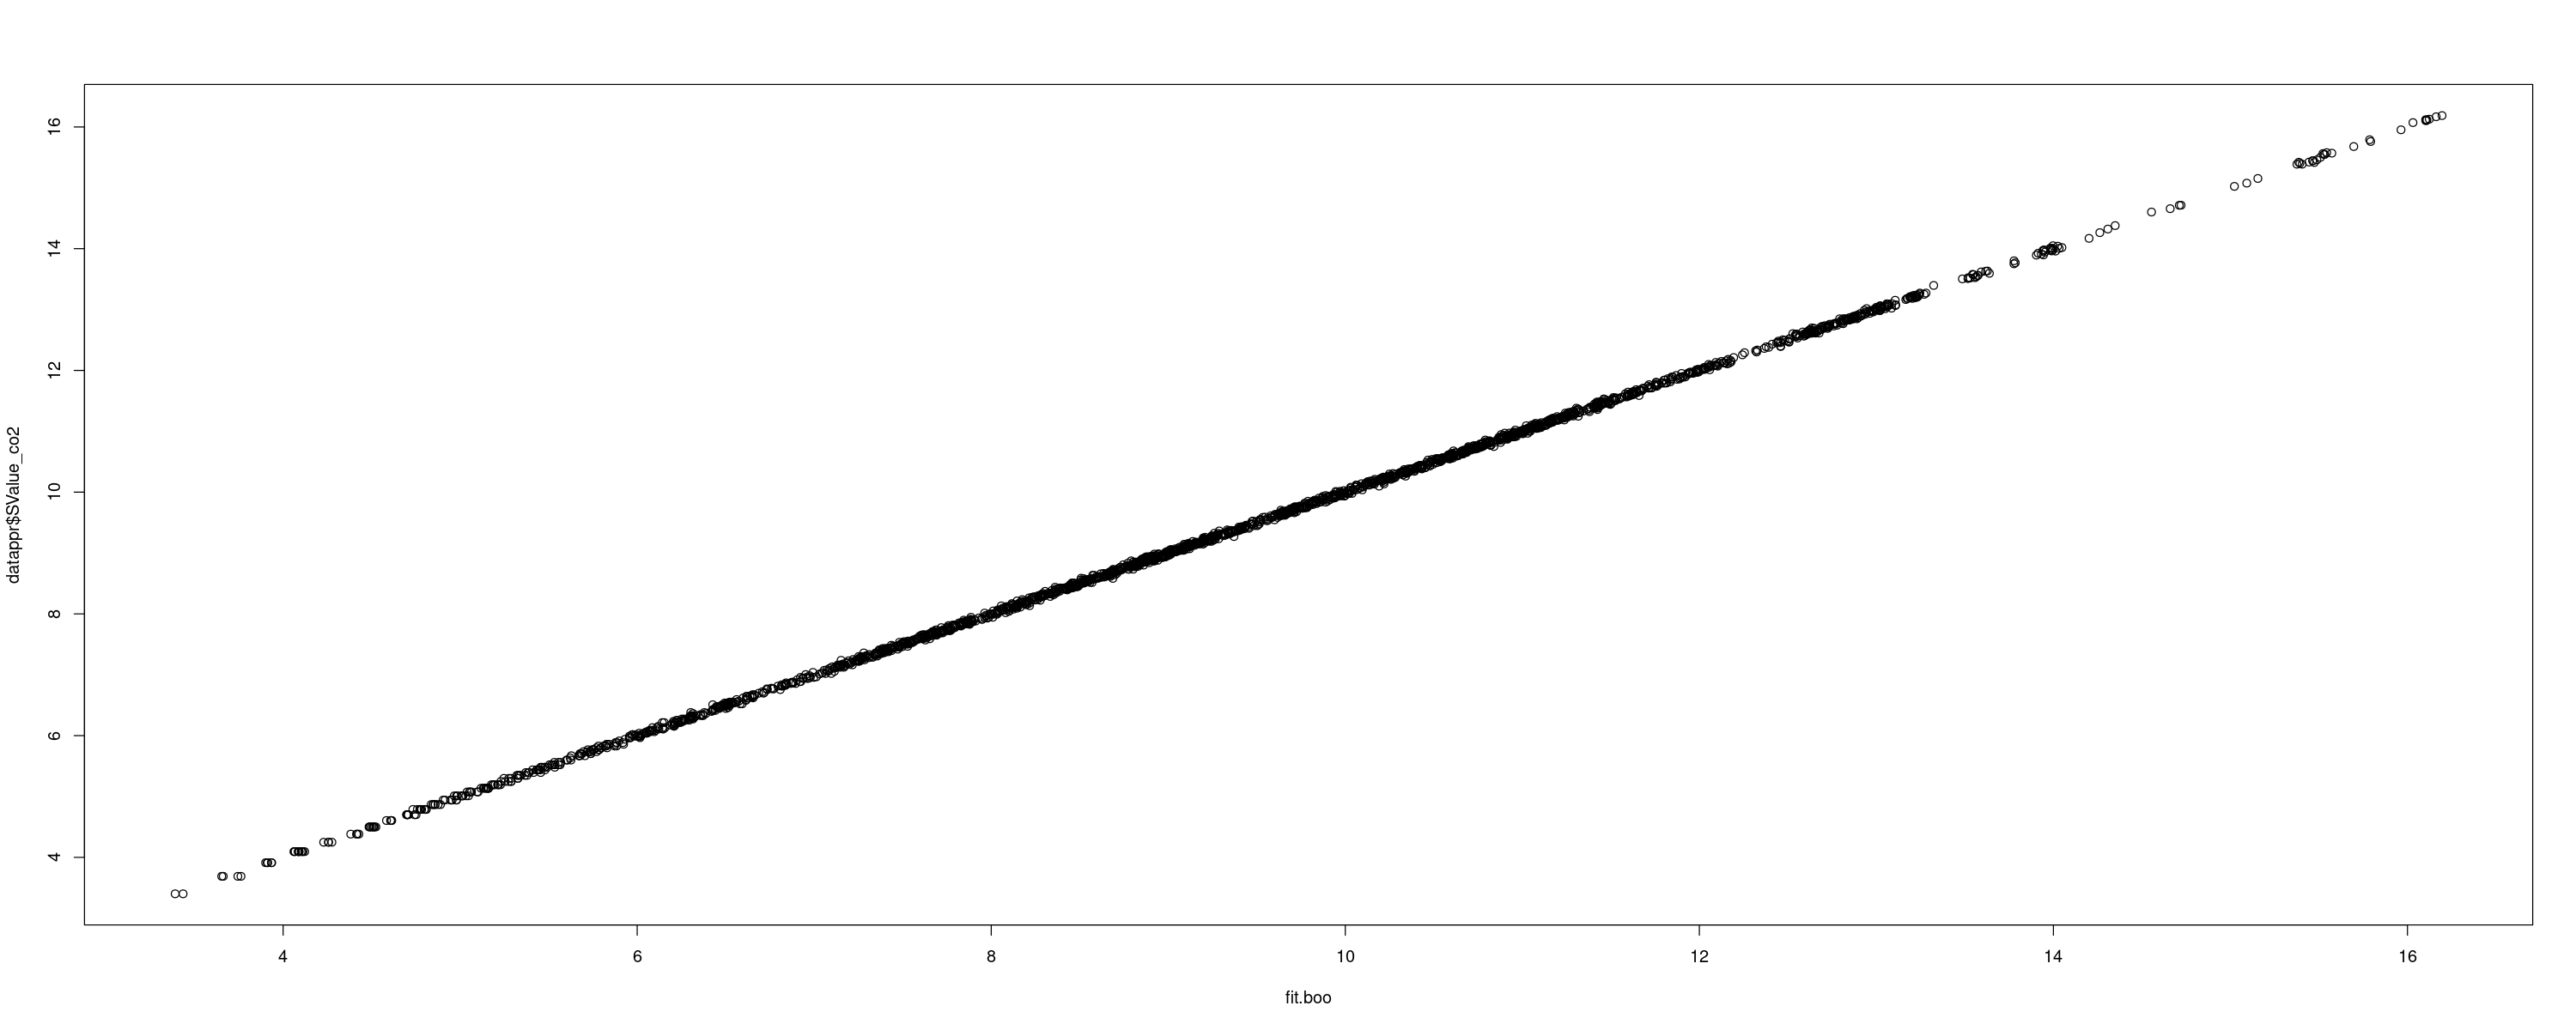

In [111]:
plot(fit.boo,datappr$SValue_co2)

var               rel.inf   
SElec_renew       SElec_renew       27.3981964
SElec_nuclear     SElec_nuclear     18.3006693
SLand_area        SLand_area        13.3753658
SLow_carbon       SLow_carbon        9.5669863
Latitude          Latitude           9.1660788
SRenewable_energy SRenewable_energy  7.0592963
SPrimary_energy   SPrimary_energy    3.4972806
Sgdp_capita       Sgdp_capita        3.1335678
SDensity          SDensity           2.9139402
SAccess_elec      SAccess_elec       2.9120543
Longitude         Longitude          0.9969664
SAccess_fuels     SAccess_fuels      0.7933995
Year              Year               0.4753561
SEnergy_intensity SEnergy_intensity  0.2849275
gdp_growth        gdp_growth         0.1259149

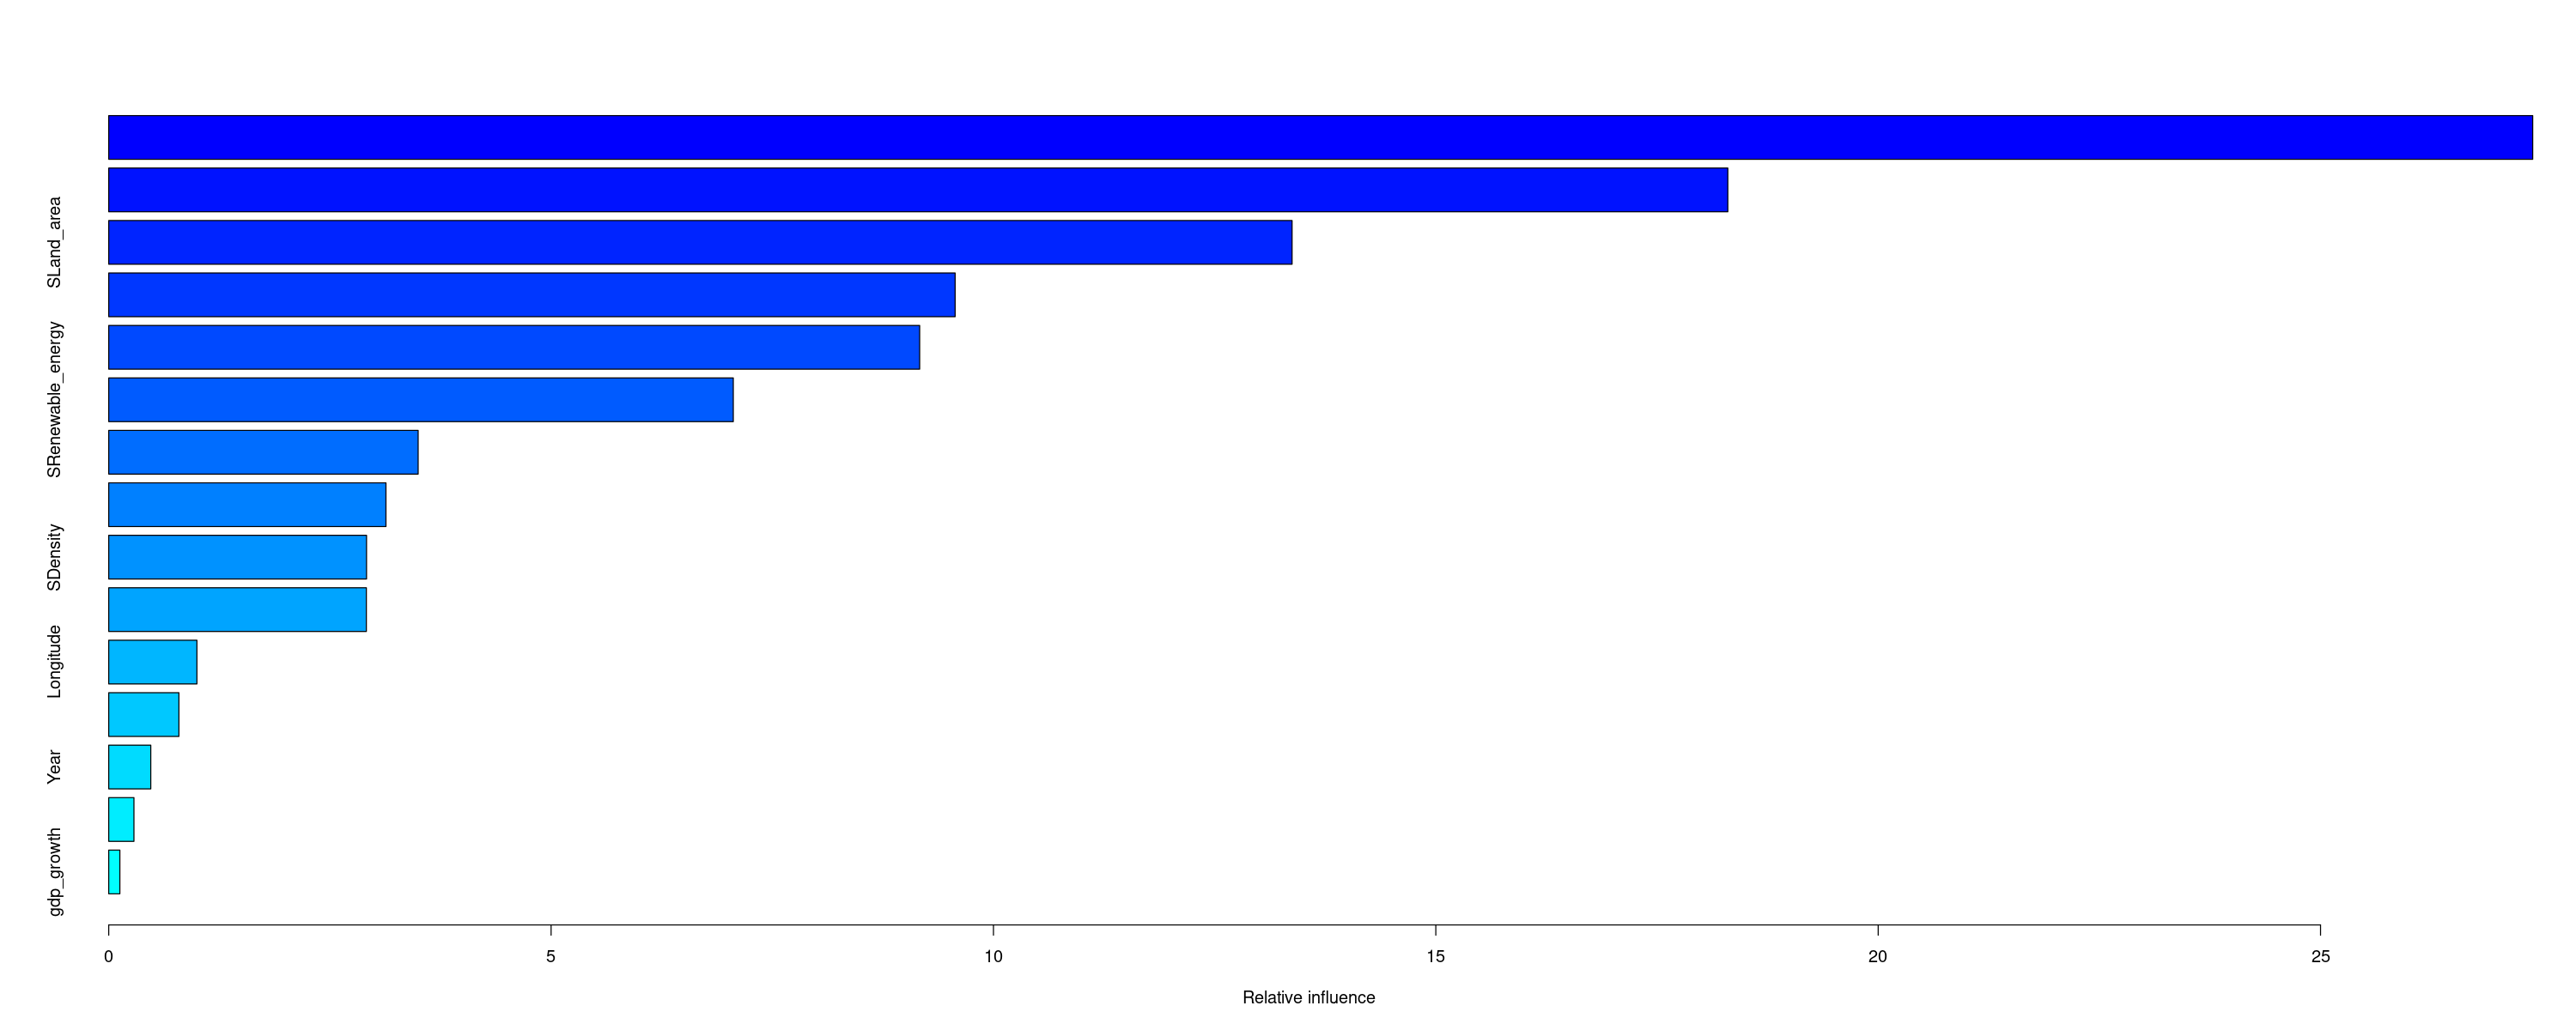

In [112]:
summary.gbm(boost.reg)

In [113]:
# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.boo)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_boo <- 1 - (SS_Residual / SS_Total)

paste("R2 =", R2_boo)

[1] "R2 = 0.999874710360546"

### Les Réseaux de Neurones

In [114]:
nnet.reg=nnet(SValue_co2~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=500,verbose = FALSE) 

# weights:  181
initial  value 174872.069208 
iter  10 value 9830.357133
iter  20 value 8245.602228
iter  30 value 7479.059784
iter  40 value 6833.952109
iter  50 value 6659.667985
iter  60 value 6412.432810
iter  70 value 5994.552544
iter  80 value 5874.499160
iter  90 value 5756.970918
iter 100 value 5349.863669
iter 110 value 3991.831819
iter 120 value 3081.739501
iter 130 value 2852.039057
iter 140 value 2642.952264
iter 150 value 2427.055062
iter 160 value 2089.595065
iter 170 value 1762.300681
iter 180 value 1407.806738
iter 190 value 1140.073002
iter 200 value 1025.476730
iter 210 value 933.304600
iter 220 value 842.527417
iter 230 value 776.223454
iter 240 value 733.612193
iter 250 value 665.393090
iter 260 value 574.528189
iter 270 value 534.678528
iter 280 value 507.812967
iter 290 value 494.860909
iter 300 value 483.264746
iter 310 value 467.603318
iter 320 value 457.587980
iter 330 value 452.321671
iter 340 value 445.668161
iter 350 value 434.576204
iter 360 value 424.06116

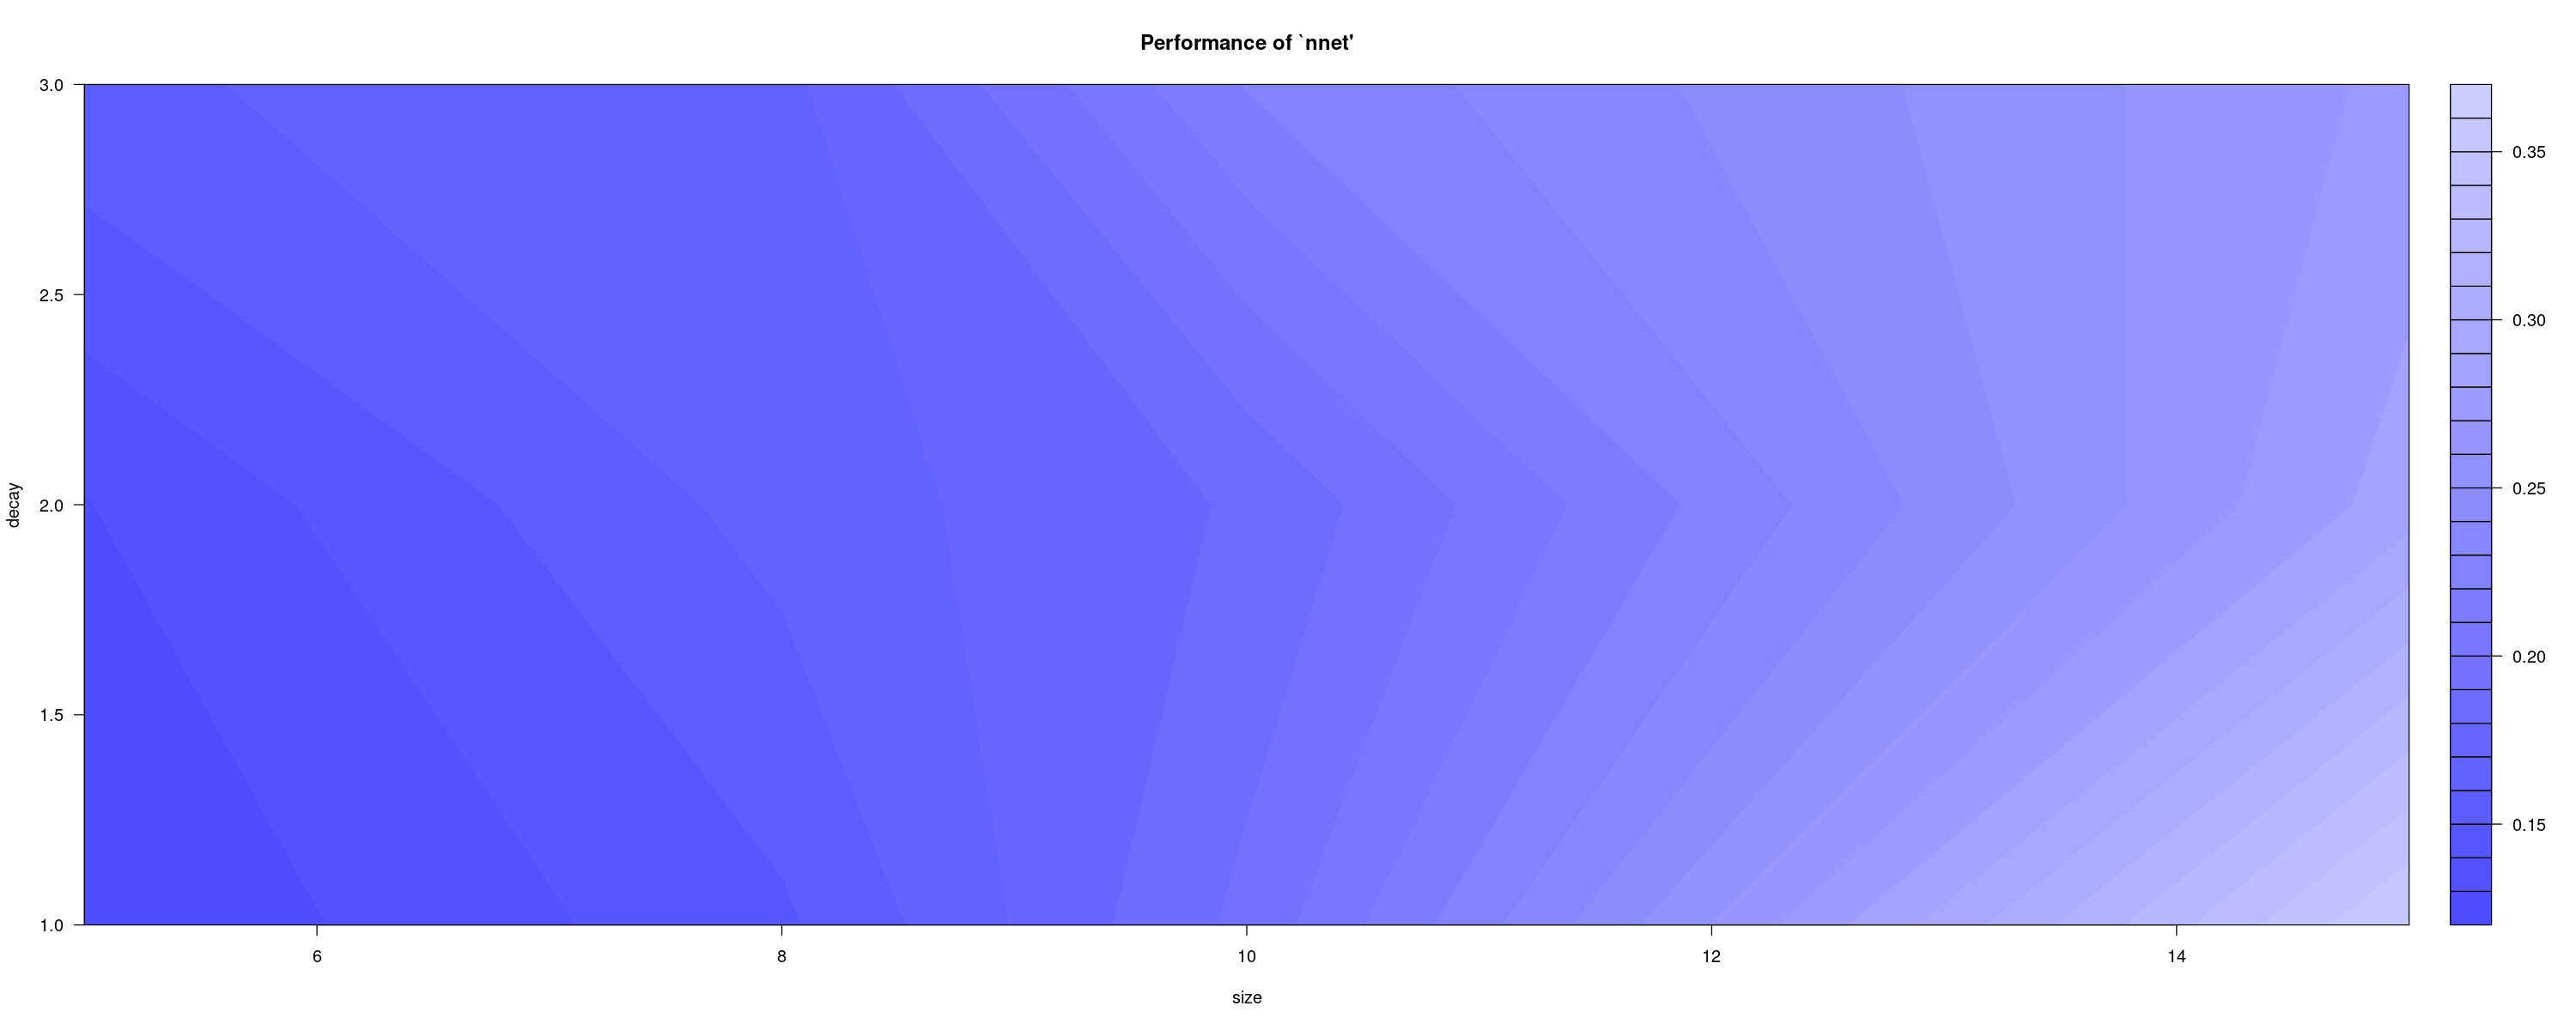

In [115]:
plot(tune.nnet(SValue_co2~.,data=datappr,size=c(5,8,10,15),decay=c(1,2,3),maxit=200,linout=TRUE))

# weights:  109
initial  value 226930.932262 
iter  10 value 16010.283383
iter  20 value 14398.312036
iter  30 value 13053.365745
iter  40 value 11673.558785
iter  50 value 9999.179556
iter  60 value 8106.766474
iter  70 value 6216.372727
iter  80 value 4406.394738
iter  90 value 3120.101309
iter 100 value 2480.022261
iter 110 value 2098.400931
iter 120 value 1780.176619
iter 130 value 1496.154130
iter 140 value 1309.472629
iter 150 value 1131.415136
iter 160 value 1016.531826
iter 170 value 965.141849
iter 180 value 937.218177
iter 190 value 858.798082
iter 200 value 846.039095
final  value 846.039095 
stopped after 200 iterations


Warning message:
“Removed 52 rows containing missing values (`geom_point()`).”


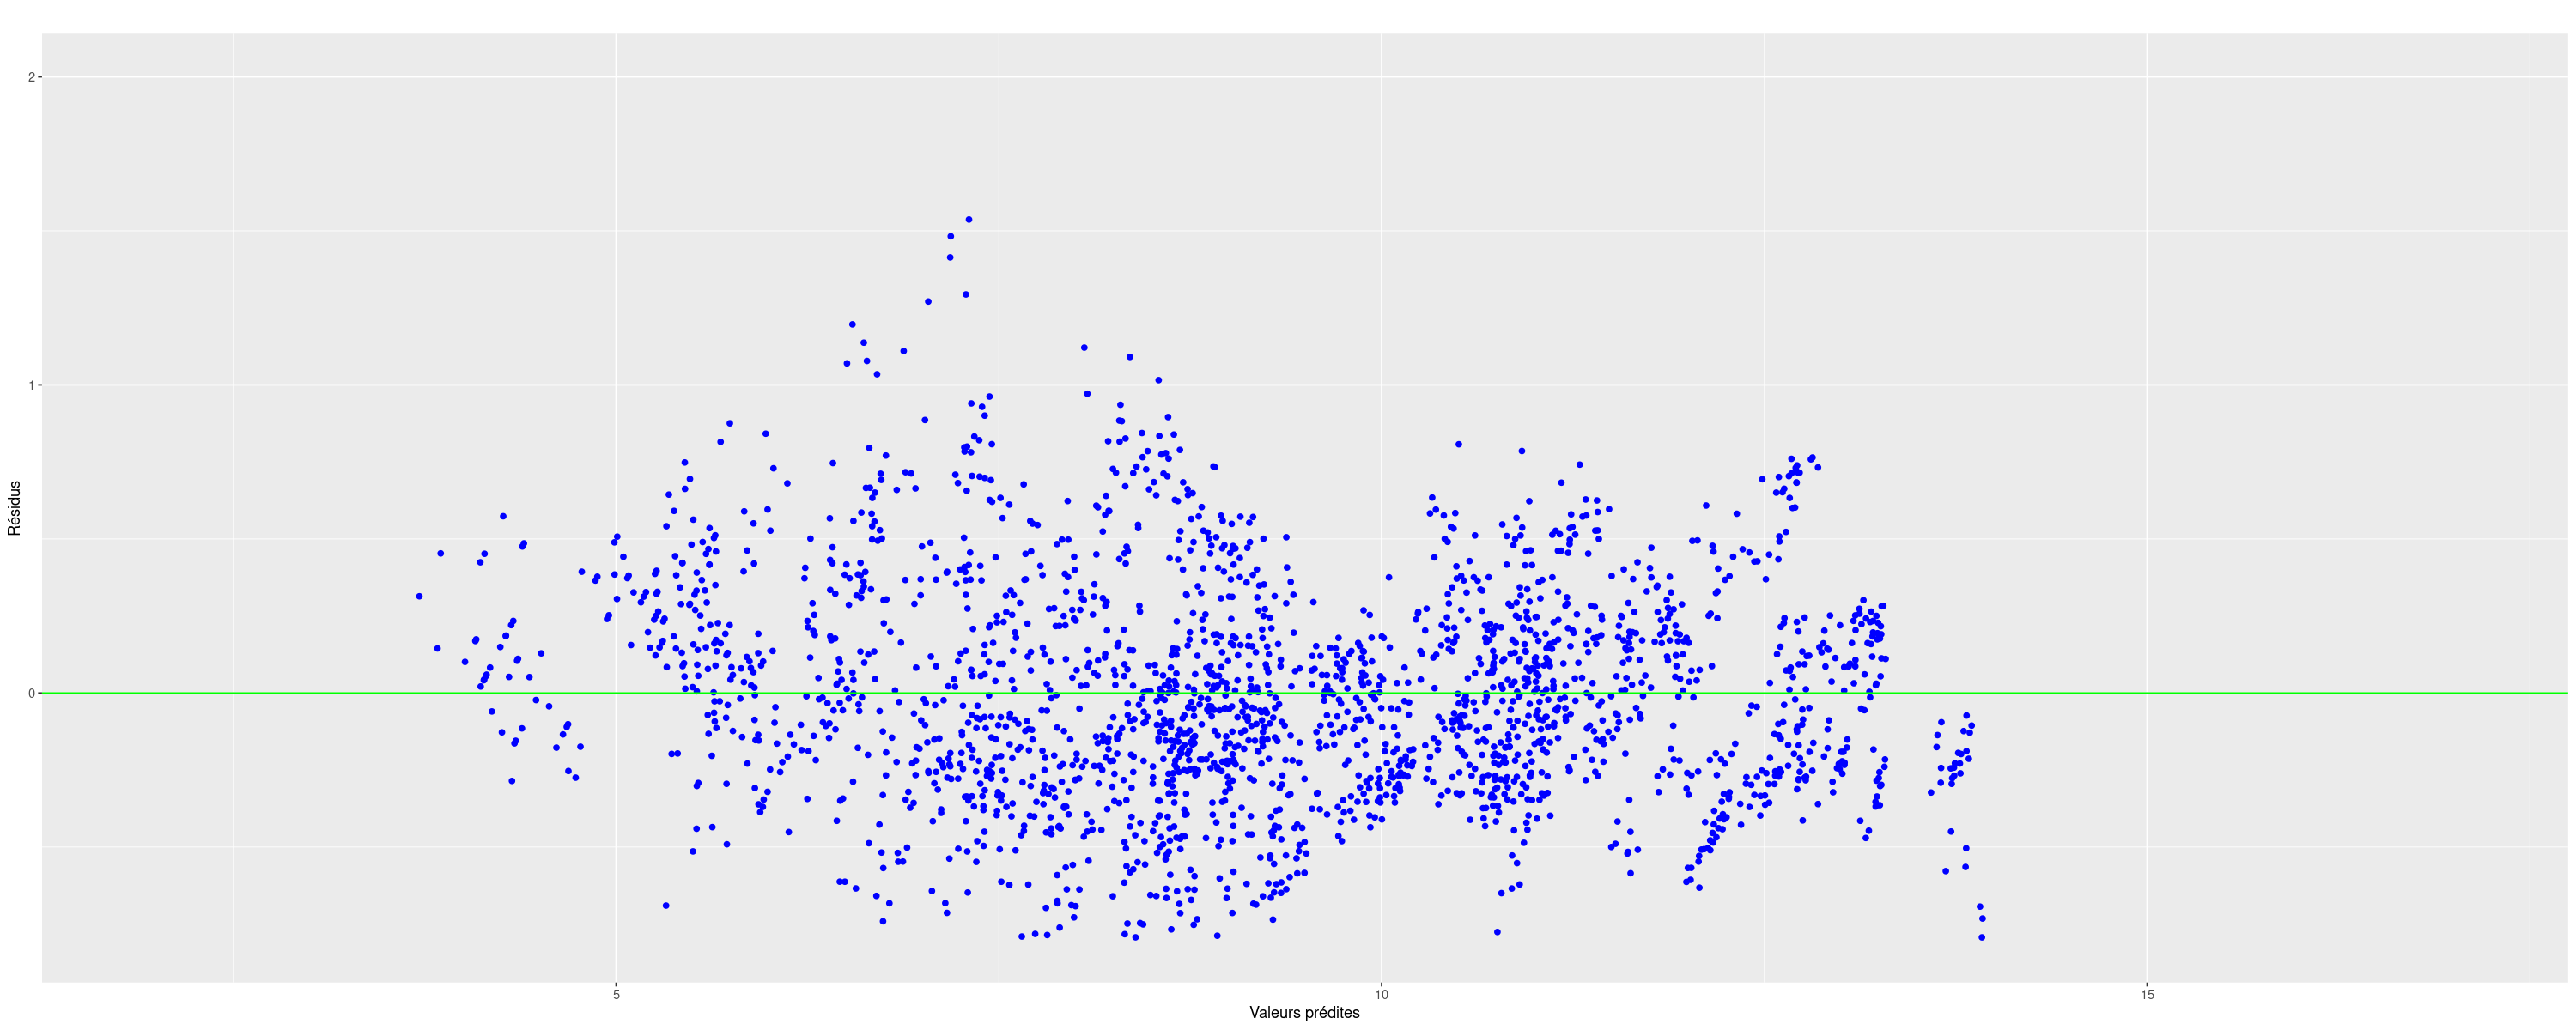

In [116]:
nnet.reg=nnet(SValue_co2~.,data=datappr,size=3,decay=2,linout=TRUE,maxit=200)
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"SValue_co2"]
gplot.res(fit.nnetr,res.nnetr,titre="")

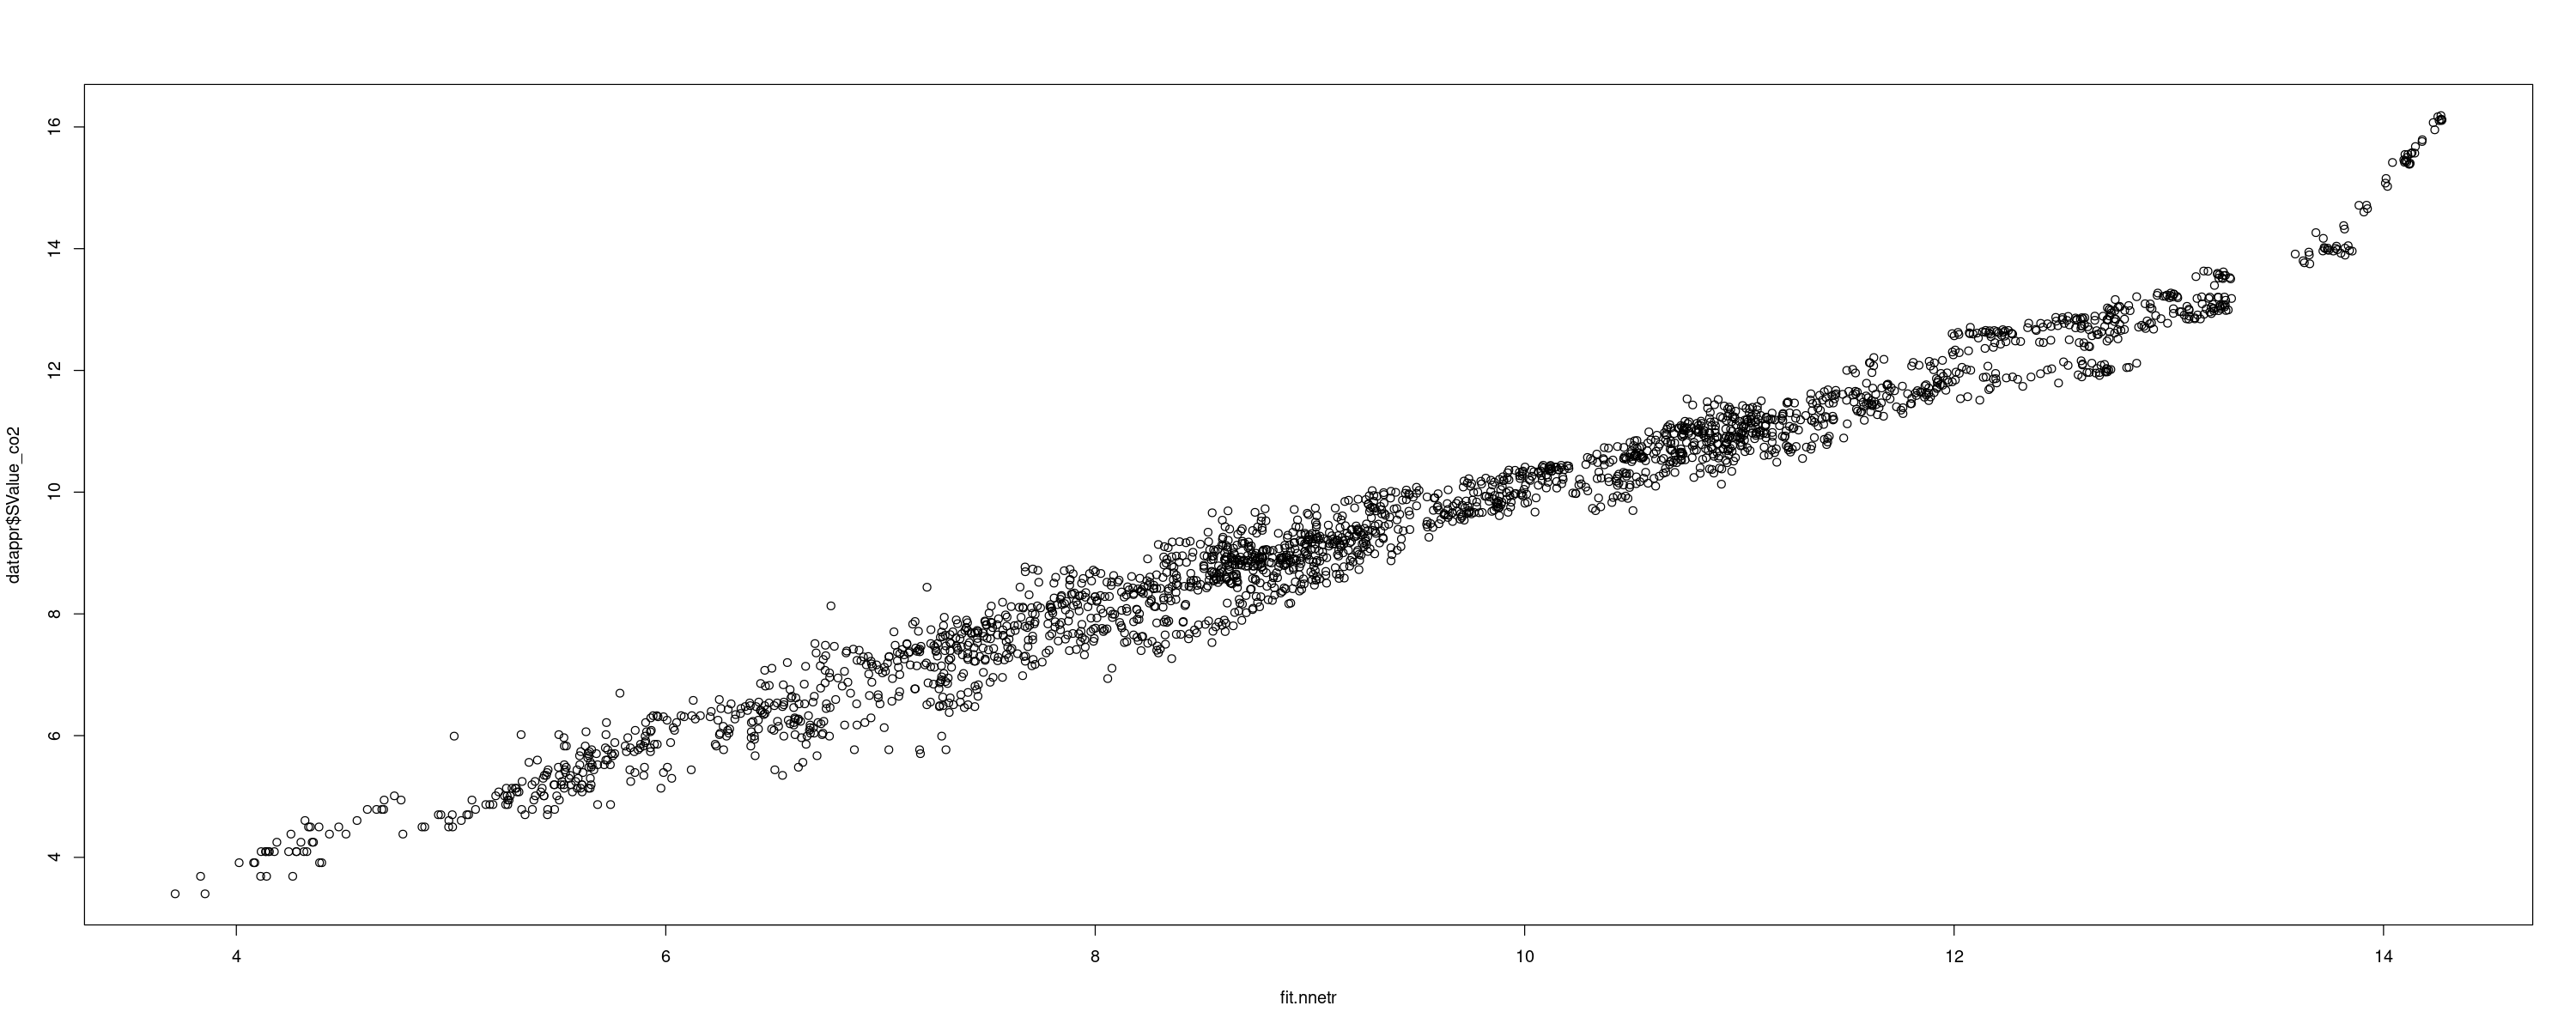

In [117]:
plot(fit.nnetr,datappr$SValue_co2)

In [118]:
# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.nnetr)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2_nn <- 1 - (SS_Residual / SS_Total)

paste("R2 =", R2_nn)

[1] "R2 = 0.971659703416272"

## Question 3 : comparaison de différentes méthodes de prévision sur l'échantillon test

In [121]:
pred.rl=predict(reg.lm,newdata=datestr)
pred.bic=predict(reg.glm,newdata=datestr)

x.matest <- model.matrix(SValue_co2 ~ .-1, data = datestr)
pred.lse=predict(reg.lasso.cv,s = "lambda.1se", newx = x.matest)
pred.svm=predict(svm.reg,newdata=datestr)
pred.a=predict(tree.reg,newdata=datestr)
pred.rf=predict(rf.reg,newdata=datestr)
pred.boo=predict(boost.reg,newdata=datestr)
pred.nn=predict(nnet.reg,newdata=datestr)

#Calcul de nos MSE pour les différents méthodes 

MSE_rl = MSE(pred.rl,datestr[,16])
MSE_bic = MSE(pred.bic,datestr[,16])
MSE_lse = MSE(pred.lse,datestr[,16])
MSE_svm = MSE(pred.svm,datestr[,16])
MSE_a = MSE(pred.a,datestr[,16])
MSE_rf = MSE(pred.rf,datestr[,16])
MSE_boo = MSE(pred.boo,datestr[,16])
MSE_nn = MSE(pred.nn,datestr[,16])

prec_rl = 100*(1-MSE_rl/var(datestr[,16]))
prec_bic = 100*(1-MSE_bic/var(datestr[,16]))
prec_lse = 100*(1-MSE_lse/var(datestr[,16]))
prec_svm = 100*(1-MSE_svm/var(datestr[,16]))
prec_a = 100*(1-MSE_a/var(datestr[,16]))
prec_rf = 100*(1-MSE_rf/var(datestr[,16]))
prec_boo = 100*(1-MSE_boo/var(datestr[,16]))
prec_nn = 100*(1-MSE_nn/var(datestr[,16]))

Using 994 trees...




In [122]:
Perf <- data.frame(
  Methode = c("RegLig", "AIC", "LASSO", "SVM", "Arbre","Forêt Aléatoire","Boosting","Neural Network"),
  MSE = c(MSE_rl,MSE_bic,MSE_lse,MSE_svm,MSE_a,MSE_rf,MSE_boo,MSE_nn),
  R2 = c(prec_rl,prec_bic,prec_lse,prec_svm,prec_a,prec_rf,prec_boo,prec_nn)
)

Perf

Methode         MSE        R2      
1 RegLig          0.03998470 99.32432
2 AIC             0.10719651 98.18855
3 LASSO           0.11376272 98.07759
4 SVM             0.07414822 98.74701
5 Arbre           1.38759603 76.55185
6 Forêt Aléatoire 0.04022514 99.32026
7 Boosting        0.03218715 99.45609
8 Neural Network  0.17295057 97.07741

## Question 4 : Retour sur l'analyse exploratoire

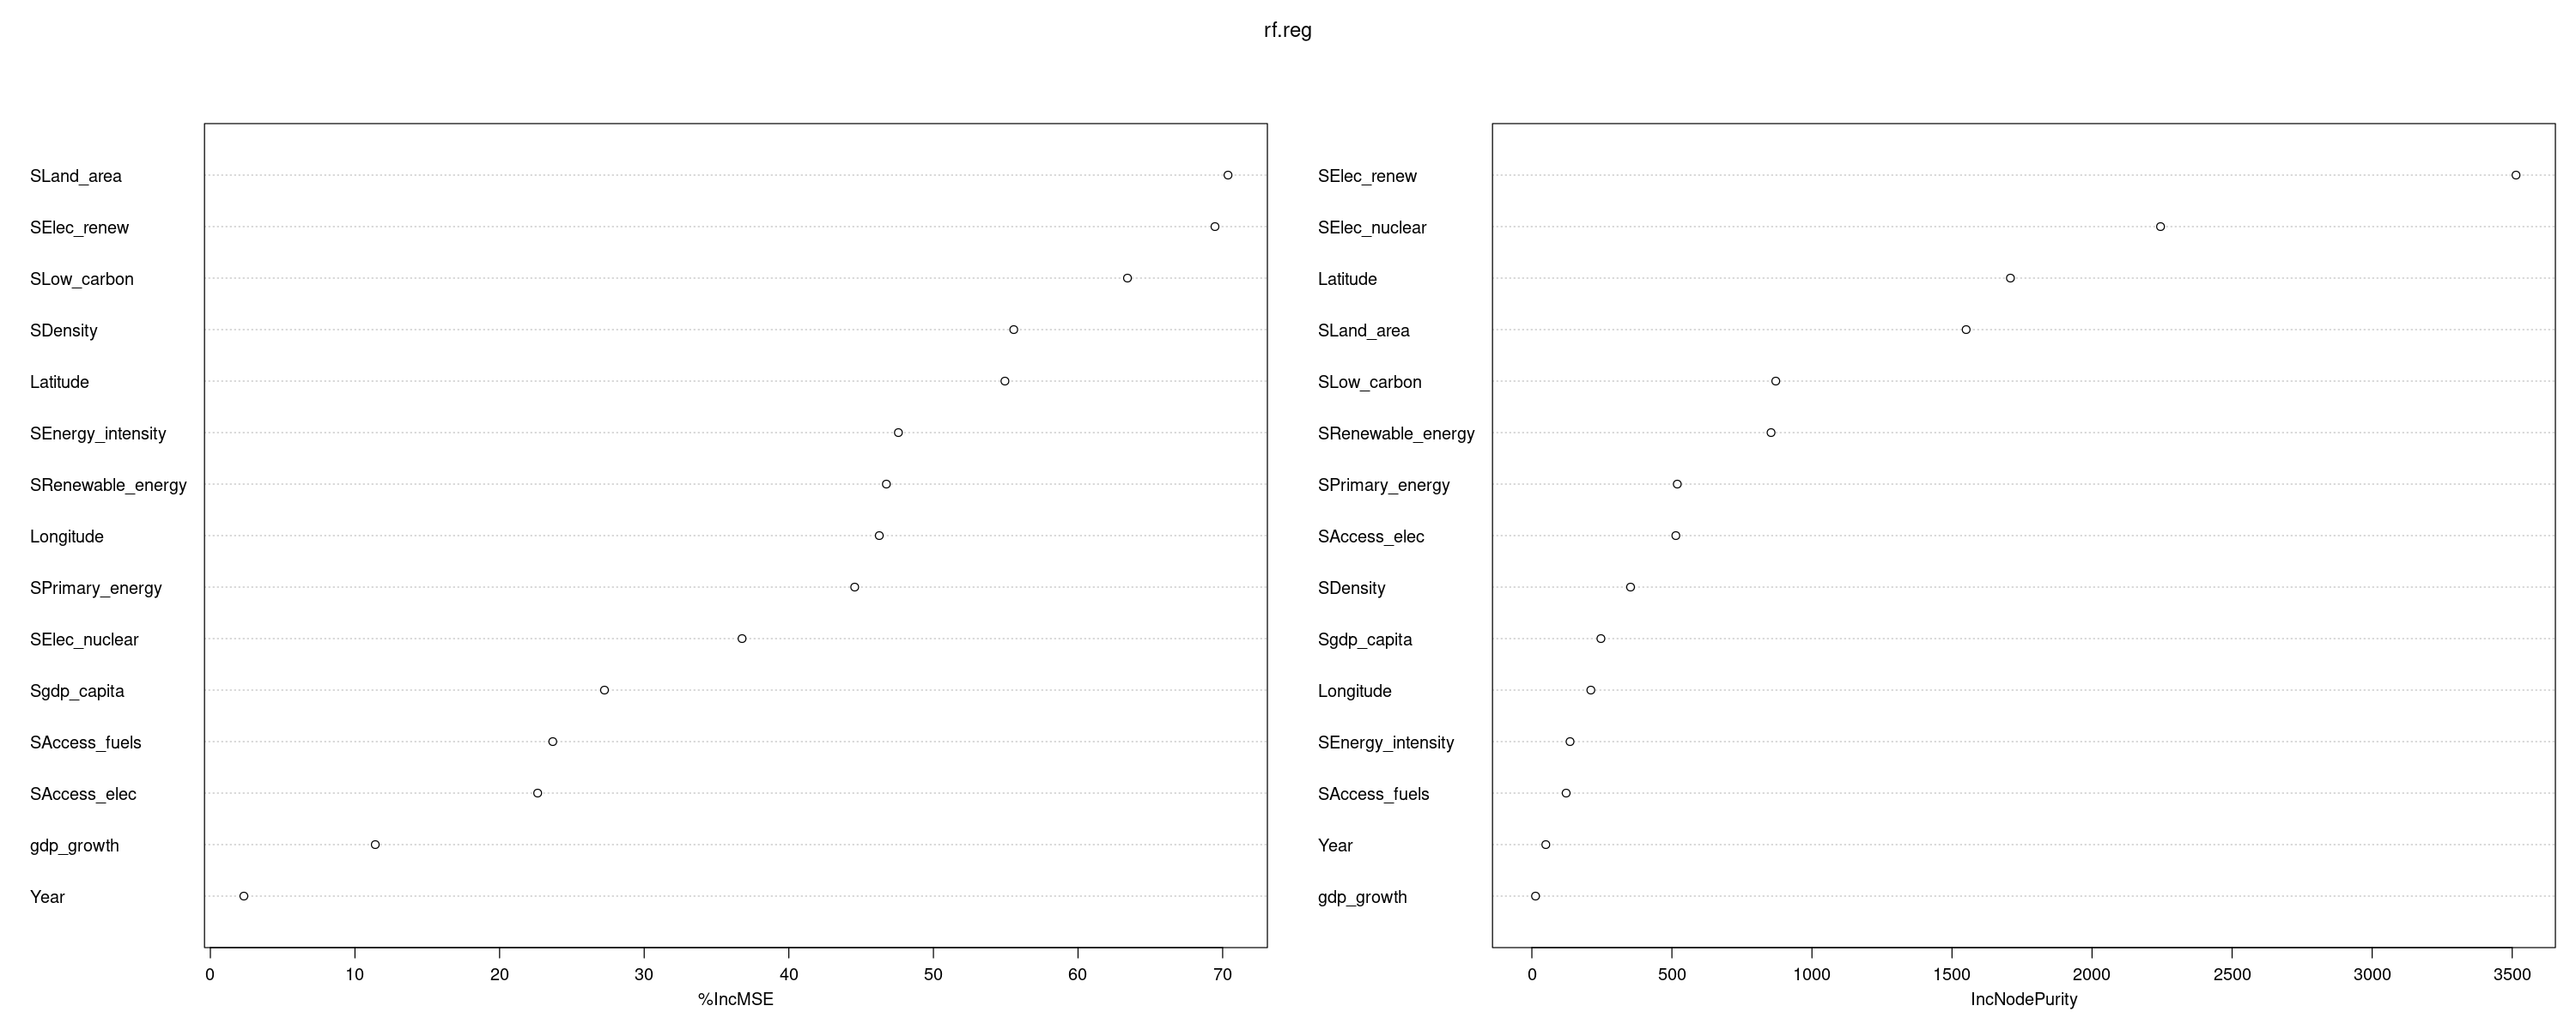

In [123]:
varImpPlot(rf.reg)

var               rel.inf   
SElec_renew       SElec_renew       27.3981964
SElec_nuclear     SElec_nuclear     18.3006693
SLand_area        SLand_area        13.3753658
SLow_carbon       SLow_carbon        9.5669863
Latitude          Latitude           9.1660788
SRenewable_energy SRenewable_energy  7.0592963
SPrimary_energy   SPrimary_energy    3.4972806
Sgdp_capita       Sgdp_capita        3.1335678
SDensity          SDensity           2.9139402
SAccess_elec      SAccess_elec       2.9120543
Longitude         Longitude          0.9969664
SAccess_fuels     SAccess_fuels      0.7933995
Year              Year               0.4753561
SEnergy_intensity SEnergy_intensity  0.2849275
gdp_growth        gdp_growth         0.1259149

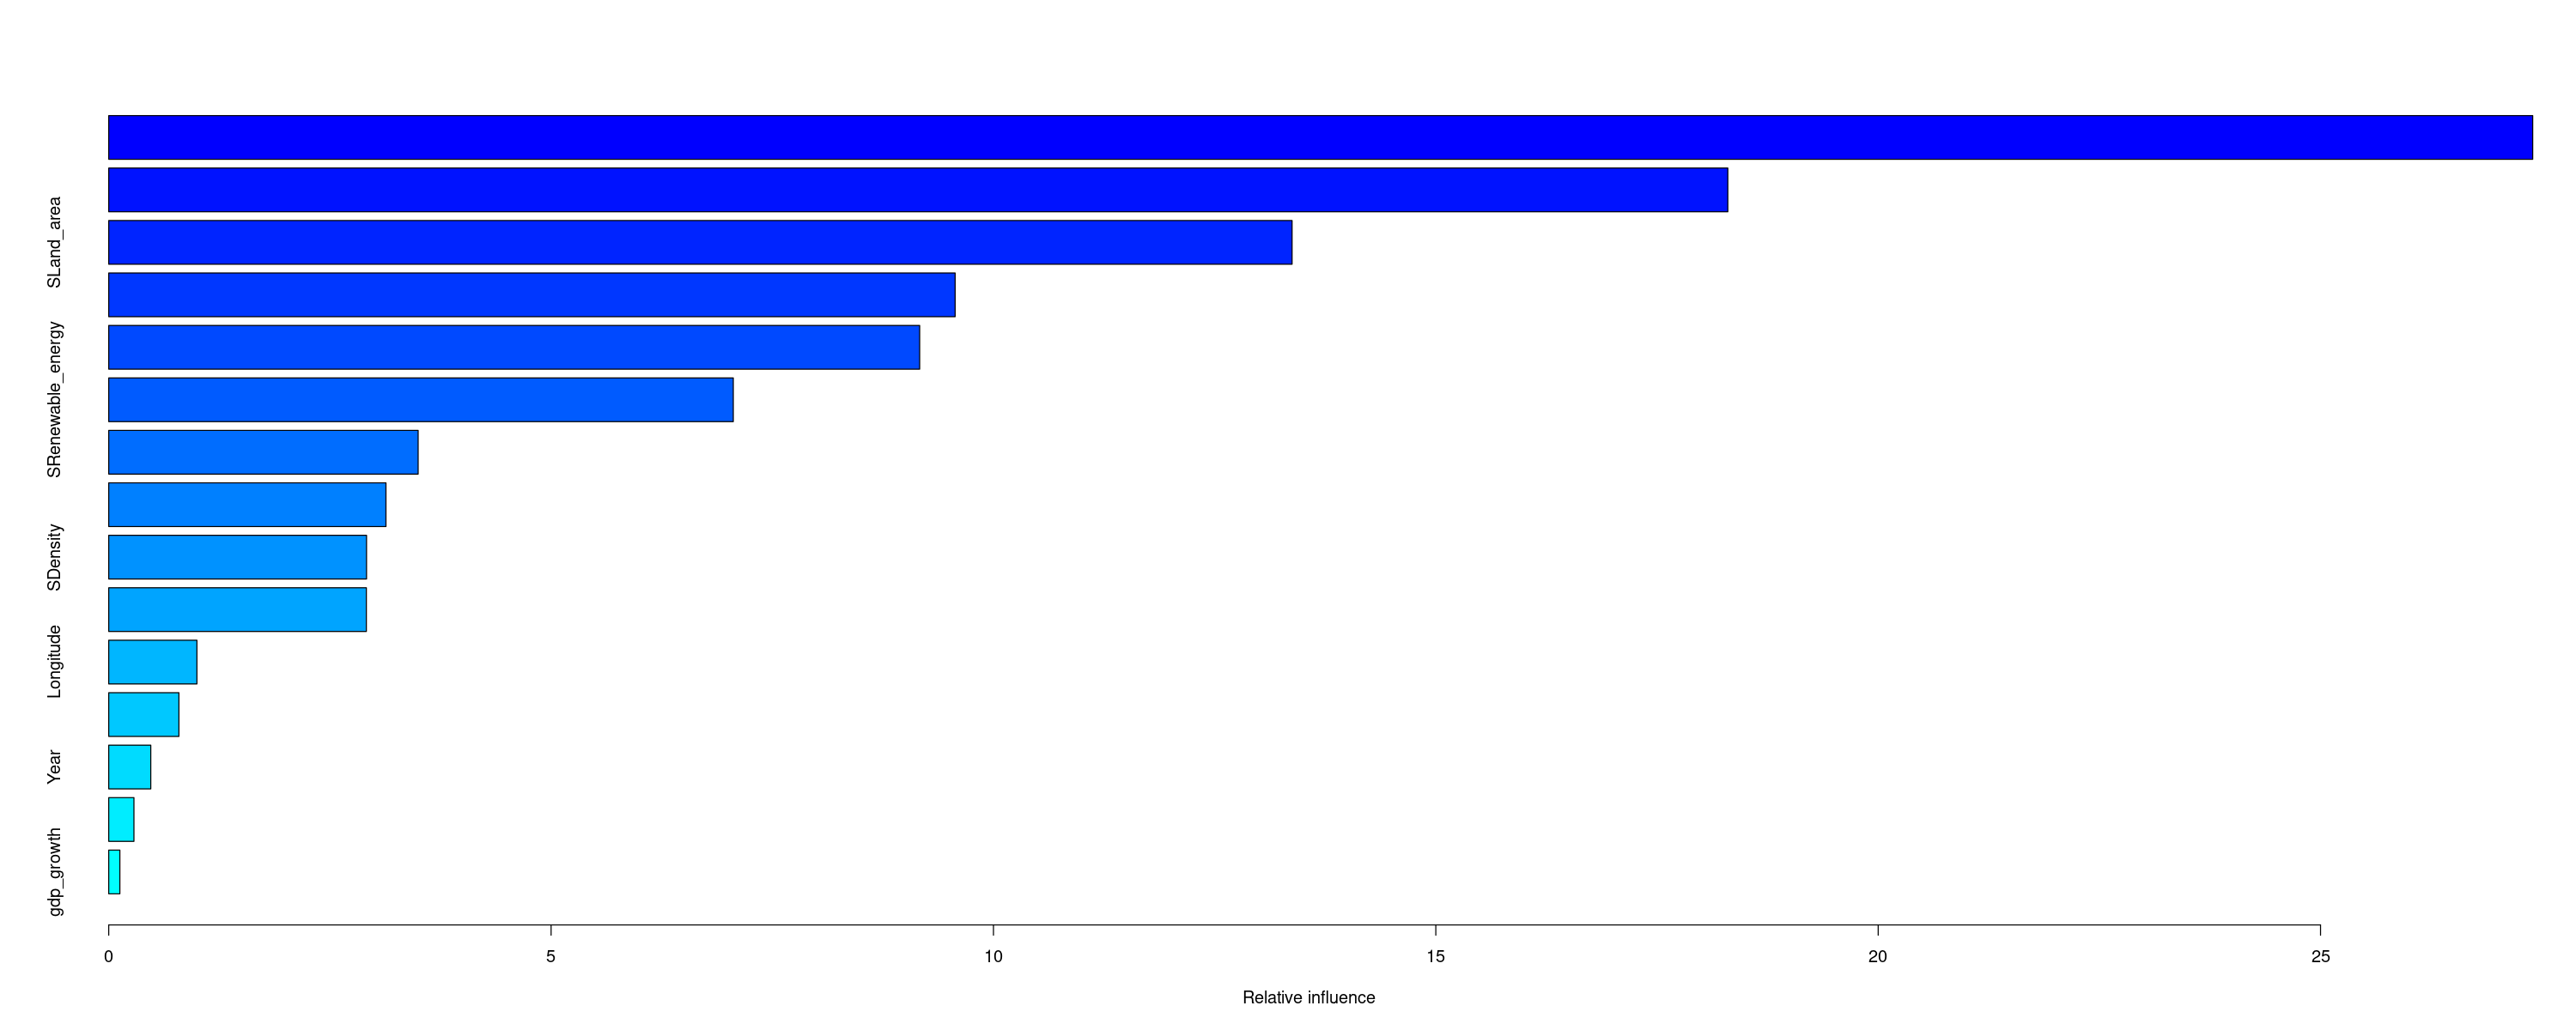

In [124]:
summary.gbm(boost.reg)

In [125]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.019"

36 x 1 sparse Matrix of class "dgCMatrix"
                             s1
(Intercept)       -1.359818e+01
Year2000           .           
Year2001           .           
Year2002           .           
Year2003           .           
Year2004           .           
Year2005           .           
Year2006           .           
Year2007           .           
Year2008           .           
Year2009           .           
Year2010           .           
Year2011           .           
Year2012           .           
Year2013           .           
Year2014           .           
Year2015           .           
Year2016           .           
Year2017           .           
Year2018           .           
Year2019           .           
Year2020           .           
gdp_growth        -1.871127e-04
Latitude           1.705864e-03
Longitude          .           
SAccess_elec       3.350167e-01
SAccess_fuels      5.272588e-02
SRenewable_energy -8.805590e-02
SElec_nuclear      1.318647e-0

In [126]:
summary(reg.glm.step)


Call:
glm(formula = SValue_co2 ~ gdp_growth + Latitude + SAccess_elec + 
    SAccess_fuels + SRenewable_energy + SElec_nuclear + SElec_renew + 
    SLow_carbon + SPrimary_energy + SEnergy_intensity + Sgdp_capita + 
    SDensity + SLand_area, data = datappr)

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.478e+01  1.714e-01 -86.204  < 2e-16 ***
gdp_growth        -4.580e-03  1.558e-03  -2.939 0.003325 ** 
Latitude           1.481e-03  3.224e-04   4.595 4.57e-06 ***
SAccess_elec       3.750e-01  1.910e-02  19.630  < 2e-16 ***
SAccess_fuels      8.563e-02  1.321e-02   6.484 1.09e-10 ***
SRenewable_energy -7.338e-02  5.675e-03 -12.930  < 2e-16 ***
SElec_nuclear      1.835e-02  7.204e-03   2.547 0.010943 *  
SElec_renew       -3.577e-02  9.532e-03  -3.753 0.000179 ***
SLow_carbon       -3.638e-02  3.053e-03 -11.916  < 2e-16 ***
SPrimary_energy    8.908e-01  3.431e-02  25.962  < 2e-16 ***
SEnergy_intensity  1.781e-01  1.943e-02   9.168  < 2e-1

## Question 5 : modélisation après une imputation des données manquantes

### Visualisation des données manquantes

In [127]:
energyna = energy_pt2

In [128]:
missing = data.frame(colSums(is.na(energyna)))
missing

colSums.is.na.energyna..
Entity             0                     
Year               0                     
Access_elec       10                     
Access_fuels     169                     
Renewable_energy 194                     
Elec_fossil       21                     
Elec_nuclear     126                     
Elec_renew        21                     
Low_carbon        42                     
Primary_energy     0                     
Energy_intensity 207                     
Value_co2        428                     
gdp_growth       317                     
gdp_capita       282                     
Density            1                     
Land_area          1                     
Latitude           1                     
Longitude          1

In [129]:
#On enlève Entity et Year
energynaQuant = energyna[,3:18]
#On enlève Electricity from fossil fuel
energynaQuant = energynaQuant[,-4]
head(energynaQuant)

Access_elec Access_fuels Renewable_energy Elec_nuclear Elec_renew Low_carbon
1  1.613591    6.2         44.99            0            0.31       65.95744  
2  4.074574    7.2         45.60            0            0.50       84.74577  
3  9.409158    8.2         37.83            0            0.56       81.15942  
4 14.738506    9.5         36.66            0            0.63       67.02128  
5 20.064968   10.9         44.24            0            0.56       62.92135  
6 25.390894   12.2         33.88            0            0.59       63.44086  
  Primary_energy Energy_intensity Value_co2 gdp_growth gdp_capita Density
1 302.5948       1.64              760             NA        NA   60     
2 236.8919       1.74              730             NA        NA   60     
3 210.8622       1.40             1030             NA  179.4266   60     
4 229.9682       1.40             1220       8.832278  190.6838   60     
5 204.2312       1.20             1030       1.414118  211.3821   60     
6 252.0691       1.41             1550      11.229715  242.0313   60     
  Land_area Latitude Longitude
1 652230    33.93911 67.70995 
2 652230    33.93911 67.70995 
3 652230    33.93911 67.70995 
4 652230    33.93911 67.70995 
5 652230    33.93911 67.70995 
6 652230    33.93911 67.70995

### Transformation des variables 

In [130]:
energynaQuant[, "SAccess_elec"] = log(energynaQuant[, "Access_elec"])
energynaQuant[, "SAccess_fuels"] = log(1+energynaQuant[, "Access_fuels"])
energynaQuant[, "SRenewable_energy"] = sqrt(energynaQuant[, "Renewable_energy"])
energynaQuant[, "SElec_nuclear"] = log(1+energynaQuant[, "Elec_nuclear"])
energynaQuant[, "SElec_renew"] = log(1+energynaQuant[, "Elec_renew"])
energynaQuant[, "SLow_carbon"] = sqrt(energynaQuant[, "Low_carbon"])
energynaQuant[, "SPrimary_energy"] = log(1+energynaQuant[, "Primary_energy"])
energynaQuant[, "SEnergy_intensity"] = log(sqrt(energynaQuant[, "Energy_intensity"]))
energynaQuant[, "Sgdp_capita"] = log(sqrt(energynaQuant[, "gdp_capita"]))
energynaQuant[, "SDensity"] = log(energynaQuant[, "Density"])
energynaQuant[, "SLand_area"] = log(energynaQuant[, "Land_area"])
energynaQuant[, "Svalue_co2"] = log(energynaQuant[, "Value_co2"])
energynaQuant = energynaQuant[-c(1:9,11:13)]


In [131]:
head(energynaQuant)

gdp_growth Latitude Longitude SAccess_elec SAccess_fuels SRenewable_energy
1        NA  33.93911 67.70995  0.4784621    1.974081      6.707459         
2        NA  33.93911 67.70995  1.4047662    2.104134      6.752777         
3        NA  33.93911 67.70995  2.2416835    2.219203      6.150610         
4  8.832278  33.93911 67.70995  2.6904635    2.351375      6.054750         
5  1.414118  33.93911 67.70995  2.9989754    2.476538      6.651316         
6 11.229715  33.93911 67.70995  3.2343906    2.580217      5.820653         
  SElec_nuclear SElec_renew SLow_carbon SPrimary_energy SEnergy_intensity
1 0             0.2700271   8.121419    5.715694        0.24734812       
2 0             0.4054651   9.205746    5.471816        0.27694256       
3 0             0.4446858   9.008853    5.355936        0.16823612       
4 0             0.4885800   8.186653    5.442280        0.16823612       
5 0             0.4446858   7.932298    5.324137        0.09116078       
6 0             0.4637340   7.964977    5.533663        0.17179485       
  Sgdp_capita SDensity SLand_area Svalue_co2
1       NA    4.094345 13.38815   6.633318  
2       NA    4.094345 13.38815   6.593045  
3 2.594883    4.094345 13.38815   6.937314  
4 2.625308    4.094345 13.38815   7.106606  
5 2.676834    4.094345 13.38815   6.937314  
6 2.744534    4.094345 13.38815   7.346010

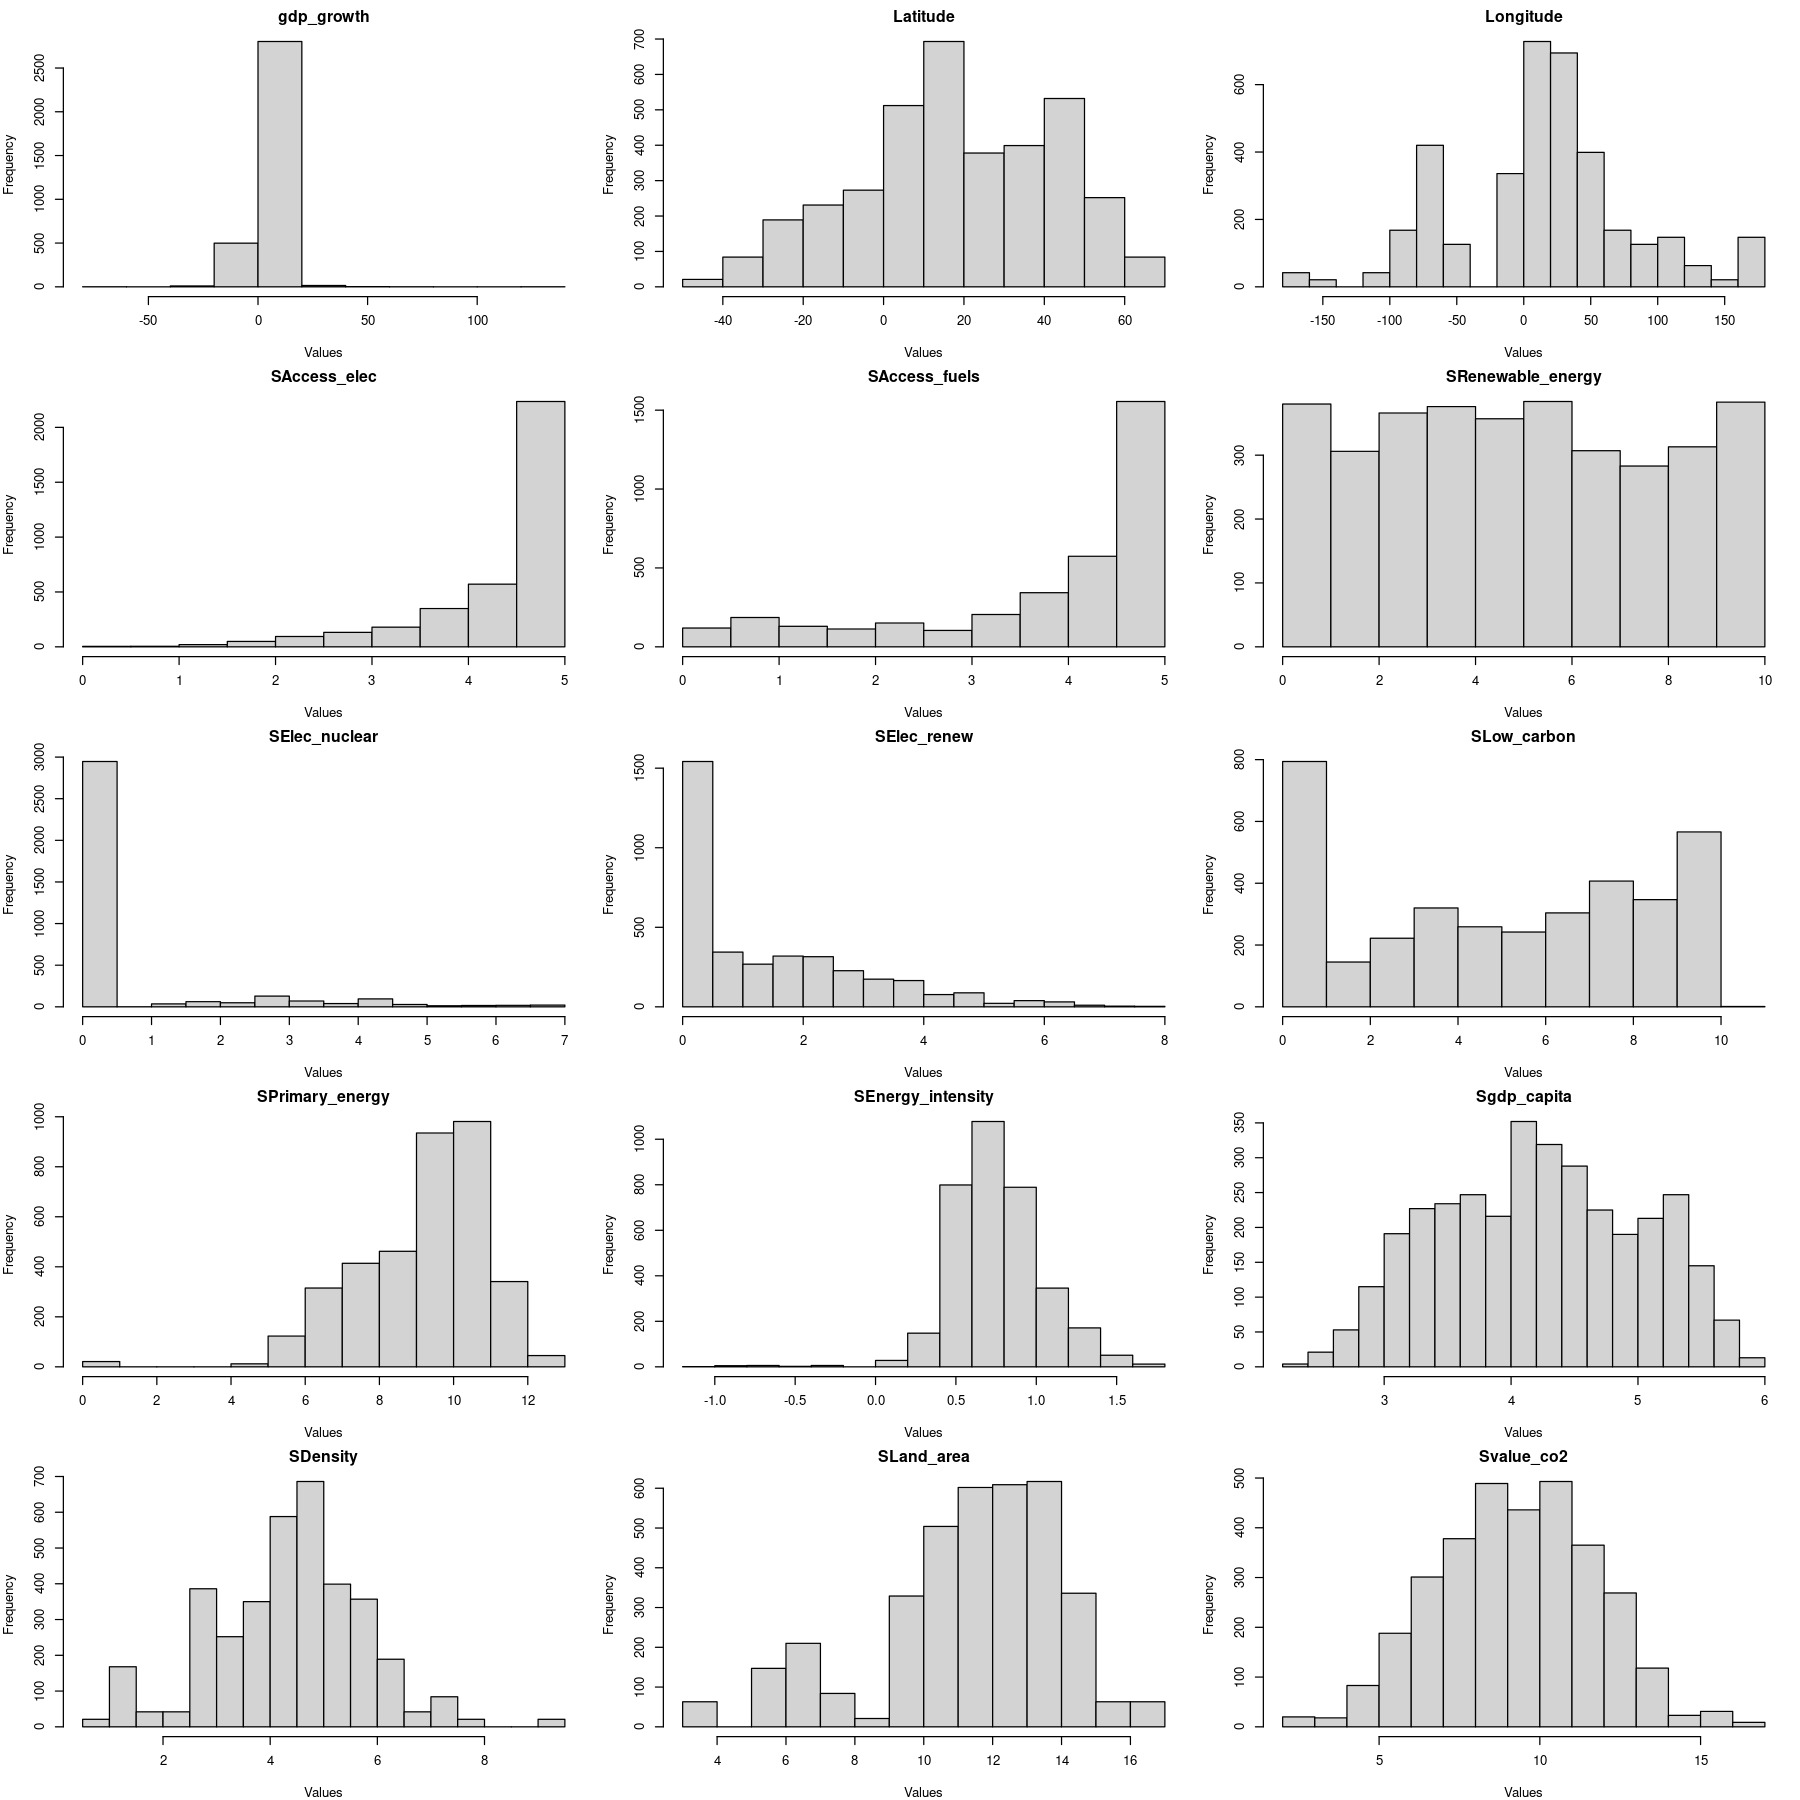

In [135]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow = c(5,3) , mar = c(4,4,2,1))

for (i in 1:length(names(energynaQuant))) {
    dfi = energynaQuant[,c(i)]
    hist(dfi, main=names(energynaQuant)[i],xlab='Values')
}

In [136]:
library(missForest)

In [137]:
XnaImp=missForest(energynaQuant,verbose=TRUE)

  missForest iteration 1 in progress...done!
    estimated error(s): 0.180193 
    difference(s): 0.000475049 
    time: 24.433 seconds

  missForest iteration 2 in progress...done!
    estimated error(s): 0.1432265 
    difference(s): 0.0001729276 
    time: 23.948 seconds

  missForest iteration 3 in progress...done!
    estimated error(s): 0.140321 
    difference(s): 1.775038e-05 
    time: 24.299 seconds

  missForest iteration 4 in progress...done!
    estimated error(s): 0.1452801 
    difference(s): 2.675276e-05 
    time: 24.494 seconds



In [138]:
X_imp = data.frame(XnaImp$ximp)

In [139]:
missing_rates = data.frame(colSums(is.na(X_imp)))
missing_rates

colSums.is.na.X_imp..
gdp_growth        0                    
Latitude          0                    
Longitude         0                    
SAccess_elec      0                    
SAccess_fuels     0                    
SRenewable_energy 0                    
SElec_nuclear     0                    
SElec_renew       0                    
SLow_carbon       0                    
SPrimary_energy   0                    
SEnergy_intensity 0                    
Sgdp_capita       0                    
SDensity          0                    
SLand_area        0                    
Svalue_co2        0

### Modélisation avec le jeu de données complété

In [140]:
set.seed(183) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(X_imp) # nombre de lignes dans les données
nvar <- ncol(X_imp) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappi <-X_imp[appri,] 
# construction de l'échantillon test
datesti <- X_imp[testi, ] 

# vérification
str(datappi)
str(datesti)
#summary(datappr) 

'data.frame':	2919 obs. of  15 variables:
 $ gdp_growth       : num  6.65 6.03 8.83 11.23 5.36 ...
 $ Latitude         : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude        : num  67.7 67.7 67.7 67.7 67.7 ...
 $ SAccess_elec     : num  0.478 1.405 2.69 3.234 3.425 ...
 $ SAccess_fuels    : num  1.97 2.1 2.35 2.58 2.7 ...
 $ SRenewable_energy: num  6.71 6.75 6.05 5.82 5.65 ...
 $ SElec_nuclear    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SElec_renew      : num  0.27 0.405 0.489 0.464 0.495 ...
 $ SLow_carbon      : num  8.12 9.21 8.19 7.96 8.73 ...
 $ SPrimary_energy  : num  5.72 5.47 5.44 5.53 5.72 ...
 $ SEnergy_intensity: num  0.247 0.277 0.168 0.172 0.203 ...
 $ Sgdp_capita      : num  2.84 2.79 2.63 2.74 2.79 ...
 $ SDensity         : num  4.09 4.09 4.09 4.09 4.09 ...
 $ SLand_area       : num  13.4 13.4 13.4 13.4 13.4 ...
 $ Svalue_co2       : num  6.63 6.59 7.11 7.35 7.47 ...
'data.frame':	730 obs. of  15 variables:
 $ gdp_growth       : num  4.34 5.73 1.58 2.9 9.03 ...
 $ Latitude    

#### Random Forest

mtry = 4  OOB error = 0.02340653 
Searching left ...
mtry = 2 	OOB error = 0.04303579 
-0.838623 0.05 
Searching right ...
mtry = 8 	OOB error = 0.02121706 
0.09354086 0.05 
mtry = 14 	OOB error = 0.02987958 
-0.4082807 0.05 


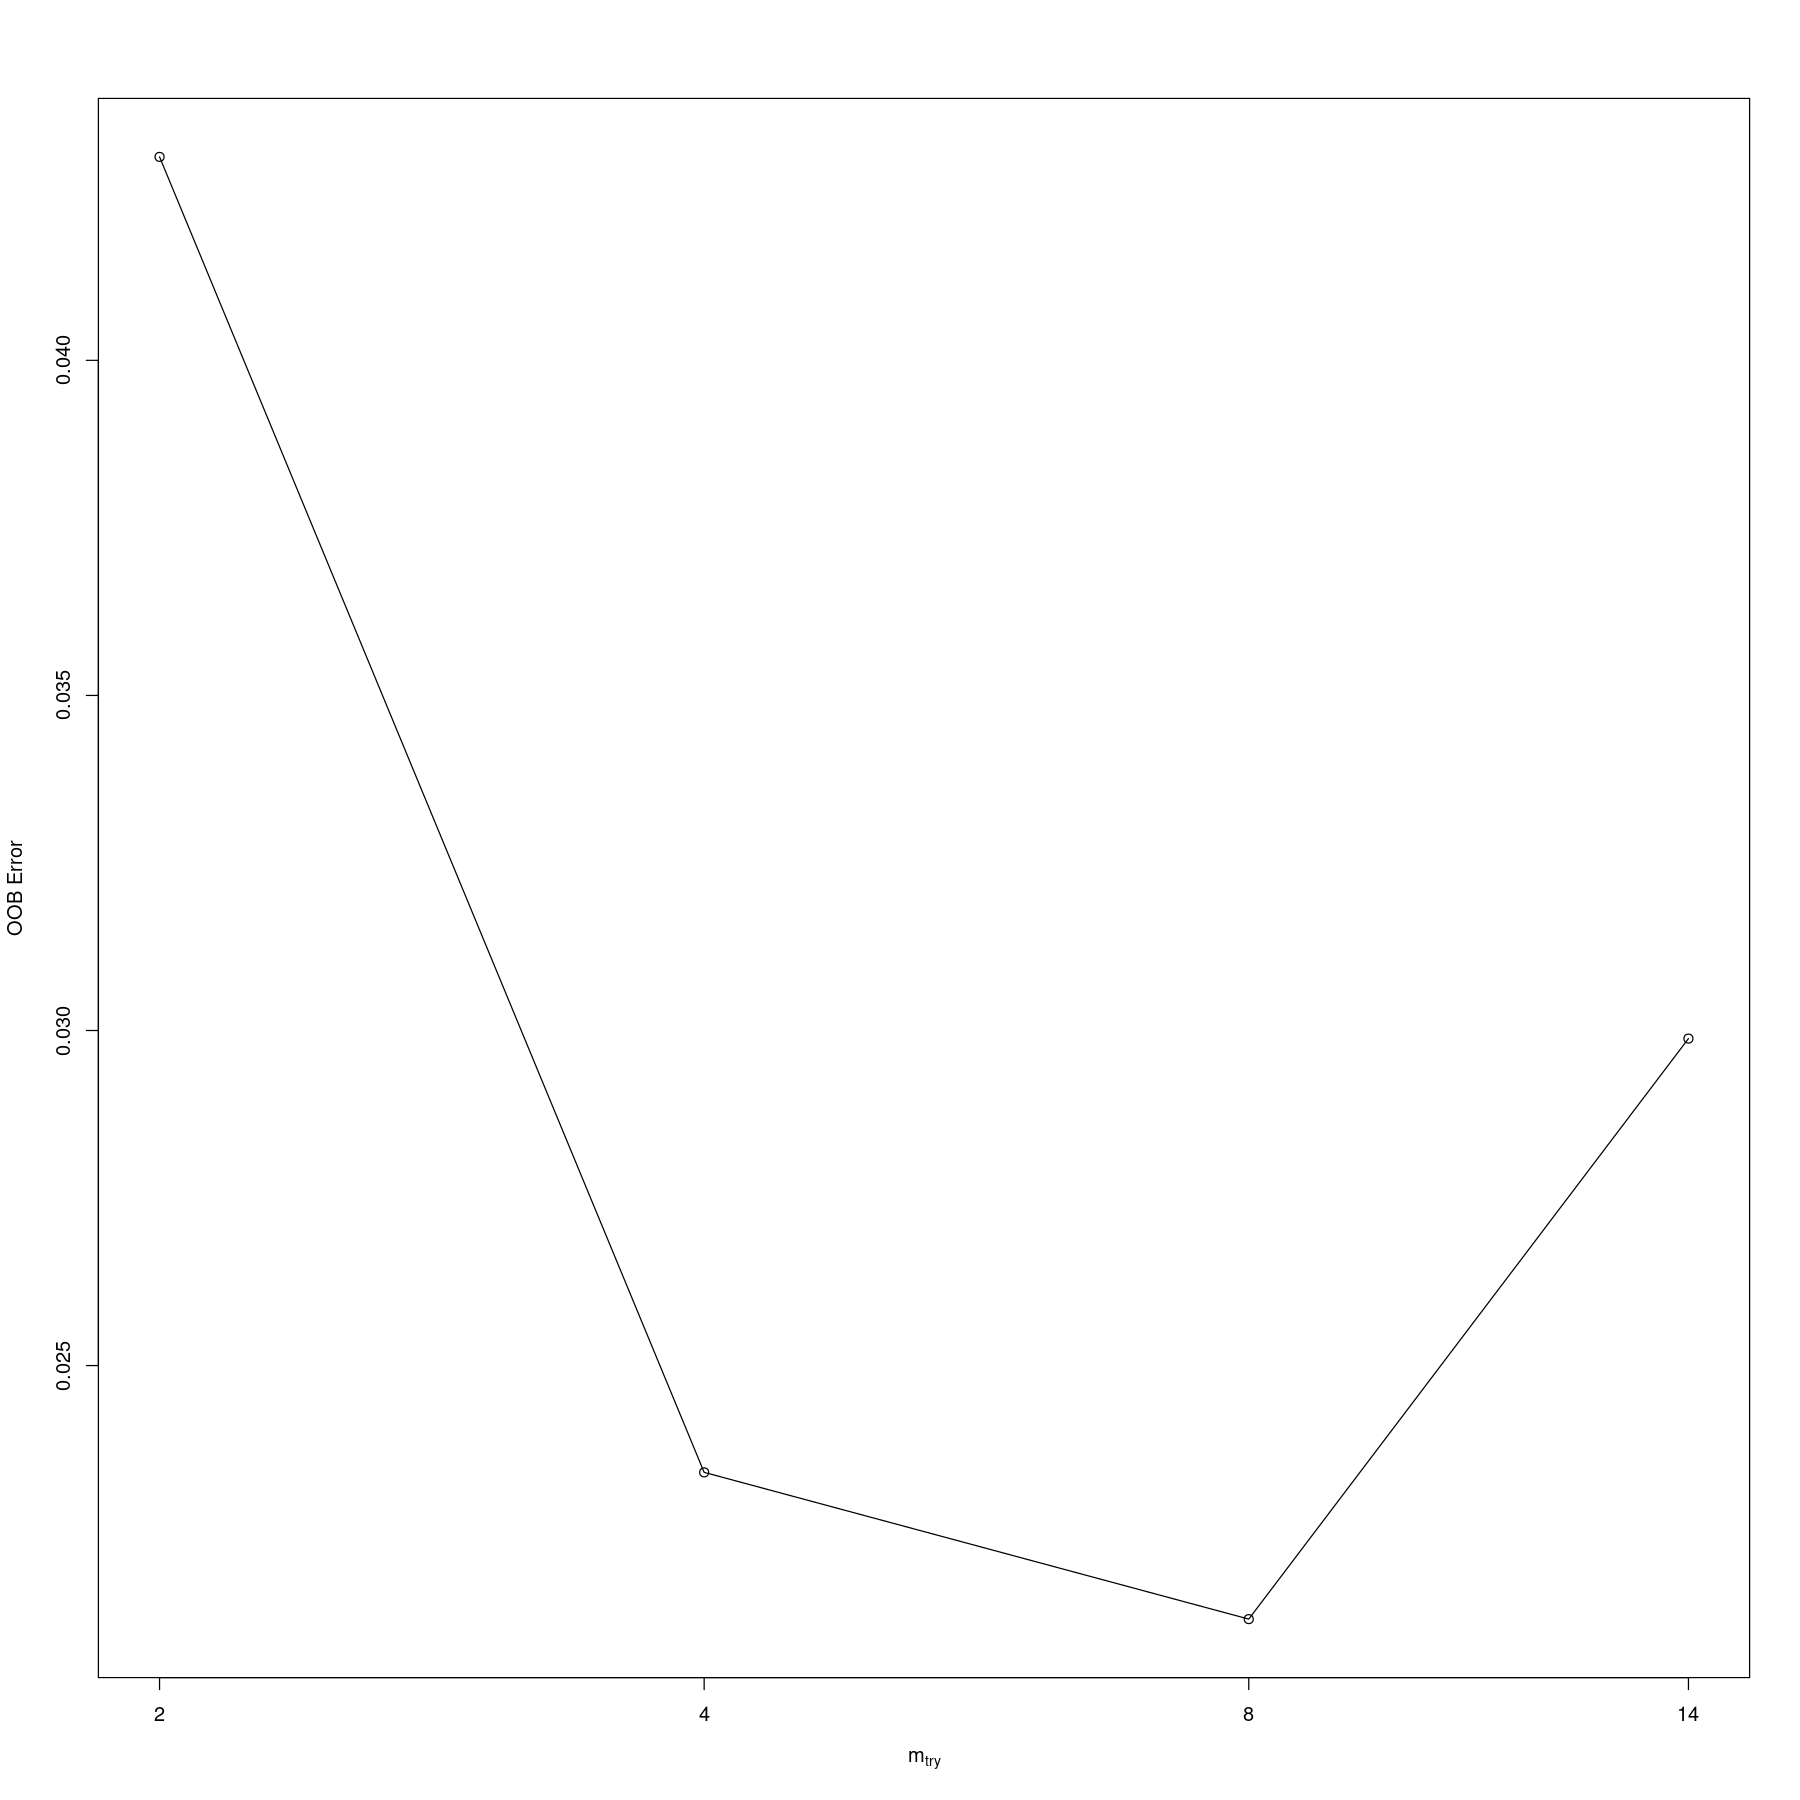

In [143]:
tuned.model <- tuneRF(datappi[,-15], datappi[,15])

In [144]:
rf.reg <- randomForest(Svalue_co2 ~ ., data = datappi, ntree = 500, mtry = 8, importance = TRUE, do.trace = 50)

attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |
Tree |      MSE  %Var(y) |
  50 |  0.02053     0.35 |
 100 |  0.01714     0.29 |
 150 |  0.01608     0.27 |
 200 |  0.01589     0.27 |
 250 |  0.01566     0.27 |
 300 |  0.01591     0.27 |
 350 |  0.01594     0.27 |
 400 |  0.01599     0.27 |
 450 |  0.01583     0.27 |
 500 |  0.01577     0.27 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 8

Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


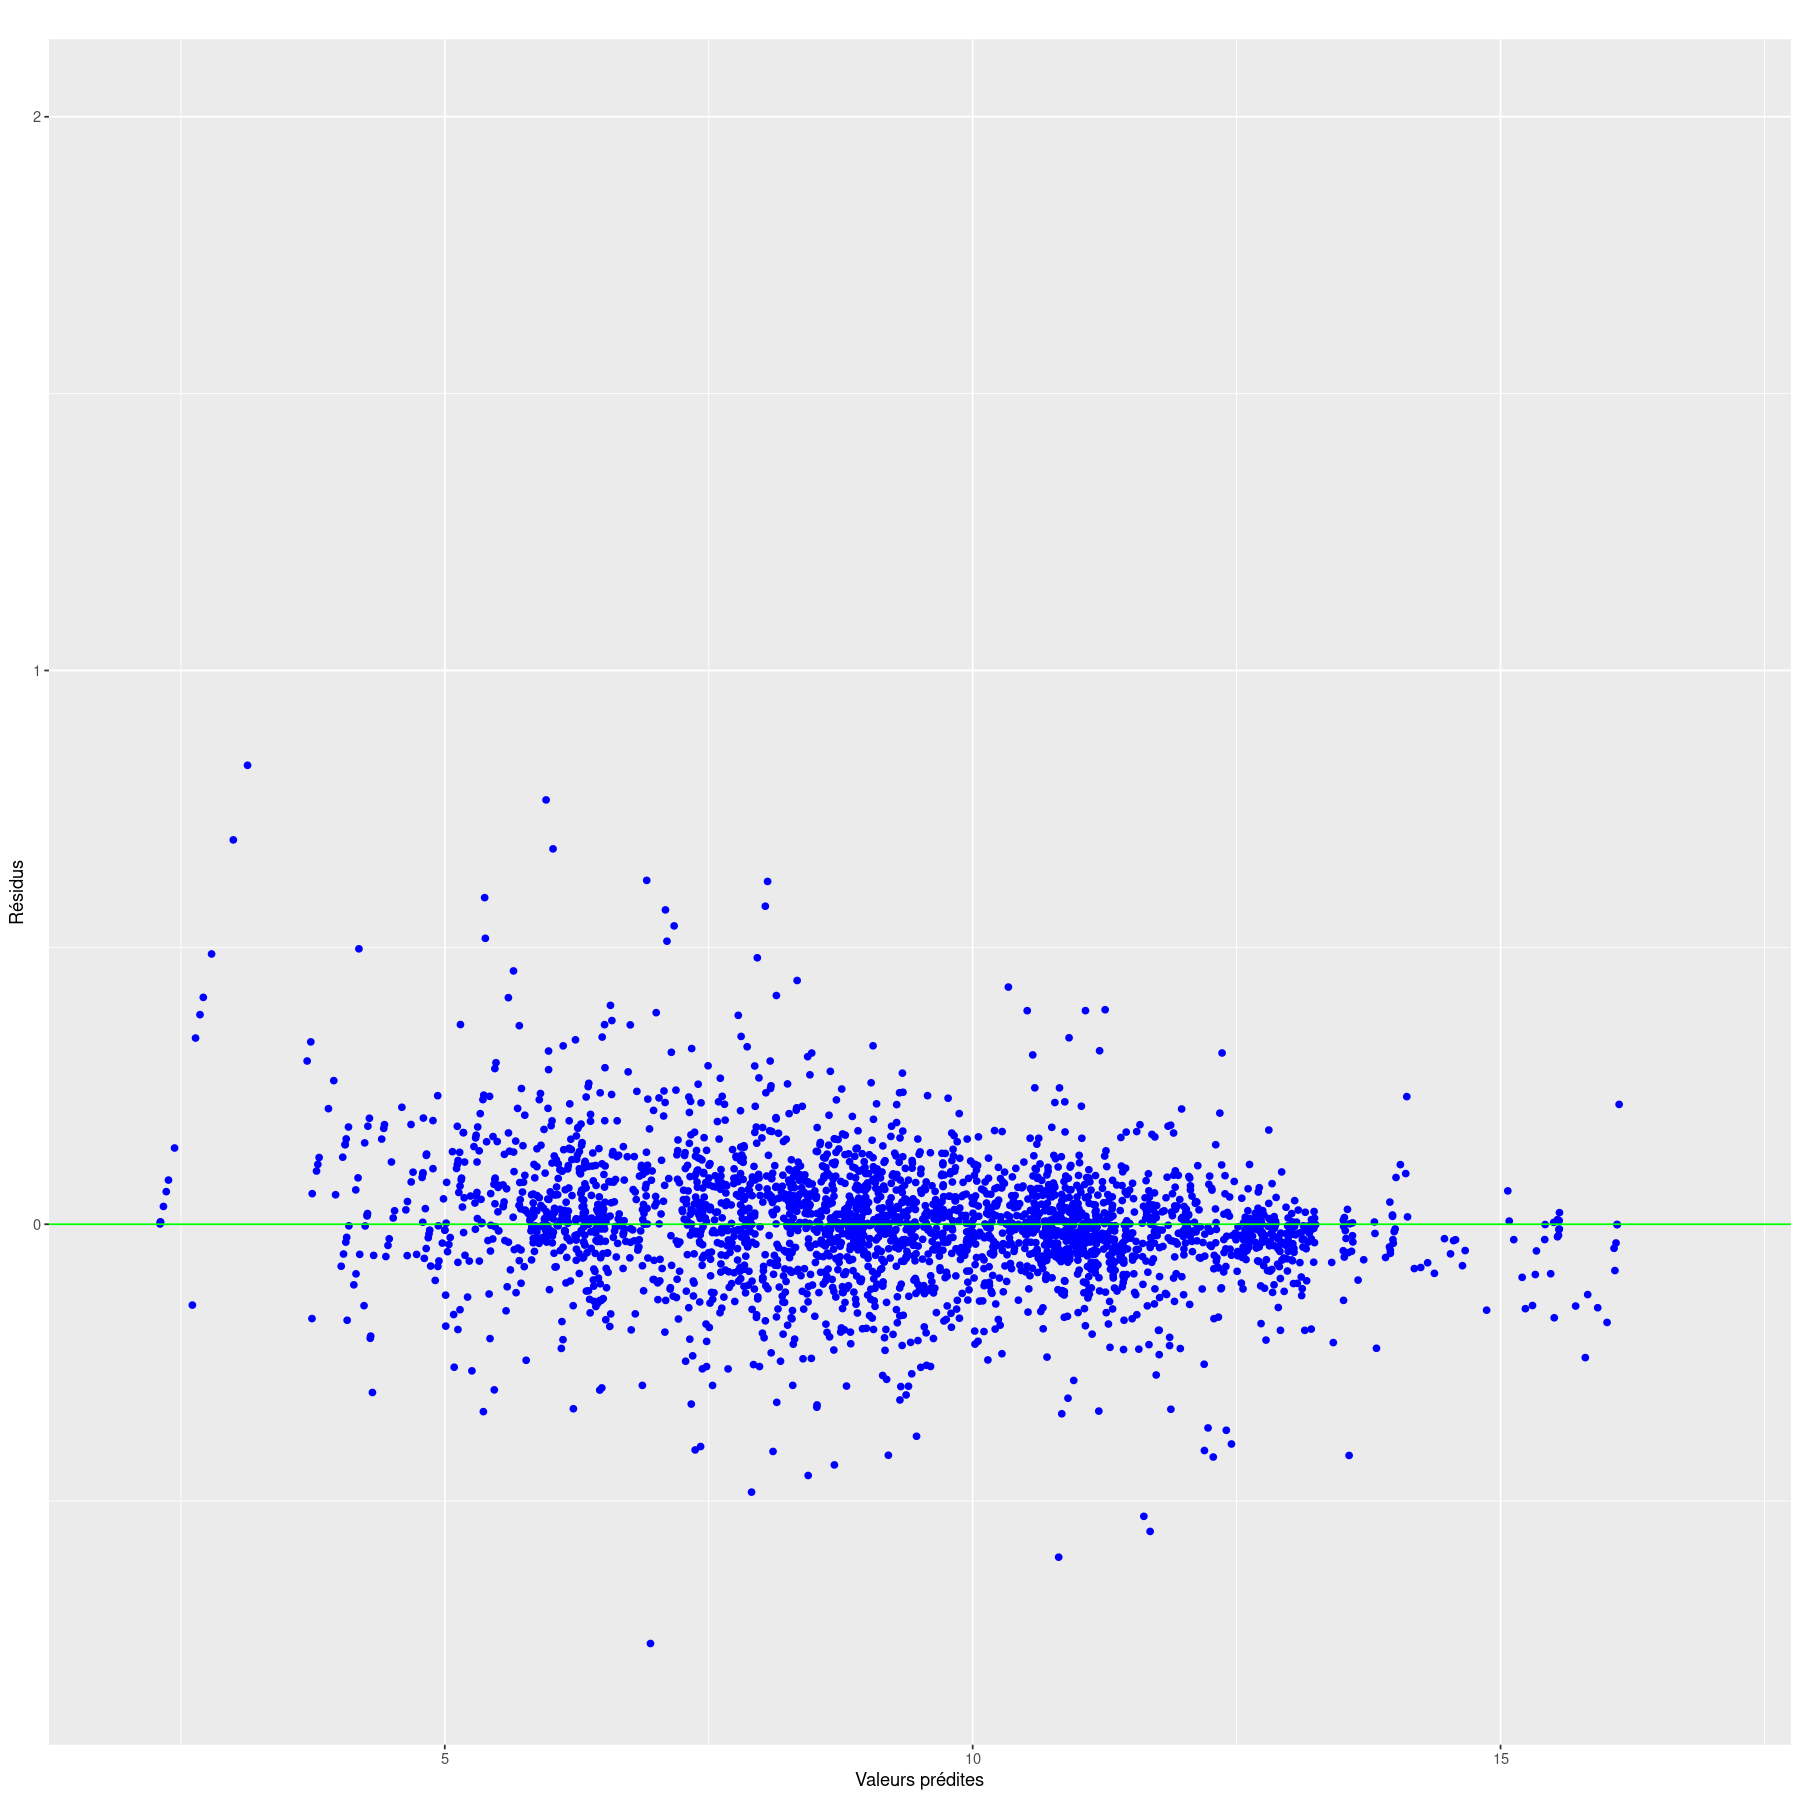

In [145]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappi[,"Svalue_co2"]

[1] 0.01457729

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


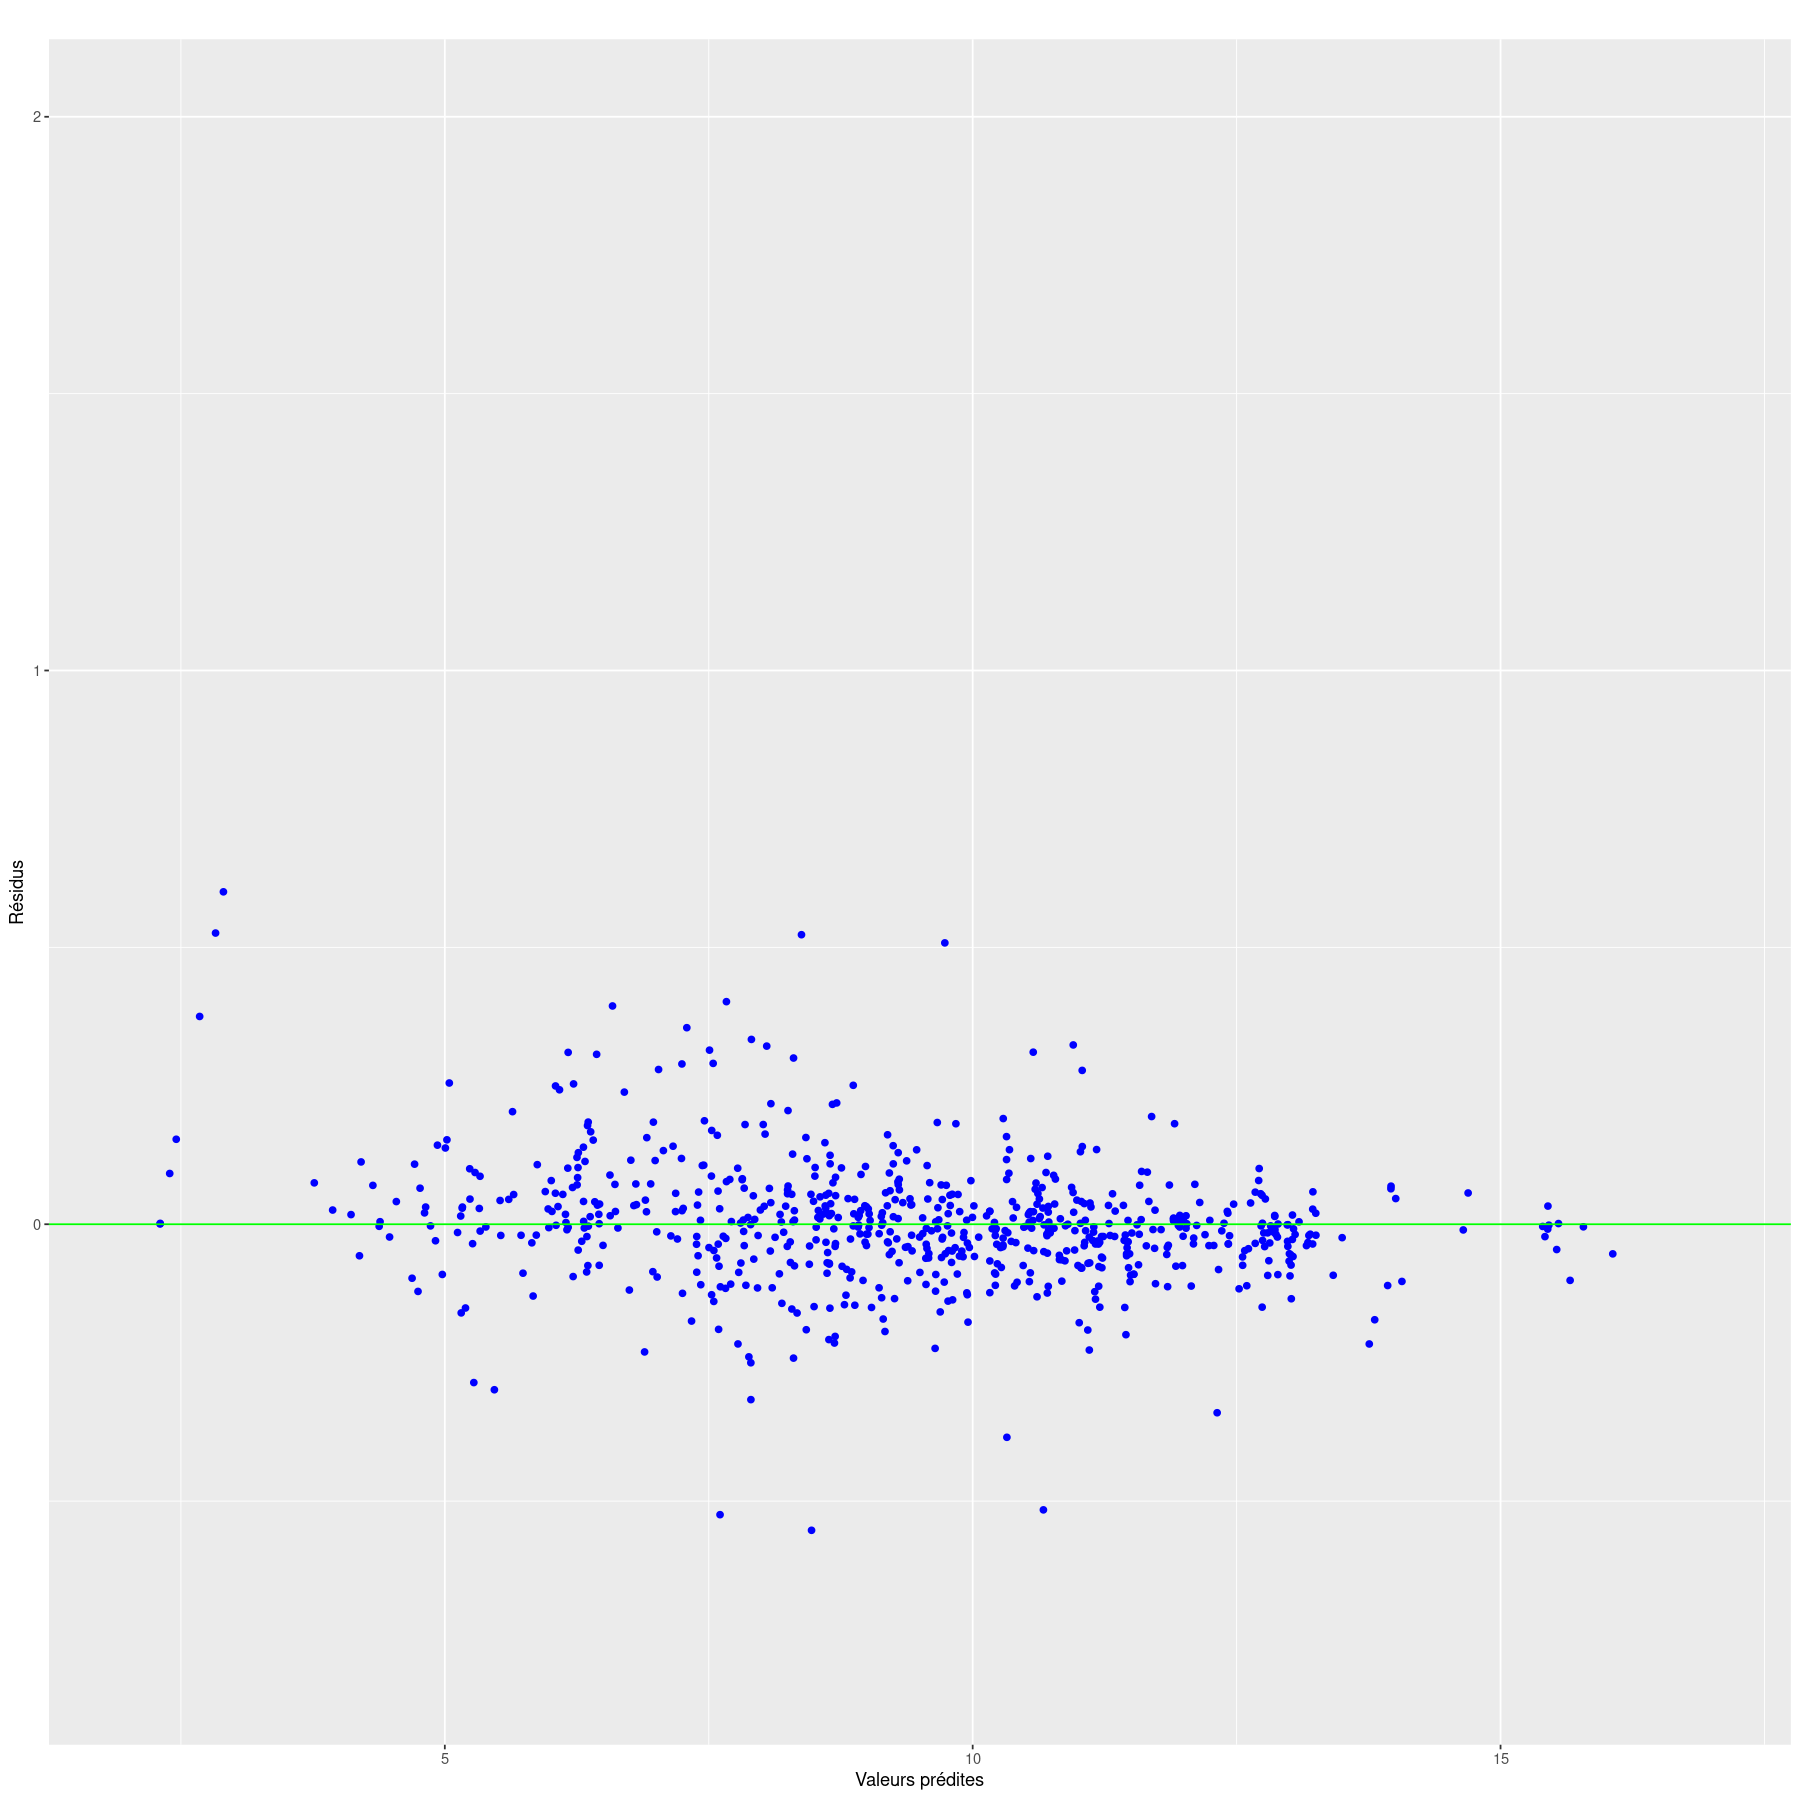

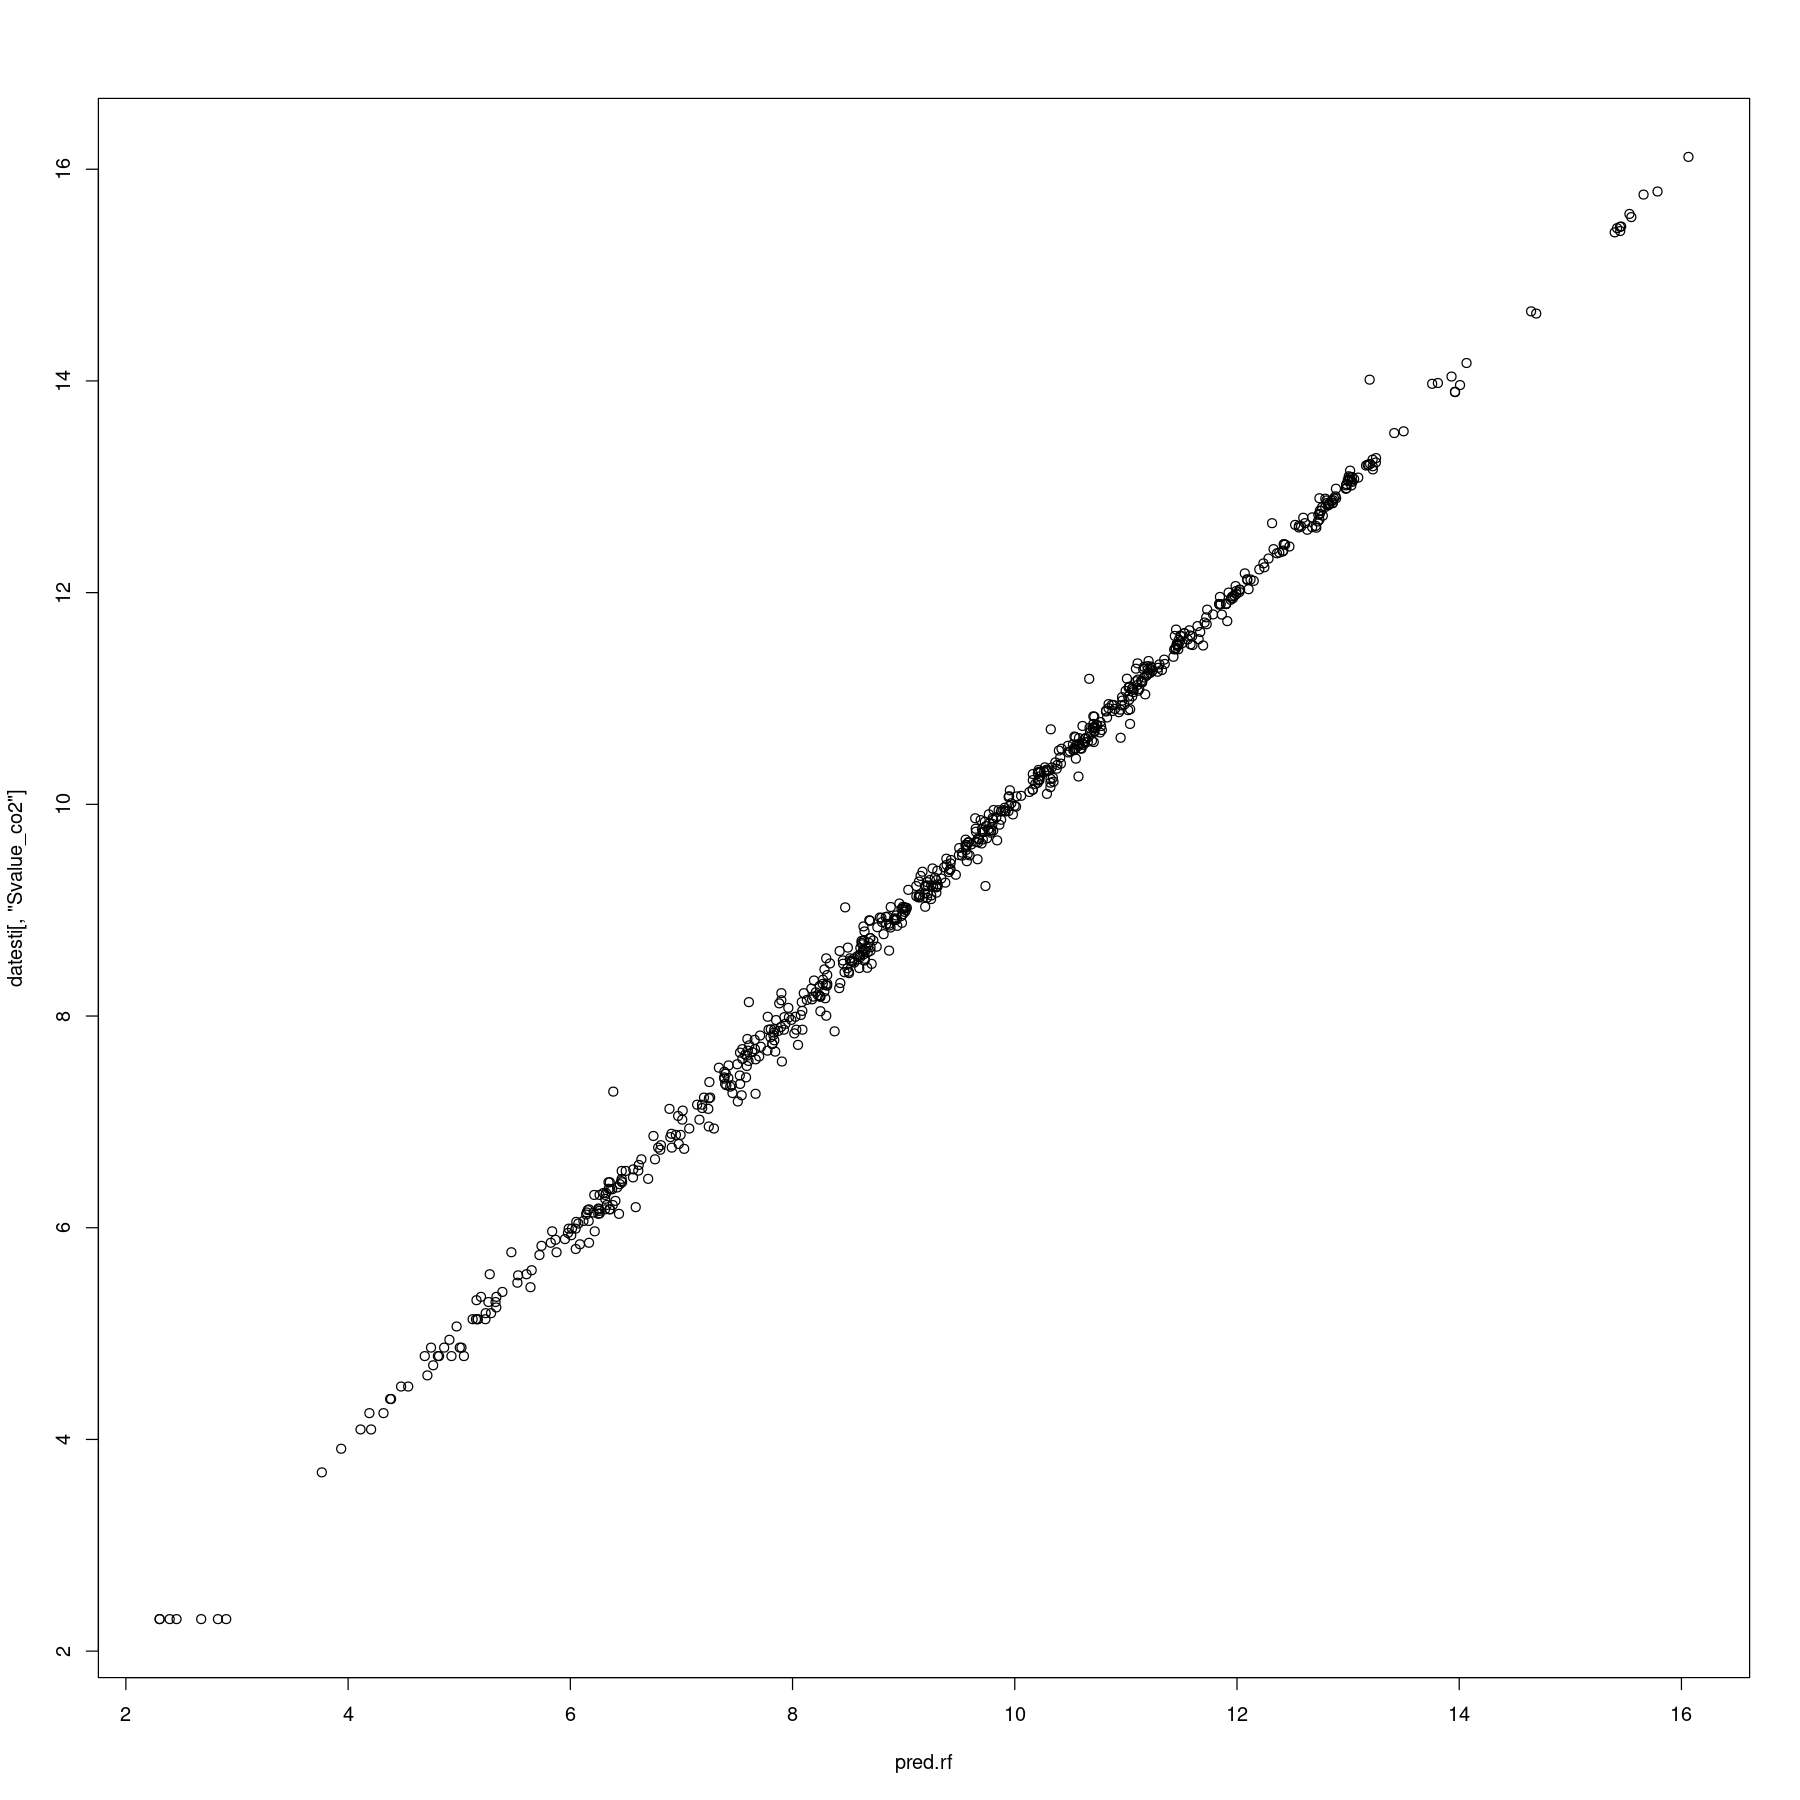

In [148]:
#Sur nos données test
pred.rf=predict(rf.reg,newdata=datesti)
#Erreur quadratique moyenne de prévision
sum((pred.rf-datesti[,"Svalue_co2"])^2)/nrow(datesti)

err.rf=pred.rf-datesti[,"Svalue_co2"]

gplot.res(pred.rf,err.rf,titre="")
plot(pred.rf,datesti[,"Svalue_co2"])

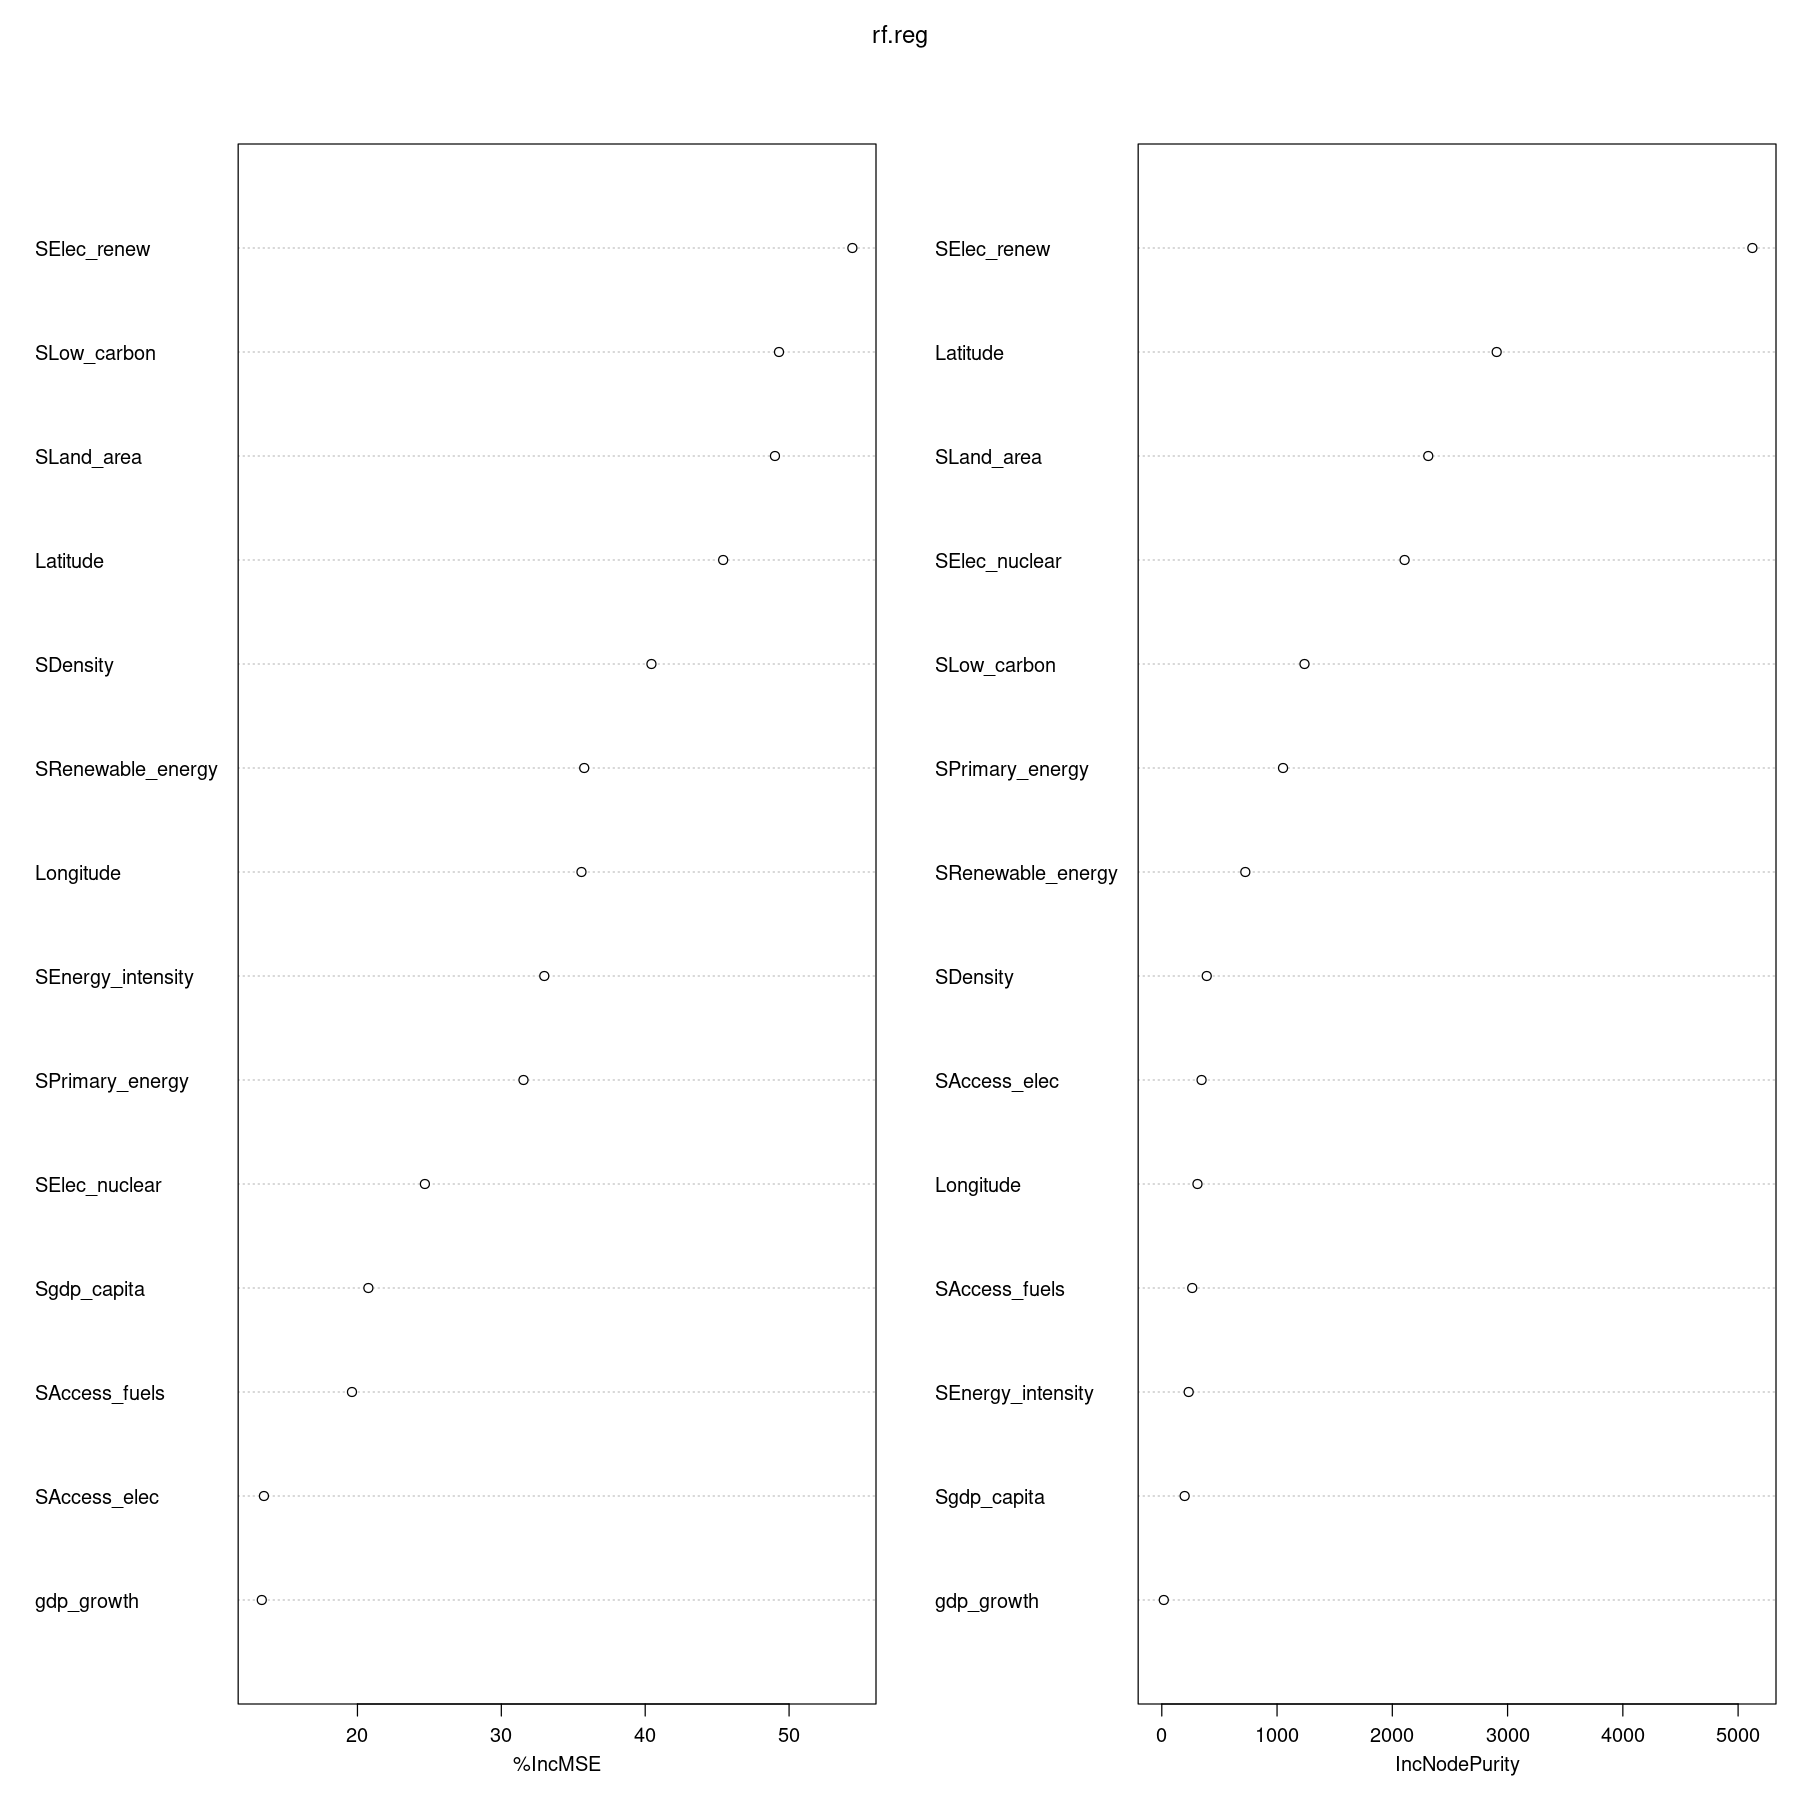

In [155]:
varImpPlot(rf.reg)

#### Boosting

In [150]:
# Hyperparamètres à tester
param_grid <- expand.grid( shrinkage = c(0.001,0.5,0.1), n.minobsinnode = c(2,3,4,5,6) ,n.trees = c(100,500,900), interaction.depth = 10)

# Contrôle de la validation croisée
train_control <- trainControl(
  method = "cv",      # Utiliser la validation croisée
  number = 10          # Nombre de folds
)

model <- train(
  Svalue_co2 ~ .,
  data = datappi,
  method = "gbm",
  trControl = train_control,
  tuneGrid = param_grid,
  verbose = FALSE
)

In [151]:
print(model$bestTune)

   n.trees interaction.depth shrinkage n.minobsinnode
24     900                10       0.1              4


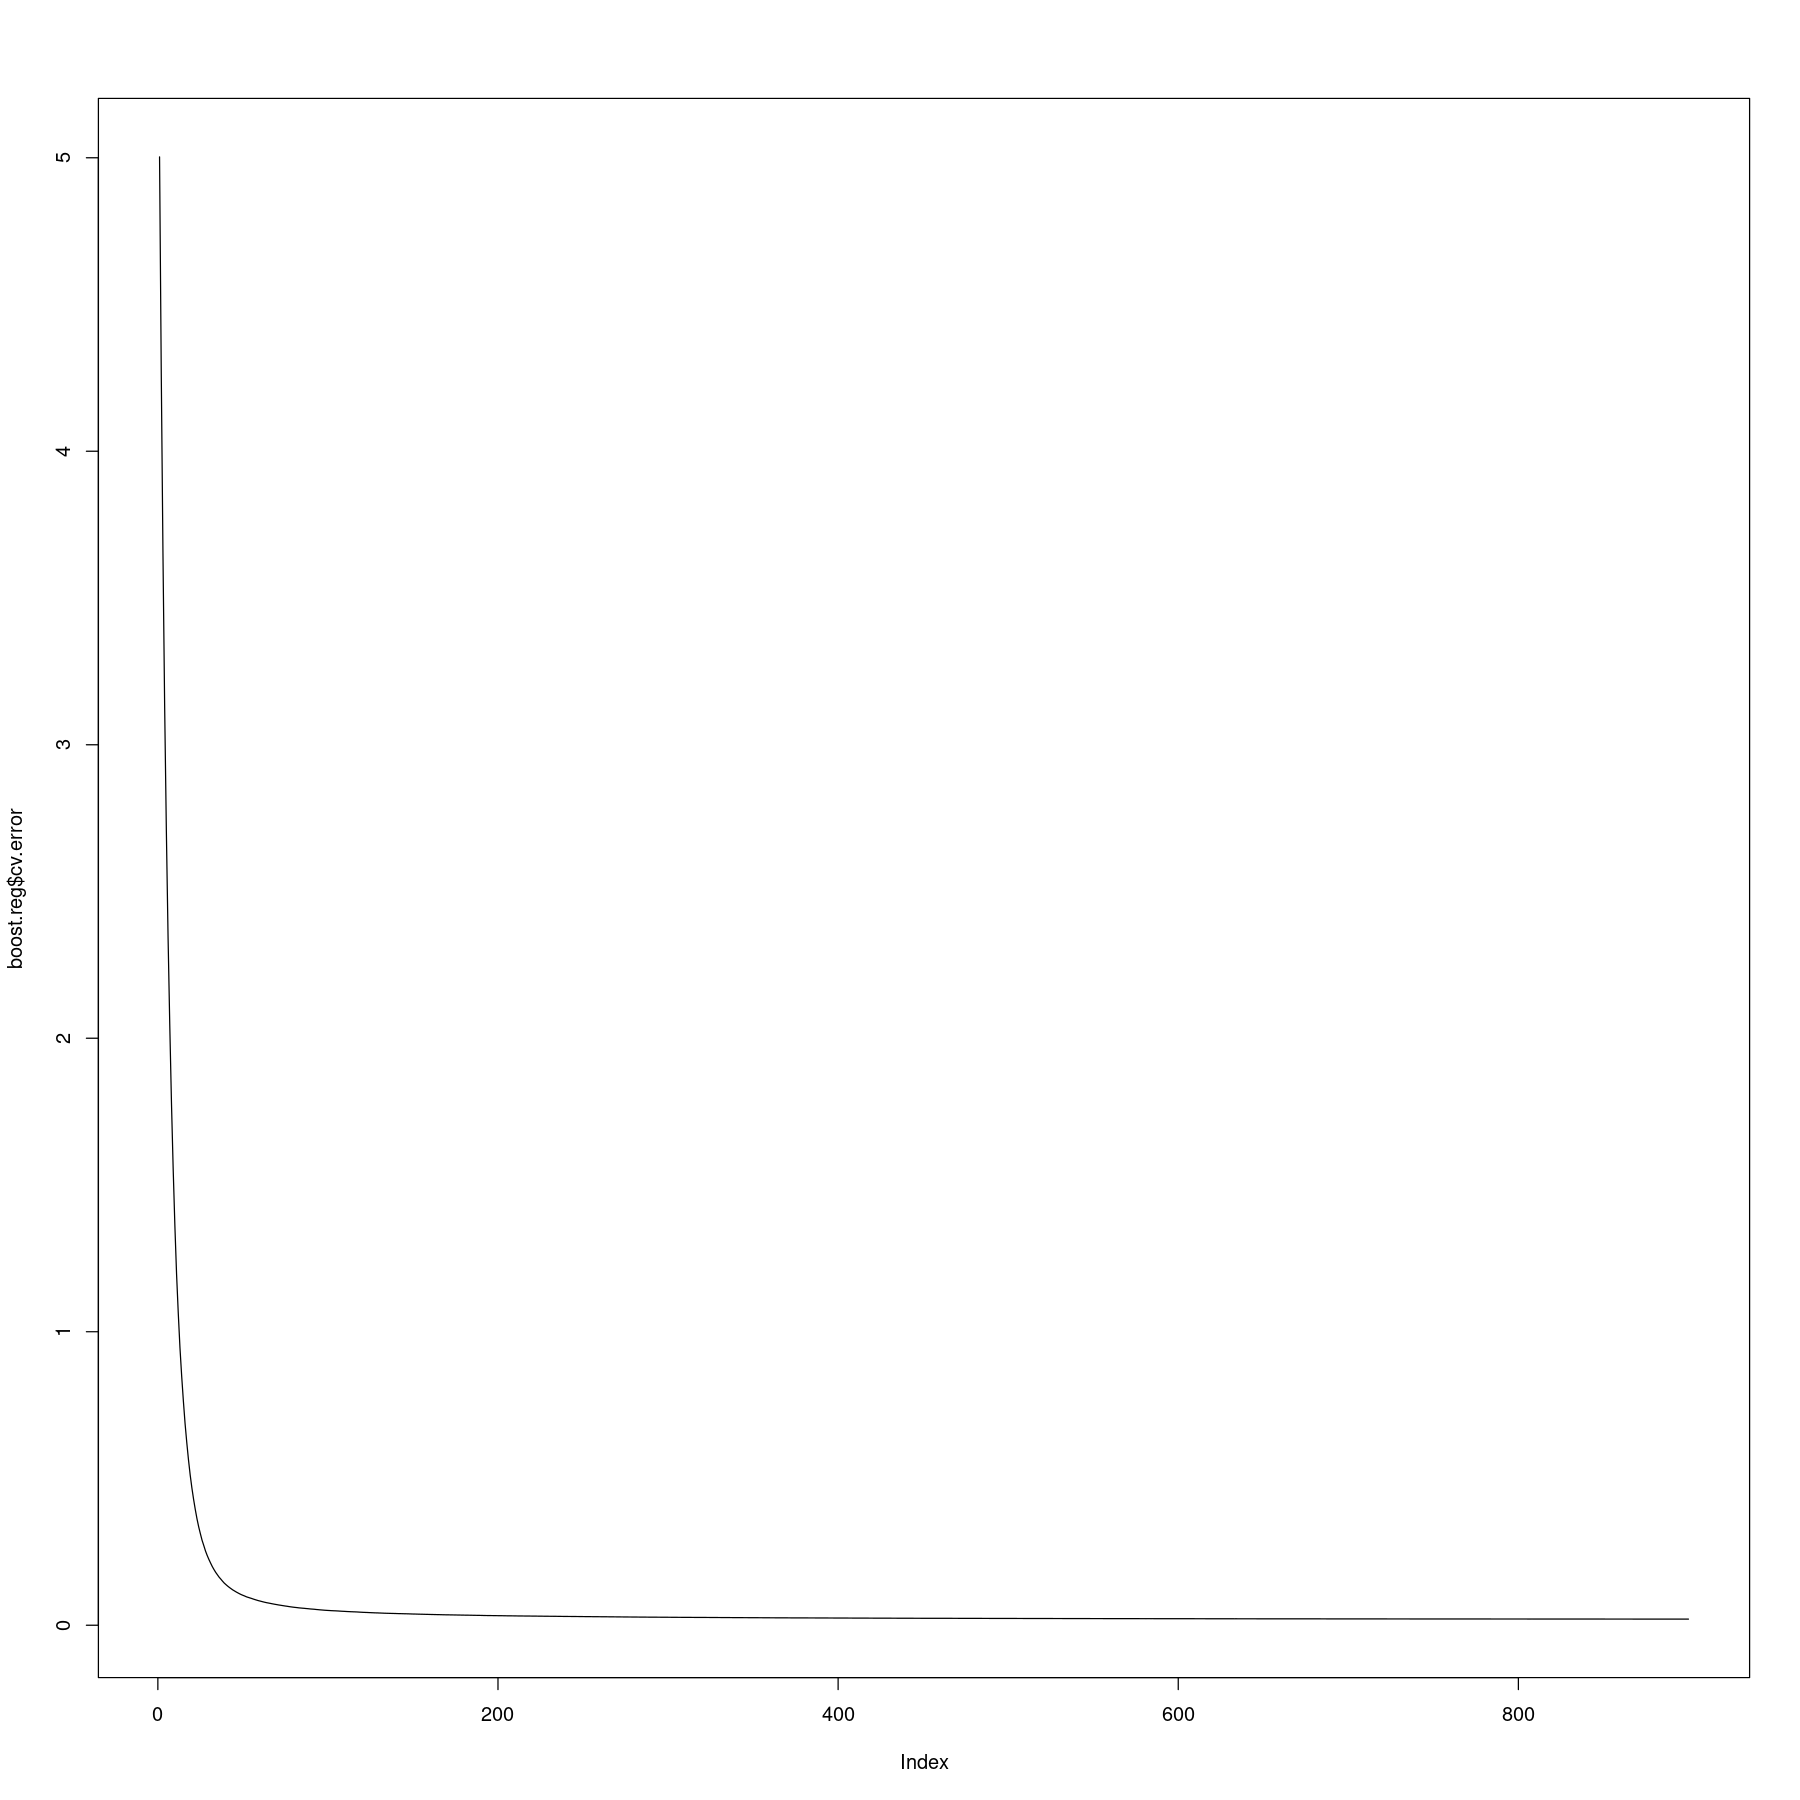

In [152]:
boost.reg = gbm(Svalue_co2 ~ ., data = datappi, distribution = "gaussian", n.trees = model$bestTune$n.trees, 
    cv.folds = 10,interaction.depth = model$bestTune$interaction.depth, n.minobsinnode = model$bestTune$n.minobsinnode, shrinkage = model$bestTune$shrinkage, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

In [153]:
fit.boo=boost.reg$fit
res.boo=fit.boo-datappi[,"Svalue_co2"]

Using 899 trees...




[1] 0.02076784

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


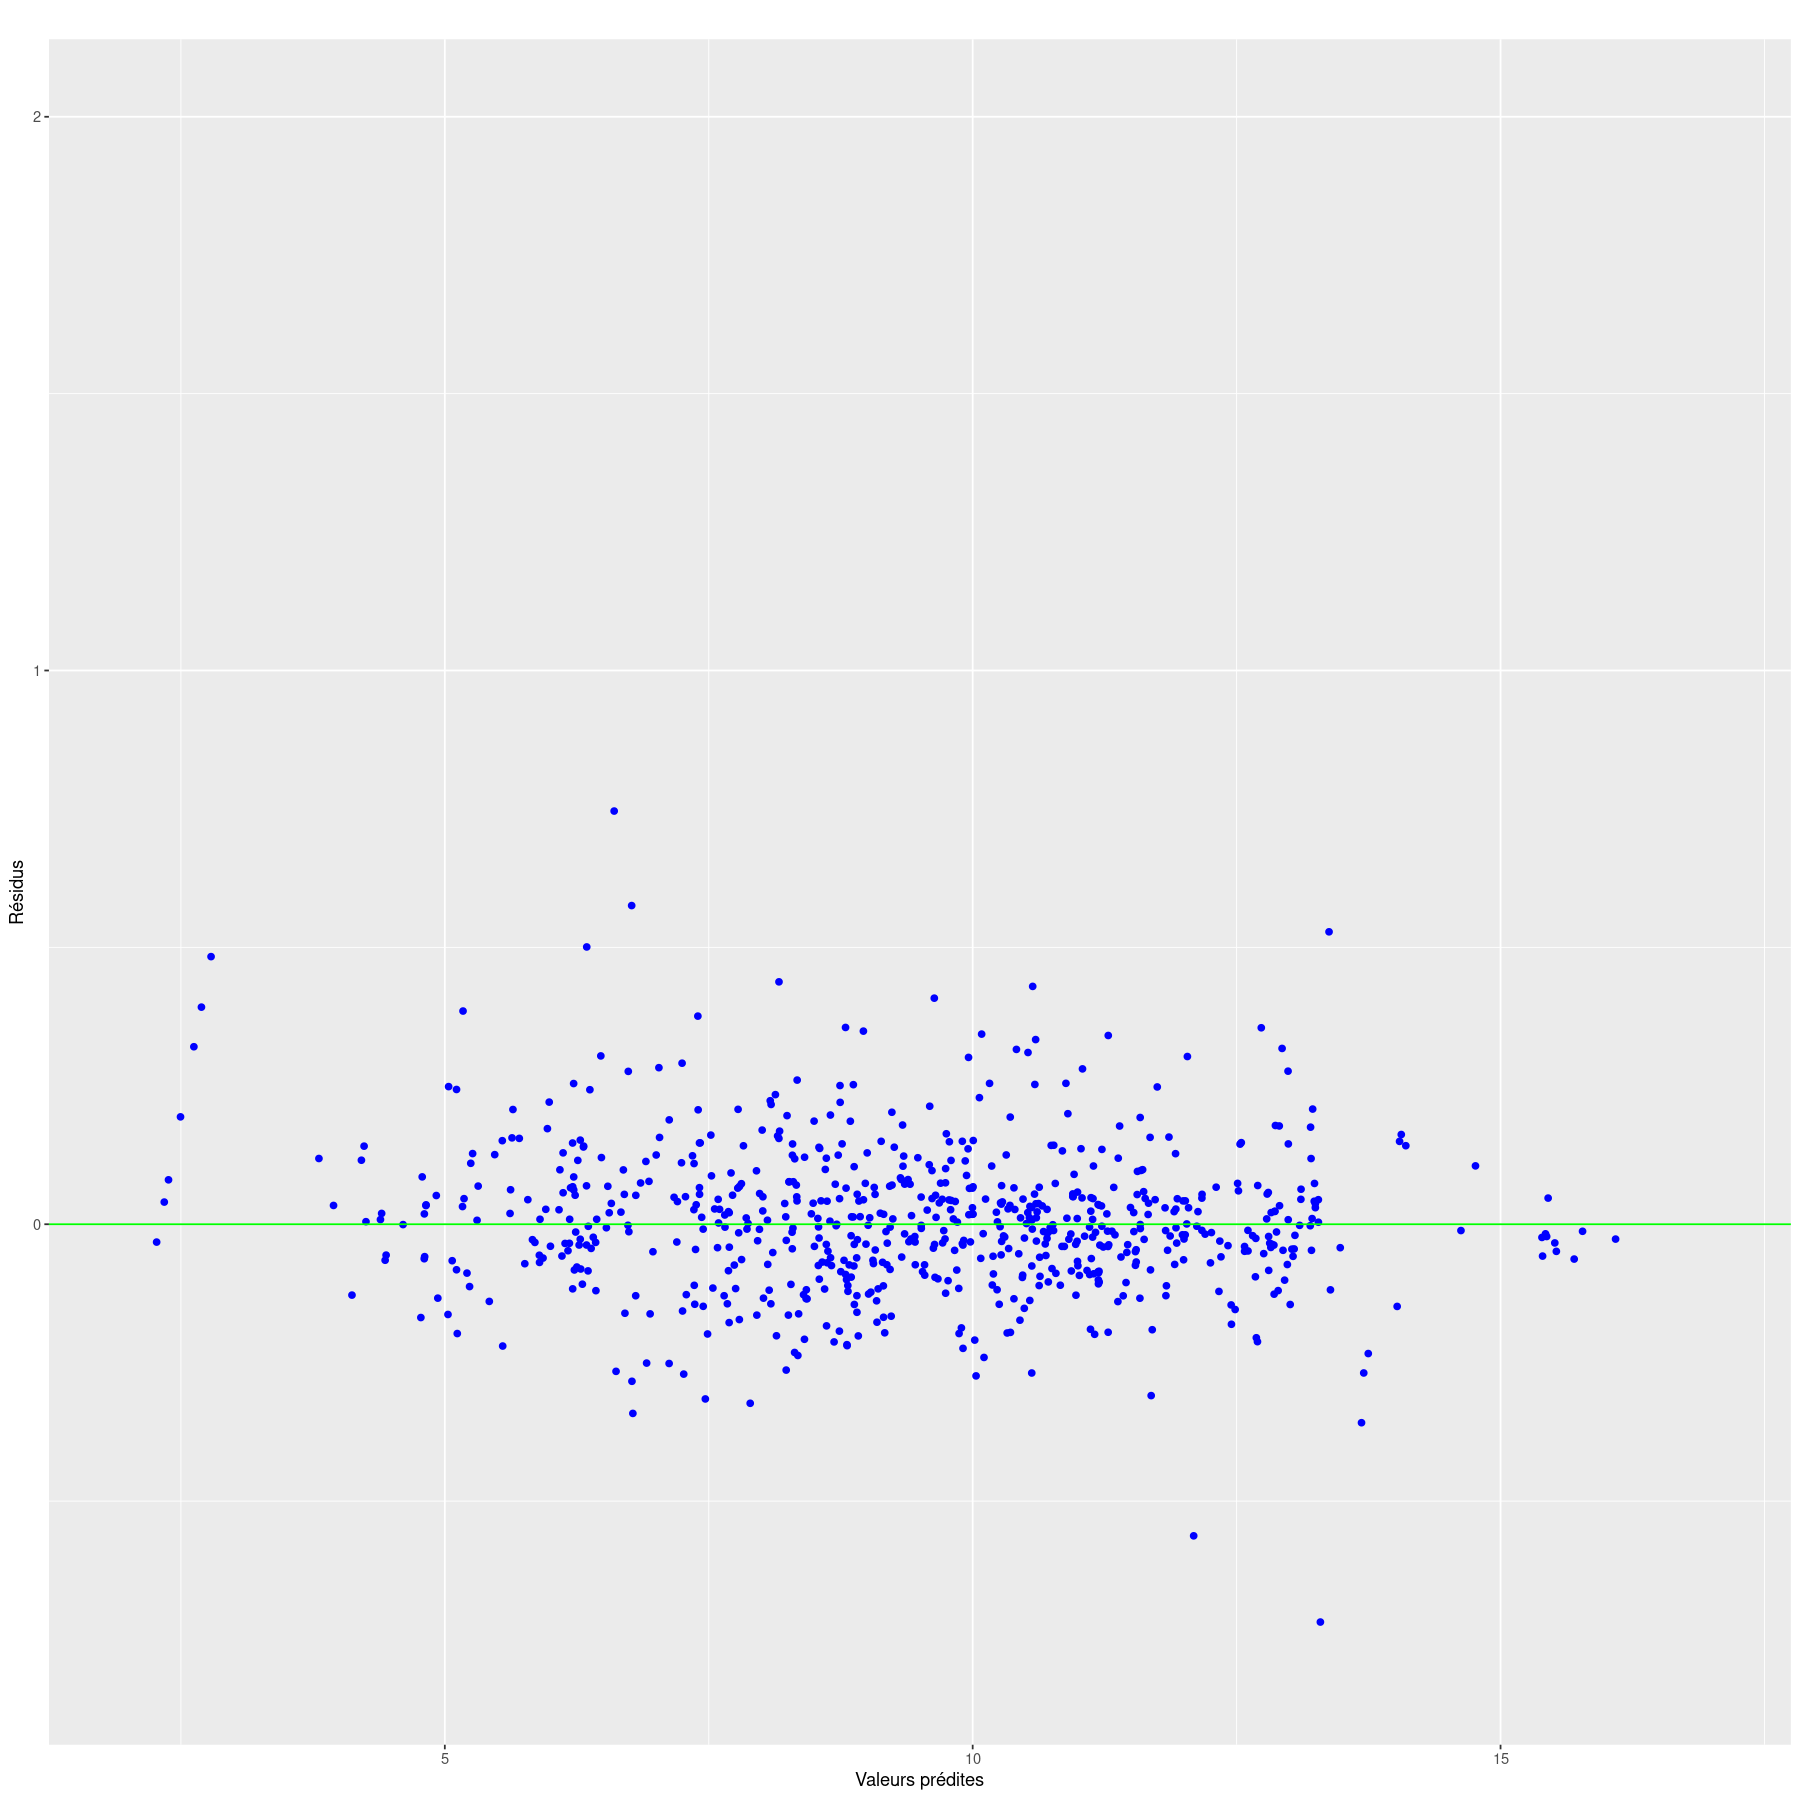

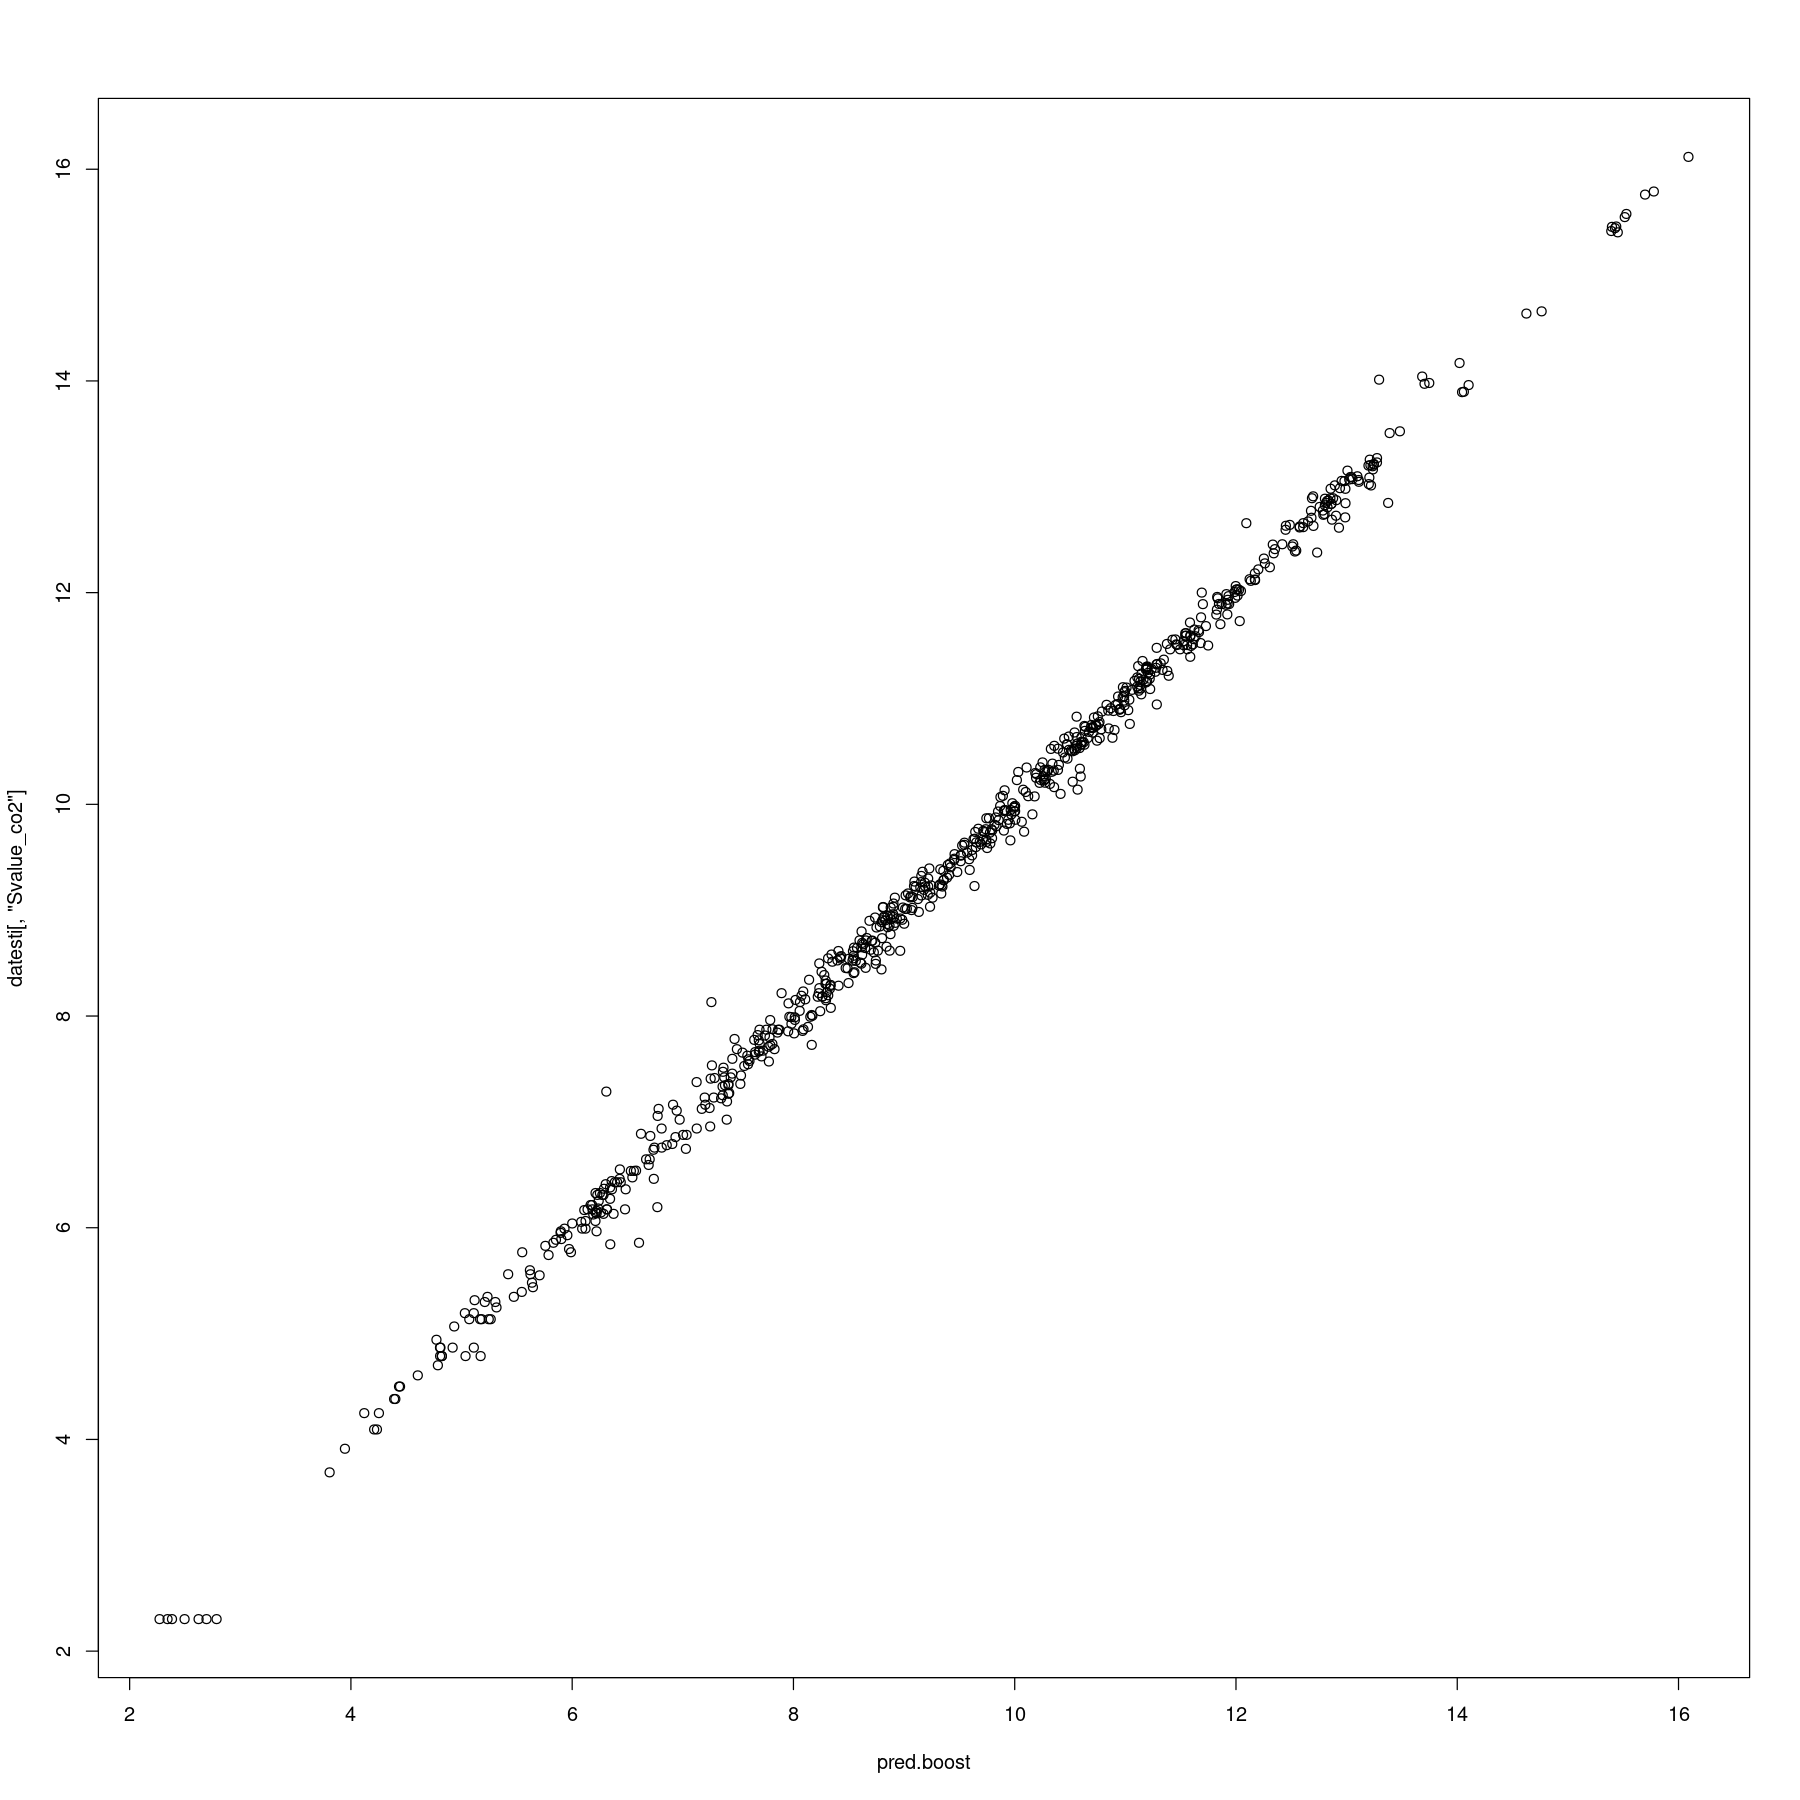

In [154]:
#Sur nos données test
pred.boost=predict(boost.reg,newdata=datesti)
#Erreur quadratique moyenne de prévision
sum((pred.boost-datesti[,"Svalue_co2"])^2)/nrow(datesti)

err.boost=pred.boost-datesti[,"Svalue_co2"]

gplot.res(pred.boost,err.boost,titre="")
plot(pred.boost,datesti[,"Svalue_co2"])